# Exercise 1

### 1. Which of the following points from each of the following sets below is an anomaly? Why?
 1. (1-dimensional) $\{ 1, 3, 2, 1, 3, 2, 75, 1, 3, 2, 3, 1, 2, 1, 3, 2 \}$
 2. (1-dimensional) $\{ 1, 2, 3, 1, 2, 9, 19, 20, 21, 20, 2, 22 \}$
 3. (2-dimensional) $\{ (1,9),(2,9),(3,9),(9,9),(9,3),(9,1),(9,2) \}$

1. **Answer:**
 1. 75 is the anomaly as all other points are in the range of \[1,3\]
 2. 9 is the anomaly as there are two generative processes, one creating 1-4 one creating 19-22
 3. (9, 9) is the anomaly as there are no points nearby, all others have points nearby 

### 2. Use python to create a histogram of the data distribution along each of the dimensions in the diﬀerent cases of  question 1. 
 - Which outliers can you see visually? 
 - Which outliers are not visible and why?

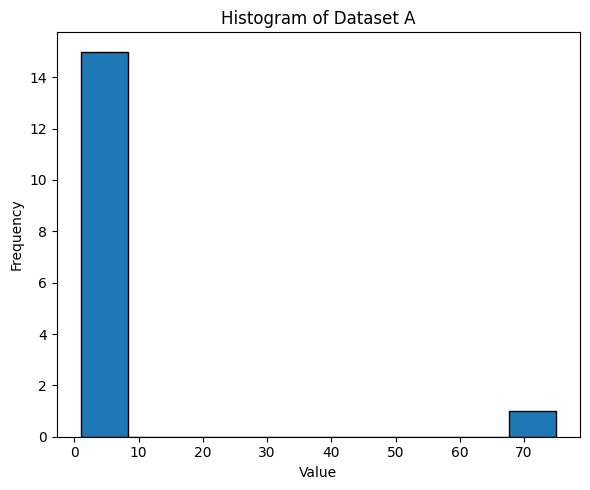

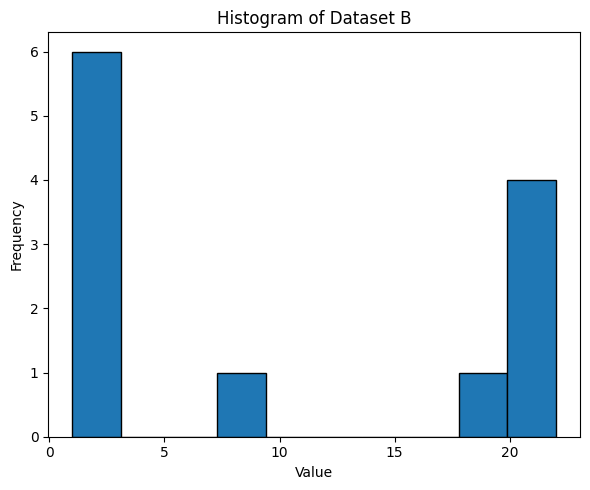

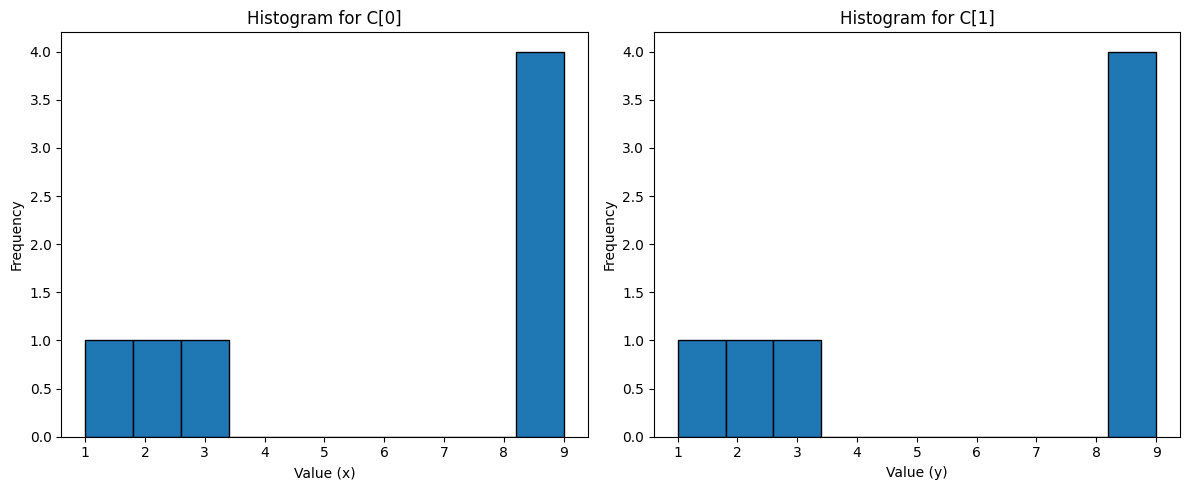

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
A = [1,3,2,1,3,2,75,1,3,2,3,1,2,1,3,2]
plt.hist(A, edgecolor="k")
plt.title("Histogram of Dataset A")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
B = [1,2,3,1,2,9,19,20,21,20,2,22]
counts, bin_edges, patches = plt.hist(B, bins=10, edgecolor="k")
plt.title("Histogram of Dataset B")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# print(f"Bin Edges for Dataset B: {bin_edges}")

C = [(1,9),(2,9),(3,9),(9,9),(9,3),(9,1),(9,2)]
C_x = [x[0] for x in C]
C_y = [x[1] for x in C]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot C_x histogram
axes[0].hist(C_x, edgecolor="k")
axes[0].set_xlabel("Value (x)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram for C[0]")

# Plot C_y histogram
axes[1].hist(C_y, edgecolor="k")
axes[1].set_xlabel("Value (y)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram for C[1]")

plt.tight_layout()
plt.show()


2. **Answer:**
 1. 75 as outlier is clearly visible
 2. 9 is also clearly visible
 3. (9, 9) is not visible in the histograms (marginals) as it is a multivariate outlier

### 3. For C. of question 1, plot the data points on a 2-dimensional plane. 
 - How does this visualization change your answer?


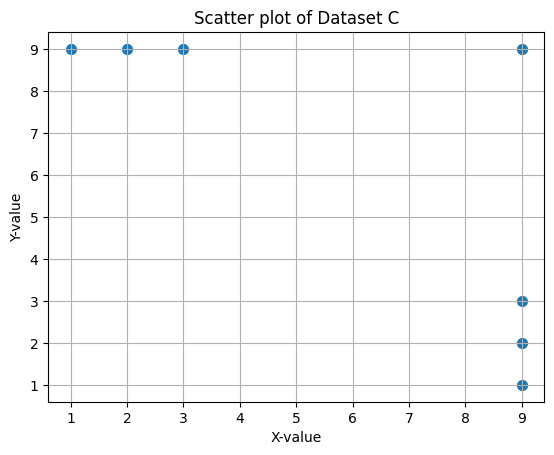

In [2]:
C = [(1,9),(2,9),(3,9),(9,9),(9,3),(9,1),(9,2)]
C_x = [x[0] for x in C]
C_y = [x[1] for x in C]
plt.scatter(C_x, C_y, s=50)
plt.title("Scatter plot of Dataset C")
plt.xlabel("X-value")
plt.ylabel("Y-value")
plt.grid(True)
plt.show()

3. **Answer:**
    - Now (9,9) becomes visible as anomaly

### 4. Apply the `z-value` test to each of the cases in question 1 with the $3\sigma$ rule as decision function. For the 2-dimensional case, apply the z-value test to the individual dimensions. 
 - Do you discover the correct outliers?


In [3]:
import numpy as np

def z_value_outliers(data, threshold=3):
    mean_val = np.mean(data)
    std_val = np.std(data)
    z_scores = [(x - mean_val) / std_val for x in data]
    
    outliers = [x for x, z in zip(data, z_scores) if abs(z) >= threshold]
    return outliers

# Test the function
A = [1, 3, 2, 1, 3, 2, 75, 1, 3, 2, 3, 1, 2, 1, 3, 2]
B = [1, 2, 3, 1, 2, 9, 19, 20, 21, 20, 2, 22]
C = [(1,9),(2,9),(3,9),(9,9),(9,3),(9,1),(9,2)]

print("Outliers in A:", z_value_outliers(A))
print("Outliers in B:", z_value_outliers(B))
print("Outliers in C_x:", z_value_outliers([x[0] for x in C]))
print("Outliers in C_y:", z_value_outliers([x[1] for x in C]))


Outliers in A: [75]
Outliers in B: []
Outliers in C_x: []
Outliers in C_y: []


4. **Answer**:
  - Only outlier 75 is found via z-value test and $3\sigma$ rule-of-thumb

### 5. Compare the t-distribution and the normal distribution using `python`. Assume a dataset size of 6 samples.
  - For a chosen critical value $t$ e.g. 3 ($3\sigma$ rule) calculate ...
     - the probability of the two tails and
     - the probability of not being in the tails
     - for normal distribution
     - for t-distribution
  - Calculate the *actual* critical t-value assuming the probability from the two-tails of the normal distribution for that particular critical value $t$.
  - Calculate the *actual* critical z-value assuming the probability from the two-tails of the t-distribution for that particular critical value $t$.
  - What mistake could each of this correspond to and what would be the outcome?
  - Increase the degree of freedom (e.g. to 10000) what do you observe?

* Useful package: `from scipy.stats import norm, t`
* Useful functions: `t.ppf(...), t.cdf(...), norm.ppf(...), norm.cdf(...)`

In [4]:
from scipy.stats import norm, t
c = 3

# For the z-distribution
z_probability = 1 - norm.cdf(c)
print(z_probability)
print(f"Two-Tails probability for |z| > {c}: {2*z_probability:.5f}")
print(f"Normal probability for |z| <= {c}: {1-2*z_probability:.5f}")

print()

# For the t-distribution with df degrees of freedom
df = 5
t_probability = 1 - t.cdf(c, df)
print(f"Two-Tails probability for |t| > {c} with {df} degrees of freedom: {2*t_probability:.5f}")
print(f"Normal probability for |t| <= {c}: {1-2*t_probability:.5f}")

print()

print(f"For {2*z_probability:.5f} Two-Tails probability, critical t-value:", t.ppf(1 - z_probability, df))
print(f"For {2*t_probability:.5f} Two-Tails probability, critical z-value:", norm.ppf(1 - t_probability))

0.0013498980316301035
Two-Tails probability for |z| > 3: 0.00270
Normal probability for |z| <= 3: 0.99730

Two-Tails probability for |t| > 3 with 5 degrees of freedom: 0.03010
Normal probability for |t| <= 3: 0.96990

For 0.00270 Two-Tails probability, critical t-value: 5.507079712469283
For 0.03010 Two-Tails probability, critical z-value: 2.168781875419221


5. **Answer:**
 - Using normal distribution critical values for t-value test can lead to a less strict t-value threshold for small samples, increasin
 g the risk of falsely identifying non-outliers.
 - Using t-value distribution critical values for z-value test can lead to an overly conservative z-threshold, potentially missing true outliers.
 - With growing df (and therefore dataset size), both become more and more similar.

### 6. Apply both the z-value test and the t-value test to the dataset $\{ 3, 8, 6, 15, 13, 7 \}$ for a two-tails probability mass of 0.05.
  - **To exercise, first calculate by hand, then verify with python.**
  - Report all z-values and t-values for each sample.
  - Find the appropriate critical t-value and z-value (first manually in the table, then verify with python).
  - Apply the decision rule for both.
  - What do you observe?

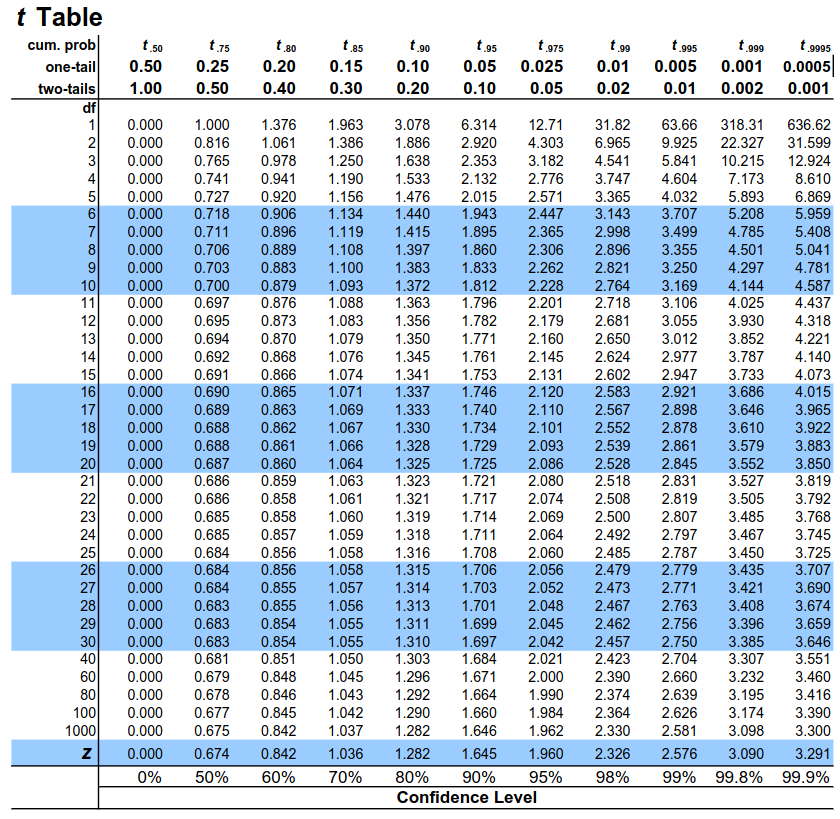

In [5]:
from IPython import display
from base64 import b64decode
display.Image(b64decode("iVBORw0KGgoAAAANSUhEUgAAA0gAAAMzCAIAAAATYKWOAAAAA3NCSVQICAjb4U/gAAAgAElEQVR4Xuy9P2zkxrY3SC0eIOol4gQPQ0WiouEkKw5sYDiROZE5kTmReyK3kueeyD2RezJl7oncE7n1kunBF7gVuRWZAj7AFLDApYBrmMIGpja51CaP2hdcdvI+NrBY7anin2azWexuqf9pfHhxPepiseqcX51zeFh16tTGzc0NhxcigAggAogAIoAIIAKIwP1H4H+7/ywgB4gAIoAIIAKIACKACCACBAF07FAOEAFEABFABBABRAAR+EQQQMfuExlIZAMRQAQQAUQAEUAEEAF07FAGEAFEABFABBABRAAR+EQQQMfuExlIZAMRQAQQAUQAEUAEEAF07FAGEAFEABFABBABRAAR+EQQmI9jN7g6PTnvT4Tk6v2zjWmvZ++vJrY3WuHk1Vbc+N6bi8nPXn98ntDy/Oh6cn2sgQggAogAIoAIIAKIwJojcHfH7vrs3UtZrvbC7TVnFclDBBABRAARQAQQAUTg00bgTo5d//z9q8eS1uh5oawpnzZQyB0igAggAogAIoAIIALrjsC/3IHAfq9R77q0AVlVppiw2612HC0c9hiadbVhRb+1pt3S+eE9Qdq9A2n4KCKACCACiAAigAggAn89BO7i2DlW5NVxHC+r8jTYbT/a38/UG7gCuHLU0+MFSdnf35ymEayDCCACiAAigAggAogAIlCEwO2WYs/f7MHGA63jx02GPYPf2Hjw6mRQ1Medy/oXH9++ev5k78EW2R6xtfVg5/Gzl6/fn12xuxv0zz++fvFkBx7ZerD35OWbj1Ns7kgIhb0g7w9ekP6gN+js+au3xxeT94bcmU9sABFABBABRAARQAQQgbsgcCvH7tpxvIJOYT12AVNuVx9fykq12bUcLwjJ7F4YBr5r99p1TdHeXRT5dqHXqshqtW06PjwSBp7Ta1VV+cXRZVHtHCfXJ68VWa93TNIf9AadWd1mRZGfvy/srAAILEIEEAFEABFABBABRGAVCNzKsfNDQVNlMaVXkFVV1fSKNv+wuKujaq2XTAwKkqwosiQkHQf2YaNbMJPm9zrkGVJdFtO4Pd+s6fWzctducPFWr7TdOA6QF2VZShrwrbpWOca8KKuQUuwTEUAEEAFEABFABKZC4FaO3f53v/zWq6dRdXKt+7e//e23X7/Lxs9N1fvESpe9jh15WYLWcv1//PnHH3/+w/faWuzchY7tFDXCQ/4Vj1T/8z99p6UnPqjXOeyUuWbXnXrLSftz/P/8889/ZBoIeo3meblnWEQMliECiAAigAggAogAIrAUBG7l2BHKhh6VoEy3c+I2/Dz67m//C1ZSrV631/nuUbzQu7mrG4lXGfhBgaclVdvtr3aj6tv733WayX7b0O6ZBVN8MWlXvY4VT9aph53v9qONvqSBQzWq4nU7hY7kbXjDZxABRAARQAQQAUQAEZgvArfdFXvpOEFMyWJC64Zsbu/uf7FLJgP7VxeOY9umZZqmnd6PPbEsLIJmfJGN9nuoGypnWqRK6Dou983TbO3074FjJV6bIPL++XmyBAw1RJj0Iz99x77ins5/ybmQICxEBBABRAARQAQQAURgFgRu6dgNHNuNuxEVdbF+Tv/iuN1qd0zb9QucuCJmReKGZa+HIomUo0/DFF/RI9GttIOgV1N7hfU8F/y7xTJc2C8WIgKIACKACCACiAAiMAmBWzp2sBAbO1m8oqXBdpM6u8V92BOrVtPdE7AfQoFtGpridxpxamQOPLb8BTthc0WZSgX188+X/YZNtmW38R4igAggAogAIoAIIAIrQ+B2MXaZfCeSMs2ZE7fkr39cr8denag1LS/85z/++PXnH7+vqPHmieJ2fc8bDaS79tK5uLHZvGETgkjyJdNLqts3xdc/P3xZ3CmWIgKIACKACCACiAAisGIEbufYueleVNg5IS2OBbtnxfNjUqX5/RfxdgiIdPNIvFt8jefOC61OL7v59drs2nHlsjMyNoeTj54NoXTD6+r03dv3R8en55fXBVs1Fsc/towIIAKIACKACCACiMAMCNzKsbt2vWQ9kufvuLQ5Ja2+4ySe1uDy6LDjpc+FBa5WYNaNN6eRE3Z9/q5STza7CnpVG3cEk7Z2jaoas2MfVt8nh01cnzRqjWa9VtFVWW2cT0kxVkMEEAFEABFABBABRGDJCNzKscvEsPkdQ9zZ23v+/nIRhCu6EjtaoVVTnrw8eH3w8okk18w0zi0MgsKYt8CG7HXCg52dB6LaSKb9eKVx+FWUw6SY2t1asypFtwKrrkh7z57DSWaS0fWiQsFoNop31Ba3h6WIACKACCACiAAigAgsEYFbOXa7WmbDBJy55QWSLC2C6IeV1mEyh8YFTq/T7vQcWIUV5PTcC5K+JHcJlXbbIPtigbThHlheqnZ730/Iobz5Rctsp/mMA8+24CSzeCeGoDZ6na8f5nvD34gAIoAIIAKIACKACKwJArdy7Lj9H8xew1AkstmAF0RZ1xdxSixAtLn/veV0G4ZKu4K+JEWvtSzX6VblCEG/1x07JoyXvv3FdTr1iEJ4SDUaXcf58NUUaUo2H337q+v2mlU9Yo/jeRGer7ct928/fFE23bcmI4pkIAKIACKACCACiMBfFoEN2Pv5l2UeGUcEEAFEABFABBABROBTQuB2M3afEgLICyKACCACiAAigAggAp8IAujYfSIDiWwgAogAIoAIIAKIACKAjh3KACKACCACiAAigAggAp8IAujYfSIDiWwgAogAIoAIIAKIACKAjh3KACKACCACiAAigAggAp8IAujYfSIDiWwgAogAIoAIIAKIACKAjh3KACKACCACiAAigAggAp8IAujYfSIDiWwgAogAIoAIIAKIACKAjt1kGfj99983Njbgv5OrYg1EABFABBABRAARQARWhwA6dqvDHntGBBABRAARQAQQAURgrgigYzdXOLExRAARQAQQAUQAEUAEVocAOnarwx57RgQQAUQAEUAEEAFEYK4IoGMXwXn57gnE0T15dzlXdBfV2ODq9PRisKjWl9ju9fnpeX+J/S2qq/7F6dnVohpfYruDy9Oz+6ECE0D5VBi5t5r+qWhEXs7uLV+oEfmhXPLv5UoOOnZLHt47dze4OHqpyDUz3LxzUyttYHB5fPBE1jsBv1Iy7t759embZ7La8oS7N7XSFvpn717IyqFz38eD+1QYubea/qloRF4d7y1fqBH5oVzy7+VLDjp2Sx7iu3Y3sJqNnsspqnLXllb8vNNudJxA1pR77qBedhot25cUZXvFgN6x+36veWh6gqzs3rGhVT/+qTBybzX9U9GIvCDfW75QI/JDueTfq5Ccm8VcntnQFRE+/nlR1us9j/Tit1UAVG64tMuwa8BtsWbB314L7vB6s1PTJIHnBVlvWnavHv8wWnZQRqXTkDhOqLQ6NZU8LSrpA24T3B9erzd1Ccr1NiHDt1oVUo+DbrRaxwlp07Qmp9TaDV2OKGiYftzp3//+d7gH/y0jYin3IiojqeT1bikqSyHolp0EHX04LwSTXbdsZuWPhWZlOE8n1Z2VE3RbAuw6qFB8CVXzts2s/rlPhZH7qumfjEbkRPn+8oUasVqrtCLJWciM3eDstaY3TZhXMgyF98yWob89nxgSFpqNhqvUG4YcumZDU6uWVGtUZM7t1avNiYE/QbdetyWjWlE4p1fXKx+vkxdVaLYOXUGVZUXdJZRp9a4dCIom857Vrmra+2HbTrveCWRdkzjXbBpG5k762lvtH5KqikABrxi1ek29t3NEBH7qSUh6rV7X7+0cUcirIEbAh6hVqaze02vAy6pCXFRBrdQOq+T7635enwwj3D3V9E9FI/Lif2/5Qo3ID+WSf69KchbgzgZdMh8jGNGMkt+t6pVay/InzdjBEz0yBxV0NIK9QidywN8l035GL5pYK6SWzthxYsWkM1ihVSM/6ePRdy+v0qk6uPy2RijTO/R36DQV8rMCjcc1tQ6dpovbiOdg1mfG7ubGpsxp7WQ2MeLr/v03wltuRrO394/+hOJIWKN55/vLBUh8j8w9luvZveDvk2Hkvmr6p6IReWm/t3yhRuSHcsm/VyI5i5ix82w3hCVXLZpRevj1h19//um7Lx4Sb630EmWJzEHxAqyTcrwsk4mcTfgF/4QhtFh+QbQWncHaVDXirnmOm9QX1ThuaGBbdsjxarVC54g29ytVWIANbMuJq8q6SsncVHXShu+5E+cZk06W8++143owz6UoRWieHTyAnb3k2ntzzkEM+dvnO1tbDx6/Ol67DZsD14bhERRFGsPt7PVOzEWyTTnH19gTqyxwCB98YcTj4OL9y70HG8MBuPr46vGDra2d52/P1m4nsGs7AeisWhTxGNG98WDv5Xu6Ffvq/bNkhF58XDdOShmB7TqgETvPXp/Q+fzr09dPyIA8eX2azu+vUpiyfZdpOoRiP98DzX7y6uMlGZD+8YuteERWv6+/VCOOqAbsRRrwCWn6CF9c//zdi70HW6nCrFamZtAI2K6THaD10vRZNOJqVNPzfC13QKbXiDHJub2mL8Kxi2AbemKDnHcU3QFfLees8cShSy4+8/dU45A2F3K5dgVxGAhV3lQIL7eRa1Yiypu/+13HBh8U/Ai5oKkrxwnVhuXAZTYU7rJdb/mVnt2UzFrjZM0cVNdyYJBkVR7fOaEeUhbstiGKer3yiMvxVcD56oqANp862uOr4gOz2bDklufCANQPz7jBSaNuSk27Z/itentiaMFyeeq7jkccbbVgVfwcdusIh47XUe3GYa/PEadcrHRsMkptY5zx5VKe662Ekf5xvWZKLdushp1q/aTPnR/WOnzDsup8p3YIX0JrdbE1fXDaqHa4um0dCmat1gGXlHwl6S06IN3qo9WyUaIRV+1a3da6dlfzmtXGOfepaHqer4tm9ZBY3pZiN6qtVWv6DBqRZ2S9NH16jchrep6v5WrIDBqRk5y7aPoiHDtJJXFHbs+kE0VXR5qw8eDJ2wuOp86a7/vEyxhQP3bGazDo573EtAWn16P99a0edRqUcednk86shHanS2sOLrod8JMEmOKLW3HNHtXDgW2SNiS5wPFIO1zBH5cOmVcBsgpepwTQ0O3WjEq943GbfcdyeVX/cl/X5fA2WC+Svb7jgj8kKkU7MDcfPtrf3+ettiUftr/ZpYKS4WuRZM3cdjTxyBfJGrcJpQJ8UwiwhYhIvgOzxbKu739pqDz4tevlaYNrEDnaBRBIEH4HF3ACbAAjMBceBFazYlSbdrBuXz4ljADdMADa/hcVXYJZevfKdnxR1Z4+1VXRd+z1mtUu0fTAcwNR1fefVipyCKsNg2sXvi6cFgzIoemveEDKNIIsoigwAF9VNcGzrctPRdNzfP2frusJqv7FfqWico5pr3hOewaNyA/QWmn6DBrxf+U0Pc9XgZFbXNEMGpGXnP/7Dpq+CMdu22hUJQ7i1JTHz54/UWuw/Clqhsxt05W3oFvTXx28VCudWY3Q5TsVJvXU98UmOLTqyuPnL54pla4P4Xr1aLl1dMB2q4dAWWBWlT2gTFYbTiioh4dfJfNGvHuoPnnx8rkCG2g5XqvXVvz5mxe3wCNTil63/ur92GaUUFSr9Wan16mG7Urt+P8JgsiTJu/iAH6s0wXOPfgRfq/x6m3hItjgrNnyQYrI/FGOrxWbyVEUQ98HYEPwct6ML3eD0yD0dFE0TLlef8qFAUQBkE8b8p9w/QYEOHNb1YOPF3lBIfuM7KooaB2+Wtc3IUhCqx22u72mbNcqh2PV848v9zdIFosRCawPLEv1qR8EGhHA2MEO/GhAAiKQa3SVaLogyQI4otd9x/bAnIIAinq13ur22pp7WKmfrfSToUwjJPjWhk+a/hW8d7kY8E9B03N8/X+yJAaOcwnjA3yuXNNn0Ij8AK2Vps+gEbs5Tc/ztVQ9n0Ej8pIDUzi31/QFBRJ6sDNVzqU7gX0RdjPJJlLvdck+gEy6E06JQunDHsmDkiRdsGoimF6a2iNOSTKWHSPaPKE1OpAfBWZHRKWS5EeJnxgJ0ffMJivdCW+0zZTAJmz3iK712TwROi1I3EIWYxtFqTVCusMEmOblxv8BGUUohpBKhl+7TBxepwJZZTheqlkFu2JCsyqKVTO9k+WriO8FyfAUzfq9mkL4SHYKZR7xWgovVrpkdUwCp8iHtAM8zexiVoW1S1UTWA2VaKugJfuMUk5IahpBbzuuWVf4REXp3V6F541uwfhNAdyiqpQwAprRqSqiCDOQIifVbTJAVDGcZGQWRdQt2i3VdJA6VSJ8SLDzi6pJpCF2TYSNYqvdV1WiEbBbrWXIoggRGEK6N+4T0PQxvkAINUmEBQmZ5yED+y2Gf46PzKARY4yAYFFK1kHTZ9KIUU0v4GuOAE9qahaNyEvO7TWdm0TWPbgfO3bRhtYF0Ls+jl0Rc6Fnm7YX0teTXLd8t60JsNE3cBoy+e10dPJzvV6/RXzcJIzAmxZITw1inq/CZ9eq0HdMyw2oQ13teb5Zk4hDFHQNQTA6jlWXE/9orageJ4bw4QRAN/itHdd3GuCp1myy5x32lbvA1z1hJHAt0wF3x+02Gm3Lc9q6AFvoQ1hSAD+o5ThNGKiaPc7/upUkCgKfpvWW6brdigQD4ZPPIF5tOr4NA7SejEQaATEw9UbH9mwCeJ0C/kloep4vyJRab/Zcj2p6y103MQJ6WBoxOkDrr+kMjRjT9HHBW/WgFGtEXnLuoOno2E0e4vV27MgEHc3tQr19MmOp1mluZfJbJNmeK1F2l8mMrrZGygiZss0kEMnztVoqJ/dOcuqQ91YIWwvodJ6kNSzy2e7SaUpejH9ObmnFNWAY+Ip5AwGOVTKdB4JVI5nGw4gPTpCNdpzee8WETuieOHDkOyESJB7GI1KQm+hbmheUWm+101wTGIhvJwpC5y5oJvZql+Zt8mAGjwyQpDWpoK3blWgEmX8gFknSITqTEPmJaHqeL69LFR0sb9tdyy9qlkbkGFl7TWdpRF7T8wO0cgVhaUROcu6g6RvA41KXnBfQ2cXbPaXpwWrXb98UZQG5c4+///77559/Du7dZ599dufGsAFEABFABBABRAARQAQWhcC/LKrhJba7/8M/bn5YYn/YFSKACCACiAAigAggAmuJwCJ2xa4lo0gUIoAIIAKIACKACCACnwoCsJwI1zg36NiNY4IliAAigAggAogAIoAIrDUCUZzYOIno2I1jgiWIACKACCACiAAigAjcSwTQsbuXw4ZEIwKIACKACCACiAAiMI4AOnbjmGAJIoAIIAKIACKACCAC9xIBdOzu5bAh0YgAIoAIIAKIACKACIwjgI7dOCarKRlcHr9+/vjB1sbWg70nr96dXTPJ6B+/2NoYvXZen8fVr8/evXqyR5t5/Pz18eXyT468Onn74skOULi18+Tl29Pik30JtYOrk3evnhFaCc/PRngu5ZGJzFxvTI/k9dn7g+ePKcswdi/fnlxlUO+fHx1QJgmPB0cXSz/sdmYCro9fPADxenY0MnRnB6Qwe229Opkr4JMam5WR/unBDtD7+O3oebZTy+ckem57f3pNL6t59f5Zbjw2nry7vC1NrOdmwLxEX8o0nVsOIywGSXkJ5fnHJgsPQ+ryDd32d5lIjLZZWrOM5eVo+mQkE3bKGJlCPkG+iGV+ebz8V+FtB3kez608CfNyCAg9s0PS5pdccCAenMIKqfbhyv59s4yTJ3w4cGpkOMlxsIys5XDqaH7k4agnQnZIjn0auScay02qH5jVHHHFx8He3ADHcArw6AV148z5bB5LRnCOt6ZHMrDImcejl2h046MMPDiGYuRewWmscyR7vKlZCYBk51okierIsbFwsmqeS77SG+9vYSUzMgJZ82P5krPnKk8vn4tiZHpNL60ZmpVRgwGjE5/kOz/Kp8e8TF/KNX0pjJRAUkZ57rHJwsOQupLuZ7tVKhIjTZXVLGd5GZo+GcmUmTJGJstnYMEJ18Rwze9Ua99sGAo56EWQ1Eo7OkKlYBTZ1QK7VYEG6LH2xvBIenh9e926Rs9QFySt1smcWkIO7B4xv+lp40dHR3BjvP+CovFK970kJKf2kXO/SxmBMz3hhPCaRSot27GDMxPJuElVM4Ajm+AsRfhRcLA8pT/oaKSuUjed5HJdnziB5FhPuAMHYIJMBL0qdZxG3mulAMzhptdWSZ9wtig40R4cU0vI0YrOJYfTYGhNnZ66E5BzLknd+IhYNo9zIHKKJqZH0u9Qzw0O6yQqHrqxWwRHoUA3oRWPQd2GAbHrdJDhtDSGxz4FYTNWmYmA0DWbBhxKF18jjl1INQIEtJsXuhkpumX1WRgJPatVAYWPr6wCTC+ft6Rz4mPTa3p5zUh/eK1pDwfEC+YqWDNgXqYv5Zp+swRGygaljPLcc+XCUyJ1Zf3PdK9cJLJNldUsZ3kZml6O5AgkJYxMkM/AATcpnTuYl2PnwAmexN5LCnHuyAus8Ix6djVwRulbUZQVif4Bb2vKMZxdLRGTJUiKTJsWiTcQXXAGHLnFpxc4B5Gu/6UdO/B3AZVJjl1Wnpbs2MUfSfG82w04C3SEq3T2MH9Fg1xwM/n21eBcTHLZkTSo5CDZ5VzxhwVM5VCpi21E+nWRJcLp1CqGrjcTJydW4HjSgcnjcviYAUn4yCJ81BMdhFMAydhFQxnPOyYzKfErTqo7y2EDRCCa3J2KgFhceFlV6FzQiGPn0i+PwpFcCi8zMBKjzEuqkv+ymUE+F8TV9JpeXpOcsgoDslBRmh7zUn0p1/RlMFIylqWUjz5XLjwlUlfS/Wy3ykUi21ZZzQksL0HTy5EcwaSMkXL5jL5EOUFV6TfefBy70KRf6tEqlN+l02hyI3LMMnSXVIvec4LRI9MAUWvRl37sbkem2muRuZ10SgR+UmUvmJliOXbrFWMHK+YQZ7aztUXjkd6fx/FIJy9hkfzJm4/vX0HsFtx7/DK9xfXPaWkUmfa+KDLt9AAmwgAXQGdj7w3EovXP3r2kQWBRaFcS9nTyiizFvzqFqsu+XMcjXUpy9IHxUKS+fOC6BQFqV47jw02YhYTAra2tnccv3sQxXb7rBXBHkMRtyoAoS+SfuHFatODLc90QuoCJz03S0yZMgcI/oRexN9L5/jc//fzLr79+/wWtyV3btgf/CDKlmc3jSBsL+zEDkrtf/0j4+PHLCPO+bTpAFnhHwMfAc8lQ8aIUjWv8r++5Swr3mI0AujJguulabAbevhMNoXOoRhr4/PXHiyUxQciYjRFB1usws9ipRLAP+ZhBPhckW9NrenlN16aaBktakRUoj8q9FTMzYF6qL6Wazi2BkTLuSykffXCS8DClrqz/me6Vi0S2qbKa5SwvQ9MnIZnhpISRifIpqtWW5VqHdGloPpdr2WDReUVX4bX1UDNI065t5+Ph2dWubcuFZ6ABeF9sajrx33z67nMsGzRaVLVHcH9X0yR4cdqWTYzsAJQE/uG97uuDg4M3708uJwdqr5Njd/FO02pty6NzBoHdqWva2/P07eG06u1Qb9QNKXR79WqTRkRfvte1etcVtIqhAt91XR+PH5Y0nX6685Jm6KrYP64ajZ7Lq5VqRRV8u1urti9JW6u7BmFArDSZaY2IiP8IQlo8csWDDN4SOA08F/qu2TLUyjHIVuATv26slTAIlvUKDiI+BDqTPCQlCChhzGtw8c5oWMCrVK3roDElPDLbmOuNWyI5uDyq1HrAq2g0jIcwIPEA8nzk9ZGJdKATBqQcj7nxMhMBT3/8449fvv9yN/K0R2mIX78gbV4IQhe4Vruq6UdL05tZGHn0/W9//vrj148izEf4uKV8zm08uOk1vbxm8voNXCegVsDpNjT19elkgz89LzNgPrW+5DWdWwYjZSxPTTnVZtISw7iVSF1Z/7PcKxeJbEulNctZXoamlyM5LSMT5POrn//xtw/fffGwyJzNgvpIXd8jX+qCKNBWhUgWfPr5nr3Y1eJPfWiB1N8UBfIvKex7tOloSif5N4wKPQu0HDzIXqvd6XRadUOZrOrr49j1jw+bTgixSo77x29/+4fT1gUI5G50U29YafR++eG7HzpNMgEKTj94K2etph1CQJfV63R6dqcCT7TbMCfHDQb95Bo8+qZdJ561aDR/+enrXU6ptdutrvXbzx9+Nttky8ISp7Syoz/F30Xvf9Go1avVescJ/tc//xlEMV1+rxE5ulO0uW5V+udvNa1hw/tJaXSbT6nG3EceBxdHhlYzwduWa512PIG3bmDflh5Rq9Vr1VrLpkLndclcWGA1mqfL+mS4LeH35bkiTS+mPaopV2A8qvCBGv7zn//07Qb58vfah52CKf7iZlZQWqTp3H1kZAXYlXY5q/CUNXZPNH16lsuYnfXeIKRTLckEzGY0fxEVZtoqqRbX5fnY36QtkMKxRtI7cF9SdE2rtCwvCDyzpvCh264dEj+Hfa2PYwfTlzBaSqXyiPK8W6mqwJJDV7bIxcsymaTkNqm3CziE3DVsGoAXTK8CW0x4nmw2oB5fn7uCAMXkMo5HP2O3H32pqZLfPnj5/LFEH4HG4j5W9M8mDzthKB0xIfEf6cdhhq7N/a9/+PHDhx+/2SczEpuPanUavO85znX8GZBvhRei74slMCdEU46BH/MRz1jBUDA6vz59o0H8dwChEA3T+iFy67gSHhntzLl4ZiT752S2OfLqutZPsVsHwxqPa+T/UKEldoGJx5z5mBsBu199/+NPH3767ikVut2va3THaRAv0M6Z6oLm5sTIzPJZQMqdiqbX9PKa20+/+eGnDx9++Ioay+2ndWIsYTnHdubnac+A+RT6UqzpQPriGSkbsSkoTx7/VISnnOVlaPr0SJZpwQzyWSYBs9zbjJdc4vf0IHrNJX5e2lJJtbhuGMZ6mjqKY43QtqPS/W9//vW3337+7ovd7e3dL5t1ouueZZWul6yPYwdclGKccuLnJTQAACAASURBVJ6tRrgXjbY9vJyWUbAGk2n56uMLWTHqHZeTq4f1aN9macdLuClF0XDRPC0EnPlRsJwcx9xlKbi+PDs9OT4eBhOmwgWhXHRLY+D5kSsL62bkSdh9swQWaBdS1FXge1RuB74PjjfZQVRIQf/sjW60nJAT9bZl/fBFOm4lPC6Hk9mQHFy813Uy5wjeqWX/9BUswkbXtkSD60Lf82hBNENPYh/nuj6QdDf+77wI6FOh+3g6NCUMkzZOwnxK5sTIbPI5H9JHW5le08tqDq4vzsAInJwPg3uS98D8JGsGzCfpC1PTl8JI2ThOojzz7KciPKUsL0XTZ0CyRAtmkM8yCZjpXhQlDaE09P3mRzMY4thrml0tupME4wx8urxPYuu3Jbo6G735k3/56AUyuL66vLi8jn1BMok1BdGz7ctZYO2A7jGBpdgofYsHS7HwUyObiekOsHQbaLR7j+bFiLJJxHv+/G7NqNRaVpxBLENqtCsWNp9AWbTBJE6BEG3JivNxrTKPXbzBJ053QrfEkH080e5W3+7BZTqUsbgmZErzYOdpknWMp1sYk91GUbqTOKPcctOdRNnOoj3gSQaiZHtl4JiEETsaoDS7lVztOW58eR5huYzHBUrgqMTQIShEEiLMCB8WGQAAPcncJxqdLB/kZrIBTSbpTsIk3Ul1ielO4mxnhQRAggYqWG6yqT4GIIY/sys2yVihkTw6kG4pThG3RNEqRXJEQYajGFM9ku6kTD6XIloza3qRTYDt5nQOXIZJYiKCdpSsi5Ug6ZaMlWI+KjyllqdE05fDSBn/pZSPanq8Q7PYuKV9FEhdWf8z3SsTnlHrWlozSopWaNyWo+mlSE7NSKl8DnE1K/HbNMoPMhPg+cpxl8k+VjotJDejXbEhcdeihEMl1aKBiTR1dFdsNCqRtYq8lHhXbLxPWYvyipIFSuhVjN8irF2xa5THjrz46BBIKqyVEsgg6gpeiCWO3U2ckFeEnRCGTFEmr9D8FafdgISCWuN/Rv6jXG33unHWLkjiQHshArCyBMVRzjfCdOSO8zDCESdhtKtaiFInJ9nhSE0hWsEl3nBUN4EwbYUkwxt3dPP4zPE3uDlE7IZ8RLn5aA9mlb6NqEueJO2J6g7/G8v1EI0xHudIbElTZUg6DYkQrNA0MrElzPMRfUXA7chJJwMSj2uStqik83neKiEgsh7ju+jHHbuh95oROjnNJj1PepltsRnJKUjaQtErtkw+mV3P9YY/taaX1MzIFcQ5RJIFKSHnndeIjXn8gZwKD1tfyjV9SYyUjCCb8ht4vWQ0nX7DMY1bqdSVdD/brRKRyFpXaLSkJv3EjK1R9E/mNTFMHTx8vcxf08uQnIGREvkc4jpPxy49AgB8CYWuj6V57GJfLMovl6SAHq92EydVhmWs2MlJXghJpnsB9o7S3YdiJc6hlYylIJN9oHGvsa7fA8eOSKPdqiapl2GvcpLVmTljRx6BpKqUWZ5sN2ccLhHaTQ2GAarULUjvXFPhAcjurFSadC1Wouc2rNSxA1fHhU29JO10PiH12Hsr9HqQ+1qKqsp6DfZRDMXYt5oVkBjK7Gj26tlMyO1re3FmbpKDkYxI6mhnNTZ2HvL+UJpOuZTH29M2y5NMJLPmnuHXkSzEcV+BAxtIowGR1Co7U/kspM1Ul0nADI4ddAiKFgkWlax1YmRMQWJ4ihw7uMWUz5lQvUPlGTSdZROg9wDyw0VmnhcgTw3ZR3EHmliPziA8DH2ZpOlLYoTFIClnUD7m2EHVycLDkLqy/me5xxSenD9U8kIpZZnAsRRNZyI5EyNM+RxiOlfHLpKW2OOA+aTUR4m/dIbp8kCoiqpBA+TkCZV4heMnT/QiF2Ds5AkY9ZpO0xbTl2p3qOssx24DOhp7u2LBCAK///77559/DgeLffbZZwgNIoAIIAKIACKACCACK0fgP/7jP7799ttxL26dNk+sHCQkABFABBABRAARQAQQgfuMADp293n0kHZEABFABBABRAARQAQyCKBjh+KACCACiAAigAggAojAJ4IAOnafyEAiG4gAIoAIIAKIACKACKBjhzKACCACiAAigAggAojAPUPg3//938d3TgAP6Njds4FEchEBRAARQAQQAUQAEWAhgI4dCxksRwQQAUQAEUAEEAFE4J4hgI7dPRswJBcRQAQQAUQAEUAEEAEWAujYsZDBckQAEUAEEAFEABFABO4ZAujYrdeADS7ePt7Y2HhwcFZCV//86ODZ3oOtja0He88Oji76mbrXZ+9ePYnuPX7++vhyUNLOYm5dnbx98WRna2Nja+fJy7enV+xezg4eAK/Za+vVSVy9jEd2i/O8cwskrz4+JxztvTkfErJyRqYn4Prs/cHzx9HQPX5+cHSeFazB5fHr548joXvy6t3Z9TyxnqqtqRkBUt+8fLIDtIIMjjEyvXxORdXslWZFkmETbiGfs9Na+sT0SJaw3D9+AeM0cu28zuhPKQXzuTkDkiUsl0vdfCgtb2VqBeG4ySwzpK6cghnuliCZa6VEeLgyljPm7MEevIpOrhbxMpyMZMpOGctljEQNXB+/IC+XZ0clb9QMcsMz1Zb7l2+1u878uww9s8M4MDbpjHkmLIsaOEwMAIP/sirMrdzvVaPTmYVqctToeNvxKcLDMRS05PTv5Ozh4T3R6PnjTSyuZHiGdEKDVLMYh1h6LSWnwhxf6VHaSnhcHO3Zlm+DpJcc7y7VydnD68HI1EgCx/HJ4BwfHw3Oq0035sPvGnCocubilYbDGNfFjNDUjEDFUVLhgMWU2FnkczF8zIpksU24jXzOl58ZkCxlueAsWZGe3b2kawYky1gulbqlsDK1gqQn2Ze8Joqlbm58lCGZ66RMeEpYDqyalH+7iEZ3zi/DOQnP5Pdd6LRiq6YmL/vyweDKby/ortNUhPQlPr8+QqsO76bMa7WwabMmiSK4G+Rm1skrrEwKl+LY+XanpqYvJLZjF1pVkQisXLdDOE64LpMfcOQ8eckGXYO8knm1BYcEB724YmMB/jMLK6+tEnoEo+OBdxY5OrzWLlSnkILPSdWuk1yu6xM+ynhk9Tzf8lsgmbp1wFLi2K2ckekJCKOztwW9TQ6YTgyvVI+EB5w+Mq5S1QxuQrepkoETjG4wX9RLWpueETsy6FKl6wEjvlmjlAsVk0jWLPJZQs0dbs2CJNsm3EI+70Bz0aMzIFnKctDRyPgodTNvBYp6nX/ZDEiWsVwqdfOnerzF6RVk0muCLXXjvd6ypAzJXJMlwlPGst/Roldh0wYjFbqxW6Q04b00v2tOwlPGCCHebBpS/K3NcWvt2JnklZ7MzswR545O3j7D+ZKJTa+LYwdySMwbJ6qqRP5lO3bxB64Sz6W4TTrrRV/AoVmhnqHWiV64do26gGprrsJchmnQ0ak6VXp0Mid23Xi90ANwqbNQdLOEx7Le53dvdiQjt46P5rpSCVw5I7MREPieF4lOGH/vxrITz60mMymxtApVc36QT2hpakZCu1U1dN1oJ58zVqQFVClmks8JFN3u9gxIltiE2eXzdtSyn5oByXKWo+FZpiiNMDUDkmUsl0odG8U53plaQSa8Jkqkbm7UliGZ66RMeMpY9rr1CpiBOnyI0stva+RdON+54DkJz00ZIzfxW5yXVZgMI6/z6WbsVhBjd/F2T++GHBd2jY2tV//j/TNYOH5+REN2ogCznSjArH/yEoIvonilASxPvyShY1sQNPPizUlR6NjpAUwoQCNeS42e6p+9g0gbEsBBYtFeJbFoJ69I7M2rU9Jh9hpcfnz9nESnQXUaHbbUKCJe0modx+1FEwx52tLfA8/14QcvStRp4+J/fc8dcL7rBVAkSOJ2dE+WyL+u49GfS7g814WB5WBCdJP0tglTo/BP6BVR0HeiUudQ3YFhfQARgR8vaBBEGY9LYAK6mBXJq481MCG8dljXsgSunJEZCdh+uLu73T99+/yxpLc9TtTb7douYSgWIUmOhO6hKBEbE7judOEedx+06RnZfPrdh19+/fWXb/ejXi9tmyiMKMugFLPI592JLmphJiSZNmFW+Syi5G5lMyBZyvKV45DhgbWWoXFfSCgUg90ZkCxjuVTqGF3PtXh6BZlo3JhSNzeCy5DMdVIiPKUs7379489gBn78MnoV9m3TgZbBO5LmxsVMr4kylksZIe96xWiabroWOx0DK3DsBEVX6QtCVI2K9r/rGkzc2KYFgdrXtu1CuW+bl/B6d3p2yImaoXDXJ1XVaPacQFQUmfPMlqFVjsfcLknTFdIuCKYBPfSPq0aj5/JqpVpRBd/u1qptaJZ5XRwa1bbNa7VGo6oJbq9pVCJvk/nEHG88/ObXf/z20zf722TCq+wKgpC4ThAGFUkszBGRR8IgCLjAJ34d3Iobif+Ae4sIGi2iEqgjxYI4SgEhbuxybeoEhmBaQx4YcK12VdOPYIjKeBxrZiEFsyF5Hbt1zXZN4bIDuHJGbkOAZ/UsWBEnoyhwkbANwmhc85IVy+JChmC00dswAi30z94Yh2DReaVefwq/Z5HPhXA1C5IlNmE2+VwEJ9MjWcryAKwAIS8k36tgBXwXjLtaYNwXwQNpcwYkp2Y5L3WLoj3b7gwKUs5yidTNjY+pkeTKhGdqlgeXR5VaD15BotEwHs6Ni7kJTzkjT3/8449fvv9yl06VTH+twLHb/fqnQ7IAzmuNXz58u//I0CUuBI96MLBNm1Lu2fY15/QsnxO0irp50Wp0fU6s9Nw///a3P1wSNeP36odk59Rg0E+uwaNv2nUFykSj+ctPX+9ySq3dbnWt337+8LPZJqHfpVNXA3pXAO+w2mj9YoGnaXcq85SC6cfkr1FT1Gr1WrXWsoP/9c9/Bl63Ak55YDWap8vyQucE8/XHKpmtU5vt7x7NqcmVNiM37DD0rYbKOd2aXvk49gGVoa7AX18p7SOdX5++1nSINgUj0up+v+Zjs9ZILmZMKcuiUatXq/WOQ61AFArl9xrNi8X0ufhW75XULR6ORfUwtb4MLo4MrWbCZ4Nc67TjCbxFUbVG7a7Asctz/9TQRc63eg74dSGv6ZoQOqZ9YVke+H7g1/Ud8lUn6LWvqJ+1/UUVPEGY1rOvuCvYAJdcxnE2OQPUe/Slpkp+++AlrCxBnDc8Gs0/5PuPfm9qVUKGWddlQXig1bs2dF9cdZWlvBDNx4Vh5P+EcAE9PC8IdIqFckmnzdI/4NaM3v6tGYyJC8iED7niKR0YovEmd7/6/sefPvz03VMy9bi5+3XNAM+OC2CBtozH8XYWUTI9krFbp9RbVWkwAOQp52HYH8D4rJyR2xCwub29ufnwi8OGDoMWmB3zmtuEdiK2RiUrnZldxBiMtDkzI1fHr1SIs4Mpf71lmd/Gbt0s8rkQnuaE5PTyuRAuoNHpkSxleXP/6x9+/PDhR1irgEY3H9XqNObdc5yy74k5MjUDklOwXCx1cySX2dQMCjIDy8zu7nZjCiTjDsqEZwqW++fvtMSr61o/zdutmwHJMpanYGR2vNfAseNUA3byelarDVN0sn5YUfjA7jZ7Lvh1hhatOBYwNsnruvr4QlaMesfl5Ophnbylyh21h1//4tidZpWs58K6YKdhqNWTUV+xgIplF21LNLguhDB32rXv+eQfUYaoNlGSCCiB50dkwyInuScrEvlnGZcUdQVB+NTtHPg+oY6Pi0co6F+enZ4cfzwdro5HTgMs95XxuAwuAM5pkRzAuiV8MoROUwXV5UUa5MmR1Ae8/rG/ckZmIOD69N3rg5cQWTqcMI0GhPxXiqI1o/hOCJnwo2BOOY65W/ygzMAIEHN9cqCRTbEcbI21f/1uP/2umUE+F8TTfJCcWj4XxAVIxPSaXsbyNbUCx8OkiKkRmGTe58TZDEhOYpkpdXMitbSZGRRkBpZLu7z9zUlIZlouEZ5JLA8u3ut6ww44QW1Y9k/RtNDtiS54cgYky1iexEhBz1MUzW2ryywN0e2bvBHtnSS7J2maDrhgPyFkU1CiH0meDKcuQQEsxdIdLpCgRiY1C3IdwW4bUpFmMoEtFPC3HOX6iDqIt+EW57GDvHrNeq1lxX3QNCLx00tJdxLDF7EwuivWt3twmQ5NGpLsxKHpTsIk3Uk1SncSb0qN0p2YVQJbwsQsw3P7uvEmJkHvALFJBqJkH0/gmIQRm/IRjzIsk5H0GqHXoRN2EbVlPN6etlmeTPZtFSIJbj/hw4J0GrABiPUGItswV85IKQEhhNMRwXKJzAfdaEOzAqYQfjnNKG1SrALxvq043UmLpjvhl5ruJN7xXST2NyMKcgPreXRMIHmd6SaX51PFLpXPWQTk1nVLkRxlJOmjwCaUyuetaZvlwVIkRzQ92fRXJDwxGpBgjOSmSZJ18VPu/JuFXlbdUiQzmj5JeMqkjtX3PMun1/R0b3ihcUtpKpC6udE7H+EpZTnNlCcasCcxvmDTP03XMK9rTsJTykhKa6wrU+rGavLYRVl/YCZHrdH0UjFAkG2K+HrxBt9hng4/zvwqyKqm0MD84lSDcXoNQVK1xv+kLyperrZ73TgNDGTWIJ0VO3YgCMSzEJRKvdGoaRLpJE6tu2LHLoxeuZCJKxpjN3qvkvXXyKkgeeuiW8TRi8tifwOSjRUmkZuXaOfbiWEk79WYAmrP6RVlSuP0KBvLMEclrBXHRMu1yLGGlzP1HYp4zPe4mN9lSDoNIh2cMp5GJvaOMgl3Vs5ICQHRt0+SHghmHZV4yNKpbbmWpgtIki8n48qDyzdXIzlpHNmMjChI0Ity/lDpyVxxMsUy+ZxEwXzuJ8Ys1ZAhknlNjzssesWWyed86JzUShmSo5p+U8LyMPvj0AqozWVKVhmSOU1nszxB6iZhOZf7bAWJZznSRGBlLKekFEndXOgkjbCRzL8myoSn5DWRzg6NWoFo0mdubNCZFdYLd2rhAXJKxi4l9j44djdu2yAZEwRYK6F+R5RmhtfIRA9Jf0YWTpNUbeR+6PYahiKCA8CLsl7vke+7giu0mxosR/KCXLdCr1tTwQvkBUmpNOlabDTLV+zYkVmjXh3WYck4QSdarUumksi1Zo4dmU+BDaQSAQN8WNjKGztOlFjfalbU6B7w0El4KABrUUWeSYYKYMwPVc7ck+yxMa1kxLRRRsp4XBTlo+0ykZzFsSsfrKUwwkRy1LEDWgKnU9NlOnSwi6gK+1oyBIZul8Sf0nGF/ffWUr8XKB0sRrL+UGw7cl4d/BxmyWbK51JGAzphIjmDYwfNMOVzWXzcMJEc03Qmy9Tsgr0gFosaDMj5lJW6pfDCRHJc04tZnkLqlsEIS0Hyjt1UwrNQxw4oKEYSbswiPCybwPDr4tW8uY7FnYUnooY5dimxszl2G/DcuBXEkiwCv//+++effw7u3WeffYbIIAKIACKACCACiAAisLYIrMPmibUFBwlDBBABRAARQAQQAUTgPiGAjt19Gi2kFRFABBABRAARQAQQgRIE0LErAQdvIQKIACKACCACiAAicJ8QmBxj9+2330KQ2X3iad60/vd///eff/75+PHjf/3Xf51329geIoAIIAKIACKACCACt0Hg3+mVe/JfpmnpL75p4L/+67/AsZNl+d/+7d+mgQvrIAKIACKACCACiAAisBIEJs/YrYSsteoUd8Wu1XAgMYgAIoAIIAKIACLAQgBj7FjIYDkigAggAogAIoAIIAL3DAF07KIBG5y83NrYeHBwSn4OLo9ePdnZ2th6sHewfsfF3jMJQ3IRAUQAEUAEEAFEYGkITBVjtzRq1qOjgXlY7zqhqBqarErb3P+7HmQhFYgAIoAIIAKIACKACJQjgI7dOD6B74dw/lil9cuPT8ndv/SW4HF4sAQRQAQQAUQAEUAE1hWBv/JSbP+Crrhube08ew0Hw0ZDdPnuCZwUDH/DSZobW69O1nXgkC5EABFABBABRAARQATyCPx1Hbvr46pW6zqBqOgab9UaZuTZCYpeUUWAiZf1SkWT8oDhb0QAEUAEEAFEABFABNYVgb+sY3fda5sBJ+ht+2+//Pyb3a0QZw6uh1/+0KrK8IeoN3/+8O3+ug4c0oUIIAKIACKACCACiEAegb+sY+e5HkzRybr2kECyrelKHhr8jQggAogAIoAIIAKIwP1C4C/r2OWGiec5/n6NHFKLCCACiAAigAggAohADoG/rGMnKzJ4cq7l9AkiA9ty4t0TKCKIACKACCACiAAigAjcUwT+sulOto16RTQ7vap+UNM4q9Px7+kIItmIACKACCACiAAigAjECPxlZ+y47S/bVqeq8k631XGlRrsmoVAgAogAIoAIIAKIACJwrxHYuLm5udcMLIH433///fPPP//73//+2WefLaE77AIRQAQQAUQAEUAEEIHbIfDXnbG7HV74FCKACCACiAAigAggAmuLADp2azs0SBgigAggAogAIoAIIAKzIYCO3Wx4YW1EABFABBABRAARQATWFgF07NZ2aJAwRAARQAQQAUQAEUAEZkMAHbvZ8MLaiAAigAggAogAIoAIrC0C6NiNDc3g8t2znVenY+ULK7g+ffvi8YOtra29Z6+PLwdF/fTP3798vANVdp68OrqgOZXpxSgfXHw8eLKztbH14PHLd2fXRS0urGxw/ubx4zfnxe2zCGOUD66OXz/fA2ge7D1/c3JV3OaCSkvFoH9x9AoAJuMxBPjs9c5G7tp6eULJI/w9A0Y2tvaevz5eLiNXH1/svPg4lJksXoOLo4NnhI8Hj1+8OcnIHoPgweXx62d7Uf23yxqQqTotUKLro+f58dh4/O6S8h9XJxqyPMkCRt48B03fALE5+HhRqOlXJ28SiR83BkyZHFy8fbL1+O3FgnShuNkxTb8ihgzMDuHv1fvzcZE7eQk3R6+d12eZ1stktZiIO5Ven717GVveg6xZjRotJSbWnDyvYBhiRY8Eq3CM70Rz4cPwHiD2iIjzi7enqcEvNFO5BhiavliTNYGwPPLJewAEi/lCK7cSY7JaCOPshQz0WMRMYwEYdSYqV454SHeC1xCB0O1UJI4TKuawDBKdAGjw34UA5bZUXjTatuvanarMSzUrzPfjdw1B0JqW6zndmiKIlV5AqzDKA7Mq8kq953iu2dDgybaXb3FRv0OnpYscJ9Xtoh5YhDHKQ7sh83K1C3xYLQNYajpFrS6irEgMhv0EvYooRABbTV1MAA4820ovsw1yBCPlx+PEKzUyIBbgw8uNpTHimzVyworeiSRmFCuQH5GXjJbluk6vrgpS1RwKVgHBoVWTYEA6tufabUPilWXwMVWnxUrkO8PxsHoNlSciRLTLIzqnA9/xgChNdxFSNNomSLnESxVAz7PByBRqutNUiDGgmp43BmyZDJ2GAoO8RLG6uRnXdAe0NQLVs4mZEvQOEf7sFbiZATFbusDLNSuVzFJZXcD4eG1iHJsmSAGRftGIzSrtqpyYkJrYGpgmapJ5IXo2AEMdF7vAHihX3R6z5vPnhIizoDUII2ZDFfjY4DPM1Ej/5BVSoOn01VJUPhfiywkbR55IlkwVZ4S/LC2lVmJcVufCRvQCLkCJRcw0FoBRZwrlGuWJmxOLn0IzYDmrCtgaReKX59jZdQkUMbaAIBGiYHRzL2GvpfBy+uohQ6zSBxjlQUfnxdQ99NvqkhyJwG4ZMi8AfAzHjkUYozw0K0JsMIFZYjPF6rjTO3/BY4lB2pPf1uCtnLiu0XjkXWewtUBu5Ce5MGJD18Fr67LRydefPxsgH72aKvKiLAt8oWNH+AAakzcPESe1RQhjEBz2YEAqvbj+kgRrqk4nKxG1l2or8t+CDgxg+u3hZDVwEeMQtUmlJn3PB92KrI19qNg1kdcSdyjsGrxQtejTZTJJ3DpRVeHdtww/m1BTqOkjY3Bzk/s5hitQDRSneEyS1bHn717gghOdqmVogadmdCPZnkwMGahUp4IuNbiAS2R5E9KImImpnbg7wYwW6Etj6EQ7TVWuEhd1GjPF0HSWBWBQMGNxCWGFyNOBooaJXGZV4I3ECCU9s61EoazOSDCrOgM9FjHTWABGnRmVCwjGpdjhDKZvmb7WduymBp+/S7quHduXVPVh1N2mqqmhbbkjncM5tq6gqo/iwn0dTsuw7AE537awHG5y0M5mVP+hqkme7SxhOdazTM7oORYY7GLwWIQxyuEc31DW1e2osW1VkwPH9oqbnmfpRDF4WO25VvNpts/cOcP94/qhqzabXxLiry3LkytGMn673/765y/f7M6T4uK2BnbPlZu229GF4gqe63FyKijcriyDYDkDJsGbX7UdmJGNBWtJRytP0+lkJbpoNrp8rVWLBoEXRN4zO3TJ6vq0bfqiosQaWIzUHEoHlmmLRuVpjN721z//+dv3+7mGn7Yct1sZISWCmS2Tg4vDakdqtaswUb6sq1DTYQbbao/SXkLPVafeCozWYYzHRFktaeq2tx7VTbcXSwRHhyWE/8E1BTGCJIZ2t0tiFwaX3Y7DK6rMcdsw+Q1TZqMELVxPXNMKlIqRSM3+93/788NXYHgmmymmpi/WZLEJK0ZeEAXO7bbJ0j6syXasUNHkWI0SqNlWolBWbysyo8+xUGIQM40FYNWZTbkImejYDQdr99uff/3x60exJzGfwZ/Uiu/6nCilRnlTFITA90ciM3wfqshDuy2IIuf7Afy/sLzv+yFUSSVflASO9LLwa//7X3/54ctdhlcH8YAMwljllD/Q6fgSCdveEviYLAab27u7VEr6V2fv6h1fqxkjjtpF89AUa81vIlvrOR4nCd77lyQoD4IFIcZuKZE3m19/+O3DN/vbzAEhBjMjGdeeH4QBCBabYOD7IRGswfX5Ub3pyNVq3jVZgJRN7nSSEvWPD9uedthIvKrNr5rtKtfRRQj3EvWu2DRH3fQFMMF5ngfS7EcRWA/2nhXH2G0+TAC+OK4dmlIVzrEmwoyVsQAAIABJREFUF0smBxetakdstb8WmaO8AGYKNX1zd/9pajuvT5pdXzY0hrs8ODs8tJVG9OFDCJwoqwvgggOwYzW+PHnT6HFGTadaPQUxj2rtpuLUZX5jA6YdXb3bocq+/ejp/m5seQcX7ZYtaEbOz5s7IwOQLEHiLBreOBJjN8lMcUxNZ1uAuZDPJKwY+YeVVkv3YQkEwJYqltLpfhd9oGWJYVmJQlmdCxdM9EAOiuzkNBaAVWcW5YqYQ8duPoN821ZC+KDj+aFVJn+GpHB40Z/ZKgJPq7DLR1okj+ZavC2xd3wOaM6ymhLGKAeioXrqoG4SPoKFf/9Oz+PV+2eCpDVswahpQ7cbvJ7TVsdT6/XE5wmAEatR68mNrgWRd1yvotXPluLaTeDlkVGRvXbt3dnVYNC/+Fhr2tGkxQSCB8cvBFGt9UK9bkgTupjb7dJOJyjRVadl8pVGOqcBDjm8uQS9ZTquYzZVt2E0zhc9ICF4zU6z3hFqHdPq1ASrpldPxrcXUMDODkRRqXR8tVrJT02MAErcupbY7HzN8J/mhv5sDQ0u3hlVU6y3k+mw/OP9XrMb6o3qEqat812P/754+1iQjZYjVWrJ6sB4pXzJwHdhOaHatV0HDhwXetXqx9EdUdcnNePQ11utL3NzS/mW7vw7DAMu6NUbrt7sWWZL89uGHu8Qom2zzBS5x9J0Vvmdic02UEbYaEe+5/hipW05rt2tS1at8v6ymJJSK1H8yB1KJ6CUJ2YaCzC5zkTlShhirR//hcthFX9pMXYk0iSNqgHMs6Ee8RCQ0NhsdHcSZMcoD2nEx3DzwpJioVJ5IREnhZsnWISxynPBFCTkCILslieXeTEY6xkctjBwSBx8Ek1HqpAIi5GYNqsqwGacNDCbBOKAeC0hpjommMSQFcbYwX3YKhQvnItaowX7LEjFSQRTvmEVC2LGx+Pjx1CaU0FZp+VKREJ0RgSSxFOJwxGggfAsgOZE/c0N0MhlNL28U8KsZ8HGpzQsMKYjK5PgJyqiHm+MIrE5EGO3PKkCggo1PbCbEL4vVemuoeLLZ2tAmawWN3b3UgK2b9NNTaNbHdjEUNObRn3RvThZCfO6YBNgW8ZShoPYRQ5CfoehsqPE3FDNGTNTFDeWprPK7w52tgU2YSPIk+jqDLol0gPGl/BaZJoKZfWO7ExCKUfMNBZgQp0plCvhCWfs7uCyz+FRsgzru0HS0gDWWLPrqKScVsmsQcJSLV2iZJRvwtprdjXX94LsYu8caL5lEyzCWOUSrL2SlcH4yq8835KKOT62Cdf2/jftQy3odWC2i14QJmKFaiVa1KElsIbMS4qcrPBvy7IYwqp0XH+1/zz65uc/g8Dz/PA/fzuUA1+QpO2JBFO+H33Vahqc1TUZs07z5qus01IlurZ6rqhXng4JgpDTQFTTubBNRZU4Em+40AtohI1FcjK3tikrJKCCEVlAmN394odmVXS6Jis5jmd2HdhBKNH0IWS3FPFg91iJhhbKXNJ4/+yNph0GlZ794SvmLGLf6lm8XtEWPZU1LccE7IdPv2vVZa/XdaZ6yrEdXpbTCcddReZ9z6OTvoPLoxdq1ZIh2u77/WWwuAnvArAvUtLXrizxI4JFNSdvpiI2WaaJVT4VOFNXKiEs24Zr2aGsyEnRQ0WRQg9eakVXmZUoqn+nskko5YiZxgKU1ZlKuVKG0LG709je+eGHqgp7G+x4b8PANh1e1ZSRZjcVTQlsO5l9vjDtUNGVTY5VDtU5x4QgeHpd25Y33J1xZ3rv0gCLMEa5pKkC3SVCrz7ZKkJewau/IGfYzvOj9H0bBAHHw/J4dHmmHcCWj8xrTdJVAXyJxAHqu27kP62ekfN3L16+vyARLxA5N7C6FqfqIHssgq+Onu88GeZKCwNYGB8yviB2pum0TIkilSJspReJLYQBSRZfB64NQZCytCAG4mYJjbD5J5Gagev4nDQMrqW1+sevdvZep8v0AwpwJghjlEIJEgGllwUJT0iB2Rg1HotlaqR1WCTS9A5fN+2fvmR6dfAE2Sul6MnmriUSONrV4PT13s6r4/S7hIR5EMmY5iKR0K6Trgdeu24oSsS1uj6panVXbdu9b5fi1RFiFU3l3aE4X7leKEkSx5WaqYhLlqazyqfBZnKdKQjLNgIbVTjXcZMiYj95CQLHs9c0VmIyYTPWYKHEIGYaC8CsM61yDVm443Tkp/h4fg1usXnsaE4tkk1pNI9dYHcazV60x9vv6oKgQmI6km4M8tglCZcY5TQtHA0Acc3mcvPYgTjkJr1Dp9todKNFCRZhjHKaEUGiKf6iPHbLSucQCXVODIaMhDZETYs6SYAFWawgA1Ymwx7NUZFfaCVTKXHaNJrdaokJ+YCV/IqS12s22jZJqQOrGnF+RNeK89JFCzoMgkm2OCqHwLcJCfwKU7HN2yIwO/WtVqNlRit+DCUi3JNcM8NVM0odyaNFBIvmsYN8gyNL6fOmP23PI2irDZLN0CadJhkrM5pOBoRqLmTsoiMSJ0JM28ibpvSGD6k1lpbuJO51VNOJzJAcbmZ6WbZHxClrAeAnCQ0pDNUgreZlNeVvAX8Qq8PFUgApRCGwIJfwM0/MUHFuSL7BRBMgQWK8ZA5yBQspeqs3hMByixJIzpeb0AJ7JFXATnoOISbmg2mmsorD0PQbVvk8KGcSljY+ijzJNxilz4Q8dtkl8wwjTCsRt7mIpViIZCk27CxiprAAN8V1mMrFHA+OeeeveyNvPRfr2JFcmA0dco1xvKhWO24cKwGvKo5P0yTTbDyw840XFKNFX8rRxSgPnXZVodVlvWGxo10WMcY5FSI/h/lxWYQxykOvW1MlmAzjJa0We7mLoLmwzZwYjDDi9ep0yMiYVVoZhImHUfCC9a2mAQPC0wGJnZHCThdQmH8/AV9c4ur4FhU9nhcVo5kVFAbBcTHhWzEa5jKy8YF+RODlOwW+MgkTC5UI0IRkiGl+siG4kBeupklE52D/S62bKN0C0M82GTjtCmQWBCkgnVKvB64RTYcq1UjiQVLqY4TlTVPa+sodO8jpNTbhEUUGj1oAmuAuysNZgHZeVguqzLEodLtDKai2nZwPlicmqzijQtmkWZbDHkS75S6+0psjwcymYntE9Tjzfig2UznFYZgmhgVgkjDTjWLC0ibyyAfwJaSSSTrIygn2MzE7I4wwrETc5mIcu9Q25Q07i5gpLMBNQR22cjFR34A7eWHE36MI/P77759//jm4d5999hligwggAogAIoAIIAKIwNoigDF2azs0SBgigAggAogAIoAIIAKzIYCO3Wx4YW1EABFABBABRAARQATWFgF07NZ2aJAwRAARQAQQAUQAEUAEZkMAHbvZ8MLaiAAigAggAogAIoAIrC0C6Nit7dAgYYgAIoAIIAKIACKACMyGADp2s+GFtREBRAARQAQQAUQAEVhbBNCxywzN1enbF493tjY2tnaevHp/vqTDkrhr0u2Dra2tvWevjy+ThPgjItM/f/8SKNsihB1dDAljlA8uPh48AUa2Hjx++e4sPtZi4TLIICbbL6kSEbb37OBjntfB5btnO69OMw9A/VcxIy/eni6LEUrAODEZugZXx6+f78GYPdh7/uYkc+hTKcH9k1d7z96zjoha1PhcfXyx8+JjsTAPLo9fP9sDuXrw+MXbDB8Jf6AJoxJEJOsZML6xtff89fFSWSlFj0VwrFtEE0YGChh/8xyUjqj6wceLQqWb94AQsInQADFE+gs7TeoQwXqdqcIyTavR9BiZ/tnrva3nR4VqeX327mVs1A6yFotBcP/iiCg6MXBLtFiR6Y0NZbHBjy1WRFjWAhVrOpxsT494i6+tF8fLEC0mkUMRHlwcHTwjAIOmvzkZWl4APlboSEMSchfLCJEOYteJfckadlZ51vQyTFYRI9dHz7OjQf9+/C49MeTuCs6yn4mClBj8/vEL4H94JS8GlgVIvASwHVP5JswMd3+5GyRHfXQ+gGd3a4qQnnC+2ATFJE21SI9XgPTnkEEcDn3MQ+/DMchwpjQkyncIYZCOPkqlySinBzko5IAA14SDxPMJ1fOtz+k3g5hs61GVBjmxwe5kcu/TOpAztiJxHBzbkD5Csv0KGqkPjEB691xm+DkRXtRMATGZaqENogIHBADA0ZEYTSe6W0ZwYAELcABQ7hSEot7nWAaHicqQNbX4jPvQqklRSnc4CwHOOVCSoz2IKsiVDjkAYQR4MoBwugCRLIumgF/aWSAT0GMQTA+k0Fv0hInoyA+XYgsaAic/UAbHBXGO6GebomBHfZLjLsDWJGo8rEXqcKIGp1OQQ2N0MTFBLNO0Gk2P6Q0IsRyntQsSoJPDAsBiEc3twdEs6Vk5DILJUSBCZLEswvZyFJ2ebBOJB7GrvJCc6DMckPTQA7DO3aoiyHU7ss4sTYckxqLRMq3kcgvAmbeAMYkcdgSKS85aAU0ghxepglQ16SskiBQaLFl8qAOcCRIxuEhGgODYrpOjMuBYiSiT9Q2rPAMYy2QxGPGddCQsC07lgLNRmtEpSPMYBBYxUduTTBYk6oZ3W0qf49NjWpgWAORTqXfBMJCzcgS1FVkyJht48kQCDcmInjFSmZ8LdexGuoVhFQWjm8uA7rUUXm4mA0msUZS5nVEedHSenAkeMUZO8FnG+5dBTFbwwl6FHLcVF0VnNERcgR8FVpOXFSlTgYKhdxLL6DRVuRp7tExxnseNQmJG+IDTDIYvAWJSxCqBm00wOeABzoeS4fCQJTp2Xq8G5xxArwJf6NjBeAhCpTcuKOQAmyGdYOJ5g9aCBOiJDYZfXluXjc4SDp+YjB6D4ADO2RqeXkXS2UcK7sOLJX2DwcutImuJaz4PASpsIyRCk4INpxTAiRjDn9Ej5OgCQU/VnygyVV2WaVqNpke0ErcOzqAesZkp43Q8EosVWvCdaXSJADEIpuNRs+PHIwO3eLkKeqC4lcjBocqrKPXcRzX9Xhh+vMA4RNaZqenEqDGP1SiUi7sXsojMtEwAFqtmrOlw1onCq+QDMx6PpCbRFzEah0UyQrpPpSM6l4v+ZJVnGGGZLDYj6cP0Y26iPzTLcLCIgTYmmyxyFMb4e5llAeBVGI0YpQ9siZgZzkKacSk2mY+FD0bwhctOr777zO14C9eO7YN9jLvdVDU1hNPuR+oNoEBQ1Udx4b6u8nCO9oBjlZNDtqEdOJKaXA9VTYITzwuXS8bJuXUJi5hsg5uiKMLBmMdXMN3fP+92gStNohV8y/S1tmM3tcyZPK5pBUrFSEZk//u//fnhq+1bUzj1g4XEZJ92LSeUdTUmZVvVZDjd3eM4NsFuzxbqltOjUxzLugZ2z5WbtgvnjxZ3uflV23Faeiwo4bASOQvd7bZJLAIscXasUNFkcsK5ZXlyxUgEcffbX//85Zvd4rbnWToZPQbBvCDyntmhC2jXp23TFxUFxGlgmbZoVJ7GjG9//fOfv32/P0+KC9raVJuW1dTiPuFwJKiTgZw+4XseJ2lKIuPb8CHg2fY1xzJNK9F0SungrFEztXbLKBatR3XT7dViQaEsh5RZBsEPqz3Xaj6lLcdXHprsvTn97fRsTqtoMdqbX/z0xx8/fpGOD+3E93xOUVPRkFUZrLNToume4wqyvNyXCIvIDEye63Fy+krgdmUZXiHOgNuGOTyYkh8FlEK/SEbEStfqVhMzQjsPA/gPqzxDHstksRlJHr5oNrp8rZUIZabNW//JIgYanGyyPAeGRMkfw8ewAH3PC0RVTWztpqxKgQ0NlFzo2CXgbO7uP32U2NTrk2bXlw1t4Srquz4nSmJKhCgIge+PxGX4PlSR0yqcIIqc7wfw/8Lyvu+HUCW1UCKcsUd6WezFIGa006eNdl00YQ12Y0NQD8Nar/1lRObutz//+uPXKfr0qYHneYLEWTTskcaALSnGroiYET4or+D7xBe4q/QNUELwFz/+9vN3Tx+OnSS50DHZ/PrDbx++2d8u6XV7d/chGYHB9flRvenI1Sp9iT2stFq631KFjQ1YPLSUTvc7YoaJLZIEj0ZJ0hgw6qIv/pqMHoPgza+a7SrX0UWIZBH1rtg0qfcAggXj50exRexwtzkztr27v7+b2JerTtPkNCP5+oq7EgRQVS/V/oHvBSH8n2OYptVoOtA6OKvXTLXd+rLYrYMamw93I177lydvGj3OqOnAOpPgTRBECk3/6uxdveNrNWPhHwz0ZSmGvShWFkL7CmLsyAeD76cfxTA2YeAHA6amXzluyHltsFgPIgXJRxHPWaZocwwis13RKsN3wLXnB4QRjtt+9HR/N35VDC7aLVsAoYQnF8rI5sNHTx8lb9bBWavtiDr5XGSVj4DGMFksRuJn+8eHbU87bCQfc3MaBwYxHDfRZA1c1+P9buUJlZRnSRgqwwLwgsAHnp/GSYOjHsLvMi7QsRtHZ3DxzqiaYr09T/d+vBtaEsL3EZwKnt4lf4akcHjRn9kqcHY5KWOXj7RIHs21yKDlLsUsYkbaHHiuy6kkgsix2kbYqtROi2P6yVMhfMUFvXrD1Zs9y2xpftvQ5xn3entugVcYstRz3iQAB2Q81pXgclYHxy8EUa31Qr1uSFFV33N8sdK2HIgsqktWrfKeBBwHwLjVqPXkRtcy2xWuV9HqZ0tx7coZgLvFBHN98EUFvWWCwJlN1W0YjXOgN4TXmtOsd4Rax7Q6NcGq6dUTtiBO7HzWCv2zN0bdUQ5b3+S+G7f1qhZ26vWTq8EAPKLaoUkmMrLGYNQ0gRHI2o7laPrQrUu8VCb/F28fC7LRcqRKLZrfLicY4vUFSWvYglHTht+xzNbveCMAcfY69WZYaZtW71B2G7rxMbcbCBYMROuwenR+PYBvn/e1lkvHg6npMM8FOiJWoUVY/SEKsgTBYhCZheeRUZG9du3dGRGsi4+1pp3Moaa1rk9qxqGvt1r0W3tZjFx+NCodrto+JB9cmYtVHlcpMFkMRqLiq07L5CuNdPVntLM7/iojhtm0SyVF0JsgKZ26aNW1ChE+hgXY1Co6b9Zrxxf9weDq9E2j61PPoewqXKD9CxcGdhPC9KVqbxj1usgYOxIgoaVxZDc3w3iUdAxIuEMmJOEmCbJjlIeweB8HStAmlhNkxyBmRJAI4cOYORo5lIs4g3CuNAgv7Bo8B5E3w8AQNRMwtQQJzRIz0t0w6IwWE0IhyI7+W04wBWm5myeAPhJbVhhjlzAFFiYMYOkMwnPp8JCowWFo2o0PoV4wKiHIpgB7W9IwRxLXQsuXdLHRYxBMgrsgiCohMCR7iggQIIdcRunS8qXwAbtZFAjhrlu5QNq4cx+GIZoHE5RaG6K9M5qfN00r0XQIL5Nh20dkHUksndpmh8MRyfJtus2GBOVPIpgKokO2VUEEUTE+8xsjsIuwlSkNXS4yR0S5IVZBot/dZO9BC/Z4QJAwW9PJPFiqEDSgv1Tz5sRNIZG5tmFrGtlFBRdszmnBjqosYV4XMIfNLsN9BUtgJHTbIBii0XFHTQirPMtQ3mQl98YZIXeImGYM2pxQT5thEUOiBtkGPyspJGYz2VbHsACwFSP+2oFtbe2mPokhnLHLer3wLa1ph0GlZ3/4auGrsJGWwTKs75IPc3oNYI01u45KyshKLVnqSy5YqqUrgYzyTVh7za7mkrWczGJv2sx8/2AQk+2kD4FoEMmf4qqoCufD6h7jgog8cLAVKZkZ25UlniyCrv6SYO2VLmREV7IKvb4ET4BsE67tR1+1mgZndc0+51p2mAn/eKgoUgjrViB0sLNOkZOJGhICFsK6/4TWl3CbQTCElkJkCokOpNemokociTYCWeUzkVCbskJiG5YhWVcnr1Sjy9ct68cviue7Hn710x9+4MFa2T//+EkJfU6SJEp9gWlaiaY7PdMleyxpngaI/g7tmrTxhJHDh0jWw6ffteqy1+s63CSCqSDuf9M+1IJeByaVFnqBmeV5SY7QhZ6IxI+HrGzuf/frPwIIffKDf/xSFYKAGDq2pm9uP9xOp/KJgixFsAqJzIH36Juf/wyIYIX/+duhHPiCJEUSOLg8eqFWLRmi7b7fHy5DLJiRwfk7Xa27Wsf+5ZtHaa/wAmSU57jJmyxyu5gRuHFt9VxRr+QmBecnXEXETG49CzCYIImstZKnGBZg+4sffvtPIohB8OfPGkeisKSyTtCxS9GBZQ5N7/B10/7py+V4dWQYYWMZDZCm18A2HV7VlJER21Q0JbBtshhGrgvTDhVd2YQXVXE5FHOOCaGx9Lq2LW+4OyMqW8B/WcRkuiKh7L7rphErMBs9EjuYp0rRVN61Ez64K4grSN5y+arL/S1pqkC3r9CrT/a2EJ+BW1uCGfBcHT3fefL2IrkbwuIUx8M6vwDvLjI48dV3XZ+XIFJT0lUBnKVk0ZKUp68HRhfLKWYQTCKLgN5ksXjg2hAjCOaQ6Bxsd0mW3QauQ/ynhS/+QdY3vWJKsIfih6fFXh13efTqxdszjoTuQI2LnumrOtlvwTBNq9B0pWE66QW7gWDy0XS6lZGQuMHp672dV8fp6jYJVCCDARpSaJou3j7ZeX6ULoMGQUDlcLEXsVica6diDquPHHxHjnTaP33z4tXHKxIxCLGofbMLMWj6PlPTr94/f/B4qFB91/F4ufz9OwceWURmmz5/9+Ll+wsSygh8DKyuxak6fctcn1S1uqu27d63Q6+OWzQjl0e6fugbXfvnr0cEh1WessIyWSxGyIPRSzVidw5wD5tgEzOxm/7xy529g9PUNJHNd1T4GBbgGjJgvj7pb5PQ1U3uyuy50qQNAPOel7y37ZH5WsjR1TXTy7I9Okm8yKXYaLpWJCmfRvPYwfbRRrMXrXL4XV0QVEhMR5IQQR67JN8So5wmi4I0a5Aaz2wuMY9dIZGh0200unSOn+TogbxRJLsVzRQYr/xlJGZ09TO06pDXrwIp/ki6I3VZCfkSenJLsVlGyKKyRHMPRnns4owIkwgum5lfnN7kl2K9XrPRtslKF0mhSOXK8yAGDdZF4iSKaWKsJLtVkr6L6EicF86M8sLFCfwWR/2w5Tx6vtVqtEy6JsggmKRHI+NE89hB9qd0hc+DncICCfb0IIFfPqHiYnghws+RPjP2xaHEZzSdrgrTfG6QXy9KaknHiWWaVqPpQ4AIYWmKqIyCELq4GHhgBDQ9zkxXTHBog6LHhsHpQpo1km1sMcOQbZWKB1h8G8SfmKMkseBQQaiGkCSjRBGyCfYYmp5VKEjQBq3DlObCGWEReTNkBMIp4kyooAhRxkpCFyAAKz96ayiUluXmLcPcGSHp6jiw69k3LemVVQ7JQ1JNZ5gsJiPAJDHWiwmAYRAzHPCcycpoOhmQKIUoSSAIIwKmlwDPsAAQKBBnToVXIU0M2Z2QIBHz2MXDADm6xvzsOAJjsY4dRMGZDR1yjXG8qFbTgAOQCY5Pk74FdsuAJGjwIasYLfpSji5Geei0qwqtLusNa4IIDOXwjn8VEkPy9aT5cUOvV6eswqyQWm07Q0airsfC2uL6PC+O8n1HSqd6PEdMjpFuDXJ4kcgbrRa737TRUoLzrslUZNy5Ut6xA77SNMm+1TSIoIDsKUbDTKOlAvB3VJikg3KQoGE52Fj6AE8lK/Kq7kzglA3k0QO+uDRyhkEw5CSsaRLRLQjLr3WH0TyBAwxSPkh59AE3JR23q0aiaPJXFFw7oulEh6jmEtx7EV0lpgliwFah6QkEI47dqIK43SHwWU1nEJwaBjCCldayTFYYUwlSQMxR7INlFYQoNAgQkR+okbG8DE0fUajmsvhgEDmq6fQlQy1pQhfJmpaXSUiuSEd3cYxAUr18pxwJCmeV0yjhoaYXmawyRm4ggWScRvF2mlv2VBExmfo5k5XT9MTEgimtD98hRRYAmiTZVcFgjRkyFnUbcGMMZiwYQeD333///PPPwb377LPPEBpEABFABBABRAARQATWFgGMsVvboUHCEAFEABFABBABRAARmA0BdOxmwwtrIwKIACKACCACiAAisLYIoGO3tkODhCECiAAigAggAogAIjAbAujYzYYX1kYEEAFEABFABBABRGBtEUDHbm2HBglDBBABRAARQAQQAURgNgTQsZsNL6yNCCACiAAigAggAojA2iKAjl1maK7P3r18/GBra2vv2cHRxdKOBb8+ffsi7vb18WWSjXpEZPrn718+3gHKdp68ylLGKB9cfDx4srO1sfXg8ct3Z+lZDwuWQgYxaa8nL7foQUSZa+f1WXSbYhBT/P48gf7izV629oODuPZiGZkCPcIqAEzG4+W70xjgs9c7ef62Xp4QWgdXkDl87wEMyM4yBySC6erji50XH4uluX9xdPCMEvbg8fM3cPh8jCycx55lZevFcXKQyWRZXdTg9E9e7T1jnF1FDmf4GHOy9/z1cXqKwdXJGwL81gNSmtGtWOcSvhdF80i7g8tECh6Agfl4UajpDIJPDx5kByQ932A1JotB5DiKg8t3z3ZenWZuxJoDwBMM0hEhfBCLRTTkxdtEo8YbXEjJAI6+2MocGZHtZJIJguMHHqRWLH2wXFbnzsQkIqHDSSbo+vjlA7BWeZlcLCNjpimhkugrmKMioFgmK66bJ7h//GLkrcO2IEWdTVmW75SbQCRpNrEG1DRljMEEK1EmqyPUshLc/fXKSfp6OAgZzkVwo+TOyXHni01QnOQNz508kcUfzmaM84aTDOlCkiH9hlFO07vT/PWu2VjiyRPFRA4ZCVxreMHJBZB6O063TZKDRyca0BTwQny0Bkl5KlU76UM2zYq+4GsK9NKDDmDMulVFiA9mCDw7wx+caMDFp6UT9uRKh+avhxM0IFk/+9z0OXMHZ86Ts7+LjyKnp5RD6n046ADSn5OTJ8hR7eSC1Kai0TJTdtz40Pc4EX+JrM6Z/qQ5OANbJWdStYqRI5oAnBCRt+iZ89FZIA696wfMAAAgAElEQVQ5KYOePOF0o4McIvZI4tD4BA1aPXMW/ILoj89dkSIpgGMwQOAriYEZ9llGMGj0UBOi1MVMk7UwLkjDLCLznUJOVdABTkjTrEPaW2rJGvTsGbiZOeoEDqegxXDGjEZOnnDzrS3sd+g0FFCRWGRy3UwwQfSwBEiva2UfmyCr82dkApF0zMpNEDn9F7KRG72RczIWy8i4aQptQmUV7FF8os/4+SNsk0W4LCCYpGcHyUo1x/HnfRTIeKflRNLxpwfRiBocfkOOh9JFQe9QE0tPZ2JbiVJZpQ0nF548kSBBsqin9iS0wDcyupEMLNSxs4ngtePDIWBYRcHo5twXr6XwcmrpiIqq9AFGedDReTA1sfz6bTV5zY0M/Lx/MIhhdAMCCiocuxFBzwBn1Yy5BgwUpU7JJ5WSQWA0NPfiKdCjtMeniEH/MIJFYwbnvlQjnqhkpR4J+Ex5Azp3JqIGvV4NcpWLMiScL3TsYlaT3oOOBnJjk5/E8YlkbIS0KWR1Eaz4VkOH48DgSHXW0UBwNkPGF/Daumx0wAO0ayIfne4AZIVdgxeq9A1MOE3PrCB57YcauAj6aZshJMAXKumLM4TDnCDJf+4lwyKYOtoR7VkC2SZrYWxAw0wis52SRPkKfLnB4eYZxw64zvwkUiY3wIMjtiPjyo2wtUhO6LiAWyeq6ohGZ/osNUHg1sGj8O0wdOwmy+oCGColkvZXboLArZNkFb44M47dYhkpNE1URZLjMm+IdwQyP6ohbJMFR2UUWQni8xa77HMZh8JOS4hMOiVHZQh6+qInT1Aqy63EBFkd4QiXYpP5y0d10+3VHkU/4eBtjgvhf4u+rh3bl1T1YdytqqkhHCo/0uuAnDKvqjFl3L6u8vQIelY53OSgHcoCByeeaxKchL7o5VgWMcX4XXXqrcBoHT6lRDo9m9MqWnww+uYXP/3xx49fwB1yiLYkyzEjxS3NvXQK9HzP5xQVzgKPLlmVYcycLCX94/qhqzabX1KeyPnnbrdNFphhqaFjhYq2DKYGds+Vm7YLpxIWo7RttCyYQRy9SUUeDkQXZDkWyvT+FLJa3NEdS92eLdQtB06cZzR0bVmeXDESDdn99tc/f/kGThd/2nLcbmWEDcoeL4i8Z3bogt/1adv0RUXJM8vo6tbFm2rTsppaKszkLKcx88Ii+Mp1Q0kdY381JotF5Ag0vmX6Wtuxm2RGK702RVGEAzOPyZJ//7zbBbumAVdipWt1q8nw0dphMNLcon4MLg6rHanVhqNtC68yE3R1VD3kGu0GMDC8JspqYTd3KywjMm65zARdn/z/7L1/bBPXtj86PEHs9BViGiQmqCgT/kiMAMUt8I2J9G2MWoGRChhanTgtT5g/CobCxRwi1eGpPb49esRIcOpceqhD/8DoS8E5unBMW6kGteqkTwJzKO1EgOrkD5iIikzea/q1Aw/sgMRbe355ZjzbMYlt+PbOqOdesr1n77U+e6+11+y99lpeP+uOBNC2ZYUY0VdNSZrJWJ12cR2osTusKSbBqrDBqyxCH3mWYQmrzTo9gPFv63ZagEipJY5lCcphE1klauCjlU0kRolCWmKyuaqm0jDsZDxM8+vreaTTg+f3+WOEy+uUgMeP7HR/4ZIcQVKyWjGRFkuK41SeDhwHVaw5zWMhSYLjUvA/3fI0x2WgiryCkJDpEPVS3gdDjG6n2f5AIGHzi2YPkWbZFElmYrwXGnJak3zskFASTHA1ci5Enjf6Phe6XUy5sBj0kJbkONlUBjsvk+JSijEbCAbipDe4VTQW5rtDIScXsltmzIBddtoWie5VLWJTJrbwi6b2E9+f2Npco9LXqldqmlqa68WJkh0IhxIWhwvZecNMMkOwYXB6nKt0TitirhamaIq/tn3y/Zm9LfPxfKCJQllYwe2R96YTnQVBpOcj/rKjA33eQJzyeB2IBtPGYNhDRJwkuK2RzigZjAdbpkhb8a/V1Dc3C/oF3hmOBOMEgC1LqdgOhmAwtIlM3I+8IXmvTslt9pmoLAJDpAqK+h1nvvmkvUmrQFv8YR8ZhzPYGTMs9kDGGwuvBQhM85tamiTLOtsfCjOkUzbTi0f4qWtmB0KeCBkKt6NsyboPXgUhsy7jD+9tJlTvTjpXdbuZXiGeSLldvAoaPe/zJV3hQIvm66+sjOirJn4NAd0qPvARQKBvaNWDU1kEoUtwNplkzVzU/QqvyUrvOa/bKYEnUuLFYoElhJXX+SzHpjLwP4LAaonJ56oaKMOw0wjVQNdii9UVYii3V/p20NQo6Z8Z+GqHzMxym+ifGVSYe/g/lVUgpzkqw5erWkSvalosKQdCYzhidLpKx4LRjNPvgS0V/kmlMhk24gtm3OE4HQtYk36n6yT4zSKhhA93my8ST8SDjlTY5dx3Revcq9P+9IoAWOV46KFnc7tIOuDpvTKazY5e6fGGktBlbsiyF0IR1u7zyVt6IMIMR7rDNAMueT6K9rp7BqdHZMnfhq92V4BzhkJonUUbdjCepAfGA7zBiJjb4TkP241FzNWSE1ZUgzCBMrTfG7P6o3RcINjXn5sp/dtI0uaOcHaPW9wpTcNaaHGG4kySiQftSb/LX/6JleMk3b/P5WNsgZBk+WuZ1BIMG3YpImO2B6I0CIgtGXA6DylmUIVVlkitlkgtE7p/Z9lkkrAjzyKGDrsyIbf3gvpWz+BJlztCeMDQ0H2/lIVoqQyRwUg7frMWq4IEsy5SkQ+0yXjGEql8EaOCkFnHuCJB4ehksp7K/DtIMahe+VvHhBaulGopVBKgVlkY0pK8JrM4g6DJIj6S9jncaGmp2IMjssbpcWQiPh9cV8vCPhJ8dKIdahWvKi1RxFzV8lSSo+Y/UiMwETJcgvfAFn3Ayuljh9wjZDcggFHp2yeiilxRlM7EkpMdpjwDXgWiqxTfQGWc7DDE6EwMDvwJwO0m5zsBBIJXfM5bGnlyCS5paCNMbgHxoXpPp+3pFxWHXoYJgdcXEiUz5QqF3KTaj0jt04acRXIeXU/y+J8+0YVbQD5kuj520mtsFLZQ4NoQI48JAl7+g3cFRg0UMVcLUzK9X/kppnt5gvZYwEVfvoqAPFZUMwWJNEsjp3x7CFy6kAMt+HRKDGbQXaOCAE2PbvXb4DJuM8PVJrrQPSANwUCyYjzQOBCKCQW/5qmsUlKMayuPSL2K4ByokA00g0QvcVQ5J+n8q5lkGLQu6YokNa6Heg1PtywDV0BIp3iLiYM7EODjpNOtrgpCvnU2UVyQt1SeKxjvpKo/V6dLt977ukQqK2JUUCrmJsX7a8hrP+dVnnu3vIyoVZPG+xg5xeo4lvK05assiWQtwUpNhnjE3r/SA7bYMm2nwnt4ItHvXAzuQfLWmMXmDfvVa7xaSxQ5V1XUGjt2WkvXBM/8lr0hn5WNRVWeU9qapfgbHcNy8D0uPlk4Y1Weo6JivopiSxqOavkda0y5Cc5elae5aIdXcdhbCqJ12sAQk18zTcdos9OdczYCFzTSbKaslFQXuUQIZ8emmvm5s5z5VqsZNBj2Cy6/q6mUFIeeqXnvN7dT4CjBpW7/02NJpXIAg/sInbG7Faf4STqRUbh5zLfZqAycPk+FutK/kx3sXWf30FbwtvugOfexDMDLfyAHEOHcf/K5WnoCi2kRDm3MlM2q9FjJgEOC/CoS6fq27qCHZKLxYQJcTlOkXXZzNNnsFMEm2WJ6mmad4fMddlfU7KPpT9q0p5TKpjUEo8PK3HggnyEz8sVQ8Vc5lSV1m0fkpOCkwWUK7sDIO2Q2u43gkL8FPNkrh5x2X9IRSfxza5P2hHrSlp++AhuPMrB8UnwQGXTXDN0vaNh3RdOSngr6f+gozaGrtOhVdOGAg8s41aqgLk9Pz3Te0CNSpScxKoiOxrgkxILg+YAbfOhuywxcZKTpEFjcuxScvYIdJlXWevdI5foqC9eFUpOZ0F2elPZ0F/fmtMonJ3L+xs9+5lJoCfmfP39my3AERVFCl3laosi5qiLYMOxEOLIXdjbUdfTJBwNoExg5U5X5mW+3w90GcJvkn2wizpjtDpuqU5PNYUslEtLZy0A8kbE5bSYCVw7VCSbOiEdRowmazd3OKBs3OGLyOkSXE2xOpXMRepVIJtB5Jv8ghyLKRhFXuhbPVUQdQo5fJCWv3nkNl6igCPTSF/at6zg5jBycwIMrHY+Cb5pTOnhl44kUeAArjncsYA/BkYBEXzqZ5MwUOD4+B8/oeY/Dl7SHE7EdOauOGO5ZPVcR1Qv5ZputYHgXMVefDU+U024Ba02SXYSwhaJq0n0ddQ075TPZLJz588fsSKyhunRWm00mwEUv92FRLh7S/Tud7jgFdyi6W/StOgzB2Qvb6uZuyqkmJCuwRBHPRmVhiCwGNXRphUsmZe9UJBWC9/Bgr9MZ4FzRxJl2yUOjmAanUYeCqBryQ4OVhgrifrXq1VdBC12R3KuJkAPCM4UTcE1kGtRM51V9IlUzDKOCHMGEzEgi4oIr5FAQdulPzumQWNy7lMNu4a8F8k8a3RlE31zqR19lYTpI922qa9h2QZZ0dBcDLS3lfiYncrC3Y11XP7jU1aO9i4FYnLM7+c0OPS1R1FzV8lTsbuMfvh6KX0ZQfNCrZALu6sPhlLhRX86jWCG0BInC56FerVJkpydwecwfjAlRu7io02KxQ2C6JBPzQRw76Uo4ppyPxAbhgBIoRE4F49jpEplhon5/VD7lQAeqqmMkNK/QkQCKpwaB3vg4dkKEr0zCB8G++MCCbALF75MHpKxzEYeeghEp9CAK/4ZiECni0vFBNZQHzUCrHPZOChcnnfGXlQ+5ce1RLBsL+sMJOAkE2GHf1xmKxaWHpvlIgYg/fr4JYcVgbMRjKnTkoDNXK8OH9ryDo0P+UFwMsIcC1jlDSHb5gHxwUAZEwak3RNwAQQDgwaULQqa4Y6g+P99EUQcnQigXA9OUkRE+cJUF3MtksOM0wxOvkHQMwUrVJITAc0V5PrAqq4yMYFHVSLpAgvoolo/SRYLHkyjSEPIBhe/io8FR4GKbm4gVCVkpo4S23HJBMWQBeVKMCoJdLk0cO2hWO1fLOR54InOMFKGCUBQbTRy7sjOiUU18ECyQS1i46BDYmaB2eOByko5VWTLAauRFgRJCiIZAA1BC5NQSj4e6UyyRCknn/T/4WLMQ0FFY9pHmxWsJmWL1XMUyYsSxy0GTSUa9DgquJpgtlMMTZiQvmPIadjBv434nxBojzKTdI/uXwFwhzHJoz1Qi5IIwXkCZzRVCi7L4YMozTNhj46tbnX5aDJKHnQOl+kGXGBRISBEfF7nV6ERIk6AH5O2AvOTswsZ8PDIEX6zgu1Qk67ajj56KESAMZgqaKBq6kIjnx01KJcJuO9qkg2hsTn9cP8iuLi0lKNQadrDW8o4myDtI+5kHodX4Hjk66EITCAi2uYKKGaQ7V0tAZBFNaBdL4EvhaiZSbOanvGjugekDgmBH3pCo2BeVnbcgzFpO1L258iLImGIV5N6jfQTnWpWkYwhWqSZvzgkNp7KmSGSRr+kTqZF0oS21YQcrl1qkeR0LHm5aZCDmLx9QsUKPerGUBITvfFIV9MwNOzyRSkYmVUHPgWGHpkfUK8gr5fCK2xoQz1SS9EIqS5wqWi2R4xtpALnJ0k4sVad4ItWSDks6v0ajJSEmBBx/gtcSMsFFGnYz4IU8qTIKVAhcu3ZtxYoVYN4tX77cgMZAwEDAQMBAwEDAQMBA4LlFwPCxe26HxiDMQMBAwEDAQMBAwEDAQODpEDAMu6fDy6htIGAgYCBgIGAgYCBgIPDcImAYds/t0BiEGQgYCBgIGAgYCBgIGAg8HQKGYfd0eBm1DQQMBAwEDAQMBAwEDASeWwQMw+65HRqDMAMBAwEDAQMBAwEDAQOBp0PAMOyeDi+jtoGAgYCBgIGAgYCBgIHAc4uAYdjlD012oOuVakXo/fwapS0ZvdC1bvHc6urqhlU7+walMNmqPtJXejYtroMqda909A7k8mZjyrMDJ7e9Ulc9o3ru4k2H+uVI76UlO681DDFyvfObqvkEPoqnbme/shkM8sMn19VVMNNNEeghVgFgNB6bDl3IB3i4d/VcDW/AZ/p8R4Mil0YegOUpKAK9PMKyA73bViH+5i5et++8Yk4WMVfLw8Uk6A33rFLOq+p1fYIcDZ/ft7oBZGtuw2qVbOHKy0U8ajc72LcTEQNi2bBq28kBXUkXCMhe2bd4sTK/1Wj/oU2ijtimVADDSHeApM9AmqHnSk4zPFNGcJKOKwdiQaI6RJW1rktHosrCDw5VqbP+nXVajVW96byKFKWkDx56RVt9xurefO1QFl5Qo/pqR+gOabVV/OxDojAs0zCJRI/2bZoLPBeYq6Xi5unQU6ms0d7VecAvPjTIU/YsJJ0QQUUL8Op953NgK7ECdbBvNcg0Et08bZAdPLSqTpWlrohVSTUSpY3U9wdoDcJf2yCiqSLKbHkDFEtpDDSZJ5RIcpCGHZK0Q1x9lJjBIiRmgAqYcj53Ah/VOhmHzOeVSdiAI0bBRypJ5x5IEABZAVRxwPORRy9DQkcrjEfFsrQXgZ4cxx3GLOqxWbSZJPhI+hBjlVYOYor22yFEceVSg/OdF4FePmEwr1BmBkjkgFKd2C2UlJihiLmqZLmE/84nUt04xGIlXaG4PL+SfFRuSPQOSeVRMhkmqsjqgi0vIcF5TfFZFyg3HwRfSB/hjuUijSurZxhInkEogi/zuUtAAUDChiQaDzn1DIrULyTcEHOz8IkcyvwUwQhO0nHlfKYGi8OPGIyDmEDi0goE8cahmsMvxSYUGgtylBBi7hKpilrSMyyj0HBR0FsV0r0CObpqR6QULRWQ3AetCTRKzSItb5NINNIEEN07PyNFGebYU6CXpw04JfAxv92Mcs+gMPc4DVAG+nNNotks5sHhwbYFk3n9wTIjqYNEBJLfQEoMKSz/EwifDlONgAxG8mtFrErqLozME2o8kHFB2u1WZfqAshp2KBUD5F8WqACdSVpcUY2+Z0M2s1WeG0iZC7kbMOWpiBMluRGnCcrhlZ8KIW+eTbsAQwymXT55jNoe0kOejXntJITmhuwTlTLsikCPp13MdgP8wQiqxgz0K8wgsChyhh1H+52QS8kKyUMqaNgVgZ4uYZAJACXZktN/wPSzQ6YKntPJ5ipmvKdVrEukukWkSvMTmqBg+kJ2B6jNJ3vz8LY2rnxaVE7ycibutljcMQlUyLdugTQfsi6X3uazt0CaDEhomcu8h/LTy4tDhobPNlcUvakaj7w/JyFoqj8XyYjUvI6k8z8py3m1l7NJmaDd6sEYvVOlWuc9HKo6VVERTDGLJvWcjqTLLyOTSMETptESFhci5kkSVFbOvGDDTqsrMrlEAw+U1Q52dkUMOyUWBdCbTBvwFpM9JJhSz0LSn6QgQV1OeFHiH3mBz00P0LFQR5T/VNRtdfBZEJFRB1sFZlAAKDWlVL+IVUkzlYyjWNXu6EDAE6FCYcgaW6FnlElwlF3KGW+yO+wZSH6s6jyLsiHb7U1iYbPTbuZTJePK4UcC2kEZheGZb3dQkPG83OcBOGL0YRyO+EIpVyjQIhIJx1R6yGcTsaQ1mEhCyk/9dspQWgR6HMsRNnuz1LnVboUxY8Q/h3s9AcIf9lNK2pKxhMVHMzFIF1q5pxj0dAljkyxhlScQUW+1woRjskQRc7Us3OkSqe6JZZIWq3W+pvuWEJOMulWlGVQFV14W6sVGTfYgTQf5PN/8g7K58cSoH5aOE64YQ8NCnPuhyRdPxryiAuBbyPDvwq487P1pudY2WeK/i2RE7DVf0oUfVOXJOJ2yuV0SI80fXP7lxMayp6LHoaqLV7rPF0jag8G1ObJ0JV18Odsf8MfJQGhrpQanEDEEMUrTrNXtkpaQ+h3f/PLPrfVQXmj1GT3v9bPuSACdX1X2KYjeJNpgIOiPmr0hUVqehaRD+kLSzMYjvD/B6IVwnCNtNs08yNLxBOlyS+tfTfuZX77/gF9RODrOOcJMIogOfeSniFVJM0SGYZcDJDsQ8kTIULgdJcms0MMlOYKkZDvSRFosKY5TeTRwHFSx5kxNC0kSHJeC/+mWpzkuA1XkFYSEHKWol/I+GGJ0OwW5DSRsfoWSxCBvaj/x/YmtzTWVGw6iGPQsJCDKyaYy2HmZFJfixwzp14w/vLeZX7jlp+2T78/sbZlfQT6g62LQ0yWM5y83Y0ZZLoUY5Msmmau64z3dQl0iVY0OM8kMwYbB22yuypvONL9+PhKE7OhAnzcQpzxeB/8erny6lBZ6v6a+ubleMguGI8E44XBJX1+595o/+Oaf3WvrNTMF6BVeTQ+e3+ePES6vE7Vkqm9uaZKaHD0fjHJWl6PspkRxjPAs5Uu6wKm6PMuyrIUiaN5bEHl1VsjHDoOq3iAOBANx0htU2GkYSRdeHg77Ixl3ULLF9VosaVlBYqAnlmEJysIKfsG8u+kwr64KSPToeZ8v6QoHWir3TS1BUhi9gtog3RcIs46AX94xeBaSbtoYDHuIiJMEvz/SGSWD8WCLZrhhxhMkyYEjM3g9qjxu63ec+eaTdlmqhfeKWZU0PRiGnQQIMi5CZDDSXnbNqByCDHx5m805PY7+mUGFuYf/U1nFYuar4MtVLaJXNS1q5kAp/sQRo9N2OhaMZpx+D3wxCs+zQV6HMlQEwCrHQw892Fwg6YCn98poNjt6pccbSqL34H+Cfo3slb6MMV0878VNLreVDXsP9Q9ns+mBk95gQtgiKmKuPiPWYMMOJiDpCYOTXdhNxNwOz/ncPYL+bSRpc0c4u8dtlb93gFJcebmZSPfvc/kY21Pv5wx0LbZYXSGGcnvtmv2s7MAhlydO+sIVsyUQSJMxkifpIrKa8kwmRaRiPn/SGYzR8ZCDC7ucoud7uYcC2i+AqtR79kIowtp9PnmTfhJJHwiFGcrjW6ucbGXkZHK1kwLpoP3emNUfpeOCgPj6wbTDSjQy6xhXJJg7Uikj/Zqmp4HecCQUN7v98t6v1HKFJT0NhrTFGYozSSYetCf9Lv8V1VYNAA/fykzQF7F4I3E64rXQXqdSY+WBXcSqpHnHMOwEQATjIhAWvskEw0ozGHlol6LAjKw0xZkML2rq7R7ezlDYepmUYOhhylGxona+qVIKsvPawBCTVw82p2MR2uwUthzQz88KeR3SoKgY9EwtwVjIlvSB+x94w9MuP1w1MFtMSL+mxKU1i4Y0Q1RiBunzMa3Spg+iYScXcFDAljNi9cG9A4vZAkcMk87VaXU79ZfbwizH0p+0tzU3t7R3x0KuTCwcky27tjCXybC0lwg6nD2DuV5w5VOno4g3Ry/sdDjDhDcWe2r7vznAZDJcIkhGnY59iqUifeWQwxHgXNF4dwUX4skZ0Uq6hI62HOm7jMUdie7d2NLStvWzWMCWDIevFAFmKargUM21nY1HYimHJ3fmPYmkX4nEWKvXmzMDS0Emto1JiOHf4zcOnKFYd3tbSxsISNDJRcN0FifR6fM+L+OE3TqwTLP8WigsiFgaSvnDNNAbjEYY0u1pyzOoKyrp2X6fO0IGonvXNjc1r/0gFnGnwoGo5r46WtNtgdgnW9taWjZ+EEPGtkJjafEsZlXSvGMYdgIgbDzKwA1Cir81ja4eINfaBmXAAS3YpfkbHW1xyZTUWBbOWJXnqKicrwJuXdIDR7WwjWvBlZvg7FV5msuxKeUBWmnIzmsFR2RexTQdA7vOnXM2elbI51HGFxSHnql57ze3UxwLh5S3/+mxpFLAfpqO0hy6UY1mEHI35sCHtlp1Y12/y+extGnrmV9SKeAvM/J9wJriLBRVI0y4wnP1WfFiqplfI6vzGrikwjsqSI8Jnvq27qCHZKJxRewBXHnZuBg+32F3Rc0+mv6kTbPnVkyfiN75LXtDPisbi4pOnbBrBlZdyh1LnNhYubOGYhjJk3SRxbxyE2gzM2WjpAGst1Jm5fAVA8006uihqmwOfFXpjN3NH37zzySSPhCLc1a3Uz6QmAZpRbw6CTFCCyQJt9xtVokDJCAZ8NjBSTQdjXFJuIjNazJw/IebPuYZFYo3NQ30RulYknS6tceeCIJKSjp4tKdIu3w2YLLZKQK5LSsfWC/ghpTsFGyy2tQaSzPwxa1KqpcMw06Ag/JEGfmhYXlGBXG/TYNwyf+cb7fD3YaE6LCVTcQZs92h7tVkc9hSiYS01TAQT2RsTpuJwJVDdYKJg7M7/4wmaDZ3O6Pk9EsN4ojJ6xC5gdqcCueiZ4V8HmVCQRHopS/sW9dxchi56IAHVzoeTVgczuYaVyQ3gxIhh9niCifABxbTz/NcfOXQuk09A6Yanr8sGKyE3Qlzsoi5+my4Gu5ZPVcRdzKdZFiz1Uql+zrqGnaiIyf+yaZgqxt9++LKy0x8un+n0x2n4A5Fd8tTWXXZCzsb6jr65G9+tGWP/CDRbvchhzNi9sUTn62tnFVXJCN5ki7im19uc9jNyYSksYjhJJuhKKrMw4FHVdMxG0+krE7pfhv8WFjSRxMJ1mJ3VModozAxIiuU024Be0OaQelkUvhUw0i0I5iQVVkiAucRqCDseqpJO8XRmwZ6wuKJFJX8PBNJR6IJYMtqJ5kAB0crpQIEAZ9iEtJHZjbJcASVc7XPA6+IVUn7TgkvXP9hmkJ7LRWLY8cHvUExqpKJiCLWVioR8QdjQjQnLuq0WOwQmA6FFYM4di4xFgCmnI95Y/VEE8lkPFjBOHa6RGaYqN8f5WMKoQdFX8ldBc+bMRrkxd/RjfFKhTt5gkNPwYgU/AkiksWDTlIvWBV842ri2AEvaKgrGO4Egx4bC/rDCVVIHQ1hHFxDFuImQsQ1F2W2+cXxw8zVvGEsS4EWPY4O+UNxPlAQGhBeQFiWifkdEFSGpxjxwQsCHzoOGBGjkOHKy0K22CiK/kZY7P5YXNRaGq0AACAASURBVH5ohideKekSBamoUyEmaEoSFB+PDykJmxQeDZ0qQHCyqKLJBJsXQaXEXGEZKVLS9TRAhvZZwashnICAgxCFrDKhN3GoPlELCB8mxy0H/8lDUyvptKdysZkmIUbBCJoqYmg1iCCKQqvxwTV4laSz+igaRhFDKhfuRBc9haTLhGm1AYSsQyFd+LBMuedZSPqTVMyNwoDy4gouv6B2xDigSklnkY4FdQCBBROojjKOHaIfAnPmxbF7mjXdiGOnmgjCHxU17FAQWb8TIrURZtLuiSRFxQwTlzDLgWz48FZwWddssblCikUZU55hwh4bX93q9NPlj1kqwKZLDFqiFNGFUeit/IBj8hg8B4YdCrGlh56KETbmc8BtY7OFsns0RpLAi1bd86X5ykhn8pW8SGsWg8rQhknOIwwFi4IpaTaTNldQOYF052rJSdZtUEsk8JWL9cbRQRea8SBESopTMJR2ChWDJPiiknA9wZXrdlySQgjVpv2mJoQYe2pJFzpTG3YoulXUCxMOSTTl8IQZ3iyH4GR5TerFQi0J/XIjWEaKlHSMBgCJkmecUsOVlnh1a7qo8muqQkDQtCsUCFQj6XzEMSFcYjlJx7StJkbFiCgh4DYLa4LwPcQ3MplEV9Sw00dPJeki51ptAMMGkSGF+I5KcCov6dA7BKPLiatXVjuaNZ0Ju5GbNhJpb1T7QaYx7HCrEmYePHkyA37J0w5GgQqBa9eurVixAsIUL1++3IDGQMBAwEDAQMBAwEDAQOC5RcDwsXtuh8YgzEDAQMBAwEDAQMBAwEDg6RAwDLunw8uobSBgIGAgYCBgIGAgYCDw3CJgGHbP7dAYhBkIGAgYCBgIGAgYCBgIPB0ChmH3dHgZtQ0EDAQMBAwEDAQMBAwEnlsEDMPuuR0agzADAQMBAwEDAQMBAwEDgadDwDDsng4vo7aBgIGAgYCBgIGAgYCBwHOLgGHYKYbmwra5fEox8VEEsy/r+I1e6Fq3eG51dXXDqp19g7r5RdNXejYtroMqda909A7k8s5hyrMDJ7e9Ulc9o3ru4k2H+sW0FmXlATWOIUbu9/ymaiW86N91O/v5n4cRBEDwDMRgzxWewf6dddrq1ZvOy62V7x9FoIdYBYDReGw6dCEH8Gj/IVSO+Fi8riv3QxFDXDZ+hk+uq5skH1D6fEfDqh5Fsq3hnlVK7KvX9YnTEmGzqmEuTK2G1Tv7FG+UjXy54Twi9boc7ds0F2YJT+1o72rtBJqxWMwunx3s27cahA5NuG0nB3SFTq/96ZRBnztX89jNbViF67SgEGUHD62qU2WpeyYqqxhGdAkroAEEYIuYq9MZAe27SFxFzbtNqVYV9dIDvR2ypCtVKQwU+gHpWIWkYwVH23VZ/h7uXT1XUqnaDjAqCI3lqgbQZIiN8zmBBr5FQZ+7ePW+88MVkZBi0MsOS1JUp1zcpDkJsrV6p1Kgh8/vQ0LHl2NWVy1U0/+7GPUiDgiaQAhguVO+XFy8xaUQ/SaNH+gOaYUsSCc2wt1/vR/4mIe+GC09UhR3iGAHEML/LQskUhoDTeYJZV9c1CVmAmCiXsg84ZYzT+iW87kTgBEIah33VzDzhC4xCj5SSRlamob455AVwEujUKsoZrgQFp1NIAYh8zwEVU6xiVz9OETnJsTEAWUZBrnRItBjIY8iZDSIQGqPRNRjs1h9CT6sNJRDUgB/PCkkQLBAfPckKi9iiMvFE+Q/tkJ83kJ5O1I0xPqHlNTKoO0QHpN0heIy/kkhyDWaiJDqAM0sGsWvLxS4tbQc6RGZ3wPQB2GA5UD5HKOYcJDRANI0BPkcGjDGEOvdHYGUFImITtj3/JanX4IyNoh9onj0MOMlMVa0jZN0VAWinoIMEMp49ELIax2VNX1y8S0UxYi+LsVqAL63IuYqnqop/ILEGBKsgLgmYz57LqGPoimURMAiqFJalWMG8SeIOuhYuwUyqgopDzCCMwXqnv4VpH4gtbiX1nkVo4L4sUSaDOU/EHLM8C+nBEGPQiqXJJ+pArIFlTulCXRbBHporbDykqsEnk+HQjogkQPKtgTJgPgVBB4GZdzgk0AwUUVeJx2ESlhUjHpBE0hMBcKrUnGpyOTWQrTWQ15KYa1HSchhIkaBP5TMwmIP8SsL/jEyT+SwQdNKL2Z4WQ07FIgd8iwLVMD8JC2uqCrdE0pYYDNbBRMBqqGRF3I3YMr56N1eWpRDlMGnEusvhhjMzOPnr2QPqSB48kTzJ98CiAGMTVwDDKbxaRUXgR5Pu19IyQN9Ab3CmCEIFJH/URYf/s8ihnhaJONeZmNeiGxOWiGFBM6wQxkmIOUNJAVXZeNBWkcnPwikOlAwyIadVldEncIHR8q0yjFE5rUJVhFltcMqq5MBide1kjbkYAXMrVSpqNvqEDMs5bVZsoIMBMa3uGPS6gh51S3m3J9iN1ghAqMOPiDMVhuF0lvliMKprJKRnd9QUYzwS7SeLpXbU2kAEPDJ52o+KdMrkeUTNZOh4WM4L28BP1G8CbEfQfOiCc/racl2QNaD3erhF2CM4EyP0OLeBrOOtNvBjNEz7DAqCM3C3KTMLRWiEpQ6TkGKTVKGoThyplKrCPT4QZM/QWGW8cKeiUHaN6e8biLyBQWN0mYI+V3QqKHkcAUn5VSIzn+nGPWCIM2l1kTJgXgjIBVzwb6NtM7BNLPZfGglh/kG2kvStSCCJKyGBS1t4yhW3s8cTiYzlB2+iSv5jDIJjrJLGaZNdoc9k6CTKgqyUGCx26Ws0s1OuxnyaGcJXDlKsg3tmIRG5tsdFKQkLvdxLI4YfSyHI75QyhUKtPBEol3SsLtAEvN0ny+QtAeDayuQhroI9DiWI2z2Zok1q90KY8bAt7I7Skc9quzfmRTsoU8+xPooTbM0m4glrcFEEpISYltKxhIWH83E4HtX+bBM0mK1akdklKZZq9slMVi/45tf/rm1Htt2yX7AEKlpf/S818+6IwEb7FrkPQNBf9TsDXl52rN0PEG63MLkg5zu7Wd++f4DeTjz3i1NgckepOmgQ5RK2FaEZjOapvFCxNFxzhFmEkG0J5N7noXKKoYRYlLC1BoAdNnkc7U045BrpckXT8aEGUEQ/LhktCMy3xNL0sEWZc/8mCXjdMrmdkkC0vzB5V9ObETKSV9wSk25TnvDvZ4A4Q/7KZ3f8CrItDHMMCGnOClz07HGFaJhI1Ldlna26vY0rcIi0LOQFiIZDSNnHTiTjdAZm8NqIjiWJSiHTVoeauBDlU0kYM1rCTHJqHppKTsbRakXs4U0s/EI76wzeiEc50ibDaYTE0sQDrdDZMTU9tnPP3/SZiLSLJsCq13StSarnUolGLYQ2IZhJ6MD04rIxP3Ig4h3naqIbxqX5AiSgvMj4TGRFkuK41QODRwHVaxyFcJCkgTHpeB/uuVpjstAFXkFISGnKeqlvA+GGN1Os/2BQMLml+00U31zS5MklKPng1HO6nIorIqBYCBOeoNbtYaGbuPTLCwGPaRcOE42lcHOy6S4VJYwzW9qaZKIzPaHwgzpBDOoiCGeJtH6r5vaT3x/YmtzjZ6hI73R9sn3Z/a2zNdUGWaSGYINg6fHXKVrCguqhLKwgnch77JSGc8bfSLVTI+e9/mSrnCgRc+ITfcFwqwj4BdNORaWAZLkBB+iAu5u+rBOtbSmvrm5Xprlw5FgnHC4pK8vsU28ENXvOPPNJ+2ykEg0PBOVVQQjyMAppEu1GoAoZq5OFXjse6b59cKApAfP7/PHCJfXqf1yNNVIVYb7D/kinMPrgtU1CzPIQhE07wul9LHDCA6WglL9gMy6jD+8t5n/Xsh/8CoI+JuPlors6JVeX5Cxejz8F05NU0tzvbiEZAfCoYQFJmt+u6UtKQa9+e5QyMnB+c2MGeDXQNsi0b1N4J5gAY3MystmlmNTGfgfkAdjLPI30OcNxCmP11FaovNbK0q9mDYGwx4i4iTBC5h0RslgHH0/8AYcmYnxrrjICBF97MwWiznFcrJvPZtkM/B3ft+5EsOwk7CAj8wUkTHbA1GajgVsyYDTKTpaF8Jvur9l4AMC8gDLzaB/ZlBh7uH/VFaBXOCoDF+uahG9qmlxukTrvI8jRqdqOhaMZpx+j85eT3bgkMsTJ31h6UMaXs9eCEVYu89X7i0VkVIAVjkeeujBtzpJBzy9V0azoA97vKEkvKv+EBw86XJHCA8YGmg4Jx1iHZSeZREsyzCepCcMTnZhNxFzOzznQamkoJD2e2NWf5QGn0dU7uuviFP1ZGAgs45xRYLSJpy6/nAkFDe7/fIGS4ZLZZigL2LxRuJ0xGuhvU6ev0o96f59Lh9jC4S0nypPIUQ8rc9GZeVgwjIyCWEFNEClxiDXz0DXYovVFWIot9eutevEWuDTD4na/QmLy+tAH9gZ2IhPxXz+pDMYA2dhBxd2CWsFRnDKzJRg1kWQhYN5JlFB2b51FtLujWWcPhelaQI2wl0BzhkKrZW3CjCdTLu4KPQ4luFId5hmwL3ZR9Fed88g2KFOjyMT8fngjkcWrHSw4JBRl1PJ/dtI0uaOcHaPG/b3yvwUp17S8JlscYbiTJKJB+1Jv8t/JUukQMWyEV8w4wbVGwtYk36n6yRcqzA53E5z3OftG0hns8MX9vmjHL+sFHryj4j/y5agEZGZB4cKQjwEL6ePHfLbkJ0AoHMdVw/eD1l2scs52WHKM1HkYif5hYBLckWc7DDE6MwlDhwgwE8o30EglQiCfxTliYkOh8K7vDMSzkVMp/lpFhWHXgbOLyjeGjdTrlAIHKwVjk+ZZBicYUlXJCnwWMQQT5Powq8jB45JAORHT3F5Au1AygPEO1KjBmiPBVz3xYs74A+CG8jC5Ez5Vy2RckPIw128hsN7P2l8pZBbTs6dBd5Coq0Qugy6azQJQFMmOu9FuCFgg0scPv7WkOaZXIjAqUjlY4dTWdqWy/B3IUbAnwmjSxEhWA0AQzP5XC05K2BOZ7gEfxcId0MAVUkx6JoN7+iLnLUI8L2TRASNmzDD9AWn5CQrG0S+deKdIN7XDFwb83TrZCqI5w/OpcFBP+c5CJ2wUWAZ7pfwN47K/0yOHtJFCllWzCQOqBd26y02bxguSimXzCeIQZaGm4Syn235uClGvSCXTvClk2CVVBCs1eCZlFvrkWukqJfh9hj/UQFLjtUdDjrVKi2fG2PHLmf1mubX5Mx5q81qRgeeZX7QMSwHW4Xik4UuleeoqJivoth3haNaOEmy4MpNcPaqPM1FW9KKw94y8YMjMq+7NB2jzU53ztlIqAEf/w5HIOWOJU5sVB65gvMNnbG7885I8totUUFx6Jma935zOwWeHVzq9j89llRKBjh75ZDT7ks6Iol/bm0SZlMRQ1wi4kvWjKlGIQrIY0U49yfhdpzNqvRkycC5f8l6nWpDdDTGJeGGI4ptgnyQ4VvAPEMO8DJKx5Kk0w1bp9IDA2JWuBCarDaBv6n2X/x7w+c77K6o2UfTn7Tp7A4VLURyj89CZaHOJ2EEHYFhdSlGAxSPYolrmuCZ37I35LOysSij2ziqUtO8NRxwpGKRBGEC9QuSQEmrRb2VgrUCnYzpC45umyUqTNNRmkN3JvnZDzcJOHDLr1aFxBGXkAKrDM9f08ZQ0EXQ0biweZ0d7F1n99BW8Lb7oLns21w8GpOjl6QTGViZJezm22xUBo4v4e/5Gz/7mUshjfw/f/7MluEIiqJyECMG69u6gx6SicbLHKSpGPUCXu/gNCfvHpps4NsP56uw9JvNlFUmHLEqulHVtHV/P4KWnFTqlzMOAnlhKfjLcSr9yzDsRCSyF7bVzd3UJ5/IJBNJAi6h5SNW2pL5djvcbUB+nujJJuKM2e6wqfow2Ry2VCIBO878MxBPZGxOm4nAlUN1gokz4hnZaIJmc7czVA2X8g8cMXl9oMsJNqfauQhOYB3OiNkXT3y2VuNIx8YTKatTulyS11rpC4pAL31h37qOk8PIRQf8N9LxKHigOPmT4sFepzPAuaKJM+25g+Yihrj0bEynxeGe1XMVMRzTSYY1W0GNUE67BTSSJCLpZJKzUJSOgTKdzqfwriOYYKQnEXHBPTgoCLsEwgSRcipFCg1IiklI+j2bZNAyIHwOT6H7Yl9J9+90uuMU3KHobtEHrWghErp8RiqLmJSRwoTpaYBiMSxhveyFnQ11HTmFn0llwH1Z2PSRuhnoeqVuda9sCKRSKcIMjjCEzWE3JxOSioUjcTaD7Aic4JSQ6rymalwRefIziRDEW3KFE3DJRlURp4Ig7l3dK10DUt0MHAUKDBKj5z0OX9IeTsR2VMiqKwo9C4hpEvw3xQepIDMFTuSDvR3ruvoJ5DEIojUQi3N2J+wdpPs66hp2yu4iWZ4/hVdTHpqlKChGvaCJBqpU8mPJJhPgvmylkAIgkOUhPshVFT4g4H4FxO7beT5dg7xCTcRwPJakVG7oOnTnb+L9Fy1B8csIig95I8aZckWFQ8FyHsUKN+RJFE0pmYgoIu2kEhF/MCZccOaiTovFDoHpkkzMB3HsxNg2TzDlfCQ2qycKYdbiwQrGsdMlMsNE/f6ovJePDoZV52Iw29BZGURHi8blh5ZCCPI31PXObcs3SXHoKRiRgkKhWEqK6FZ8HCkK3CMUfCSlIAg6Q1w+HlQta4+32FjQH06oTgI1p5yIP36+CfH4IBSKXxhANFJi8CU+uhUcAVWICehGexTL0SF/KK46t4daKMCBMtwJOoVShehDBLNwU9hih6hXKHxXZeLY8ZG2UJ+K2cHwxBcj6RLK6qNYvMoq46hgGVEISCHC9DSATK52rpaRDxTMUFb4oHrhGFIMRpcTkEzChyJsolB3EAcNYt1JMz5Dww8g6gmIjwYBEiEcHh/HDis45eRD2TbsVSvCnSgkHQmPjgpSEoxUGQR3QQe54NwAJ0LOUG6y0jSvycr6YNFTSLocQlQKsCccn/NnmXy8QQhMKayiPLlwVosijkYTUJ1GgfoqEgoVp14Uko7cR8CNR7I2xDN+HnlgxIsI5uPYScEu0UQEPniNzMdcFG0T7IAYcexy0GSSUa+Dgi8yM7jKeiUXqSdPymvYweyL+50Qa4wwk3aP3CtIImGWPbdSiZDLSiLKbK6QYlHGlGeYsMfGV7c6/bR27cNOhmn+oEtMClz+FPFxkdeAJkIaREfL++CQ/AyQPqpEFD4V5/roqRhhYz6YKWii2D2SkQThi/L4kJwddYd4mnAX+7p2sQTjQB2NON9mesLRQReaQDAnba6gYgaJP5j5mZVnVRVL0pTqaQ074EvyglW0pzXsIHxcfnwyUKBM2G2Hcw9e1KNs+X2IwPcvb3YIzrXFSbrAYp6PHUZlTQng4l7CMqISEJwuFaI66sRIFDrXztXiSJpqLRWRnjAjmi4qAQFJ55Uz0s7ukEISxB/MSEJyKhkrOFOl8eneUxt2KkYwKkhFsD/O7yQgVz3tZIWgi09HylRqY9BTSXoKPsXsoHthQJAKkmK7ocWHX/JQaSwn0CDoHjvyh0YayxcV/Z6nQtzTvKOvXlSSDqEpFdZGjjBpUgpri7wjgiJZgsISbJMi2JgB5GrH0PhbjcC1a9dWrFgB5t3y5csNbAwEDAQMBAwEDAQMBAwEnlsEDB+753ZoDMIMBAwEDAQMBAwEDAQMBJ4OAcOwezq8jNoGAgYCBgIGAgYCBgIGAs8tAjMnpSz526RV/uAV+OvUBPzf//2/PBR/8JE22DMQMBAwEDAQMBD4XwoB6zwtuZMbdv/v/0f8F7fthkcQaj+PEL+rL8NrsTT+NhAwEDAQMBAwEDAQMBCoFAL/XSeHE2EcxVYKfqMfAwEDAQMBAwEDAQMBA4EyI2AYdkqAR29+uu6jtdXbW+d+1Nlz+36ZsZeaH7/c1fP23Pdbq7u27byqn1c9ffvMJiDs/da6vx7o/TVHGKZ8YuDyv7/S2Trj/dWLj53sH68QHxhi5N77N72/YsZ21X91X/ykIG5iML6t7vPLuZLHQ72RbXXw1vtrX/n8zJWHlWGkCPQe3ug59k4dDFnnO5vil8Xw0kDd45G+L3Y0+FqrfRtW/6M/F+L88dDJyDYon/H+htVfXCxz6HMNSiMne9auu1xwMj/s7+ja1jOWezHLXdwZ3ADzbe5H/9bF8DvWquf3vmOrq49VNlFsHpFaotDfGMIe/rSzq3X1D7/Lr0w2V/XaLlFZ9vbfFn/0tyv6rU0MXu1e3bW6+v3VDUe6T/46oamV/fXTV95/u+tXufj3/njnYphv729YFTk3UCkBEYkEPdm1bdvloQL5gvMIFilXlQ9116nVwoztrZv0c0DoozbV0uLRwwrR8A875nZ290sUTCY4U6W08HsPh3o/l9XRTzl1JL01GH9Ho3hnbN/RK6wLeqtPofqFKZner8PfbVPSWd1zMX9qpX89ty24Ye77K6p9byMd+1jsEifR/Jq+ml/Td+zTUWXTo1j/7ft9Pa1KRlZ9l69CcZJ+eZtPuUTKwv77hXP/hiTdt2FVMUuhYdjJQwO6xnHsK6Ktm+mOhJvu+nsC5yuhKId7ju2PzHon/uEZegNFR/b4hrTanBi/6Ok5nmrtZj6OhBax/tBBkTBMefpmt/PUoGNLhP3woOthxPX5uUpYEhhiFDN/eXDvcbpT/C/e3mqZRblWNkoVJgYvB5znrisyVE1cOLXHd6cx1PUV27Xfzh11nuiXE4PoC1QpSotAb6T32B4/1xTsPMO877FcPeD4xw1eAU1c+XKPZ3BBsPMss6vD8q8uV3yIp+j3vuM7vMBI59nk3g7zz8CmUF4Kcidp4/cLX+zx3lSYbPn1H/7U1ROIjilU6OOffD0BmtxOf3wm/kZV9PP9CksCvT969aCPuZffUhlL8onU6wxD2P3+c4HwmEKsJp+req2Xoiz76xnX308nH+m3lR064vycJlYGEh9GwktG/Ic7Tyq/yh4PBU6cZhTvDv8Ac+ye570zyQ8rJyCIyMhlcsPRZPeZ2Lq6xKk9Hgbz2ZBHsMi2pnyhJyapBbrzaHjlAmKOw7NIH6ISlhaNHl6Ixs55+q7xLtj8M5nglJB4RVP3z58CdbQi3HWW2b428+1+9w9aM4JaGZAVL9150EtWWZrWOudAG/qrD75+eTiQWk3eYUnb/nhujVihzWX28KLn8GFm4W7646+Y994y/6vLcY7XvTiJHjvjQmv6EQbmapsJVNkhlPmt3M/dBEc4nEdlzMMrazVdYiV9jE0+avTtkhfKgBD/cuDcbtcPvznfjTD+gIc44+w5I2WiwvBiGHYSMPfjX55N2QLR119tqm1sb+/01N6l7+TZWBgYp158+2zozrLAls0tZH3Lqq5wazb6La0xX4avRuJzPGEnT9i7Ae8LdPAq2nvAlN+PfXuBaO0M2hrryVXd7+2x3jodzn3iT53Swm9iiFG+9GJT46ttwn+LXqT7fyTbAqHGF1GNx8MnIfziqSFLbZXihaHYjXuON/a0v1xX//KaoHNF5tal8n/GF4Her2dDt2p92/+ytaG+qWHNiS3rM5ciMfgGeHwt9MOYc/N+ILipsSPS3sp+e6YfPii504GbdYH3ujby5eENKwhuqBKm9lj/zmCH62eCekGJqmoYR4c+Xffx7siDWnJWrjx74z+jDx3BLW+21Na3vHbAv5CN/UthiY5f9J5jqUWzC8+HEv6qS6RO+xjC0kNHPTdq7YqpVcRc1Wl+2kX3r3zXaes+ztYswDQ1Ef/2q9SS/bHNbc1k/VrnwWDDj8FvZeQnBr4MRGY1WXMjNRztv045D3ywpL6ebAtudhA3v4pLGxiYLqZfPEH3X0zZ9kdWLa2vrW97LRC0TcSuXsvfWYHvnDyChd7zyqvrWmTNUMtGbmY92w5sRGZHWZ/i0CskRCO9kd7MwkY5mO8kglMmbsYvhhiTe8ufefWyNdham7h0WaNeTLWNouJtfNWavhgbXxF6bzPyzMKsPtj6ZWJBbHYkyWWppWvXypOBfEnTYZr5Oj5zfejdNc21dU1LOqJvLeP+9RUsCjiJTg/RzJy1AbSm17e9vts9h40P5bbty8XNQzY5vsD+31bJmDfP0WhgvKRzQ8nqJpdNWigbl9ajaxA/hS+xtvVHPlnZ2ES+umNbl/O3SPBmQePEMOyk0R2K3SIcK5eLWRxnvvrZh6c/acSuiKWaE6N3rnO1y+yiFquyNy7L3Lom54rje5lIDLKWRcuaxC4bnYtMzOD1LLZ8iL5N2BuXit86c5Y6au8m7pR7NuOI1Mdp+NKR0ANHaL1EZPpaPL0i/GEk2KT8QptN1Uwk/nVxENaqx8PRS4Pmhcvyc1TodzD10iLQS9/liEb7y1If5FLro+v0HTDgrjGPKOci3lQliJpFy60PBxO/EaND11hyrUtKPFD/2n/8sutNPX/XqROt+2b2Fp0k9yT+GnBW6/6OCpPMdcsbx5ldb1GKKibbAebDTqd4r0qzZP9+/tSn7MpAYGHZRUOmSJfIPJYwhD3+yX/qsmPLftcL8htPN1fzOppywV36BuHadZp2okD4es8YO0ZQTU1SItkXrXXz2Ns3hJO17K/HPZcWhLasVySwqPftPRtrE6cSLzkTBGYvUK+7qZVV2Tf30puXy4KKeNHrVI9g1COunKfmfl/f8WTDnuASUYimRmJxbxWFXgEhGv4hECDgeztnphcUnOKImkKtOW/GPu4NNijf1DOzhd8f/xQ4d4lcv38rv+JMvvqo60+Buqd5ZYThZlvzjDllCzW2/bTPY1c3msEuhYS5utY8dilyEy1/ozfPxsfn2RZqjcWnobC4umNDkPnVlp9pJvc2VtKHOTYzbxml6efhXfbhPPuiOrF4JmWfdy9xR7svq3rJMOxEOBB2teQjeucROL8HV7YK+dhx3BhRs0CeA6aa2ZaHY5zqs3uMGydIMreXa5lTS4yPpQhM+cPfuEezyRp53Z1HvUBwLCctIQAAIABJREFUI+UO1IIhRlcQQFl8ed22bs9a2eCo3Xxm75/bSY02r/du2WO7c9i6a8WMXW/5uNbotjfn6zZYwsJi0HthnoUHX3zSI9yje9yDCSI9xhG1pGxA1NSSxBg7TrB37hK1s9nvOsHrEfnegY9d2bdVEGmmlX/53vNmc3UhC6ztT71nXl86X7FdxzP1Yn3tS2jlfvz7lR+OBO9QnlbxxHyUOezjHOENSyt5PxxDpIQ///8xhE309x2ML+oKLVHuLz7NXFV1Ms0/Gj/Ye7h7SR3GqoPGZ1tAVMfkQ/EJ7rd7mfRddNL3eCh04iuy/UC7+tPfNKeunheiNNe/7xxN2N4qYMRPk3r59ZraxuZaSVTHvg7eJByvLNMemWEIxjEiNv5rJHCz1vtW+cWc768Y9LBCBIewX0743+1oJpTyhRWcUoGv105VTW0d/zFwf3jopO/SmKPNgftuHO4/Gnm0Nih9DEy6+mjq6/VeurKxQXBRYPv/bXHnakFPok96zVNd3/JynTjZHg+Fv71uaXLYcUshDLFtT7iViPSsAY83suciufmo2gLWNl+Sv7MjLDtrLHr8nTof74T6w1CeBxFW0tk7LPHokh85ESIj5JCwvzhrtmXWPTYtOzyMJH+bSI0VdLAxDDtxLB/cyzy6G+mLZFZ2xTuPBEjW37P/ZEHoSjIJMvCxO7Mqp+tngZqYQIW5h/8TlYuPGU7WHmXhMwVbTpjMiqUa/p15XHDbtgSc4IjRaTr9cyT6uNXfKn1/6FQRiiY4bjBTtz4KviOdAc8LtOfE1+U/wZzITIrewjWuOdcCJ85dGZ/Ijt/o+eI02mGFMYJBmVVllgMIzTSZiYnUIyL1aCIzdNTLUP7tx+PvriF+PuDo+wn/TY2Fo9I/PL64bu8a+yk6s+QdlxAmabzf1zfk2ra7ZfIgSZUlFkMYOLJ4bywLt6+S9sDEeYURnMrSrNPbi87WFZlLh33MSPbx/UGmO3ATOTKCpA98GwjN2RNZqb/ZMHDubctH+0N36txty9Sc6vRRyqKHP+07Bg5P20OrNIThCMaVi+Ny4duv2EXv+OS98FLSim1rSujxh7DrAnt1d2XyBQfbeQl/GOkJOqjDRxMvOLyNWo8uqZuhUP8g1dqxVpLfyVYfbf0SkqvT1NhQElRlzZthXy8t6MlCTtWwQ98ZSLeG2leZsEshQTwcYcZmO9uPMh+fjm9eljy333+73EshAZ6CmUdZy9I94CwYeaOW7tvhvqzZXcNJOhxG3yMeVdnXH6TBCFnIBnp2I6fAmcvdS6rifQf7fr2ffTxy4R9Ho+OE2kjIg9Mw7ERIZsFnwAT1RveJ11a1NKza8V7AW309VP5LNGbYUHkMult6HsG0qyJUOyhVyEpD5eKTgc0hMD4ITDnYFgSYfbkHZoB5ZqFtG0XdKf8TQ4xOe7/HLv1oXlLE1sLYWc8p1u3pam+ob25887Nd26mh46HbOi2WsqgY9GYuDb6/38Ydtne2mrsO0DaPa44JWduzTGZQTPJX5mMYBQQLb7WvCu3a3d64tG3l7thbrdzV/6TzP0ZLyUYp2prpiPVcSn18xDV20P73r0eJ++f7DjJLDwQa+G8P1MNzYp1iCANP9lO0rT23MZwRCS5+rpYCxqdpY/6qQKSViB5bb97lsH9V5X19mXnW7P/t1zOeb+cFtgj7WIIeUC1OzRtOZ45dTGyeF+3Zvq/865bI0PjlnYd3h4m3Y7s6mtQ8wgURXYJx5eLbjy9HmHuO1jVl35VXUzsF9NAh7IN3wvy+F7jEoBNwpThrBedpZsDU69Z5Oy9lek6HF15zd3df0L32d/vr2BjlbRN336GrSVafvPpTp66YNxu72MNf0X9a0/ZyYwvoyXZHhjmLfJd1npG+zz1upi7gO9iOzpRxEg0b9l2ROdujr69qJhvXOg9HVt4Lf3kxb/9Mp4PpFDVvjnCHI2BINL+8dOPrByOtVfFvac2WhK6km4m6HZ0XuY8O7l2ytBmMEM9BX+1Q+IcbcISycUu3b94198cOMxxepdf7l1RZ8J7TiPjn7dt7OoBO690XwH+8iiDlbSR0Rh6Fc1Ji0o2laXVLzqslGJTaQlBn2fRYqrqOVI1KLTUHHdAQhLi/nhofI+bUWghM+czZVPU9Ls0biOj5jX1AkPOELZdpkVrwZQwx+e88/DE2ZHK+l/PRya8ilty5zsyiAvLHZy24jf/G/jZBIMOibM/MecWgZ3q545vut0ZhUGrq5j/6et25WhtslcyEs9e73AOCEDwm+ZNZ8J4k59SagXjp3LmGpMhHgxzaqS0bF6VpuMo0kzCRbaHNjuixi/GHs+PMWPLRdosc2oE4YN7+daTnP7biffhKQ8gkrVyL6hL2ZyrOjbHH1kTl10+tn9G/n/3wLYxATdJNRX5+aeO7p7nNcLg/u37Oi1f+sYGorSNuRJjxIW/XCq9EAf1xa/SNyO0/LRULZlaZiJdaXt/vu9QRvjr0SYNUXj6Kx/o7DnfFa96h9+5uyRt99sYFXYLjc/TLBUbAm41+tKwi3nVqXJ4avfv01WvcnWu2XUflhhy7Lrj3XjqzRCjQCM6blREQE3y9z2zcumV7tPNI5NZf1orE5Jgd+PkSR653KrbzCq8++fXLN6H4lqtqFJ4GNXUUSVziwArTTLDHw71/3+670xTqPLzjZWEtwK0+I4k798hWSvITqLItWkB8y7IE0VxeTl6cn6O5yrpwgfnGCOy7qc/HdSSdAqpmvqTYdAcjpCqU5uMPVL/avf+Cf3wkNau2vnrk0F8J8pUFhZh43heXQrSX9LeZjY6FRPgWS9iED5q7DEdQhbErRf/zFy2jxq4nxokmZA1MJG4Omhe9aVO1XGVrakpduj5IvMp/GQ/Fb2VtbzSaCFz5bGDEf3Moa+OvJozfoMcWOBbpH+KUggOhDRwxeT3cuZYgGoOLijDOwN3wwXUYhbXCecc43AOfZ59XxIt5fT5NAZoGk6D38PK+41/ZthzcCosuuDf9fDFRvdwP50ePl9urz9K3JnbYEJFpuART3WSfR1BLl1l+uM48JJpEdyiWq15A5S2HT0NkeetCaC57/7L4h7sF9Zd5cB+2Hi2zlge7TvvFnieYL/d7H75Dt6+RDdby0lSodQxhpMn+0ZvS1vVI+O9diVeORF5rqocPHn2BKtRHZX4b/OGA77e3Y5tf5T3n4Fb4b/Y3VjTampil0uboA4h8dNHmOexvoojHl3d+GEhtPntmpeDxloVzf8uc8t9WhqCAPV3xeXvovR3NeusHBYGZ9AimCP1yAVv2xvUUuV66RlZ+vKeO3osuz2kQZ+HJDB5xfDU7tHe7cyGBEZwy8wKhDUPXvV29OwSL7cG9FFFFab1mgYbfE7fvWhYtV26vFlx9dOqXlZPh73bY+pfRH4tqJz0yxM6i8nJl/X7+xHYftyzcBepXXgtwq48JPJ7ZW0PZ1wW3vInkLXB3Vl0UKwNH9/uOveV/IZD0wBkxPBMMdDpP26mupJseX97mP5Bq/+qfokSzEDbF2goG3O99X3TRS458ZuOdKccuxbgFrsaCa7pxFCsNbZ3H6Uh9F9h59cbw2FDfF4HwI4cf49RSytnw8lvehdf9n5+8wA1fudztvWpyv+FAg/fwxslzJ8/zTn71KzscYxHPP/oHuKHz/wiEH7T6VyKTAlP+ovONtZlLAe/VG4Pc5UOfH00uesdbfrcVDDFwCe5i17mLA9JRxSg3lJrTZBVvARcEsuEt30I2GPnb+V9Hhn/t7zp2lFnY4VVd/ir4+hR/xKKXYwTMsoe0v+/clbGRwZsn3X3XbRs8bdDdzOW+1tpY34He28ODQ2c8fZfAnaUNNr0aPb7aS77jZ/o5qH/GffZH6xsdqP4zeoaZk10/3ChwHlHf6KC4s16Yb2MjA4jBH8nWd5wzX6x/ubFZ/G+pFeZoNWV7WfDafiac/N7/3ac96L4bhrCZLzXlCKbgCpGFbGrm79zh5uozYUMp6VStifnusJ8ZGh67cTJyIPRofWDlS6Y59RLsjc0kZSGqyLrGJtjbmLnM1UREzwV6h4aHOagfCI0v867E+c2XirkJFBRwvMn7OsUNXr5wE/3X/yu6dSgLCI5gXDlP2QTD3TWTjVSpyJy0HTx6kwoIuj4iTa2W2lrYqrc2NEJYCozgTErK9CqQDscL1wOnYAUBPXlx3+fHGfIdL787oWaETdwhbIvUAONWH/S2Xv3pUVr47folDuuYpHaYT119P1pf8/B382VJJ9LMYc9VwvHGepK7Js69oWFQZRiJfsn1usPMHHH/8NPg2HD/DwF4V1xeC5MyrV9fdLzSlLp6xHsZDInhC98dgDXds96BTuQUa7qupINEu5dWxUSJ/qn38wNorW8FiX6JmjUWOXekj18KYYjZJds9uv6dMuV6X1zTYut/3ZdrbAHac8R7bo8VbqEudIR8XRsrsa1St3fXEe7EEfdfj2aql7m3HA0JMVYeXA/He6mmrRvhO2zOmujeMc+Jg/Zv75kXtgbeD4iEYcprlnTF27s9fdutD03Wxrdi2/iQReV+MMRkRr4OxQnrujXCxz2LbgFTVFHEwC3CT4lTh73dp+FM07bEE9+m9eYpqpmnrIRDT8FI/d73utnIEWfXYaK2ybXhaOg14by+qnnD0cjDA/7Db3mJBY7W7thmYfe3XmAEhjg1a4HjtSNxp1D+lJSVqHqSiQTvVHlfW4p1tCc7YnsnvH0w3+DQv9HZeoTe/Kp0nFEiIkrQzG+xbyOxVxx7lxT8ctXtCDNXdeuWvVAh6SYUxC7gPeUJPZxtbVwf7dzeVkgFvbh2y/Fo30H/sQ7vIxO1yBHq3C9u25SR6BvRn+8SD+4Gj+0Jyr00Bbj9b5rVkv6UJPBXlRtrKzjNsOhNLiA43p6J4Mxc+snebuLUUaRewPfDtj3eDnd10aNi5OFdFC1Bvs4ssoBZfeBX/fo4zktRrkHvjU+jTjiYgkeW9BfpS3SKmIj37Y/LHc5aE/v7wY0YiUZr+pYj3i/3205lzbXL3J7jofJH0pm/6mD80UHfl3uosayFXOF5r/cTIVzr5JKumZNrwp37eSdComXzkfCDgK97Pawg9pVdcFQyiSvqjCdPnhQelP97mEiWO1hGYQqe9a/Dv1z7v/6PFf/n//ixfvHyZ02L0b+BgIGAgYCBgIGAgYCBAELgv9cTeSfWhHEUa0wOAwEDAQMBAwEDAQMBA4E/CAKGYfcHGUiDDQMBAwEDAQMBAwEDAQMBw7Az5oCBgIGAgYCBgIGAgYCBwB8EAcOw+4MMpMGGgYCBgIGAgYCBgIGAgYBh2BlzwEDAQMBAwEDAQMBAwEDgD4KAYdj9QQbSYMNAwEDAQMBAwEDAQMBAwDDspDnQv+n9FTO2q/6r++KnSsyQ8ctdPW/Pfb+1umvbzqvDugk407fPbPpobfX7rXV/PdD7632ZKkz5xMDlf3+ls3XG+6sXHzvZP14JJqAPDDFy75MiPDEY31b3+eU8ckdO9qxddznHdV6F0hYUgd7jod7ItjqYMO+vfeXzM1fkhIYPb/Qce6cOhrLznU3xy6MyXY+HTka2NfhgRDas/uKiJm9gaanPa60I9B72d3Rt6+GjYauevPLsr+e2BdE8nPvRv+1j9OeqtpFS/Z1HjF7Dv/cdW119rF8jRNnbf1v80d+u5F6439fTqhT2Vd+N6LVWlrI8YlS9jN78dN1Hq6u3A8I79uVyVf9+4dy/Lfa1Vvs2rFLON+LyNp9SZb3d9WtZaFY3OjF4tXt1F09k17Ztl4f0VNbv/fFORPD7G1ZFzg0oMn7yDK7lGezsuS0J9a9/a1DqXt+/5xLXlZGhEYQq6MntSK/miFH2iJNoTHl27OLOIxvmvr+iuvPtTfGfchqgjFxAzLmh3s9ltVO4U62A4CQaV15WPqTGtUTKnQ7G39Gs0TO27+jlFziM4DwTSX+aTiGPS1fr6h9QiG/+wa0+96981yms6Q3Bfz/JqbJFS+8q/r8RoFgCY3lw73Gf9EfmTsR97q5rZQUCyQ73HNsfmdMZ/3A5cTviiezx1fznZ0KMYnmYxiGP0PGU8wiz8kUmHvCGDpJ/PYhiFGPK0ze7nacG3e9FYuRY+IsDrs9nM/vLH6MYQ4xirhVGeGLwcsB57npmpWaW/n7hiz3em2OO/6Yze8tRVAR6ExdO7fHdcUS6DtqJ68ETAeeJBeyuthpipPfYHn/aEe7sthODwVMHHONHmT9BYrff+47v8I6tiXYetD6gfccDzmrqFzF2cTk4ULZZBHoPf+rqCUTH6uwaWvLLxy+6Q4eZRXviH7ZaIDVFZI/3vdMnyh/wE9GVT4wecqNXD/qYe4Q6JR/knnf9/XRy1juKN+5Crh6H82iAz7oHj4VUZNDUa7lUZXrEKNoeO+M69pVl8xHGVstBxPzP95Mfnv6AJAbO7Xb9QHjfjXgX3qe/Cjh7iISfD9Y9Bnn2Gn27Ol0vCI1UQX7Ncj/ZoSPOyGX7lqPJxtnszV7vqT2e6rNnbEJaM7Hz4R+6XHHC/94Zdy0bioCA1CaRgEB2ik8dx76iNnczNqTKPD0BqvswqLL0CMvVro9sW08JDcyqVY9hWXgaOLfHdWlBcPsZV+29RPygt+eA5eP/2KpKioOTaFz5UKAnQC88EP94OQiI5/Pd7hfOfi9GLy8LC3yj98+f2uPn1ka6jlgfXPQd3+9+4TSuU62A4CQaV14+JhQta4lU/EStDNCL5C/836KnAtGatU4YMozgEMQzkfTiO72P8riMTTgkHnGrz+jVgPOre973zsTIe/S5A96eI9RfuyCtEfYxduwkaF5sany1Tfhv0Yt0/49kWyAkBIzGgleKH26fDd1ZFtiyuYWsb1nVFW7NRr+lNemehq9G4nM8YeerTbWN7e8GvC/QwavIwMeU3499e4Fo7QzaGuvJVd3v7bHeOh0u/3c8hhglRHiEHw+fjHjsp4YsufR//Itj/TuDHa6fCeoFOS1gKTAv1EYx6EESz3uON/a0v1xX//KaoHNF5tYlBtr89WzoVq1v+1+2NtQ3Naw5sWV95lIkBnsV3OnAzbrAe10bX65rauwIb1hBcEOV2LQrAr3RoU/Xfbw78qCWVCeX1C0fZc7GibXh7R1tZH2z7c/R9S9Gv/qqAozoEqMzhuMXvedYapEyWSr6zLV1H2dr1AmzH7LJ8QX2/7ZKlPfGV5sV2cd1Wi5NEYYYRePpIZqZszbwOkh6fdvru91z2PgQSPpP4Uusbf2RT1Y2NpGv7tjW5fwtErzJf7JzQ5CP2GWTFFfjUkhsVeZngu6/mLLtj6xaWg9EvhYI2iZiV6+pN+2Go/3XKeeBD5bU15Ntwc0O4uZXcZRU8H78y7MpWyCKGGxsb+/01N6l7yBG2Dt3iYWr3LIGbqjHpkUpGXs3Ilfv2jcE9jbW19cubX/3gKf6xwgjb5zw3eAkGlfOXY6PUd7Nb7bU1jUt2R2wmRI3dLczS8YDamj8Yogxubf8mVcvW4OttYlLl/WlMk9AcBKNKy8p3ZjG8ohU1jPVNsoya01fjI2vCL2H9iwwggMfhM9C0ovuND101HOj1p5b9XCrz0SCuUQs8XSDQNUu3bq5wzZ+LV44a4Rh2OXPr+FLR0IPHKH10ud8fo3SlYzeuc7VLpNSX1fZG5dlIHm8qv2JxCBrWbQMfaCjp9G5yMQMXs8SuPIh+jZhb5SIn7PUUXs3cUetsEpHv9QSjhj9nrQIp6/F0yvCH0aCTaqUQtlbdJLck/grbHHpt1OG0mLQm03VTCT+dXEQ1qrHw9FLg+aFy6xASvouRzTa5bS85FLro+v0HWJ06BpLrnVJWyn1r/3HL7verECSt2LQSzLXLW8cZ3Zpc1TrlrPcCFG33C6ZDvUkZb5zjZGyAJdhLMQmdYnJ6+7386c+ZVcGAguV3wB36RuEa9dp2kmZlS+MDbEEZSv/5paaSAwxikrm6lrz2KUISoALR0tn4+PzbAtfguRO7MN59kVC2jpISUzZ591L3EFnx8Mcm5m3jMrDopwFVfbNvfTm5bKgImAfaTqs9+09G2sT5zhfc4KvMxS7RThWLheNtpmvfvbh6U/Q6cT95J27FEmphL+cPPBtN/rePx4unA0cI9E4SSdeqLUQbLQfJWKGM9nIYNbWVH6m5rwZ+7g32KDES+9snNAREJxE48rLPiZ6ROp3+vinwLlL5Pr9wg6rvuDAm89E0ovs9PFP/lOXHVv2S9vtQC5u9akia+albn3VNwZfQfevXL2YrF7mmKcPjFha9g+8gr0/jz/CjPnyum3d2bUVMSY4lDt1gbzEmGpmWx6OcbBY5gaGz6K4KHdUZJlTS9weSxGY8odZyAlI1cjL2zxIfx4bAfP+6VNqPsXwYIghCJ2UdvkI124+sxd1dkHdo2nlX75HJ7NDT0HINKs+/K0I9Oq9W/bE/37Yuusg9GauXR/rehOx+cI8CzEIg0UIpznpEe7RPfODCbQbUTub/a7T/c2l5ON59pW7I+1ryr+zQhSDXtufetuA8rHrGth0yy1zXiTSLEcQwsI8OjaWekRwDyR+p4k8/nVdYjTVR5nDPs4R3b6U6FP+AumGD8Pf6auq6tkRlp01Fj3+jm+IzcCO17qu0GuN5d8i0idGSZnJtifcusfTsyaMSmc72iNowX482zLrHpuGEyjhuHMk+dtEagw8IuvZOyzx6JI/GInf+c1MtvraD3zQWFYxR2TV1DYKqUjRH2NfB28SjvZlGpvMNKdOMOvSXH/gHE3Y+G8zZKHW2h7RO498Gr2FCPZvCextAKbuMsi/M7L6o2uJMYJqXB/cshvlyC7vU1X/8lK5h1EmEh2n/Br0MBJN1OhLOiT1DrXTrj6PJY4aJm0HE69X4AuuqqZWMPrvDw+d9V0ac7zlyO9VV0BwEm19RpKuS6TuLBjuPxp5tDb38aArOGBePwtJL67Tif6+g/FFXcyS2eFzEov41afF2eW7dcDd1eqGurMa/Z1dawubbsaOnWbepH+ORB+3+lul72PdaVW6wgx8yM6sym0nzAKDbAIV5h7+T1QuPmY4l3yUzQjVdMsJk1lxsgb/zjyezNdyuhzhiNRpt8II61BQqGgiMzl6Exw3mKlbH+06y3QGPC/QnhNfo7OPhWtcc64FTpy7Mj6RHb/R88VptPP6iEg9msgMHfUylH/78fi7a4ifDzj6ftL9pi5E13PwW5NtrXXsrDf+0/DjifSvX3u/AXNQ2Il51sSN9/v6hlzbdrcUVnYSmck7bOZR1rJ0T7zzeOSNWrpvh/sy2gB79s/DEWZstrP9KPPx6fjmZclz+/23J4iZy91LquJ9B/t+vZ99PHLhH0ej4wSvIkaS3D3iUZV9/UG680hgIRvo2X0I7O6KPQ9/2nfsMLNwe2iVvjU5cO5ty0f7Q3fq3G3LkN384F7m0d1IXySzsisOBJOsv2f/STDpHrPJsYkU0eTbdjSxd4/j4VlXz9+ulH8nWMYp++tJV+QS+foBr2YTFyPROElHPo93xsiVB+iPzibee4ca6nZ/p38oWoYhGukJOqjDRxMvOLyNeUYxRkBwEo0rLwPZiiYxROp1OhTqH6RaO3LGja7gEMQzkfRiOgVHVe+NZeH2VervSezqkwVvWmKZf9fp5EfHw7aJ0PHuC4oLSToQFacJdV78gxb9Hrv0o3nJkYqd/Zmrq4jHREbaBSEegQVWRagcnqqQlYbKxSfzAP5tMhOY8llgJoLZl3tgDTDPLLePGoYYnVlSaYR1SChQVAx6Y2c9p1j3x6fbkf6s/2zXPeaj46Hbb37SsDT4/v7k3w/bOw8Ssxa4NntcI8eJFwSrfVVo125034VYGns8RPb9J93+6iSfXAWIfFY/kVujWwZdp7ZT8Ik5Z7l/3XrruRGz6Lb/rGiCfu+f7zvILO1ONPAfRYiQSczm5s0Rbl3VfBA9gmh++aCFW+/4lh5e1ZG/z1FZruAjvisyJ8C+vgo2wJqdhyPceteXFwN739y4pdt3rMv9sQOUg3Vlp3/JYBh5ndbt6LzoJl6q4ZV4c8NB9tY74R9ufPCn3EZUGekfv7yzZ3+EeDu+i7/Gofc0bzid2XCf6Q+4erYTnac/qQW2Jqg3uk+8hpBueS+Q7NoeYka2vr4menhFpvolfpFr/GzXBNN1NDS4+8yScmst1F/69klnTy9n605szvO9makv0QSmPH31iOfGsnj35hZo9+U/xx6zVF/vhbaDFZH0Om/nJe8jNnqq093dHfvrXxQnTngBwUl0deUlHU9k/tS6/XVsjPK1NUq/YAXnmUj65J0+/sl3ira1n5HHKCOoLOzqMxQ4cZRY93W3DX1BNfGC47+0fe3r+O0nw7BTTZuHP8aGTM73ch4k+ZOqtCXkvFqCYVPSkWU2PZaqriNVo1JLzSE4/uRF6Do1PkbMAWcOTPnM2VT1PS7NG4jo+Y19QJDzCh/IT58nDDH5DVcc4XwSCpXMnDc5eneuM7OogPxVXNtknfUb+9sE0VBlernjm+634IySqKmb/+jrdedqbTUEOafWDHWkk/0akiIfDXJop7YQIc/nb02rDv6y8sBweoKsfYm4eSBcXUdVxGOhIBrXosxY8tF2Sy5CxgHz9q8jPf+xFUvbi/NzP1VZFy4w3xiBra5nbdiNJO7cI1tlr6wq26IFxLcsC0Zb9avd+y/4x0dSs2rrq0cO/ZUgX1mAMJkpGEMCPOA1WBVK3yuIVYl+HOvvONwVr3mH3ru7BQsyOoswES+1vL7fd6kjfHXok81wR6eKIOXVCLk5RsEXhagzVb+UO8ydQ1lnZblxWYOViGa9ZtJDf3P0/Gem9Uji3VU6TiPwAa0n0dCSbjk4g2ZIB3K35Z/5CxupR9dA/Yq+GXoElLDMBF/vMxu3btke7TwSufWXtUvktgsJCE6iceUlJFjdVCEiNZ0O/HyJI9c7c/uSeMEhnomkT9Y8GQDGAAAgAElEQVTpHTrOjbHH1kRlxk6tn9G/n/2wSX/1eXgpMTbPRsr74o32hUQUedniDTvjKFY1ae5cS6DbCZX4UhT6nb9oGTV2PcFH4oHP2cTNQfOi5eqr/lW2pqbUreuDIqFD8VtZ29JGE4Erb3QsJJib0m2s8Rv02AL7Iv2zEhXv0/oDR0xeoxVHOI+CwgVFoAd+kA9YRj7zGoeQE/OoeVXEw8v7eg6cHKuaX1s3fyaRvnExUb3c+TJBLV1mGbvOSDvnaY7lqhc8B/ZQYRz0fr19ct2xMwMzX6yvhWV4gr56jVjUWoGwFHqkKMuWB7tOMx8J/0Uitlpz057ER10urMFxv+/Y2obIZWlbb4K5dZeY10hN1k35f59NvkCwt+R7lBNJIKyWoiBczhc7/n/2vj6mjSvde/qKDxMl4MZIMVGQHf6wHQHCbcIbY+kWR4mCIyWpS6rFpLmK+SPE+WBxF6S1uWrWm+piV4LWvmSzhvwRo0uDqRauUyqtQYnW5ErgLEk6EaAa/5GMRQSDFOc1JAo2IPU9M/6254ADNrTbmcvdxs+cOef3/M55nvPM+ZhzCX2TBxaugVFGz6gV3ysDq8FWx+qaj3wyHv76Awa+4QKC1LTjBF/eMmps+Q32ZkhUtzp2SVNVGwHmB2sxmbm7QNgBXJPzGRZCOAuMiAsAP79xQBX1GUXPNGFQ7MCCwjRqA2ZgJcZBxtEbsKgOZtEwOZPFIvYphyAT33DJLABLnNN7vbjxQfPFzvBHKN++9iJZzJg5H7iBwCwaJk+jJnCQ8YW+cjyfZRYdjBonhhnOtlh6EoUWKmxBfwW8VruSlSU81oFeqOIgkN4ncxc786UTD++AJHof9tpfaKIDu+hmM4+7vLl8QWDxe3x7Ss/vfWeUhRPqW91DuPvhmE45ni0/JiGmJJYmuwe675LmyimvlXjMiu9GnuKuu99pTW/F6nIiVIfId0qPVflGtcrxyWl87KtbHc6is8rwVs30KAEHA75cNawZGH4aWjGzDQy/m8pQ9iKK7D+jKsT05q/vvphzvxjR3OxAC2uVYJE7CNeW7Oq+gYeeuempbnnfhPC0AmxNyOYpVKxRVVfvCA7kvfL+R4JjtUC+XZcb7dY8IDbuvfMF+i1Xl8r2ZNrjHnnQohxnKU/HrRF55yw38cCrkfs3jMQG0p2cfbyy4F+JABhPDle4rwC+GWKn5AO+d7xdOTbp9riH7gNFshWnJJQDNpuAl/SjEUvfLTsqYYDP1z0IMKxVjCOkN9jNzfSYB9r7yPb2+a0urLheAVaDZZTKS7KsA9pOl9uNP+m81UJ4BnG6hx2XiS9vLfKVR7n49NjQFPE38oLociIGklEq4yOWILDJbrPWsFiqLAfAChRSife+9tI4YN7V963WtCJRg32phRJp7rTeDHzgnPv58KWbXc4ihTpmm2fSZL5DQrfhdqeTfVzF9ztILYamnjwkdh0iEQOBWDTM0vnln4qW/qYw/0B6gF553yhbfFaS7oF5tkSyY0LbQ7L3Yhg0D5R9VknOUoYUgRsIzKJh8neg912TwkEiYUsP5Ik5ZhBhETeqAJjhbIulwwsNW3rGbn7EZXFB6M9k88uIATlI75NRoSzPt/drv5pyuz2TwHAMi4dUa1t6ulvdu1bv9qbHiD2q4BV5K6+Cxsvt+O12+ZcdvpxS+bkOQ+DrxG8nTLZOLv88sTss97il0aO43Sq695pRKNZe0ZKrtaDyvGKNrUan6KsXLGULeGesden/OjEcjG/uB4MNEZw4XkY2te1g+N1qE8ZelCJge+MNpKdNqbuDIyxhscJWF1hmxGm8oMPM7VJNG8Liy053GILfJuUE0oMq9mbulXzUbpOGV4e8G7aUpHaiZv1MlvKjEnjoAykn96T5MqboaRIO+plgD2bjjT/u27qx7QRML633zNYPJI3F7zwavaei1bbSqvq+gesBihxSXOj8Zgu+WJmgQFAQZel5Qq39XLvy+yZhj5/BKpUrugzk958PV7eb3mpVulOg/YjKNfaa42QYurPqXJelr1V9s1a5ks0tOm5qbqpJ+0vppOXHWeTtrP5mgz6sEV+LN51kRCw9DpjE0Nx0kZw4IxRUtCsHGgRgp3+hxKDSBBaeftOoQ3o6AgYiEjbYatLvsvBB8wxYkdkvN/aH9RBW9/8o5UQZCNSiqS2dVW1tRJR9XVLNrC+XKxG32xLX7YULS9U/Mkoi7CEskbDeVlMb2La8vqXDLBomTxXmd8sn1tKXZsGHC9ismAFdmOFsi6VDC43u0yEMQHqfrMqaTkumTn2rVv0WWDphULFf0k7I7r2ff/45QRgj+F834ny5dpJ/8bvunx7/578f+o//fsQ5cPBfXFVaPZoBmgGaAZoBmgGagV8JA//GQQQJa+jpqdhfSe3RMGkGaAZoBmgGaAZoBmgG1mOADuzWY4i+TzNAM0AzQDNAM0AzQDPwK2GADux+JRVFw6QZoBmgGaAZoBmgGaAZWI8BOrBbjyH6Ps0AzQDNAM0AzQDNAM3Ar4QBOrD7lVQUDZNmgGaAZoBmgGaAZoBmYD0G6MBuPYbo+zQDNAM0AzQDNAM0AzQDvxIG6MAuqqLePLzf/EGz+L0rR/br/9yNR45nTW9lLo5pjJ++f0Wco6m7NO6mPOdy4XnvJ9eqcq6IC75s6XwR/tY8OOiQUr78dOzPAUUO3OweCR5rkV4lQO4QMOFyRz65cui9+pi/gm+fkLdhgEGNtAQVMd4Y2iJFYGCiCFx1dZrrCoA6V6o+uNX7MHweM0TufzFQpyeq7/1rv/8cpa7itFXPXLex6sRYpM1QFLQ0UquJ+vQ/SAFpk37P8KX20+9fOZTT/OkntifzFHmlTZQIMqooPz58SX86wLAGBYftBK7l6XHdEc2RHGDR7bruFwGLftXZHt8O37vWHTrZJW34Qxn7n3994NrXDyHlzE/dOHHtSE49aCoXP48ogpDyKlLebHwers0k2iqkoE2IQ6wCMJq6urHwURnRWb4asTUfUIlzrpyuMA88jRxYDgO8LZY+NzTw+wPA4dcTfjWK1ShFIBYNPiBvvHm2ADjt5rOf2MYihrDq6jbX7VeBTuT0kW+H3Ztg+R0eXXJ13gqDobZKiIEg7vt10T45xzgc6IBg8ndAtfGkr/puHsm5OULZFcKArd37rG10G0dK/eSbPiNoVBEnU3E/7JEiD6wDGBwocuVTzYu4ApanbXUFt8aoi42W0oFdmI35ca108LW0rhe73qFlPVYa20dC5yWsz+PGU7iNN5vMmWdtX/TaT3Pt5gaVKyGgXBxWGLu8Yh163WwowtSG1rsBRwmRL0zppD3TknNm7ItW2ZJZdmtgK/wLBEwUMQf1jV325uCfrUbMzOTKyolP9cIAu+83SAY9RI0QivRvjSIwMFGKLA/1NKhmeAbNIKZpEuEd0tsj5EEOEPnisNzQZs9VEFVczXWYG5RTa4ZZG29LiU++GvoWFBc+bygxATjj5InGqLV4or0orE26tEatPbfedn0QrZPgtqvyBxQOi6qMTcsoQEblCQ7VBsDY9fbrvbZjWZZbTQGH6He1S2/ZkXKt4wuzqXhO3dbcTbwb7JbVRNqh/bJClJklFFdwN40xmQz8L3plf7njBCcFU16eXtnNQaSyHdX1WiuzgSJfkSfX+V/ckBByHaozm/izaqM24AGSaKuUxWxKSLBqHmOf7nACkCcKHD0NCjS+PbsfaGS214oLvc4vog3kl2XpTwcaZKOIsr4X03UBv6oF5wHGvzpCLBqZ67zZoMb5+uZe9IqCOd4i+W6StJ9XfV0XlcAzNPc7G2sZP2qlA65NcZ3Uw2/u9gAwh0yafrS+ynevicIqIQYCsnfOYGxhky3ilg8FDu2FyZNCtLlE8+OtKhR65DE1sDV7n3WMbnNoqZ6eBYf7SaQd4c7OVB451zaYfk3AyKpLe/sOGu8llqfHQIua8FEVGS+jA7sQI8sOdBQpVuiKORxWyfnqWuHiY9sWfJj5eb9hplR7rvowm3O4QmMS+y337HHHPbnHzbZchUn6IZ/Fq/lMq9xh148TZ/hA5G+s94YQcbNeyOOwK3QXGgTP7pjiA//4ZrD53xAw0Rnv5PM+rAz8Fe20jzxiV2oNxBf/IYBXn+j/jklqdESNAEXOKYQLkRNXNw8YkgMETExql3XyteRYQ82+As6+43rpId+zUZRIQC2fR/ttSJWpvraSzSkT/sFyaqdlcHArQm3PyCV9rexHhLsDej7EvOvGietXzW/B6exRGsLaJD5m83CV1ScPswr4xVe1wmzHJOVoDYTajYqpQUbl5p/8m2VJoj8HgHEOf9SiLsSs/wQd6rLt3qC3uMlaXVnG5lRJW/X7H+nvER3tnn2hdsjj+dBhtLDBIgWHL6f7IiYEhLouLA96nOuCy47mVmmPAkvnVB69Ks/FbC5g6W9s3/d7hVoLIefV1DQrWLP2GfD6l0xbTblSy/aRYa+wyVxRwgEgP9LqhcvW8cexgytuy8gEV9ryR8JyK/XVEmRq0Ea8JEMAb4+lT5rHZ0WntY08wuHXfNaiyHlkRsPHcQZ4o7Zo5EW/4RlLVf+n8/s5/P3Hb5875Rs1W8HLNn5HO1WgvaD5eF8Bn1drOn0IHB2bdktfHDag2fJzfyALPa8XsxyjY3GFQgwE6DjnxP3ckqqqsGcOnjQPk6e8OSVkuDisHMC4RbsSbgQE1MDgvc/6RgcpaBPiJcy5uFf0fyuCnR3vw7LceA8MBwzKXX76vdacyRdE++RVd7dZIepxMVnxWVEDpQO7EC9Z7Lx877PBPuK4wDcPx4edOaWShO85U5O4Cen8zATOKhUFDwLKEvFKfc8eh4+RJjNedkxjzKLS0JnHPGlRNjo94YfKXfbniIhXEuyockskrFnHTJzD2gRi6kdhIKlTu0fbDW8lhlMBkBDA+Kh9iScXhg6M2nd+7PqfgmepUeeaEikETEzeu7h5y45/Dk+DvmrVbRmdZhSWCogE1HIMn0MKDopCh/dx2FzGzGM0/YPB/md2J7vB8aVWGjiAjooeJzrBPNaFXj7DjboLbZM7WEwEs4wQ58yCOVnztF/I56Y/HkIoQUZrky1sQb9olgYZDscYHsyDcPn80MlpOwUF+djzyZjp4xdm9XiWsuZMyLioOEqZbNY+icgu37FLuQxInowcFsMzaiYOwAVzr/22xXxhIWj/LuszRFJ+MKhIxod//eLON8TBg8m0VUhJGxdniao77dUHw/VO6BI/tMBRNfZbK4On1pIpl8k0EMDbY+k81ZUuEzipdq2L2qKRhVkc4YnCB3CzSwQrE/YZZN71GGNXycAxvuTF+ei/frp8Mt1n9yK5J63XO/X7o9WIn8OEGAh4ZA7FdwmCwVx0DjB5dJp0/PvV3Z4bWLlWWwgLXyiBrdH7rG90qVfD48IQrjDUDKjyXwMwGJ7vUozuNZw7FZPBwmPbwiHTF2Y9PzmPSwd2Yd4PSzWqvDG5BsyOS0SDfuUVTVX6T9LFidNp94arMDtvF3PJg8f0+h4cnKvIjozlMnNZyKLHi0DkSy+Jo/TywoaRD84YxufSPfYIAUPVqJHVJ9rvJ4QnGqoCAQcEsP/lLJazF5kmlxZdOXJga9bYQcDE6sFRnmsQzrQJLh967/IZFS621J0kz+6kljNzdyILGDmlRlzzHo935TX+NvQ7bf/NLv/TPxQny3JgLpIouPJ3nb1HS/ZEvxqCcQdYm8w9bqgR4/cVzPpDDE2LvRCMIaW924KBjKVtJ4e1m3B4q68ePmjXz3AVYjDFv4sJWr4nPMe8jL987VuY9UaefNP3fT/Gq1fvX4ui1NUPOGK4TVdcAIvqQEHZwgaTGDEbj4MFOmzjMLu6g+iwl2axJRZ7xU6ubgSrwUJr7JJqq6mDH8opj8UrC5/U6flBP4VIPiiN622ycws4pHUv4COfD9gR4Rni7QICeHssHcni7Cvhh9555lGzZZEr48XFedQWjezIZ5LuN3gtzOGERS9jM7MIaxdGLtTOUZFr7NL//oYgWXmsAjLof+N2datGPZJKSYJZUhoIgnimwaoAbAQsNDwSAEy8rIILJg9pnKb/zqNtKlxiOl3ChBVADWyN3md9o4MVtWG5fw7DMj2WrrMFKnIR6gNX3BQc4BfSpwMP5jLcHmTXtNTEDfKxqnsb/1DDjjkhdy2EdGAXZsfvwZxIqfryHee1LpNw2dClG4qs+V2Lw83c84EX2YysiK/PBH3MMiGMXORPQh68GGBmbcXvCySjlCPZjKiuGvzbt5qwbm8zoCmehYGkSLrwo9myKlaLC0L3wFHcFIB9K2+QJbtqAJNWt9sbmySL/TLjFqxwpwYTq8Yyjk/7Ck5ZwKKWZq1ih11x+wdy7oNazhdWCTz9StsT9+rywosflH+fCA1gUJDzSxDB26QHm/Gwy1vs1/odF85yXTr5/bRPNL0DIavDJxqPi3rsvuKzMmKsfadUfMg32qZC5/yrb6ZRnXaKWLgTWaHiGTRMZclPSMig/JdxLc2hnl3Smg70+h1bdalzoEn9fBl5+9q3MmvuM/vKNbbmdi0bUxubuollk8m01XTqtfTk85ttaGG9oYJ63OvpwKfMa02GmQJ5ZSkZeVAD3iZLjzDjf9EtM4+yj7Yo40dZqC0aKTwuy32svT3wcHHZvzhp/PYOMceygnhXln2uDiXKVdd32T47jvzYIul7Ej96lq4KmTPqJdy2DscOiZKXsKIrUGi8gYAAw+UEmPNOmlSd9gDgwHJhmDxd4Ml8F0dUfS5Z3dXDa4ynUAN7h94nrRoEMgerAH0rfmZJA1i5aD7GsvddlI/NxZYLA7z89J7WkNtgXmcgOQkl1uAwiaf/lZKA5YodyIkfdOTcH/+C1qmpV4/WVx0Nxx9pUZYBBlRWic4mOM+yAiKwLCRmBCWLiNIIefDyvQX/zmYgEHkmCBNB2Be5QD/NyEj3mAQEDAVnr6yjjxjF7ZH5QQhgoCCyskte19pIDKiUHL78Gr3Wa3p+/puYSQeKAjYlgoCJydPTr+jB5Nfv1BD+k/NXAliX4fnJb3Ih8v3nLeemZT313AEEyT2oPnFKMDDH2LEpmGl9GNYmF8bbFZOlNl31YVD8vj9YVzFuX+dQZesWDGwnpW+GxGoc9b0cU9/SiP6COBtP7qnQmp9dVdw8ZUIQZuEZ/dFS1dSu8EvU9PggWNBmIOY0fyHX8kifxpyrxY5WgAGwMmmbGT8l+35YWwd+LXOP6W5/RAzEHCZdkwGdO1+5LZYe4mpx7JKxyYx8artcy4fwV3b6ju/0G3REKzPWI813vimkBrw9lh7CvPC8W2rsxIU6R3Vo+UpYHZil7y/RX2ly/qVN1NyKZO6VVStkc13IjsD7eYXh8lVyxUiJddXF7vubvebDLTGQAmXzqHIFs/Q0y3U665d/Cs6HRFdNooHwNFhbEyN3JzHguo9nRTCuud+6VHkeJocv6oA0geTFb+72taIlOgfh7cELALioQmJqYBpIF5l86alMWVZtxk9k7SGnSsr2tTLxU5J7dndFbdQwKnV3+X9e9Cru5Ws1gfmfQI9PxgMbuOgRuyBpSy6HJz9qtQFPVIjgM3GB9gYIXucRdj4LzNOFp4f8Cx5vDosdE26zuLnEjFI4I++iB8kFq50g8ox8bs5rfCEcCL7E3iLs/HSvFoSASdR+6ZHVlS0tj6zRQSCAs/NYzMwCYXitKIvLzXyJJwxqJ5awKQkETEyeMxNoJlcQfitmgVWuL7GXywhMDt4TKlp/Mtox3bCvrVPLfo3nFHDT6CI3RQB4GNYmna4JH5tHriYkrj2FPO7KHGhdv5grKzsjK49daQCr9V3DNmK4fffHn93BjYNYm/3/faERrnoQVgE3CPeVHcXYJceJIPWXcs05Zl6zi8LLFrOERXsRD4btAFtbsrjs8BsmsXyHmC5Ppq2mSTXPSK2uyZJ51t78h8o1WnIGqJHdh482qdiz1nEXDPD2WDrJzILra0lbp7e83aGopBi4hVt09r7av+vsuG4QN37/P+Jd3iUWNw9h57IYwBuECMljc9krHjx+AWKaqgQBjT87h3f+XL1kyW5+RllKooFk5QWiOjJ5XgGXjQR8LExOmW1KhI8tqMc5Ug+WeYCvz0hGPD60hVH/++74STNKYEn3PilBun4mOwNRHZkwS1C4l/F2LrwUhxRSA/ZODqGLo0oN+Z2U5lb7Cqa/Lt7/3eT6BSamoAO7ICeZu9iZL514eJMBhuIxK9sSqUuJZE9RKdcz4Qgu11h2TE0zig4KY7LOEvL53mcT00Ghy/bMLywBm/hgcp6kEEGnQtsVFyftnr2iIuq5kpSoQGYCA5NQwsxjBwL2f0S/hUAAFx4UZWIOYvcfeYEebmUvN90BKgIBE60HWAf5lmgewWsRc67kc/OzEJj8efeJm71PMwLLXJbt44+RInFsFUfnvv3/hrVJJosFdvkRs07ktTCH4ZkFYAXntl/uBxcLvrzxNITD9/aND8liZiLTD1pODDxBcgo4YJkjsWf5pagk+DUHZHXCNpMtKuZtO/goALvYOxDsWXij8bLzGVizxeVmEG3S+QwLpZwFbY9buBdJpq2mQ72lJ5eMGlt+g7356mHKqG517JKmqnY8/A0Uv3cFYeaCfY4Q49oeSwer1LslxkHG0RuOzyooojpAHcyil8Y+B99G8WTtYRXsyUAWJocdOQel+xBuSSnTE9m5v4BjeM7etL/CgQ+eNV/sDL/4v33tJRt/9AUzEPf9i+9fixjOwpwLA6+s+eDjdtTydLSmUJ4H9Zo76LXAn9ksZDH4DY5rGllsA4MAS7r3SacCobzf9N2s2m8eC403LqPAivN53JiiqQHzwBfNggzcQZsVwsy9igt3bNIN+Sg6sAsSnlGhLM+392u/mnK7PZN932oNi4dU4oRFqClvGfvOKAsn1Le6h3D3wzGdcjxbfkxCTMsuTXYPdN8lzZVTXivxmBXfjTzFXXe/05reitXlxOs7RL5TeqzKN6pVjk9O42Nf3epwFp1VhjdwpRx/KEMIGOA9hzUDw09Di4jncZc3ly8I7gIOPAwBnCNRiXdZerSdz93uFyOaW11boggEDPEtsZAi+8+oCjG9+eu7L+YIYDc70MJaJZgghslBPOTqUtmeTHvcIw9alOMs5emK0FbNtNUHPGM32q15QOxshV6QNskv/1S09DeF+YeHnrnpqV553yhbfFaybYs5Xo3cv2EkN5ByeBIu3q8EBuKZezrVLe97BICBTbJcVjZ6v02NuoBFd5tbDCuntOHFK/iEEykQQTffQblJ/Y2Ipe+WHZUw0Hb5g0BT0SrGEdIbFCikEu997aXxSbfHBVyTaUWiJhSBttXUg4zkuDwyoDUt8pVHufj02NAU8TfygqiFiIFklMr4iGVA2+lyu3HAPPClpcpy4EshgLfH0t2G251O9nEV3+8gtRiaevKQ+CQCEjEQmEWDcG3Jru4bIA0BtLcJ4WlFJVgfw1OoWKOqrt4RnDSQ/keCY7VAnt6LLZHsmND2gB4EuKPhz291oeyzSjIYCCsCMxBOsYRY/hswHPSGrO+R4CMFMByYPJ2K7OTs45UF/0oEwD/mcIX7AptCoiwdBhjSRaYTMCzvnZIP+N7xduUYsFb30H3g8LMVp8iFvOv16dm5nBADvDI2l4lksQt4/IRPpcAKjpFvm1tOCt1WJsqqrOm0ZOrUt2rVb7O5RRJDc9P5mPgjTWAKGi+347fb5V92+HJK5ec6got+3k6YbJ1c/vmPwZRf7nFLo0dxu1V07zWjUKy9og1+9QMizyvW2Gp0ir56wVK2gHfGWled/vgUCtI394PBhghOHC8jmxpG7LjkcmO5hADOqvxdhwXRqY21qpVdguJ625YoAgGDRCkCdlrdQHralLo7OMISFitsdYFlRhB57knzZUzR0yQc9DPZYlXjjT/u29CyiRQ1QCdq1s9kKT8qgQeXkDbJqrY2Isq+Lqlm1pfLlYjbbYnLklIEMolsXlrvma0fSBqLdyPsWmvjsrIPGAhYpcCTitvt1R8Sy4aIj9hplT0Kw9IuAe+Upbk+Mm9IfLFiLxtOQRIAUpQkytLzhFr7uXbl903CHj+DVSpXdBmKiX1whFzRrhxoEIAN8oUSg0oT8ACwtpoiZJTZTFp+nEXezupvNujD9/lavOkkI2LpO6vOdVn6WtU3a5UrQV96kVy6AAG8HZaOD5pnwFqufrmxP6yHsLr/RyknykAgFo1wGi/oMHO7VNOGsPiy0x2GjwIT5ZyAZwDO3Ju5V/JR+waHWyiJhwkzSr5p1CE9HUShCEskrLfV1JaRiSOKwAwkTn7sRvCDjjA5DEN65XBLDwOGdIXpxQXJfU9Fq22lVfV9A9cDHP4hxYXOb4jPtSJIMn06JM93Fr/3888/r/3Q/7oRZ7o/lrE2gu2+6/7p8X/++6H/+O9HnAMHtxsLXT7NAM0AzQDNAM0AzQDNAMHAv3EQMH0ed9FTsfGM0L9pBmgGaAZoBmgGaAZoBn6lDNCB3a+04mjYNAM0AzQDNAM0AzQDNAPxDNCBXTwj9G+aAZoBmgGaAZoBmgGagV8pA3Rg9yutOBo2zQDNAM0AzQDNAM0AzUA8A3RgF88I/ZtmgGaAZoBmgGaAZoBm4FfKAB3Y/UorjoZNM0AzQDNAM0AzQDNAMxDPAB3YRTHyamjg9wdU4hzV6YpbvQ/jDzOJpy5lvxfHNMZP378iztHUXRp3U52Qhyw87/3kWlXOFXHBly2dL8KfdIfJl5+O/fmDZvF7V44cuNk9EjzWImV4YRnBQIbSj3xyhTwsJeqv4Nsn5F0I4CVX562zBYCZ5rOf2J7MwwpOsRwCJrqUVVenua4AqHOl6oPopgKR+/HhS/rToPrev/Z7DZr2c+pi+ZjrNladGIu0GQq2lkZqNXXGyKl14EBuSJuEySkyTbUoEWRUCTCG56dunAEVS8MAACAASURBVLh2JKceMH/x8yjm3ejXRzRHcq4c2d+u68MjBzGnGjRFfv7nXx+49vVDijuECAL41YitmXBNV05XmAeeRlwTTA7JPTXi5elxHcEeYFVTVzcWPiojOvc5wpcCF1RPuCzj80jzIxWsImukOSJffPLVTWDphEEdMN4Y2iKXBQUZ0QRi0cjagNdsq6mphOhckvCTCy8G6vSn379yKEf16ZHvRtyhL8a779dFO+Qc43CwA9pGS0de9d08knNzhLorpFYk1CZJi+5+EbDoV53t8T3Oe9e6Q2c4pb4e4nMEZ7RoxEcehI+zCt9fA9ibh/ebA333fv2fu+Nd0/K0ra7g1lh8QYm/6cAuzMnTgauyBy+ln5lRtVaB9EqNvVvSAtzGm03mzLO2L3rtp7l2c4PKldDNLA4rjF1ecN7IdbOhCFMbWu8GPDtEvjClk/ZMS86ZsS9aZUtm2a0Bd2LFp1wCARNVzkF9Y5e9OfhnqxEzM7mycuIT6RDAb+72NKjxQyZNP1pf5bvXJH+wFSERBEw0X8tDPQ2qGZ5BM4hpmkR4h/T2CHmQA0S++kRl1NrZ9fbrvbZjWZZbTZoXKWcfluGroW8blFPRIVtCyqUnGqPW4on2orA2CZMn5JlyAQXIqDJgDHt6ZTcHkcp2VNdrrcwGzH8VOAjuRbfs1hDzRDt6vVPPeqwwto+E+rmUA4/L0P+iV/aXO07Y+aEQwO4HGpntteJCr/OL6PaGwORp1cLvapeax9inO5yA1RMFjp4GBRr/2vB0oEE2iijrezFdF3BZWnAAFxmr+V/ckBA1okN1ZhN/Vm3Ukq5srvPWVf2S2PwFMKgW2Wq/zLgVvS8MZBR7EIteG/DabTX1dZOEn1waVrS1oYVX7dcH0QtnGP/USAYmAwbvnMHYwiZbxC0HztzbPksH7zbjrSr0NTVPEEWINnnLjpRrHV+YTcVz6rZmsr3tltVEehz7ZYUoM0soruBSZ51y6RvijBbyLJOECwpsflwrHXwtrevFrndoWY+VMa5peXpMKx2Y8CVkRyGgA7sQKU9Mo5jwVPs35Tw++8OLdRrpS7N+irJWKGjcuOh5v2GmVHuu+jCbc7hCYxL7Lffsccc9ucfNtlyFSfohn8Wr+Uyr3GHXjxMvARD5G+u9IUTcrBfyOOwK3YUGwbM7pvRHEhAw0cTs5PM+rAz8Fe20jzxiV2oNxCe5IYAXhw1otvzcHz7eV8DnndeLWY7RsfRHqBAwMRUMTh19LTnWULOvgLPvuF56yPdsFCUSUMv9k3+zLEn0504eZnEOf9SiLsSs/3RtvMEk/6Rn5JK+VvYjwt0BPehi3nXjxPWr5rfgmPmofGFtEiZPHtKGUlKDjMoKxvCCy47mVmmPAsPhVB69Ks/FbC7CcB6O3HEWNZg+Ig3qXL10cRhyaPqG4EIfIt7FhbouLA8c80p9QQC7LSMTXGnLH4s5HHalvlqCTA3aiEgUJqfOPEXSZfvIsFfYZK4o4QBWP9LqhcvW8cexgyuT5vFZ0WltI4/DYZXUfNaiyHlkRgHzb2zf93uFWgtRI7yammYFa9YODoP22E3PuOrPrlaxgUFV6j5TCPAha+yp6SkCH50NDGR0GmqLXgPwum019Yok4ScX0B9sGacMnx0vYxXwi2stZ0rxfw6SLmvOifu5JVVVYc/MJk8V3yZLJ4peHFYOYNwicLIwxQVRZNl2b9BLHDNTWcbmVElb9fsf6e8RPnbPvlCPw+P50GG0sCF4tAZF3ikWLbg6FJMsEYva90KALTvQUaRYoQOWzio5X10rXHxsC5wOseruNitEPS4mJMN49HRgF2RkaRZbyhcVFQR/ZnBF+a8dM2kfIpqfmcBZpaLg2WVZIl6p79nj8DnrJJhlxzTGLCrlB5HxpEXZ6PSEHyp32Z8jIl4JcaQSuHJLJKxZx0ziaHAwuxT9BwaSOnv3aLvhrcRwKgASAjj3pBUMqIAzWCMX5dg8dREblULAxGS3i5u37Pjn8DToXFfdltFpRmGpgEhALc8WtqBfNIMTGMlrC1QIYvU/szvZDY4vtVLKk9rJVE50gnmsC718hht8iPgPrE3C5FGPpuWflCCjS4IxzMhhMTyjZvI82fmpfttivrCQ6LcO1/Q6LxyPOfcdNoSWSoVm7ZOI7PIdu5TLgGQLAcxRNfZbK4PnApJ2vYwQgGFySO6pEWeJqjvt1QeD7gVBCF3i2eOprnSZwsfyRsp1WZ8hkvKDwYPcMj786xd3vuFlIXlVlmadgh2Nb9mbGrRr5AIDGf0ItUWvAXjdtroGoA3eSsJP5gmb7CqFKLYAcuBnDsV3CQLBXNTd7bJ0BHl1t+cGVq7VQg5xhijiwTwIl88PHRC4U1CQjz2fjFm688KsHs9S1pwJdaMbJDvZx1afqHvGJOeaZDvWeyIGWBY7L9/7bLCPGOd783B82JlTKgkcKrHw2LZwyPSFWc8PW96aOdNnxQbpydzFzHyNLYA5BfJYN/Aq83LZ6wFzWOk9ZxUnzk7dG/Zp2Xm7mEseHEQMkYrx4OCAyCLyqEXyYuaykOceLwKRL/nxFeCPwi8K+dwdiHUOhP3kq1i6LggY8M6UWOLqE+33E8IT/VWBgGPpJQxwHisQZ79xu/pVox7JGUl6KwNAhYOJ0oOjPNdg+0ub4HIrEDJYp6yak6SaMPlOTqD2Vl89HG3Xz3CVCvKM7jRf2eV/+kc5KGOt0cHK33USh5R7JqKxwNokY/22mhaVKEHGlkTNcLawwSRuUBiPm4jUuyQ15uB7QsZuDvkq5V90WQe6bKxT9q3w9+Dg0TZQ6MI4lCUY4OzcgkDLX8BHtAN2RBgM1mFyaAGpuJHH4gWOIiUy8/ygn0IkNaWxvU0WZ19JuKh51GxZ5Kp5u5GlUWyJJVyxX2q/YXn2ksEWq89pG/fvRDJ28/eHvdPyyP1+NFdiionzUoE7Pg8IyJhkEIuGA06ircbj2PTvrPX9ZA7n8L5QOasu070JJp+M8zzTYFUAY+T3B7omsNVdovKrpprj/AwE5gGieqVNo6bKYB5tU+ESS30J0kd1G8ioFdmF7UBwD1hNwgm89uAvX/sWZsG7Qaj3edP3fT/G06j3U4+fQQrbsHh5pK/VVqRBi3eZBtbOJB7YYalG9axFrhHLwXOZPHWzpioQCbCqexuJrIbWzi98lx6xC1KRcVBenGXra+178ca/Ojf0XYdlEfHFv4kmSeo7JCOKyMiKvMFngpa3HFsu+ZOQBy8GmFlb8fsCySjlSDYjamYN/Nu3mu45ZRhICioWfjRbVsVqcWhwFCiyFuA5o17Cbetw7JAoeZHoliLf1IjWBhMoYxnHp30Fpyxg8V+zVrHDrrj9AzlHDJOTT60On2g8Luqx+4rPyhJO9ksN9hTlAmuTMHmKit10NokML82hnl3Smg70+h1bdalzoEn9PMoQXH9mN5+Vj3pE4uOCX8gL7pqAnw58yrzWZJgpkFeWhgYnCNJg8k0Tul4GS08+vwlWbtUbKqAvjX6wnNE8yj7aogSB2tvXvpVZc5/ZV66xNbdr2Zja2NQdu/5zeqxZPoooztUfXq/wFN6PARmT75oWTabcFsBUuifpJ8GQWLN2QWyoqSBiII/LubLsyztpUnXaPzuO/NgiIZcLb4+lL46o+lyyuquHkzLGaEV2SsWHfKNtKnTOv/pmGtVpp4gleuSQJHl5Bg1TWfITEopRhnCa1P0DLPhTTpaaaiqijZQ6+wRgfg/mRErVl+84r3WZhMuGLt1QYD099fNwKR3YhbjZ+fE5nSr/sfy6hHH5jGrhlLo4iwlfnARn9N3uMHKykNWoJrgCOp4sJHrBE5JFRGmEPHj53oJ/ZzNg8kwQJoKwL3IBK2VkpPtNBQYykY1X1tFHjOIzkfnBdQAXKJtHfcY7psLHct1GW3kiCphkHTDkY55+RQ8mV2hq9nPKeCf/erme6+oyPIfLA2VlSKzGUe/1dpmnVfSXH7Zqhy9Mz7XksDYJk6+V11bei2cYvDdrzLn1lqMVZWxelbTNXP7a9P1wZAErT4PfHMWazyC2eun99K/eXJ+KdQCXnb7juznsqM63GOs/j4pQYfL1C9xMisWxS21XTcin1su1sOHOhefdkrZOXKizVZOLLjLB/yxzj+luf1RxeH/FxQtaZc6EIbJVeXn6we8lPdOicx2m4sC0yWbwJftsPMjo52CWHkyzPYAhiiXjJ+f6binkaIFW1VoTWPzD02Btg/bfHa/cxztcftVaI/Gh/dYlZDss/c3dvla0pEVLDKqBt2twrbFqJV6RPRVasxix3DzFuCwRDWYpj5YyMneFh0umxwfBWlsFmPTfggts5OqxC2sagvNRRHwJVSQBmEt7uwOp1OqEPP6+DwkDQYbUo3MbQU0HdhHWcj7UNQ152wYxo/2nCwcRMAHK3rsRTt/lGXY+C1nAwgtK/Asebw6LHfPKwuLmEuPM4Vy9ix4kl8VEIPKMfG7Oa3whHAi+xN4i7Px0jxFBwCRSsfTI6sqWlkfW6CDrAc7OyMrO4Z0/Vy9Zsqd9kft6YAiFZibQTK4gPHrI4gsyX2Ivl6HyIAlZQJE8dqUBLH53Dds29h6WyGcaJLA2CZOnAcLGsoxjeM4x85pdxA3NEmYJi/YiHgyL5E2k5/Cu6sX56PjoLyCyWw8wMISM3YePNqnYs9bxqBl2mHxjLCbzlGekVtdkyTxrb/5DJWQF54LraxDVecvbHYrK4EjJDrBHJ4vLDg/Vc4VsctaPuJYf2hpEfZhEYf6fisCEWjI4NpuGAmR0ljBL3z7Aayi8jp9cdXcaFYpprqG544/7wiFOVl7uzpCBIHkFXDbyEl8A/cW6vdIaQDZ267EF9ThH6pnEx7DEkhGPD21h1P++O9FPUiuy++PP7uDGQazN/v++0AhXPQirgBsE8sqOYuyS41s0Bjxjt+Eey83j5Edkzqhnlh09p977spfKvSQAW3I5PPlRSx55okIE39hCfzqwCzXDV33fXryEvskDy1nAKJpn1IrvlYF1IWm+9hSVcj0TDmJvNriWHVPTjKKDwphCs4R8vvfZxHRQ6LI98wtLeNkITM6TFCLoVOjjUouTds9eUVG6FYGBSaBv5rEDAfs/ol+eIIBf3Pig+WJnOKB9+9qLZDFjxjITMk+BAAImOmewDvIthoZ37S1izpV8bj5YA04tdz+4WPDljaehHHxv3/i2QpGNcwFrkzD5xktK0ZMQhnexdyDYs/BX1padz2bB2xAXedN3q2r/t09C79HL3rd+MJgE29CQIozJZAMBvDp2SVNVOx7+pIjfuwIW2u5CYPJkitpMGvB1LqPGlt9gb756GBLVgclNiXGQcfSG47OKyPxXBmFczmdYqPBZYETcQuLlefpBg3TQI7tg7i0Ph32bgZjUs9Qgox+FWPR2AabWKik/+eru7XoVXmrStF2MRHWI+/7F969FXNPCnAsDr6z5yHZY+kG95g56LfBnNgtZDH6D45pGFt/AqBWZftByYuAJklPAyQVjvWAv80tRSeC7LWANzIRtJltUzKNmL+XSQoUtqAXQpV3JyhIe60AvVFGsDk8ElrmLnfnSiYd3OhK9DJu9oQVIdGAXqtnd3EyPeaC978Wc+8XI57e6sOL62I1aKW8CZIb7zigLJ9S3uodw98MxnXI8W35MQszNL012D3TfJcMaTnmtxGNWfDfyFHfd/U5reitWk+4PIt8pPVblG9Uqxyen8bGvbnU4i84qwytn06MEHAz4ctWwZmD4aeg7YfO4y5vLFwR3AQfQQACzJZIdE9oewAyokWFQIyj7rDLt5gkBQ3yCK6TI/jOqQkxv/vou2VQ0NzvQwlol2L0LkXN4Ei7erwTV55l7OtUt73vEFp8NbZJNW33AM3aj3ZoHk3Gf1IlJDmuTMDm8rHTeeTVy/4aR3PEKYXi37KiEgbbLHzyZ9rhHHmgV4whpXDslJXzvaCswEDchb1GOIyDl1qy/oSAkYukQwBmlMj5iGdB2utxufLLbrDUslirLOQhMTlFGCkXLxNe5FvnKo1x8emxoivgbeUHUQpSluw23O53s4yq+30EmGJp68pDY6FegkEq897WXCOZdfd9qTSsSNdg86xlQ9j1mCs/KM6cDGQ65JqcTh2pSqASRFQwkEjEQiEVvE2CI/nA/GVZkAW0DjV9y7BQbfxysMpcbeABOsUTgCbkm9Ias75HgIwXhmrbB0ndy9vHKgn8lAtAF5nCF+wrIZWoRS4cpwmVlo/fb1KjL7QEG0mJYOaUNb8rGJ5xIgQiyzRbC6SbEYGNNRBEu2LnIZPPLAvuOo/p0ooBEYBkVyvJ8e7/2qyk3UAQYiGHxkEpMEROujy+pdYrrZ/OvkOJwdbvprValO+XN3Csq19hrYj+IkC4VCxovt+O32+VfdvhySuXnOgyBpQBvJ0y2Ti7//McgXs89bmn0KG63iu69ZhSKtVe0HwfeYyDyvGKNrUan6KsXLGULeGesddUbahrvqDAEjG/uB4MNEZw4XkY2NYzYWQlGTWIuasAZJd806pCeDsCMF2GJhPW2mtrIdrx3RJd8cmowYKlERBGwvfEG0tOm1N3BEZawWGGrCywzgsjZtdbGZWUfqD4wh86Titvt1R+Gpz+SB5aqlE7UrJ/JUn5UAl/bC2mTCEyeKmjvlM9L6z2z9QNJY/FuBMJwtlBrP9eu/L5J2ONnsErlii4DuXhrT0WrfaVdOVDP9QC3e0ih6NIL0z2kDVctytLzIICrznVZ+lrVN2uVK9ncIomhueki8Rq/EyKHl5WCO5OWH2eRt7P6mw36cG58Ld50khE2kJeD5hmwTKpfbuwPJxFW9/8o5RAKKgDzDQKw0KVQYlBpgCubHx+yg/1h463SyH5hllIz9FfwspS+C4eCjDIQaouen9oOwDAq4H4ypAgPHbV7kWVbX5MtnEnmcetfWj+OM5xjN0KfeftlWvpOO0wR4iN2WmWPwrC0S8A7ZWmuj6wQWJjFkb1suLOD8Zp6eXSfDnKnAJZVWdNpydSpb9Wq3wYt/XzMIEjSoN77+eef1078v27EGfhG3trp/nXvun96/J//fug//vsR58DBf10tac1oBmgGaAZoBmgGaAZ+TQz8GwcB0+dxFz0VG88I/ZtmgGaAZoBmgGaAZoBm4FfKAB3Y/UorjoZNM0AzQDNAM0AzQDNAMxDPAB3YxTNC/6YZoBmgGaAZoBmgGaAZ+JUyQAd2v9KKo2HTDNAM0AzQDNAM0AzQDMQzQAd28YzQv2kGaAZoBmgGaAZoBmgGfqUM0IHdr7TiaNg0AzQDNAM0AzQDNAM0A/EM/JYDO//zrw9c+/phhJLlp2N//qBZ/N6VIwdudo8ET4OIZyz1vxfHNMZP378iztHUXRp3Ux4st/C895NrVTlXxAVftnS+CH+DHoHIt0cRCJgwYSOfXAGnrMT8FXz7hLwNAbw6B44D2a8S56hOH/luhOpUltTXBhRMdFGrrk5zXQFQ50rVB7d6HwY+purSFcRqB87G+QQlHvO/GKjTE9X3/rXff45SV3E6NCHznOs2Vp0Yi7SZmIIgbQ8G2I8PX9KfDiiiiZzymTbs0RkvjdRq6oyxZ8aH71MBe9XZHt/e3rvWTZ7gsjw9rjuiOZJTL35fU1c3Fj6dYisUSXA7MYXOT904cY0Edu3i5/EML0/b6gpujUU9MDc08PsDwGXVE57B+BxSyylWKxn2YMAgckqDSjHsxOwgYMIJ4RaNIG8e3m8JdhbGG0PxncWrvptHcm6OUDrzRByblSy5Om+dLQA9SPPZT2xP1jqHOtGIVl3d5jrgY9+7cvrIt8NhHwvzAJuFmtTzSbCXqEggZ3AsikZ85EH48IZQeTB5Ung2mmitQt/0GYHZRhxUxf3AmbCgXTUH2tV+/Z+78cDRoGt0nRBsv9nAzv+iV/aXO07wYczQtTClk/ZMS86ZsS9aZUtm2a2BLYkk3MabTebMs7Yveu2nuXZzg8oVPuY1hGxxWGHs8op16HWzoQhTG1rvBiIJiHx7FIGAiWp3B/WNXfbm4J+tRszM5MrKiaMkIICXH37foJjeq2/uRy/XMv+pkdmizseEtOfNiyFgojNeHuppUM3wDJpBTNMkwjukt0eIgxwKFdaQdvbmDlP5XiRXoihCkMVhuaHNnqsgqria6zA3KKe2pgMGmF4NfQuKg0RDCKTtwQCD862NWju73n6913Ysy3KrSfNi83wnl8PSE41Ra/FAOkpqYLtlNZH2Zr+sEGVmCcUVXBBnu9ql5jH26Q6nrtd6osDR06BAt6hGEt1OjP6eXtnNQaSyHQXAKrMBw1+FT64DweiYVjowQZ6PHryeDjTIRhFlfS+m6wKeQWts6Y6PMJKj911SJcMeDBhEDjGod0G1gbQQMFE5wSwaHFtxv0Ey6JHW9ZKdRX9cZzE/3qpCX28A0oYeeXO3p0GNHzJp+tH6Kt+9JvkDyLHxFEb0qq/rohK4suZ+Z2Mt40fQwEgfC/MAG8L3rg+tzx6FIoFC3hDHohBnnMRdMHl8upT+XrvQWQeOSKQd4Q7RVE58c3x+XCsdfE20q+sdWtZjpbF9hDi0Cdp1QgH/JgM7IigW6rqwPOKYwtD1xnpvCBE364U8DrtCd6FB8OyOaQv6ref9hplS7bnqw2zO4QqNSey33LPHHffkHjfbchUm6Yd8Fq/mM61yh10/TryRQOTbowgETHTD28nnfVgZ+CvaaR95xK7UGnjgJAAI4NXHhgceaXVTzb4CPq/WXCPG7vWSrTytFwRMTJngLMLXkmMNABhn33G99JDv2SgxMJdTcDisIAszT/kVdS0f5yLzaL8NqTLV11ayOWXCP1hO7bQMDm7FO4Nn5JK+VvYjwt0RfTJvlCaQtgcD7J/8m2VJoj938jCLc/ijFnUhZv3nVoTa864bJ65fNb8FR8hTVz0M2J59ofbG4/nQYbSwgfyw/rJ9ZNgrbDJXlHBYnMqPtHrhsnX8MSRmpC5xQ1JKtxOT04LLjuZWaY8CS+dUHr0qz8VsLnLsYdXdbVaIelxMVnRVTprHZ0WntY08DodVUvNZiyLnkRlNGKvYEFb4Q8mwBwMGk0MMCg4iFXdgYKLyhlg0svpE/3dMUqPTFXOIzuKcQrgwgYbPQFscVg5g3KJdqQCZRB6LwwY0W37uDx8TfvK8XsxyjI4luhdqI8LvaKcKtBc05LO1ptOHENwFnoV5gCTQbDrJeuxRK0IWu+DqUEyyRDE2spZ801jXygAGJvjMEuZc3Cv6vxXBDpH3YVkuMO1lBzqKFCuIdsUqOV9dK1x8bCNOh4B1nXAAv8nAbtY+icgu37FLuVEnf7vszxERryR41lNuiYQ165hJt5dE5mcmcFapKHhsSJaIV+p79tgZU1/LjmmMWVTKDwp50qJsdHrCDxoBtXxbFIGBoW557tF2w1uJ4VSAbQhg/DG6wpUWEWdAgSuv6KBgadqR9jNQIGBi9NjFzVt2/HN4GkSZq27L6DSjsFQQk+BNX1+Xc3+DnjzACsPnkIKDotDhfRw2lzHzGE17hIr4n9md7AbHl1pp/EHaQaywtgcDnC1sQb9oDp1ym/5AKESpE51gHutCL5/hxpAc+bE+sBdm9XiWsuYMaURZoupOe/XB8KluhBOIGrmHFLJ5MaXbicmWkcNieEbN5AG481P9tsV8YSF51tnCY9vCIdMXZj0/+iw6nupKlyl8JubmASaVQzLswYDB5OsaVFLI3jERDAxlNjEWjeCj9iWePHwM3b7zY9f/FDzmEXl1t+cGVq7VbtnhpLknrdc79THHr1HYJqURzbseY+wqGTuoMuej//rp8klw/iTMA1BSk1Lh+uxRKkJgWH2i7hmTnGuS7YhFBJOnFHd8ZusW6nFhCFcYYj70eBY7L9/7bLCPGHR883B82JlTKok9VCK264wvNvL7NxnYgRMA23TFBVFRHYIsvcRXdrHzwi/E+eD4Xnwu7XEETpydujdcv9l5u5hLHjym1/fg4FxFNjFOG7iYuSxk0eNFIPLtUQQChrLhrT7Rfj8hPNFQFQg4YIAXPOAkVnbYSvNYbMSDpXumCQYmRhGO8lyDcKZNcPnQe5fPqHCxpe5kzBHyL8zaKZbyTFDIzN2JLGDhKbV5j8e78hp/S0lNKoXZ5X/6h+JkWQ5kuA4cQg1pe3DAOzms3URksfrq4YN2/QxXISZm0tN9Vf6us/doyR7IcB1Z+trA3vR934/x6tX7g1TksXhlrOALA+L5QT+FSD4ojY6Y0qMRlduJLSlb2GASI2bjcbD4hm0cZld3BDtsVnVv4x9q2CHMwaeyOPtK+KGofR41Wxa5Ml7aD71Ngj0YMJh8PYNKS33AwFAVFmvR/pezWM5eZBqshgQLZ48ciFpjN4+2qXCJ6XQJkyqb9Miy8lgF5FGob9yubtWoR1IpSTwcnNKIsJlZhLULIxd1EeuYwRo7suuBe4D0aBDKNRn2KBUBY10jfa22Io2hOG6gFCZPqyLrF+qfw7BMj6XrbIGKXOb7wBWYpjss1ajyxuQasPxOIhr0K69oqkIjAgTiuK5zDSV+k4EdJR/g1OpsRlTnAf7tW02crad8duNCHxgqyMiKhJiZxHgsIYxc5E9CHrwYYGZtxe8LJKOUb4MiMJAUzCz8aLasitXigtA9CPNAx8wsRrhZZ2QzkGVv2kdWIGBi9FjG8WlfwSkLWNTSrFXssCtu/xA197E8dG8QKzqr2hd8hi+sEnj6lbYn7tXlhRc/KP8+Aap4S4aIKMiPFsHa3jqAV4dPNB4X9dh9xWdlCUcUrlNkWm/DgHkGDVNZ8hOSmOA7gGTpyec329DCekNF2uOhpFRfmkM9u6Q1Hej1O7bqUudAk/p5Ui7I/6JbZh5lH21Rxo8BJFXsBhMlwR4MWKx8bYPaILrkH4OBDOUQb9G+lTfIkl01gEmr2+2NTZLFfpmR3JSzOKLqc8nqrh6O5HE7GAAAIABJREFU7oyTx7GplHNGvYTb1uHYIVHyIqMAa2fpXVn2uTqUKFdd32X77DjyY4uk7wkY7lvHA6yd6YbvboI9sO5TOVlqqqkgA9zIBZNvGGMyDyZTqHMG8634mSUNtuYu8zGWve+ifIxYGen3YE6kVH35jvNal0m4bOjSDYWn+MHAfXzXCYdDB3ZBbkAMgYBoKXKBbo+RAR3tgDP6bncYYEBlFYmUuwL8eBYSMziRRYSbhDx4+d6Cf4MoByLfHkUgYCjIeGUdfcQoPhOZH4QBzsxmAL8THrxcBbVDlpLWCwYmulBPv6IHkys0Nfs5ZbyTf71cz3V1GZ6HUqyOmdHXEvHxSBjBPm85V4EP1nMvi5mGQcGxU4LMXYy4+YK0KgXJHNr21gacIbEaR73X22WeVtFfflhrCx6k3HSJIcCmxwfBwjUFL8GWF8cutV01IZ9aL9eG1jmkC1py+YIXfY05t95ytKKMzauStpnLX5u+H45bcZuY1cLzbklbJy7U2apDK0kSE6VckgR7MGDx8rUNKuXIYzOMB5NYXIJFA9+LrOyS17U2CksOkx5AiPebnr+529eKlrRoiYFh8H4ILoop0cTsUyQpUDaP+ox3TIWP5bqYaGCN/MkBhQrD5as1vJLK8qvWM2J8/G924HLX9gBr5LjxW5tgD+yd6rELa0JTQAjoT0nmYfKNg0ziyeQKLas2423m2x9VlO0r+fhoq1mcZbtndyMu7e0OpFKrE/L4+z68eEGrRIbUo0TAR14JXecacLbh1WINNNt4KyOfm/MaXyDjKuJ6ib1F2PlpH5Fg57MQFPMiSCAO8C94vDkF7JhaYXFzEdwDNjYGx9e9ix4kl8VEIPKMXduhCARMYoUuPbK6sqUXIiucEBjzLDD3OktMWQYWIJIzs6HFiIn5pkgCAxOd/cwEmsnVht+KWXxB5kvs5TJCzvSBlW32ldLA6rrwQ/yK1p/KW9wLy2zWbmSqxZRTwIWse0uRGklls0bbWxNwVnYGks2uNFRLLDeHbUsnz/8CdCEVpgT2yo5i7JKWw3GUeEZq2zS2vLP2xquHfyn45xwzr9libmhSOEtYtBe5h2EIUgavzwXX1xLj33zidsdnFRRDkvAHN3UnCfZgwCjkaxrUpnCu9zAFmIRHEi06O4/FzCwQhhfps7jczJf4wmML6nGu1DNHwlm0MOp/MBv/a2sMJBsMQ2Twzp+rtzS3m5/9qao4QZMEATuXxQDuK9T+89hc9so0TkwiIWt6gISMUiDYBHszdhvuwW4et4Rh9Jx6b6QJOzdHLf+iNnGqOgUaBLKAgYkvdOeeiNvJEhTuZUzO4UsuhydfyA7PHvBEhYhlBgR25OxWYte5Bmh6xC5EDk9SiKBToS9aLU7aPXtFRWmfoNlTVMr1TDiCS8eWHVPTjKKDwpgKyxLy+d5nE8RQP3G5bM/8whKwuQ8m3xZFYGASmt7MYwcC9n9ED59AAOcfFOW47M+CQ5ULYE9JDl+U9kgbAiZaD7AO8i2GhhfNLWLOlXxuflAjbHLCyxbHBKDPu0/c7H2aEVgHtmwff4wUiWOrOIGlLRFA2x4EsPvBxYIvbzwNYfO9fQPGUJnpHkNNgoq1gK1O2GayRcW8mGzA96WMGlt+g735lxPVAYC7wIpS7Fn4o3rLzmdgCRSXC2cAzCFKjIOMoze2NKpLgj0YMGr5mgYF136zd6jBJORKYdGFB0WZmGMmNIviwbCVvdz8g3rNHfRa4M9sFrIY/AbHNY0s3a8NL2580HyxM/xFo7evvUlbJbeklOmJ7OddwDE8Zy/xzgnxAAncpFCwCfYKFbYg7YD8diUrS3isA71QxYHJU4g6MaukCn3Td7Nqv3ksNKK7jAJLz+dxM3exM1868fCWTaKXiSyvp+g6E4sPSejALsTETumxKt+oVjk+OY2PfXWrw1l0VhlaJgXnb9N39p1RFk6ob3UP4e6HYzrleLb8mIRYKLA02T3QfZc0V055rcRjVnw38hR33f1Oa3orVpcTITxEvj2KQMCAb/MOawaGn4ZmVOdxlzeXLwjuAg6wBwGccVAlZln7Wjqfu6ddvYq+Ua64tjLtI8wQMMRHhkOK7D+jKsT05q/vvphzvxjR3OxAC2uVwV1pyyg+y2DzuNHtgsVCXF0q25Npj3vkQYtynKU8Hb8WZNPN6B0ycKPdmgeTxAQfrO1BAHN4Ei7erwTt0DP3dKpb3veILT4b2iT7DgBSlPTVyP0bRnID6VrA8AknUiCK2aK4THzsapGvPMrFp8eGpoi/kRdp3/8O1Tpi6btlRyUMtF3+INBUtIpxJOgNqB92G253OtnHVXy/g9RiaOrJQ4qPeFE/vFEplL0oS4cBg8jXMqiNwlz/OQgY8BmpsIEQmVBZdI5EJd5l6dEC10R4gFtdZGexk7OPVxb8KxEAJ57DFe4LbGtYH83GU7Alkh0T2h7QgwB3NPz5rS6UfVZJvsjEKkJRQjZPoWKNqrp6R/C56aleef8jwbHaSpAQ4gEoskiZaA32IpZOXVrGbn6EeS7Y9chk88vAuBdMTp1LiqRrFBqx9J2SD/je8Xbl2KTb4x66DzqFbMUpyZ6MCmV5vr1f+9WU2+2Z7PtWa1g8pBIHhxepuk445rR3lPCif2l38oo1thqdoq9esJQt4J2x1lWnccA2onxB4+V2/Ha7/MsOX06p/FyHIbAY6O2EydbJ5Z//GEz55R63NHoUt1tF914zCsXaK9rg1nqIfHsUgYDxzf1gsCGCE8fLyKaGETsx4wchIICzyk53mJda1G1nlMheiVhnrY4dd0lPA4KAQaIUAdsbbyA9bUrdHTA7LCxW2OrCi7TI3cE8VswWy9yT5suYoqdJOOhnssWqxht/3Bc9YJkeNeC5OlGzfiZL+VFJHgJpezDA7Fpr47KyD7RDsBiAJxW326s/jNEUXmga7ry03jNbP5A0Fu9G1gC2MIsje9kxa6onLT/OIm9n9Tcb9GFYfC3eFLu1OQ2IqbOMsvQ8odZ+rl35fZOwx89glcoVXQbyiznUFz5ongFrufrlxv5wAmF1/4/StPotKHuMsKW/hAATQuTSNQyKWvUUSOHsRRkIKIfKopGsyt91WBCd2lirWtklKK63bVFnQaV3Rsk3jTqkpwP0IF6wWEVYb6upDczdxypC9SzCCbgy4tnMvZKP2m1S0sfCPABlHmkXRll62stKZwFRlr6notW20qr6voHrAZ3CIcWFzm+IT7oilTWdlkyd+lat+m02t0hiaG46HxoEoew6oXDf+/nnn6E3yRv/60acaf/qx9oQtvmu+6fH//nvh/7jvx9xDhzcZih08TQDNAM0AzQDNAM0AzQDJAP/xkEECUuU6KlYunXQDNAM0AzQDNAM0AzQDPyLMEAHdv8iFUmrQTNAM0AzQDNAM0AzQDOQ1Bq7/F/AR7e2saoWyM/9MBnIb5yHbawCumiaAZoBmgGaAZoBmoFkGFg/sAMzuL/x6zF5/NOR/cjBA79xJmj1aQZoBmgGaAZoBmgGftEM0FOxv+jqocHRDNAM0AzQDNAM0AzQDCTPwG85sPM//PzAgc8fxpPln/6qoqB2KF6cvt/zQ5oTB97PycnZX3Gpb5ryGJqFh8ZPDhSAJAUf1HY+jRwyBJH7n3bXfVCQ817O+wc++WpkPn3QY3KGgIlJQ+oaRGZ8GFYkRMH7+ytqQ+KRSwXvxV05n9zdAl2SYM//tLOuAqjxHlEhSQAmsqzY/z6okf1HLvVFHSy7Beq4u08UnOiGHEwFaXt+d9+lIyTegpgWBJNvgRrIwt3a/RVGCHf+6b5LFfuBgbx/4ITmbiQRkH9+BBgXUVF13U/DxuW++zmhX877RH1Q21y6dIK4HVDcfOeR+Bb/3oGvyC+TUxkICRBiUOkCT+ZLkB1oHcBeo1mNKtUdNPQYCyGeXdM1rdlWU68TDGSopPVdUDzg7TGQhaedtcDfE93DOv4+0YggHoCsqO1yWfN9n7wPfD1lVxg2hdjuEtYmF/pOADcduaAeJPWtC5ztOnJpf86RzjU74Pg08yNffRKMBurCXf3dT2KUINQpuBQ54YQKO/jcyW/y8qEGKTgwm6tyxKjvc5rlXLCgTm6LiB89egSYA/+bFqKcBhGDLTM5nE6HWSFgcJV2X3w5uEXGZEr0dieGWpRCJltu9ZJJIHKvTcFmCFVWFHPa1BLwpAmLzzENvyFgokvyoWoBgy01BBVhMGUBRVC1kMEUqiyo02k3yblMkcEJHvNiDnv4sgE5AhTH04A8Nssk2PORBCstKEZWSEgPKGCCGpCeqBA7aHUMgRpNuxrBAnCbUgCWiErNgRYTVyys7RH1JJCbHRjRgkRMRqgFweTp18ZrBzgQRGigbMo+u5LLECgAYKfDJOMyhEGCQV1yGVxSEQew67BxoXohYXNkO4TYXJpUgridUG2hkRZvt6pFDIZQjwJ3QG0gP/8MM6g0gQ9kS5IdIJUwV2DRIX8UKTZi6JiDcFlMqZm03DWNa+22mnqdYCAjJUEtOpAkEfC2GIjXKmcD90m6F72UDff3FEYE8wDb6LKIbg30zAyZNaEjBLRTA4a3SVTFZUjUtrBdoThVrqlvXERjB4YCAgeJaY1OKz4NZiI6bL3NiTmtKhGTHewhvc4ox2AzSJkMgdJO6dJDmiBpUekXnqnXYZAJGEyBkBsT2IGgTiEElAm5jK0L7BxEwwtVPWifbKbMEldjmEHIEOiJWIe4CN8hIh+AyL1mKYMdDg9xk2hLAgkImOiW4LXKQFBqC2oHdBUKVUQUC5RmiMI9ts8mZ7MVtljzwwygkStCj6azeSXDngMADodKXgtJdxymaMBOUGPCcP1hJqlAZqaMT1KsF2ZVitgMtkDAjKCNKQLW9pwg7omEUDYFM+hkYfIU447PDrerpVxCDxBNUwZ2PqucyZSH+oFIi8dNEgZ4cws2Ja9FLpDoiZCaqD9JINIAwZFFxmAq4usvHkMqfkPcDnXWZEwaeMOBGgjMoKhzTJEU2GcU2T8T3DPC3AfLiGlYgO+Qj4Mb17ptNUXoo7KBgYSUFOeCKAFvi4GQrVwZGp8IdA+J7oXaiKAeYJtcFuAehHVcgQi8TVIGdtSA4W2S8M5b+B4d1XaIkI0rEkX17okNKyEN2YBCXYXPDsYPZJa4QJR8mROEvVpipgHJb3IqFrPbEJkVtQOGogcxcXCWsMSEOvSSGDHVOGfKZPOoAwfVHzy+O1skEfkcdmdM9n4gYIpE/KCwTCpioHaHH4HJwU0E5BM8EmCPSMLFHOiao8Ep0AYGJjpr1OpAJHLywDRwZVf+9ccfv6nMRhYwzMsWiUJ7dLIFIq7XgWJRTy70qbROkV5fFXOAQApQU2SRDHtMLtvnsFiIGTz/tMWMMoQiQUxWMYDn7XZMIJeF6o9z8e8//c/5LdiR5HdYnQK9w2mWgqEuqgva9phsJuK0mIiZcjC1ZLb7hBIB0ZxgcqrMUyhzWh1MlR21ku+/VFf2xyYUDMAHW7wvlMRvtznYMvnhoDyvpvenf/yR+Cb/YQPqtMiDNhdIHX6IKv8UySBuhzL3p3q1haE0KIlWAzUQiEFRZpgyYbZIb7frJeETRwhfGc8eGD4CY3kxBJPlQ41r3baaMviRjGAgKYuKd0HUgLfFQPYorGCk7nA07Pj6APcojQjmAbbLZYGVBXeVakxu1gqpu2AIYHibxEBHIhDGemfKCk6x0D+iVtokJoMM4nuJ4ijS8FU2p5U0enCRJuaLMy63WWXwygzakFcLJE38399kYFf2x7//j66KE992OBd7//5NDX8LoodIPeBOcMwvF4w8B65sNpPpxfGYxQU4DpIIwklA98pGcNwL/p9SvoDjPpAk7HjZXCZClJLeCwImulCyf2L7rOTyHGI1SHBtGoPJZHgxPLwIDHNiPvA78uhTvdbGVurPJ3YUqdcpKfb4SpNeiKoEjPfeA+9OTqnFHIstFjDhW7hMzPgJsQqGXNPlpl48kmJtsmtu/+P2+bK8+GYeLgba9vbIDQYpDgZJgX5cuV1otjSSvgYmTzHw+Owqv/lHb+PhPVA9QPo8DmcP0eL98w87VXpUoFCAAA7DMHCENg5WQ4IGF7MaLHtPKPnTPqXWxlUoJfGFpuE3xO1QlLTQpzVhEq064L1hBgIzKIoMUynK45SVcUJO0m3W2xCJLPQaGSwnm1N2OOxH5+/qLbhAJtmDwI1r3baaSgXWBklZUoILoga8PQaSDVo/WR8L7pGvVGZcopQlvjdSGhHMA2yXy5q/q1I5ZSbtYVg4BAMMa5N+pxNj4Bb5BwUBDxC9Pp2yolMj9I+olDaRyVAF0wMUQ50GeKZgXU7f/VxtRWRKaXQ84h/Rah1CdRJDHL/JwC41tZeSXHzg5YrBiPRZxD99hDBykT+jk4Av6hEyuDwmR+LRuBxTgjw2ExiYqFRer8+HmVV6n9xks1u1AqdaKusGy9yzJXIpw6ZS9j1d8PvdQ5+rLTgAHH7QP2QwYyKVihhq2YILlBxdH5Ts+XEn6hMoLA4najcrmFaFgtAjdMUDBmr77GqlVaC22MFSQcQql6hGtiS0W4cueNvDMRRny0121OmwqLh2pdxIruBHYPJ1Ctqi2/6+E0y2SGn1SVUyLijTh3t9qF5lZirNNrtZybQrpYq7UZtIRurYbKHcjIsUcnJA8hdzuc0GG0OuloXG8SEGAjOoLdNjYeRzmQoVag3wdy7/069kChtbZSKHIZIxri1DHykoFmQigHiLTkwRkmyjgbiNFUyuRO1gypSSyCgAHCpxB+YBtsdlEWEdKjPr1xiMggGOqBnbJp2oE3hfplQPFtmZVWy7SiKPdtVrs7PRu+GQbY0horXTPNUcYApkBpQrV4qiM1mw6i0+qVqRGLcnYF3/O3YJj9CCFDLAIKI0YrQ1WH9kywX/F3WRcUZUpOPzBgI9iJwQR6VO9KYpRB/JCgImVg+Ahauy3L5I+PjDvWbnfonB6j7fyPnYZFHJ5HIheL8Ba/YNailqArQELr/NbPVKDBTzOmnTYz323CaF0il3/lhD2Bf/r1YvKtAaHp7/JjAbkgCY1ERqsOo+Jur4sNWHgn7Obqis2u5gAtb2wLSTwiayPb9IKFT2jdXn5Kq0Q8pekZVavu2KBFtCNlhpDN4dbGq5XCRDnH8XEoYj1Fq/IeOOw1aGkyszWRc+Ph+0tUoT7jPhDq1CJpEy0LHAqGRaWtW7ZUrM7rPlBrBKIXjlURsI6RcoDerdyttY6vmhS1KZGVHarFDiFh5+JZVqcZnFoSM76+1xTeuoFw8yMXmCRScmCUhghrMlBsIBy6qVPqdFKZODlxvn7WTWrcA8wHa4rIW7KiUqtTiIluIn3+tjhjcCDMMAB2skoU2W6Ry4mrEnj2h9ZWUWppMb7HJgVbh5ORGyWYUGNMx//GQqKGK9NGVa1Kf1oiaFTCpB7Og3wVB33mq2M6TWmDE8GGB6xA7GzNbIiWlY3OkNFeYHc6zR86iEnEwSNTUJpmrBDBMTJs8Gc6/Rs7k45o2e7E2TWjCQUcUBvRgMroAbEhFLH4JzxHmVun/MeXEwV+v9qVeCEFPMwWRgLYvdJ5In1ZZToVoy7KEOlCEQhN+aOEIBA0APjsElAmYDvblCQejNKw9sAvCB6fJUoN1cHrC257Q7fFHrUvYIhVwfqBoEJt8cihQ+nQ2uPP7HBr0MsVtsC0A/sENKEJrBzxYIiTUMeKRAIj2nUqdXsFGLDfIdlRTCSzKrebvVyZbKA68JwWcoDWQNg0qyqA0nc9+tFcksDJXd/k0lZFwCDJ1IJFqv3Oq4/XFo6HFbXNNaSlKATEieaNEJSYKC7TUQsvWXnTdpJV6r2QHDGCOHeYDtcFl2ixV3gj2hxKc8iO2EYFcO4734zzTBABNaUbfJvEBUR6oNPACXWPXz/9l739g2ritveAwkJtWnjeg6gEZFC40KvBaNJhDduBAd4F2P0UVNA01Np8WabgOY/tCYTpvH9MZAqALtw+0CNQ0kNfV2n4ZKP5gGstVosUlHmwUyCrrIqHiQjLbrZIS2yMgfmhFSxCO8dUEmfZuhYyDvuXf+D+fyj8ShvfVMt13r8s695/zuOeeemXvmnJ6w2WonmRcU9F0vzrAC323oUoHZsc+bpqlrH7SWYzNnq8WkynOySUpT5MGvyznhrZ1IjBy7TuiE/9sYfDejSpL5bUNLEuR4mk155o2l2FRDkozDMIpaEyQ9lUnFKFI7dKdkQTYdjU1JVJ2vM0JjiESMa0LUhVIkxWpSZYVi4MNkahOyYp1Zao6i8IIYtSHw8GYFInLwpQpSI5mxPi4JjXxn4B7QQ3GQimytB7WpKDrNMOb7lXaCmUw6AZ+vWGeATUXREgxD2A6HwKE9BUn24NsQCs4wrH6I4DgDkZqk9mHSHDjXxvyh8X2za9ZvOpxRUvBsj/hryJLlsbUUWaMY4K25eGJ88ox9Gt7C3V2xDoFzDK3RsAEZtw0gKAhRoUKmFTJvZXICA99QXJghiDEcbrKZerwoSM8dthxroKoH5QqZdvfwBCL9FLRrtL+H9fftUZC12X3jh+bt55JGo4GEn0Sjp51kAW6HyWIrkmxdUj0L361DQy3rFTASwShjXIBMNhePjU+eWrbiXlqyBOHOaMsJ8UqVBJsP9MEXJB4TZC7nOT0l9Wktn5kcP7Foh4ugwzn0QY5xoU+PUhlfOCuRE9LnsndBO/oU2p/HDrEN+R2Gl+4EkpZAHjuUucabx64h1UsV3vhsXeMyiUQaEhUpMl+EPHZmchv4MjywHSeLwiFgilAZYh67QGJ0mSuVOJSMCxL7QMIllP8N0orh/G9WAiwJvkMAemVoNpL3cFbmH5yLIufLfRKuaJLQczGC0qDh9UAEozxvZloKICyQYPQRu5G+T4EcRAABTroxrAtlcnLnsVP5Sqkm4aQzBNlDyZSMtHCQxw4n3jO+rie1D4cTRKw73YkmVktVAUsKSm5lLYgAqbyshHUqfBGcSJdQhi8JEiFazRo0YwWBPH0iyns3lASJFkp+s+PWdOiDshn4s7qQFISkUGEuCEoZRiFQBfsSZbQKLgVBAo8U3dVFUpEJICmXRbBfVsNkhEikS0EQWx1NkJfg26IgOpIOGsLIFGRWIfmZbV+8jGAs/UpEsAAf316ThRMSOelOXJoebLKIMmlqupGRswqaDmliO6Z/G7DAIRidPHY+TTfncvdB+kFBwAhk2ETuAGwzThJalMYpyF0JJvmuzGNnQuG3sBZCw3XsIHOPUMpArjEqTqfzdcVMWwMaR8XtNMk4BRYNXRKpbNXYlDG1hHYdjudTuHsyUxI75EcMFoottgYSg0B28uOiGBCWScTjCSadrxnuHsyGMghCyjWgl2ELnAUB/IDsztDTEAWj52FEEytZBDCsWSpbcdkKAsFmf+AbFsRwRrYIcv+3+TdLEG8n0W+g7CG5quXS8JIO+EME22mxSO39U9X/Hf49Cfhy0lB6FsRNsAyMQAiAIVnYuUAXil+BFFPAHyxI0S1x/dPV7x1+s+PV9I8hTVxA8iqSghAUql+a+ugPWSfb3hLgpICOgkDixrYuVnauYOWy5vfLah909duVTKRHQbqYID/Bt0dBVL6IdxC0heSqtsH3MoIB8isRYfeBnrfTZPkcO4+mB22XRJl0WzKk6eabkn5lZcv9vY6dT9PNUb19LIXGeyFskY4bilL4GQlseyFnB3RqU8KowYPA1atX9+/fD5UnHnrooQiaCIEIgQiBCIEIgQiBCIE7FoEoxu6OXZqIsAiBCIEIgQiBCIEIgQiB/hCIHLv+8Ip6RwhECEQIRAhECEQIRAjcsQhEjt0duzQRYRECEQIRAhECEQIRAhEC/SEQOXb94RX1jhCIEIgQiBCIEIgQiBC4YxGIHLs7dmkiwiIEIgQiBCIEIgQiBCIE+kMgcuz6wyvqHSEQIRAhECEQIRAhECFwxyJwNzt2rdVze/eeW3XWZmN59sje8ZEdO0bG952YW3XVCw91/TbRtLtGRkYmD5xZXA8sD99cnTsGlI0gwubXHMII7a21K6f2ASMju/Yeu7hilrUIlQc0OIEYz7yYV5MyF8IWBLsmD7iBXzs3iSuzmNeuUyuhMwET9IBea23+1AG/pKycGXdTi/49cmwJUdxaXzxzYBKWb9feI7NLQy5etXHlyLi/NI8NI0H2WhtQDWRyF0jQuEeCbicjzaUTkwe8pXkcaSAQ1lw8AursXPb90P/cIVA6pOqnrqwFKl1IstZmdpzFmD/kF6Adey/iEidItwyNnjxw6opjJG6LyUJgG9IB+toRvdb6xQPjJ5YtDpeOeVYDMTt+Buu0yR8ycMcuLg/LYvWCHlB2wrSlR2YdygItgL2SHWV18HLVXJtHNBroEew9QdM35g64ZW7kyKKhC6T2wRPvGpGgxZ45TeCxLT235NKEpXNIJkd2TR7y7KK97EphMQX1MCZHDs0Hi/MGgWBMjE9xoIVkAUi095Ls7q+xjy5DSn3KyXBqpHw36gOoEtRFSCQyKO0mXJDBDtCD/w0FB5Q1n87WoEwEpJpOWsnxPVNB6blEgq1AOmpUsCFhFWyAyhOB7Ti9ewoVRlCE0hArTwQS42ZER1n1DYhx5YmEWUJDLsG/U0VOVqAQQI5JWIUccCrXfF20LkkZQtbwHtDTMcAFXCrDxUdDlWxSRQEYoYyKBigvulHIAeofQPbzVGl4hSc0oZCExKXuyhOuFSHJHlqnZM7I144qa5jpz28jIw0R6ICaVFU7V7JHsEgIo/yxbEmwl0XWjBIoQh6S0GMGpbpTkSIU/fYO2m523L9rsiNAItQ0gfINFZTF21D0Eqot4KHX0SefyQqTEywFBnhIXUGjc3ygXkLacdABylXFp6G4+IOaJlD/A1cCsCs2gBHk8qmEWekkTC5g7F7QQwl9EyBBUAlAcGtCsAUwCO4sq4NnCtUfAfOUTrScAAAgAElEQVSJ7L0IZVdcxQqcuUiajsos0dmqoyGKmc6e1D548u0RezEvqAprnMlWRQVVYUonmLyAZQ8VA4JdFG+R7l2UsEWGyIUzdAPVaKEop/KEe1YSwahPu+IQLQCRkbuy8gQukQA556FqnFOjAyV2dq2B689QHTvPtCDadCLL+cykWk3FkxXFXENkjowE1IT2Rj0TpwuimWQfFSIZRu0GAjFuwWvwWXBKDUUE6RULqVQRkQlMQ1Eua8fWhRxN53EVMcRqlrOqBRBleKA/9IIeKnhju0rI+wS4fUTAhpAALtBKQjVrKFHHD3k9YGKVL0DRBToJOemDHTuS7KFc6I4LBSbeKO9zuxjRxFIGyn4lofRKsGNHJAytTYDwazUWFecxV6TB5ZLsMIq8BZodkvDC8wUkmq9irUf10B33yChugn4gmyzSqANoB/10iTOW7rgt3fb4qJZMCvw2qLruKc/odMAPD8Yi4H86TzvAVrsRHADlviF6QA/bY+v5HnkP6WQeO7FEC9BVVgfPB5bmgmQObGwP/scfkqbjShRB5QxI7YMn35GIHuwk4tXcHNB9aNPBOwdaD1z+BF24CFweW+QediXjnsH/L3LroEi7x6lwZiERjIswtSsOyQKQyb4rj2JVUaCyvCyCPXFeZMIjDzx/uipWk95xDrR9U5Y0WH5z2liaTeuSaNdfx1O1oCGRTk+Z805n0nEoB9witqNawTCOWZR+LM0yUII++G3w4FghEemeQeYlis2xZlnn2MHn3nrr0sEY1VTVBp1OW1WSY0ko3S7JKrx8VmSVSSZNRgZHa8eRekEPin3rEsehY4DWOleX46m0t4ZSc7FYVtKVymHEa+xoTYbXwyYbesfZB/ljS+KVZEVSoDBq8LBE2UN1pxWuhmIR4Ey2LuopFq3C7WJE4aVEUUQFtYP5IBOmghglU/76Vi1RkOhsbsZckdHjC2+/9vQ0YewBNgeaHcL4a5USFy9UC1jrYzRNQ53JxQ0QuOYqx4E5YBEWt8VkxdIVUaywtlYiE9ou1JooaGxNliqsy8S6eN2oF6uNbLWMF0FTNSqVtlcgmU6CEZQJyAysuQf0FEFspHJZa1OYfvqNty8fRTpNtABdZXVg5NsDjeV5eFM34x7Yvx5ETadUWUkkk+27Hql98OTbI/ZiXlQFFNre26iJZBL2QrlFzVRlhfNu3giDXnalcDhqrZQKAlurZgm2l0Aw6EKg4pAsAJn4u9Kxm376lV9cODzhNTmxiemZKdPpoDaXKpyWzLLtEk+Gcku/aIpG0YxdfTFGJxINTfOE/GgadEk6BRoTNE1pWgP+G9je1DQdutiGl4aSn2iWcC8CMe5JsQNH6zwOz0GxNGaMXTyRiDdUzQ4cBOXV4W8KjI5KUXLlEAouHB9ScFpP6E0VapWUDKW3d+yAlw5Khquf9AjKWqUs0IWK3Tg6MTGG1qO1uTpfrMjJfH4IbgQVO375tcsnp0eDd1Yghyh7Y7lqNaPBO0fgj8mJqTp3FjsY1O1h5OCl1xbOzowR+SAS1lIUNa5xuX3juyD05sApMzpVVVWKpjWIkgRB7BYl5pbgbf470OwEjtlcLNdUtlyyfM+ZUq1IC3BmvGNHIl3WC3ztMJKn22OyRiempycsQ7lRrwgUm7UeI21uJk4vvHLpuG1PfVy2VsplKVUyHnzATYIHCU2znz3Bz9MbWsNjBANh2l5jd/RaICkJhhJxWDCOj7Vi7IgWoAdZ3R7VAXfHQC3xejQ3Vi4W6xpbyFpPyWZvoqZvyIpOqTXgD2mCE5xGag+YfYBN3c0LlhRnM9tUtQYSFVCFMcvEri0WygKTL7BAWA+70gDJd4ZqrRQLQrpWPUxw66BnMMEURVAcggUgU39XOnZkOPAvrbWL2bxAF2vG83KX3tv7WYcHCyhRbg+C/qmjRufCf7q7QLVn1EZu94yIbvWNuD2SA+8mEePq3GjoulovVvRcTRD5clIpZbJX4EOCGJvLxIViYXGt2WptLJ8rcRoQDMsA27LegNcSdUESKmyjls2cWw3b2qOZ3esRiF5LU2Q9meckRRbr+QSfzyM+rKu1XK2r6WLR57y1Fo8k6HSB1zPFLBOI4bAbybKnqbJG52qiDCFPRUYs5ObWXfzdcYyYtLUhrMC2peuJTAVCiOpFWiyyObRQOuwGcqVYTxTqglgvJMRCJr80rC+lelnkjXpViOdK9psiqqUqCpUu8TIIXC2rV3OFZS+9wzRZDgfNlXPZopwqV73PNV1ZbPIVTs+U8pb7AS/FaLGcn1/dbMGzz1yhqsAQHhvYdchtdSChp4P5afDFkpKp8KJQZTUwQca3LJ0twLaI2erN8LUDlI0vSYlsgXXeAhijETUdXsyBhtB5sMhwXEXxOdbQBFL7Vonr4742LXbfO5XNJdVa4eLKRqvVXLtSqEhIUGxRWTlF06lcXUvnc/igp4ddqQ/Keu1qu3XW0w/5Rj/BxJ5dLUDbneRT2r/6X3BsftEKTjDZbUgViBZn8rx5YA/NYcbYoZAIOzgA5hIhLN8XVobCHVJ2iJ0ReYbCIgjtOo75crgaTpAdgRi3DAEhcHrkMILiPsyYKQg3No0RxOzXKtayoIcxewTEB4TrhBxx1wt6mFcnih/96RIjHHQUFNMGVkZvKDz6aMQJ2xmCkqEPCILowSGMQbLXgG9yXAxpELPpAf42MeKDPQC5dsJAgGyBQQFT+OsL4JtyMY4/hQkEKGCKATQFmh33uCjE0WOX0EK5RMalOPi2AJM1ADK7DQGf5aTg444i+viBfEGAZluMXZtAQVgUxCow+PEWRcZX4WOAnEAedKC/dEAPBWtREL5miZCt6Z0tAJDXXVYHygMeDEu/jL4FMoN7nSlImg43uTUEKb6pCaT2wZPdNmK7Fnu6wBc5ZgQVzZaq8GmYW3XRvSpsJgkjPLWHXalt+u02gJlJGh/NwUhIldM1f8Sjawofwc4vXsXpYgECaI7e2LldXXgEZdlyI8dLl4+GfgqLJ0bHsJoC75KNqwVnrO5zVLsLOpo0LziqhZOkhHFre3sMzl7dp7ma2nAf9trDDPYfmI92YtyTAF/xOJNkrDYU/GS+Vh89eOG16w0Nzmobby+wFDpiRt1io2POQ88YxFOAuQn5Qb4X9GRJjieT9mnHRCoZB9LNd4kQ2Sbq6Vym/WktBtfo1NFqJUuJnHAHvCEiyZ4iSrorMm0slWJ0WBp7Le84RizK2gkDAbJjEmIokh+d8QPf8OWUHVgE7Si2wVGwwWpG36NtirxCZ3JO0FRTllT4dMQ2SKl0itJQmAK6hm+y0KwbSyfSWS5eFMVLB9slvTPLTZEX45mcE6UH3WPTZ195BxkArfHOL/KJRsMVntJ5tO392hk9iGyCZ/wUY4nQRJKJY0HpaAG2R9HW78bSP32yVmYbfB3eZLkukqYbJtbWkFH4PsnUBGR6g9q3Tl7Pd7ZrsefWqZMLbzcaICn69dfKyYaWYBhHAtG9EwcvVPK0zAkbpC2yZ1K20lHmBQV9u4uTyMAnQbpUYHbsI6Vp8hFMmLCjBQi+J3LsbFzghTybqceLgvTc4eF4dTD1GHw3o0qSGV/SkgQ5nmZTnrWKpdhUQ5Ksw7A1QdJTmVSMIrVDd0oWIKIUX5uSqDpfZwQLwQBaScS4hkZdKEVCxyz4gtf9FFhNIBGyYp1Zao6OQahIjNoQeIVB0Y2rs3t3ufKWobAPmkn2u424COjpnz2gh+IgFdk+nNxUEGGW9VcFqZHMWF/DoCk35g+N75tds2bX4UiaisNx+m2/SLIHkeEUnGJa9DUVRYszEKl5xzJCIKy5eGx88tSydXrfAv8ICxziuyFL1ul5S5E1inHiXG/zuhg2IOOyAfEEHdcUxY5BQ2tjBN3eFpMFvuSZTE5g4BuKCzNbUEf0eVIq447Kay6fO3LiygaEHaFAqabASQk2Mx36OnRHL8Wm44pkmVJqA2JDGIaBx/FOFiB0un0TrM3uGz80b8eCNBqNNvNC0vSNuUO79jqmCX2tBo+sDEVqD5U1ghZ751y9eOTY3BqKKgRJaYmcSKVBVZqLJ8Ynz6zYmo5NLIQg9bArDZylVEmQ7Qs++IKX2oLM5bxRjySCCdSQLQDhBmgOeIt3tzR5z0TQW1OUnEywL1FS8Uv4MI9ijbf2NFsRfHns4Cu4UoU3XuJqXCaRSEOiIpS7B/LYmenfILlNYDvOxIZDwBSITYMMeJ3eBQ9ssQnE6DJXKnEoGRecGUHCJQQxpA/D+d+sBFgSfIcA9KK0cCg3EZ3l0Dm4jpoxMpC9CycWHAojJPRcjKAcRHg9EMEou5WVeM/81N53YIxySFndBUg0FZircGDr0DaQ/yhW5SulmoQP0NBRRYDs2WnFVMjeBekerbQUt5cR//GWJlZLVQFHTBAIgzM/yLiRN/LxVSGDIIOzpgHf8EMCxaypkFlwqHnsYHL/Uaxb0+FndOriy+qCE3zRECpoaoJ1lk82WYjJkC5EDIXAcxlKGeurS9PtuduPYlFIhT8AxsqyhuSNlIlt4OwQ0XMpiC6CDWJykGXU0HTLBHWwAJhOv6wOnHjXgIadNKRD5sB+ouSHBhVdNd2tODyEw6Acm8hUk9rD5IOkxZDG0dF0pNJGSlfIoWjkBEX0mpqOdhaj3ToMJexKofLhGhzJmJNDzaXpRIKtm72KQ7IAZD4ix86MRlMg8MZ/mQFh4Tp2IJVCKQO5xqg4nc7XFTOgA0wDFbcDTXAKLBq6JFLZqrEp4zUltOtyLZ/C3ZOZkuhEC5LlYBC/BBKDtjEnP66ucAWWScTjCSadrxnuHkyNkvdAyjWgl2ELnAUB2Ee+iJGB9ALQ3cX3IMgljhGMnocRTaxkEcCwZqlsxRVmhCx6e+Y0T/eS0CHmgkjU1n/wO3ZgMpxEv4Gyh+SqlkvDSzrgDyTIIfh2MuLfLIEvJw0lgTCHD9CEovmchKBsyMAghAYYEmc8wG0d4r7u9Dt2Xk3/GNLE+aNsQUG8miBj97SDyeqLoP46o0hF/4UjNb2abg7a7tihCMH2zGnAH9gFZACGpehk9DwKYtmgONJ0l+klWgDMuF9W+4O47962dMAWkqvaBr8XTffxYe8VpPa+aevnBoIW+zQd75Z4PSrO3gYKnYekcWCxkKa79pDAXakforbT1+vYeTSdSLAxn19xAi1AB9J2wG9+NY3+9iJw9erV/fv3g3v30EMPRdhECEQIRAhECEQIRAhECNyxCEQxdnfs0kSERQhECEQIRAhECEQIRAj0h0Dk2PWHV9Q7QiBCIEIgQiBCIEIgQuCORSBy7O7YpYkIixCIEIgQiBCIEIgQiBDoD4HIsesPr6h3hECEQIRAhECEQIRAhMAdi0Dk2N2xSxMRFiEQIRAhECEQIRAhECHQHwKRY9cfXlHvCIEIgQiBCIEIgQiBCIE7FoG72bFrrZ7bu/fcqrM2mysXj+3dNTIyMnng1Pza0Io+bS7PHjGnPbO4Hljmvrk6d2zvOFA2vu+EmzJCe2vtyql94yM7RnbtPXZxxU5ZH7IUEojxzIp5NSmbW7UhtiDYNXnghKvZuhWSku8aP7MSMv3W8D2g11qbP3UA2NiBFsQieOXMOK4j47pGji3hUXtY4tCY27hyZPzIFYI0BxG2fnGfn48dh+axFJl8j4BgHTm3FCyrYTHSXDox6apE4p2mtb545sAkKAgQNrtkp+FvLh6BRXIu+/5eZDUkRtrMjj3P5vyhNuD3QtX5pWMeJlAfrza01i8eGD+xHBLBbcMisA9N7kL2BSzllbVAk4XvCiAs2AK0NowhYcRD55z1a5t6sA0bpjXyqLFvCpCUE6YtPTK7bNvStXOT7rXadcq0TkEKNViiA0Zrrs0jGtH2QLT3nQlrUy4Y8tQBY433ohUhr3EAPVttImixZzhLUmDN3JsbSdN7l9WtEt3hPqjRMjlimk5/NxJhnWUyQKH8A5t/d8hx91f9Eyo7DZk2XTnQUb59SGoN6d0Vo/4Bb5a3DjdBsZV13Vd5wg0+lJ4z022jgg0Jq2ADVJ4IbMe1E1KoMIIiQD3k4RRsIBHj5kNHWfXpTFWEPO6o8kTCLKEhl+DfqSInK5A2PMcknEIO+G5YGEg8SRfEoQhkD+jhsvFQQQNVnnDx0VAl0b4EYIQy85/3sMRhsQal2lHJbEKN+2DCdFV2+BA5GMAUIVQCERVpFxVUAiWdYPJCxwrwA2SqIUKFD8pJrOwdGidmxyUmoJKEkY/e6ICSM7MlwWZH1nD+b4LiDJBe0lDtZsfdU3MDDzVNoBROBbJ4NxTXekApECinYZbQQDdDdm8QNSphZzMnzT2gdgw2k8P1PEBdQaNzlqX0zhBAGMEC6BIYBlx7RhGrIGNW6YQBUUwYxrFGZmWbDMqz7L1QpuEESBBsCgKqMWMVv8FZpvN1e10kxcgZjUq5ZKFQhSLV81CzoiCa+eb94w7yb1TQB8wnsvciqW5HsKabVLQrVwN2FtPCGbVnYJ8MnROiFrvBQouWNITPsyDBmt6zrA5yPayxGqhGC0U5lSdck5AI6yiTAQpFpPuurDyBk1FDhmqoG+k4dihJtFlqAoylCFt3ljNkOVTHDiVit5celptOZDnfbqlWU/FkRTHXEC29kbmd0N6oZ+LgBZl6iCr4tJdCIMrDln8gEOMer8FnwSm1fAHgNZUqIjKBaSjKZZVj0IUcTecF24yAW0en01B/bDiOXS/oSUCw7SohE99OG2wICeACr2QPS7xl2DvdqPIFKK4A5eMTDrWe/j0Qhny5hLnhaeBgu1YGrbizbJ0I2eZvmljKQEktqFDur7VlDqzzuUQix7dLPFqbAOHvQVa3SXLg7YFmJ7AnNMLzBVRoqFpab3XDnlHS3mVRyZYU+HkpJj4sxw700wX2xwj7uI29zU0wYQQLgIe06iRCBQswE/nwPSKP9Pu01BIsZI8dd0+upJN5w4lFy2DtD84S9qBQpPXeejtSS6ZgFlDCFenSbTUkyYQFKpdpBC2aGnVQfHuGrVPa+U6iFrtvw7u0vVdAeYZ4Fut9sKb3Jqudydrqr8itgyLtrt3dNRKJMLJMBisUmbi78ihWFQUqy8si6IDzHnOqKCh8YcpoiKH/p8N/wr42ZUmD5R8zp02zaV0S7frruLUFDYl02qSMms6k41BHu0VsR0W2YRzMAgUVz1lGleSwj2NJRBpEGP8r8xLF5lizbnjs4HNvvXXpIBT9VtUGuG5WleRYEkq0S7Jq3LMxny9TpVqJcQ8U5r97QS/B0LrEcegksrXO1eV4Ku2tR9dcLJaVdKVyGPHawxKHwlBL4pVkRVKgumLw+N0Ja62USwJdrp7E8qkqKpW0BYuaSCZBEO0K6cFzDKJV4aVEUZShoDZhtNjRmgwv4E2JdymtCmKUTPlrBfYiq4SZttUcaHYII65VSly8ULXskdVro16sNrLV8ozJqyYKGluTpQp6pz2cK5auiGKFNQmAEk4wbbudDCaMYAEUUdaTmbRpGEbTbLIhS2rY7MA7LnjhaFre4MkUQWykclmrz/TTb7x9+Sgis6nIKpNM2iAYt3dXqOBpttc6lufhTd2MexD/enQgLFC5RuGtPLwP89LlH3R7VLffTdRid9cEnaAUroaCeOBMti7qKRavQrCm9yar7aRsv6W1UioIbK2aDba9JMLIMhmsUGRC70rHbvrpV35x4fCEzxbGxiYmsG1pri+dK/FUtpAxTQ0Zvm3/oikaRTNwJmxcMTqRaGiaJ6BB06BL0u5CJWia0rQG/DewvalpOnSxbQ4NJRjRLOFeBGLck2IHjtZ5HJ6DokHM2LR4IhFvqJodBAb+gw5/o1uRW6eXamen8fYxjKsn9KYKtUpKhvLgO3bA2xMlw9UNz8cicK1SFuhCxWzsYYlD4Sx2/PJrl09OjxKh60rYRq1U13MVy7tARtUlSZuq1tAbIIhhXwcvvbZwdmaMyAfMPzoxMYYkvrW5Ol+syMl8fhr9pShqXONy+8Z34WgwMzq1B1kNhaVgsxM0VXOxXFPZcsny38w+4GeXpVTJeF7AbROnF165dHwqfDvlonJ0YnraMJTQuFGvCBSbtR4j7W6BhJEsAF4QEC7zopGBMwyAa9qB/zM2MT1jI7e5VOG0ZJb1+HktVVUTDCXisGAcvWnF2CE/gpIrh1D7uB3V2VWhBs4DHjAG0m9sXBsrF4t1jS1kradkc8IOhAUr1+jUzPSEuYW01mpVKQFrHA71rlGDtdgz7ViuWs1ocBwCppfJiak6d3YKOhA0HexCD7I6eL5aK8WCkK5VDwe7dTAhgTCyTAYqVAfK70rHrgMe1Nrs3kQyW5WZXMF6hOzUfbu/6fAcBAWN7WHQP3XU6Fz4T3eXRBx3Ibd7RkS3+kbcLtEB95OIcXVtNHRdrRcreq4miHw5qZQy2SsQ5h5jc5m4UCwsrjVbrY3lcyVOA4LhRsOtq2PNHdoFM7vXIxC9lqbAK4Y8JymyWM8n+Hwe8WFdreVqXU0Xi8i1QFcPS+zcPMx/dSNsrVqTmXzxsPWMMJXNJdVa4eLKRqvVXLtSqEjDeavdKyatxSMJOl3g9Uwxy6CbFFkBuUxkKhBkVy/SYpHNoYXqQVZ7nTKcfhv1qhDPlew3ReYsTb7C6ZlS3rdrh0NDL6M2V85li3LKeqPb9RaSBYAFAZ2zH0VjyGI1wn5B5KK2tXYxmxfoYs33glTXG1SDL5aUTIUXhSqr1bIZ+JbF8CPgt1SxLkhChW1A+7nV1u3V9I25AwmGLUmJbIF13gIYXHbT9A4rt7lUyJa1TLVqm4EOnQfxU5sWewfVVFmjczVRViSuyIiF3BxaEIKmu27tV1a3wYrt1vX0vEUgjCSTvdJ1T68d75Z+02VZLzfkWj6bYSlRvuR7aB40DHHkpaGjDFMIsAp6309hPwN7OsaFbR60EdpRs6s3vtXjqgyaBTwegRj3XJgNpshdPo08tZmFujLJVvmNk2cnjta4YjaXS8HzDQTGVksZuZaII7euURSwrQWbiXwIeJFpW/9QuDD46IbeRi1fUHLKW8fRDjv1HN+Qk+Xq6slLxmlIS6jzDbbqnPH0sMQhMdNl2C6ErdZ5NVksWP4p4vVpribDvsGU4FsWtlTKJ0tqnPhQ2mX2wf8cgzAteHYQSrlcOkspr5ycviBppfjYKBKa6WkuoTBY4LIEhRo8RVsbEZ3u07kqRCl4rk2+LsYz/BCOEXoie3P5TCZbpwoC3/OTF8kCJONxMGq2dreQxQK7OJyruXoxkylrWU664Lf1yBDriRy8FUK/zMwgTa/WVp++NHOc01h9dAwb7enneF1mSlWxUupuzMPjaQLCqgu6whWyOXi4US7jMBDz6qLpRKI2Fk+weYEpi9zxjkfWxAG28EObFrtnhhiXvJAW3jmNbO30JV5XmGJ5ubBwOFjTz5rPQFuQ1S1QbtyC3Do+VZVt/DtFdBEI6yCTvdIVvbHzIxWDa2zmbLWYVHlO9v866L/RMaym2MdZLThjdZ+joulwF9fJBBzV4oMLQnsMzl7dp7ma2nAf9g6aAXM8AjHu2YCveJxJMlYbCn4yT/ZGD1547XpDg7PaxtsLLIWOmD8tcqKGPpdFSQVQhKwGEbwjoad06AU9WZLjyaT93mQilYwD6ebxOUS2iXo659p+e1jikBaly7CdCVvjBS2Zy3hfD02dXHi70VBVTb/+WjnZ0BIM09NjaRdKBvQzUt3RqaPVSpYSOQGd7cPe67wIQp8YoDP+HmR1QARtaZhNkVfoTM4TNAUDNUUe/LqcE9y2pcEHdNPG0ol0losXRfHSwd4FgGQBGDh7dZ3p+4/KB0Rz0DDwuoRly40cL10+2u66xMDMxpkUY4nQRJKJI+LgipleHR50DKJNIShB76xQQfMPsg1L//TJWplt8HV4me66tkJYa33+SDovJiHa7unpsJ+n3cS2a7HzqyJKuitodiyVYnTYNaBDoKbjG7cmq26K+vq3zAsK+uQMJ8OBL7d0qcDs2DfnOtKxhiMQ1lkme6UlcuxMpFrLZybHTyzakV7ovRgKKgr5GoPvZlRJMr9taEmCHE+zKc+ksRSbakgSeuOMrjVB0lOZVIwitUN3ShasoPZNSVSdrzNC44ZEjGtC1IVSJMVqUmWFAqsJXxdACqszS81RFOMYozYEXmGy7P+Vrcv2JVVZyI1SkyBIPDQOzIF7QA/FQSqytR7UpqKASbesvypIDQgEd+0SPSxx2EwFj9+RsE1JUhNpFr0vta/Vi0eOza2hkB4IaGuB502lM15ZDZ4o7FZIczi+b3bNmkaHIz/0yqe5eGx88tSyFbDaQgH5SOB6kNWwKe4wvmED2nFFX/WkMm3BbB1GCusnyM6VyQkMfENxYaZ3rw6oIVkAhk0n8Pdg+Gqij8VSaSYs8u1x4bSLzdTjRUF67nC7V4e6pdh0XJHs74M2IPqXYYCw1dm9u1wpFTfgyJ9mkqMdFSo0dtZm940fmrcdh0aj0fa+s3/CNpfybFFJ1yT+9LC8OoIWe3CDz9bQsavV1lQULc4wCZKmgzBtVVa3vFypkuBsXPDBFyQeE2Qu54+fIBDWXSZ7JYz8wexf/S84F1HR+k4c5S+jmGwNkqyhJESQWc3KWRRqupOPUaYkGqXP86Y+akj1UoU3coBoXCaRSEOiIpQ+DPLYWZkBCO04ExsOAVMgAGR4eewCidRlrlTiIBkX+iYdEi6h7EiQAQvnf7MSYEnwHQLOYqXi9Gh0lvPnk+JzASlFwhFQEnouRmT45h6vByIYZbdy0lLoXBYlnrCTtWAaCUscDv1to6IMT+48dipfKdUknIilA2EiZBLwZ7/T4ANbyPSINEQ008V5GW2be5ANiFgn0wEkoxOrpaqAJQVl6bIWRIBUXmYCMUSvkd4OspBVIb8d5BXDfBMUZ5DUksfymh3QCpemw10oX4WbTXMglLbIlXTTNzzkfRhauhOUnawCz1YAACAASURBVCuRLvGCfYkyWgW3ptvk+QgjWACcxAVsL1gsI49dSSbjN6hfUOYMZI1cfEgqkmeXgugimCYmB4QZmm7uCTqyWNhoq2YKPHOv6KBQgyK7bRyDGAgkBWJkDuynnQawN03HA3qVC5YJToQyVWeNRdFI1Nc2+wAbCFrs0XSUbNZRadB0I/UPQdNRtrhAWR0g1R2HQjLm5LFzNJ1EGFEm7Vl61fS7Mo+diZLfwqIABZaBOIk4RKHma7KVTi5cxw7kVihlINcYFafT+bpibpWgaVTczjmKU2DRiLJUtmpsypgJQrsOMYIp3D2ZKYl+L6mjKG7jx0BiEMhOflwLYkA4DQhbbgFK0gMp1zDwBc6CwEXKEB07tEMFoedhRBMrWQQwrFkqWzG8BUwuMpABmdMCl3gbUPdzq9+xA9PgJPolEYYzWeXbUkKjrFcgqnGD7WEJlsGt37EDvpw0lJ4FKQlWUsSGVMul4bNwrAlF8zkJDRcoq/2guvW+frPj1fSPIadbQIY0nAzRSF8ZNHOv5j7o3j7bILVb20sDFmX29Wq6OWobYSQLoHIFyPkFCwUWwLVOfRLXR3ellGzjw8hj6lEQcPOKtsi7TK/ZDImhkSVzTDJJofqgrP+uNjGwheSqtsHvSdON2TzKpfPZtghHyFXYP1393kHQYo+mOypNw+bWWdOJstovYVvt73XsHE0nEEaWSZuANoUikLYD2tvkO2rwIHD16tX9+/eDe/fQQw9F0EQIRAhECEQIRAhECEQI3LEIRDF2d+zSRIRFCEQIRAhECEQIRAhECPSHQOTY9YdX1DtCIEIgQiBCIEIgQiBC4I5FIHLs7tiliQiLEIgQiBCIEIgQiBCIEOgPgcix6w+vqHeEQIRAhECEQIRAhECEwB2LQOTY3bFLExEWIRAhECEQIRAhECEQIdAfApFj1x9eUe8IgQiBCIEIgQiBCIEIgTsWgbvZsWutntu799xq29q0IJf3yF4nk31bhwE3bC7PHtm7a2RkZPLAmcV1K1G+Z5Lm6tyxvePQZXzfifk1uzwGRWhvrV05tW98ZMfIrr3HLq6YZS0GTHX7cARiPB0xryZlc6s2IxYEuyYPnHA3r1w8hvjYMTK+98js8pAY6QG91tr8qQMGYfvcBKMFOWEi7yK4tQHFNSZ3wYKMD3NBDOQ3rhwZP3LFkZn29fDJ3vrFfbgejvs6NG+Aj7A5gDmZPHRmMaBOTrtYDKqluXRi0pXu3ztsa33xzIFJUJBdIChLbXRBnvfJEYsHuLO5eASkyrmI4w6KeNc4JLMDJVjmD/lg37FjL646D78FK44xbmv94oHx0Mvt2TwgsA1xBn09dWUt0GTh3kTC/DZ27dykm/Vdp1bs2UL8x4YJKuilV41dcwZrNLXZ2TRtLh7bNXJsiYzMQLnqQgxeCcNiYQU5t2TuMiRNJ7UPlOiAwbpoMUV1IMzcQtCed+icaQE6KVTA9ANv8pudgAlI1sCvILCA/e3phPx2f/XNulzNQKbN9mTukAU9BekZXVlmw01QjPJt0zjpOtS7gDTnUMvZDz6UnjMz/qOCDQmrYAMk0A9sx7UTUqgwgiKUhlh5IpAYNy84wTwkNIfSBbjyRMIsoYEQT6SKnAyJ52s5JmEWcoAs41D+o4QzqvPACGRUV/zQDP7vHtDTMcAFXCrDzQdOT2xQDMhDCngzHz1iO5mrQ8ENT/PgaW8fURMKSZBmfw0Js2Ow7OmqLDoXBwNYRViQwAHjSLJEUJ+gVMztJAykpSECnlDjqWqlHvaMihK5G/noFcksieH+vYES0FOUkwL+Y5S0GSTL5lLW2pRuIGS3DUI0O7in5gYeappAZYQKyuJNUhx8E2T3zgF7w6o88TEGmzHEGdQVNDrHW7ncPfySCWuzsThpc75ur4cUfp0Do8aHYY3M8hEZlGfZexE0uotpQrVCIdcyVLj2jxfG312IQVMigqC0B1heVLwonWDyAloykqaT2sOg3hmzixajjkTC0DoZa2lYJnOrIClUuIyYo7ebHf+0RGvQriD97ul3ZeUJnHYectFD3Ui/Y4cQpdNp2IidqjahOnYoo7y944Bo04ks5zOTajUVT9o+DfISjBT0hHZcNMB2D1EpooBSCH4R2/bfBGLc4zb4LDil2KLABbymUkXkxQLTUJTL2rF1IUfTeSjKhUZ0uXIoifcQPLte0JOAYNtVQnsSwG1wRCeczUGupJN5tOVhym3+IHX4kCy+yhegnAedhFIRwY5dD7KHdgSbJ0iM7loCtZZJZuuBjta2pckzACp3wSA+wJsOdOx0qICUyFm7qF/ikX2FaskuNcNFEoahFF4cOpiddsDg+QJKTVTxkwxJcbBTl09BjaUUgwrZtY8SQgvopwvsjxH2UJXA78F0IizAxiKjluX8g4RAvWtIj/R/jEt7uFx/3BHb4wCN7myaQGeYZBqe64bj2HUmBvOhwSMytqnGhe5wDK7Z6NF0sw3f67YArvaB/7OzFrdP5yasUWddBffwY1vN56S7Fap9sMG3BJgdzyQdrEG7gvSyK3lZuCuPYlVRoLK8LII18b4cba2V83WmWoOqsUO6NmVJg13HrEEdS7NpHWpgeyZvoaLY6bRVjn06k47jitmkdlQtHMaJGYOMpVlGleSwTzFJxLg5kXmJYnOsWTc8dvC5t966dDBGNVW1Ab60VSU5lkwzDUlWKTrHiVzeU4Veb4S+LL2gB6WodYnj0HlGa52ry/FUGpUnUgSxkcplrXri00+/8fblo8Btgk5QCldDB89wJlsX9RSbNFcnTHZaEq8kK5ICBVODp+kue62Vckmgy9WTmKdNUVSTuay1IhOnX3n7Fyf9xa2Dp9pWq8JLiaIoQ0FtwjCxozUZXsCbmOqeXq2VUkFga9WsGwQVxCuZai8pRRh/QM1EsxMw/lqlxMUL1QIGm6A48IsmChpbk6UK21YDKmDQgTTF0hVRrLC2AKOJvZCjaciEBdnYpiKrTHIYSuGCAM404IWjpa2B2JA0upNp2lwqlNRcvYyOfYZydSLGJEBVQN7tLYGaSCZhC5Hd58ReTXfoJrWHwFknLW6fzktYPEHHVaGOg3U2l2uCRqdS3pX1KFT7cINuCTQ7nkmI1iBIQXrZlbws3JWO3fTTr/ziwuEJv+a11qr5Ol2tHUdFQId0aYpG0YztR8boRKKhaZ7QDE2DLknH1UzQNKVpDfhvYHtT03ToYhteGkplolnCvQjEuCfFDhyt8zg8B4JajpnBdPFEIt5QNTsIDKyQDn9TsbGpmSlLO1sr1ZpMZ2yvIixuekJvqlCrpGSoA75jBxShVjJcHXk+LVVVEwwl4iBCHOtlBgWO5arVjFZNJ6A7kxNTde6sx10NiZfY8cuvXT45PUoU5q6yt1Er1fVcxfAuKAq5Q0xCnUNhjyO7cIzdUGKIDl56beHszBiRD8BvdGJiDEl8a3N1vliRk/n8NEa1tVIsCOla9bDHt20pihrXuNy+8V3Ax4FT7qjVkBYDDUswOwEzNhfLNZUtl2awFpMUB36aOL3wyqXjU+azUsBIITSNTkxPT1gzbtQrAsVmrcdIezoSYcE2FkkWJVcOIcVB0bTtQZIh8BGbmJ6xkdtcqnBaMst6vAGiRpNN0+ZSsahka+UZwsNUGHx0t5Po0dK1B2yqWkNvwBZiXz5N79oeAhswJEmLA2bzERw7WqnlqXqGhkBNOsPRFaEy477Lq1AB4w22KdjseOcgWINABelpV/IOf1c6doGriBCt0pX68Y7PcIG3bqNRh4ddqKluj4D+qaNG58J/ursk4rgLud0zIrrVN+I26CXdSiLG1b/R0HW1XqzouZog8uWkUspkr0CYe4zNZeJCsbC41my1NpbPlTgNCPZMtH4lm6tTebCXpPkH1g4zu9cjEL2Wpsh6Ms9JiizW8wk+n0d86PA+scEXS0qmwotCldVq2YwR+a6pskbnaqKsSFyREQu5OSMgfmBEb22gbrK3Br40ky8etp4RYP10sVTgkyVOFGo5is+xxZWhuHa98ddaPJKg0wVezxSzDLrFtq8+x0eRFWAlkalAkF29SItFNocW8I65NupVIZ4rWe9+SYpz2+ltrpzLFuWU9Ua3Oz0EG4scbVCeVLEuSEKFbYDinFsdomC11i5m8wJdrFmPMCYnZI12WPWYJuTWydl6xXDIu+Mx6B4kOzmVzSXVWuHiykar1Vy7UqhI6C2rY2P9mm7RRWofNN3u8dq0OGiyNsKa8GyQyFQFWZGFSlopZUtuAfIpVNCIA2wjmZ0epiAoCNoPu+5K3uHv6WG2u6GLgWhZMg6dDJEH02K/9woLgzjy0pCKmXsP3mzhP64Lr6jL09EbhqNHaEfNHr/ILxShsEIgxssHsMEUucun0fuqmYW6MslW+Y2TZyeO1rhiNpdLwVMufGRQLWXkGsBiXq31+SxblNM1sXY4/DcTvaC3UcsXlJzy1nF0DDn1HN+Qk+Xq6skKLJueyMH7OGTXZ2ZQe7W2+nRZLeaFtPDOaeSVTl/idYUplpcLC7bDFMqC9DBoF9lbrfNqslgwXn2h4fCSZKr8BXS+TM3wugx7oVg9eNsZMXmNwbc48OwglHK5dJZSeKZc4FNV2ZYaeyubviBppfjYKNLu6WkuoTCmIPYA2hC6oNN9OleFKAXjwvofqDhDIIY4xebymUy2ThUEvtf3z0QbGzvOaaw+OobVe/o5ECymVBUrw9GQ5urFTKasZTnpgt8fQ4Y4SKMvmc+XPtPUXCoW5AwnoWFaeAvxPp4SoRzIDx3t5NTTXE3OFlimRFE0WyrlkyU1br9UbNN0kyBS+0DoJQ3i0+JXjB3Z29tPGLhSuTpdV88iUzT9NF9XmGyZK79y0tgw/ApFmnog7citCzY7XYcnKkgvu5Jv9OiNnQGIKnAyfEHI4G/u0acHKOJ9MiAXStfV6a8DOobVFPuleAvOWN3nqGgw3AWOJq0LjmopGt6tE9pjcPbqPs3V1Ib7sLc/8nruTSDGfT/wFY8zScZqQ0FO5vnA6MELr11vaHBW23h7gaXQEbPRrQVWN11U2Lr0i5NToXvZQFkv6MmSHE8m7eCyiVQyDqS3YrAocSbFWGROJJk4OqFWREl3BXSNpVKMDpz2DG1oHTvL3hovaMlcxhVDR8MCMqmk5V2PwtcMOpz7h0Zf3wPH4BqdOlqtZCmRE/4PLygowBqrNHwqoUug3vvm8Ks5cCJsaYqhTw/Q2f8dcm2KvEJncs7L6Q6Kc7tI3lg6kc5y8aIoXjrY89NWBxsbM706zM8YhIDBSeEwBAveObJsuZHjpctH209qSBqNqWw3TSLHa0qNhYgLiLmA4H34GiC+g5hoaKBL106Mf/ipkwtvNxqqqunXXysnG1qCYayFa9d042ZSu3/oAf/t1eKgNE1thEEQOYRp2zGasVSaoVBcoXG1KdSACfYOJ3cwO10mJipIL7uSb+zIsTMAYfKcbF8ipN9ADUIp1WUptv3zGHyup0qS+W1DSxLkeJr1zhpLsamGJFmnd2uCpKcyqRhFaofulCxYobGbkqg6X2dsm17SACRiXP1RF0qRFKtJlRUK/CCIdoWsWGeWmqNjExOw3W4IPDxv4WCX9XnzWXoBvxwbytUDeigOUpHt09RNRdFpBvy5FJuOK5Idk7wB50sMw1DwqQUFh38W9U1F0eIMBD7e9quj7G1KkppIs1MuKplMOgEm1DK1iBHX9nAb2dmYPzS+z8k7qcPZJRVPfKkkOCoNX15ABiBB5nITkMTu2PjkqWXrrK8lSxA7iATxjrgMG5Bx2QCi4twmeiE7VyYnMPANxYWZnr06oJVoY1dn9+5yZRLcgJNymrEfIELjEk5g2Uw9XhSk5w63e3VoWoJGwy9BpomtSLbASXXIL4Iaatl+INoar0HEeEdavXjk2NxazAhia4mcSKVtCQvQdHwzqX1rNHa/K1iLPYdXxiDthKEYQrBMtkYrSKOtVwjtCtWdlm30SJHMTvcxiQoCgtj3nj7473z/24yIkycVpXZ6Nfh4eljpTnDuM5qtCL48dg2pXqrwRjIJjcskEmlITIeSEEEeOzP9G3yJHtiOM7HhEDAFIlYgA15tCDkpSMToMlcqcSgZF0rbkMP53yChG87/ZiXAkuA7BKAXpYVDSZboLIc+VUfpmSgGAvLsSxxGeisSei5GZHibi9cDJ9iDvAZmWgpdBEaAYgny9KF2E3lgBDJS5I08djj9W1EaYmYH9PG/O92JyldKNQknnSHIHvpJhKwsbUlS0GtsM1uUgBiBLGvt2hNWCyLWne5EE6ulqoCTGqB8fNaCCBUgrC0bJKLczoCgwYfCzoJkIStbQQzMxBYKK36z49Z0mBBl/vBndSEpjk0f5NAZWroTlBQwkS7xLr2U0Sq4Nb07YW4bqyMDgG2gamaUG4bJQiKBrJHbvqhIL10KQtbobqYJpUQaUroTop10GEESn2ArkEAUMoWCwKfgBba1RoGaDj+S2kNRCjQoUYtdmo76BRCGFYTJ1gwGc5AcyUjUh7oHKVRoPPgG9pidj32ajvv6rYE9gNcJIe1KREbuyjx2Jho9YvpxqHnsgBZNKGUg1xgVp9P5umIqHGxjVNxOTYWT3sDHupDHN1s1NmVDLILbdbmWT+HuyUxJbMu6SZSG7f0QSCQC2cmPqyscBHok4vEEk87XbOOCsl5ByjWgl2ELnAEB5F5qe8ahCwFu+PaIDrg7GD0PI5pYySKAYc1S2YrLK1D5IlrLOGp3Fqoh1XJp9JIOsrFlSsIw/GyHL79jB06Ak+g3UPbgXpw4KY+y83kvk3FYQMTIsCQL0+B37IAvJw2lZ0ECEPZaWDCx1oIAH0Xz+cnPa0h/+82OV9M/hjRxASndCIpjkThExw5Su7XpJYsy+3o13aSMSJjv4dnUG8gNhAyDy8KFtAjgRpSSbXwYeTI9CgJuXptG92KahubYdSDGzQhKBmkZpop7SyBpOqk9tAWBgQla7NF0gmmCLQTvLJ49BNMarFBhsuGM7TU7Pk3H3fzWwL7XpyDw3NTXnr4DBmqT76jBg8DVq1f3798P7t1DDz0UQRMhECEQIRAhECEQIRAhcMciEMXY3bFLExEWIRAhECEQIRAhECEQIdAfApFj1x9eUe8IgQiBCIEIgQiBCIEIgTsWgcixu2OXJiIsQiBCIEIgQiBCIEIgQqA/BCLHrj+8ot4RAhECEQIRAhECEQIRAncsApFjd8cuTURYhECEQIRAhECEQIRAhEB/CESOXX94Rb0jBCIEIgQiBCIEIgQiBO5YBO5mx661em7vXnfVsOVTu3D9IfPa6ySzD3X9Npdnj+zdNTIyMnngzOJ6YPHr5urcsb3j0GV834n5NafMCqG9tXbl1L7xkR0ju/Yeu7hilrUIlQc0OIEYz7yYV5OyuVWbEQuCXZMHTriazVs3rhwZH05pHjxhD+i11uZPHQA2dqAFcRMMGJwwkT8yu2wjj4Y8MLkLVmTy0JnF4Rac74hekOytX9znVgP870PzHinaXDy2a+TYUqCshiVnzaUTk676BN5pWuuLZw5MgoLs2ntkdqkNYCiWMDni4wGttN8ChEW7e1zypJvzh9qA33sRlzghmabNlYvHTNtxym0YQmUEgX0ISzPo66kra2QxaK1fPDB+YtlFTWeCO8rq4HnaMK1Rmxq7piJp9IaBAUBw6JwjcE1kGAxo9qJ2MjSD5AaBiqwO8AHi75gd1xymxcIKcm6pfZfxaHQPFmCQ5NtjddFiKPhBNk0bS+eQTKL18OyipPZQGPANSjA7Rq+g7XLpGCyi9xo/s4L7d1acdm6Gk6jvzptFlyF1PpS5cVWewBlQi7xoXRLOQ/5xyAmKUb5tOgvVChSpnofCBVCn1o8WVLw084ajgg0Jq2ADFHsIbMdZqoERWVWE0hArTwQS4+ZFR0nAjcoFuPJEwiyhIUMJt0SqyMkK5EXPMQmzkINxK1TwTUIm4LYqCH6QBvV3D+jpGOACLpXh5gPn0E2wJcigD8hDRQozgT5aJ+iPFkTElSdKQyvY0Bm9YNnTVdnWAVHkAH5f8RJUgRWSLQ8nsb6xrg0R8IQaT9XA5M46VEMwSkkokplY3y0ODVQsgaLsyhPGbwEWYFAyRB6n86SaG3ioXQKVESo4izfBNKGaJlBQAMmbUbKFH0IBDQw2k8OFVEBdQaNzwdNCztgc4O4uidGR4M6ySsZ0q7841sisd5FBeZa9F0GjdQksGS6WAxoNxcPMEiwNQ9GRYVBwaRbYXtqsuX+Kbf+NSvQYVgcVvIEqN0aeZfe4SGOhMkNVVFDxonSCcQoz4G4+je5qAbZNc9AAXbQY3UIkDBUDgl0UKk/InHsXJbUHzT/otmCzY84SvHc3FJflBQmCAjlGUZyOihNE+F1ZeQKXSIDc+VAf0u3YQaLuoGT74Tp2EhR8snccEG06keV81lmtpuLJimIuHzJH6RquuRXcjlOG2+6hVksPxZEgEOOWuQafBadUMLkDXlOpIvJigWkoymXt2LqQo6EgDLaHKl+AghR0ElKmD8ux6wU9lFXepgelDge4gVq8es7mIFfSyTza8iDHvcvWqrVMMlsP9E+CFHQbbV3R60H2kMV38YSogSYmmQa3dViOHUqaD0WCklB6Jdixg2rrUFGLN7dQv8Qj+wrVkl1qBvnegy3ANsDu4da+JoXnC8YqVQfZ8wNNE8prb2/iughPG1kudD8C9NMF9scI+7iNvY0CqiWTgm0pxcRdjh2Z4K6y2gO+fXbxSP/HH/v+xIORNBpjYBV2hOIBYNfyYMlM22HR0YDKlEOolYMsr8uV82BskgLVKVCRLUs20B2Owe2i0QEWoE+ge+zeWYvbB3EThiwyLn+CLp3LxhNG1RxSe/toA28JMjvOJN23S/wWxCo+SVYcEt135VGsKgpUlpdFQM71CnMDirkzafRoP8RrU5Y02HXMGtSxNJvWJdEuGI8JaUFDIp22yrFPZ9JxWZRaxHb4kYJxYgYXY2mWgfrIYR/Hkoh0QynzEsXmWLModuzgc2+9delgjGqqaoNOpyfMrrFkmmlIsoo555VkRVKg0KF7nFD/3Qt6CYbWJY5D5xmtda4ux1NpVJ5IEcRGKpe16olPP/3G25ePjlKboqgmc1lr/SZOv/L2L05a3IbIS1f0ustea6VcEuhy9aRTI31zqVBSc/VyKqA6d0jMKLyUKIoyj1+7BV2xozUZXsCbEq97urRWSgWBrVWzHhEKtgBBYw+wrZ9J1yolLl6oFgypIZimqaKg8GYXCnOvw39CvmLpiihWWBNseHGLp/VfmihobE2WKlDv2bmIBHeVVf/4A/gbHc7Uco5kBwxJ0GhKEWU9mUmblmw0zSYbMtSdH4VXYvCm3jtQOzYBE22nic5xIpe3zAseSW94B1QVlUraWwI1kUzCFiKbx8QdNTrAAmyH1k73dtLi9vu8hM1UZYXzriXGndTePt6AW4LNjj1J9+1yo16sNrLV8gxWNKLiEMm+Kx276adf+cWFwxO+rUmVFUoXSihCAiKnhhSbpikaRTNwsGVcMTqRaGiaJzJD06BL0u5CJWia0rQG/DewvalpOnSxDS8NNUrRLOFeBGLck2IHjtZ5HJ6DEDZj0+KJRLyhana8HVghHf6GW2PHL792+eT06PB8CKon9KYKtUpKhsLlO3bAM5WS4erI82mpqppgKBEHEeJYLyPYRQUnlUmocygKxogAGU7kTVf0usreRq1U13MVy3WAFdlcKhaVbK08MzxPm6IOXnpt4ezMWCcpGJ2YGEMS39pcnS9W5GQ+P41Fr7VSLAjpWvWwj95gCxCuilC9T9pcLNdUtlwyrDpFkUxTbGxiAnsXzfWlcyWeyhYyprMRIiujE9PTxqwwyUa9IlBs1nqMtKedOL3wyqXjU35qSAR3ldUQ+IlNTM/YBG4uVTgtmWU9fh5Jow3TS9syRSOLjCzW6NTM9IRpeVtrtaqUAGhCIN0zZGxsambKoru1Uq3JdMZ+jDR6JoBW1x6wqWoNvQFbCFydNbrdAoTJDUmLA+b0EwaCZRqAtcVCWWDyBRbfRWoPGHKATSSzY0/RbbsEt7UspUqVw5YCkRSHSPRd6dgFogFPxQ1Kj6fLnCjy5ZRSzmSMuOXA3oNq1OHBAkrG28Ohf+qo0bnwn+4uUOkYtZHbPSOiW30jDor4Hoh0dWk0dF2tFyt6riYAwkmllMlegTD3GJvLxIViYXGt2WptLJ8rcRoQHAKNPQ0JM7vXIxC9lqbAE3uekxRZrOcTfD6P+NDhObnBF0tKpsKLQpXValksQcC2LpYKfLLEiUItR/E5trgynKDqzhx3k7012COYfPGw/YyANgE5W69Y/kbn4Yf+a2vxSIJOF3g9U8wyaHbbvvr9i6GT1t+EG/WqEM+V7He/XUzT2uzeRDJblZlcwXqJ1N98W+3dXDmXLcopzxvdXsa6bQQTiGutXczmBbpYcz3CoK4kjUb2FIyErRcxZGIbHpMFr8GyZS1TrTraQ5h8kM3rV7K5OpWHBy/vqFPZXFKtFS6ubLRazbUrhYpkvtztotFtFmCQxBLGatPioH4EwlZO0XQqV9fS+VzSXh24n9QeNPT223owO6S925y8yVc4PVPK+891+lCcyLGzFnLitKhp8sLZwzPTM4dPX+aKjFyrrW5/mTuPEEdemusoA2+2+HjDvrCf4fJ0sAmBNkI7avb4RX5XpTNBW/yVQIyXD2CDKXKXTx+eAYQX6oWEVOXBIxo9WgO0xRzE5MALMC1fyqCXeFskZJu39YLeRi1fUHL1547PTE0fPPkcX2bEcnUVL5ueyNW5s0dnZnB7SkEShDnJVPkLxw/OHDx+ga9kNK4m3gGeXRfZW63zarJQMF59AQvNpWJBzsCmASazhXex2+Z9By9yDKKe9IbCZ9VCOntlE9lXPlV1nnqHcE4ZTFifreh0n87lIUrBvLqYpumyJtu2eQAAIABJREFUrOuaVKG5DHtudViCtbl8hs3UqALPn53qk8HbQzCByObqRZYta1lOuOB/YCFpNDK9sDXbSLd8JnZj8UQ6xzNlgTve8aSXQNHWmlvr80fYgpyuCTX7PY890tTTXC2jlVkmHoeI2WQRvi9IxBPdNNpvAbZGWJ93+bQ48G4SYQdrGrw8EAtUhc3MwTO1dZHaAwffZmNPZqfzdrnJ18V4JuDtex+KEzl2zjrGxkYdNz+ZSsbRgWfIFzqG1eBVoXm1YEr3OSpqxl3w0aRxwVEtRcO7dUJ7DM5e3ae5mtpwH/bawwz2HwRi3JMAX/E4k2SsNkDYOh8YPXjhtesNDc5qG28vsBQ6Yra7DZbObqP1gp4syfFk0n6amkCSoqqtGCxKnEkxlgxNJBmQILRW8EFaKmm9NRqFjwB0OC7vRkn4v3eWvTVe0JK5jPPQKHK8psBnmOhrfPS9DwQ7x3cMMQtNd0BicI1OHa1WspTICf+HFxQUYI2zB8CHyLpUYHbsm2tLhdJ93OH22BR5hc7kPC9dOpsmxPfYzNlqManynDwMajeWTqSzXLwoipcObuF16PAJJoAC7xzBq2vkeOny0XYfjKTRFANnr+ZRJhrYfbCG/Kt0XkxCtN3T0+63RgQKBtPcWr2YSRcVti794uRU4KxTJxfebjRUVdOvv1ZONrQEw4x20eg2CzAYWruN4tViJ7WXcx+ZMHTvxMELlTwtc4JL00nt3WjZwu9yL2an43bZFHnw63JOGKtDRe+KEzl2Jmqt5VPju44t2nKkSAqFPpsN+RqDz/VUSTK/bWhJghxPsynPpLEUm2pIkvUAsiZIeiqTilGkduhOyYIdGiuJqvN1RmjckIhxTYi6UAhW80KBQ+AHQZgHZIQ6s9QcRQFDMWpD4BXGF+wSGtntA/eAHoqDVGT7gXATPrqhGfDnUmw6rkgW8NQGxAoyDHx4nUkn4PMVS7KaioKtavvUw27pKHubkqQm0qzrZQxbkWTrkuqQPgE11LJ3ACMb84fG9zlJJ3U49KfiiS+VBJte9OUFZAASZC7nP94YNurd5jNsQMZlA0imqbV8ZnL8hGOy0Kt8FE0V9gXZuTI5gYFvKC7M9LX6t4tgAiBwAstm6vGiID13uN2rQzcRNJpi2HQCf8CGryb6ui2VZuCfm0t5tqikaxJ/enheHbU+n8mgd47SwnGCdK9ePHJsbi1mBLG1RE6k0iBhnTW63QIY7Ib1v8FaHHBy005Yc/HE+OQZO76lhQ0AnFyR2sNiAY2b6sXsdNwu0fd7qYw7bHUrikP6XPYuaEeJKpx0Jyh/GcXgVDhmeqYsZ3w//V//9V+wYPC/oWCCMiXRKBeVN49dQ6qXKryRFUPjMolEGhLToSREkMfO+tCe0I4zseEQMEWoDDGPXSCRusyVShxOxvVxg8/h/G+QAQvnf7MSYEnwHQJOCgV5mCDJEm0Bb+EtQ0qYYaU7+ZiEnosRlBwJrwciGOWrMxPv6SIwwuQgJ6HRbqV/Qx+rG+n7jOxWZtarUMSpfVA/eipfKdUknHSGIHvoJzHfMcUMyiMwrHQnJks4l5srj50mVktVAasoysdnLYhQQfnD/Nkg0RL48tjBfV4LYM4T9v/zT+rWdJgbZTnwZXUhmSZ3OyTBBKE0EyeGyQLKNkYl0iVesC9RRqvg1nSbAMjT4kp30pVgv6yGyQgSCWSNXHwYmUtdCkLSaJyLAjYLMLFGHjucmRLsGxykQNSFg4yohJ5ZEKWxo8DquPkwZnUY0SCxACQ8NPa2LDzjwAtsH7ZtGt3FAgx+aYha7NJ0NGsAYYg/vOXh3IrAIGwtSCZJ7YMnPnhEr9npZU8HmiFBmTsLGxq5q+K0TX9X5rEzUfBbWF3hCiwD0V3xBMMW6ool+uE6drCSQikDmdqoOJ3O27PCNkbFc4JFKsq7RSPKUtmqsSnjX3BqrPZ2Xa7lU7g5mSmJbVk326RgMA2BxCCQnezCFsSAcDpfs40LynqVxvQC8JwNvEXWMM09zBmMnocRTaxkEcCwZqlsRXSMt8oX0VrGUbtrocz+EOECC2I4I4PBvIdR/OjBXusk+g2UPSRYKBmikQsqcIq2bSCw10Ab/Y4d8OWkofQsSEloSxN4Bzt2Xk3/GFKktaejI5kmTzsoVOheBM462fbCA6cQ82q6ufRexw50y21j2wn2y+pABcg7GGSXbOPDSAfnURDIpRmo0brKFSA3IlgAMFnGA7jOZ9veL0GKvxB5QENDjro2PszseW5GUDJIyzBVgrYEv0Z3swBhsEXQYo+mE0xTA7Y8Yz3AxBadPYTUHgb57WN6zU5vezpKqGgkqnWP10Vx2qbeAS1tchE1eBC4evXq/v37wb176KGHImgiBCIEIgQiBCIEIgQiBO5YBKIYuzt2aSLCIgQiBCIEIgQiBCIEIgT6QyBy7PrDK+odIRAhECEQIRAhECEQIXDHInBPV8qUP3bt8lfeAfKFwAX/+z/ueij+ylc6Yi9CIEIgQiBCIELgvxUCyfv95HZ37P7f/4+6y327jesItbeuU38KP5WAf32ivyMEIgQiBCIEIgQiBCIEghD4v4Ny3ERHsUFQRW0RAhECEQIRAhECEQIRAv8NEbibHbvWOz/e+4Mfu6uGbf7un4784PDI4w/v+sH5uXf+PKT1fP+N2blv7PrOwyOzp878OrhAfPOdhWNA2HceHv/H783/wSGM0H5z7Y1/2Hf+4R3fObT3p1dW3h8SHwRiPLMTEP7T8kv/c2/x4ZHi1w78bGH1Q+uWW9cX//n0JG4/9C8rw6oZ0AN6t67N10+Nf2f/ju8c3ucmmPrz6n98z0R+7p+WLeQ3/uPUjsf32/83MvfqsAo/AZLXr8wdPvIGQZiDZG9d+KabWvzv0/NuKfpw5cTsqbkbQ5Irc5qOk7a0V89UvgYKsusH/3NWxq/Y8bUh//jQ7KGR7xyafPbConYTt/1p/llnLUxOf3DFVYHIvDek/9dudqyJuhPW+sM/7fvON2b/4JBGUKiQaDeGvbn+6wsIVbCTs6dOvXGNLMw314VT4z97w0XNdaTpYJoeR6bMsbG3R9MJxLjB+8OPJ12au6P4DyvGrwQLQJLDUNeDev/Niz/9pmGO9rrMjnvS1h9eOlVBOwgoyDnZ2WWaqP1ru76zf6T4DWRjb3kp7ah0A2eqJ/RuXbtSPwWbwo7vfO3QP79qbwpYEbBM/uD0OZcFgDHPPQvb6/6R89/sKKsD54aiPnzzzOzDh371p8ChO26X7Yrzxqmi22p5jEDA+HetY9f6w0L2f/9c+cjBBIwm+9OXqYMX5Av12tR7pbnyku1hBCA3qKaNuZ8+Vb/3m8L3F8SvMWL9yeI1Y/txjf/+q/m55xsPX5B/WK9+Xi1Vf2QSRmhv/u5C5oV19rG6+v0fZT+sZ3/20jBcIgIxbphICK+99N3sr/6Y+VZdLpXz1EJmbgHvsjdX/+3J/PpnKudflJ84kfjP2axwbVCgdxinB/RuLr/wZPHdPdXZl9XZp9LaTzKXV4y6Ehv/8ST78o3MqQWM/Is28sq7Kp16Sjj/vIj/Tzi+P7DsTweqtvrTn5b/+cnC70guWLDsMV8qG3Ti//1Rgd6ZmDqcuc8i4cM3Z+fK3A3ybr5VWjvd13nSW28W58oi/bj4wwXhb3dyP3vKdH3+cCX7s+XEkWflH85Xdl/Nzz27gvatT2ePmwuBGHwin753Z+rhA0yn6Qf2W7vZcQ3djbBb18qXfy7fbpPVuvZspv4G/bWfKBcW+CPj0gtP5uXAx4ab62+UMy/9xl08b+2lJ7OvU4XHF9QLz4MpK8997wp6YLg9mk4gxrPWzeuqtvuRuqW54tk8LglCsAAkORyY+AQOdH3+Z9+tfPhw/ftgjr6XvfVidq7tKeX9V3PVZ8T78miXeZSR6mAT8JJ9+Gr+mWfkz31X/OHL8re/Hv/PWfal3zqK3VnpAmnZTmNP6P1p8fnTBbC9519Uzp6IvwUChjeFGwtZtHc/K4NMHoyBBbho1OD88I3CXJkHxn/4svh1RnzhfMD2uh2aO93755WXyrUbbbu5cUun7TJAcagbqvLRnuITtuEqB6STdBNzVzp28FrlfOrC8+roZ1xQ/Fn4txcbqTL35S9O7d5z/Pj5/O73xHcJq9JpOfv87Z0Xq+8+WH7s0Rl6YubAbO3hFvdL0Vcfb+PXdeG+fC2DCftWufAJsfJr9BBAaP8z/8tl6uHzldSeCfrAhW8/mfz9z2uuR/w+6eu1O4EY9+0khN+sva6mHnn20pf2TNFfPH1qNvPHeuV3N6lbV6u/upF59Knjnx2f2nOifvxh9ZcLeGMO9eoFvWv8bz9g//ZJIGzis1+pZPbrv38dVei89WblFZU9fuHCFyYQ8o/lU83fyOjZ4LqitZgHDh/e88WDxv/Rnw6VB3PwGytnKieyb1HMJ3YGT0eQvdjuPSade76YbL7Kv7+/+u1HjTiOzWv/dOSH363/ZTd9b/CQYbR2nbT123/lPmQrj311ZvfEzN98r/Q5lf9PZO5XV36ufP7J2t9gxXns8cz7r9Z/jwgc+6y1EHv26PKr8uee5DJ7wne1A82OB7COhN1c+7dy/d6ppIM8SaHCWAR7zJviyquN1FP1Aw9M7J44+DflSuom/+urfjf/1sYVyDn+wrXEbrfs/bb+6/fSXyuf3TMxsfuB49/6Xn7kv+ryn26TphOI8YKnvvse9bkDOVtzJydwEbVgC0CSw1DXg7oh1n7PlL713cM0mKODF76VT2rLvFNaHE2+Kb8oUIdrj584SE9Mp/6ee+ST3Msvw9N+U/534Z5Hqt/6yvTu8akvnOC+/qD2ny8bxYa7Kt3AmeoJPe3n5d+Nl789exRvCrWv7ae0a4iRa6J83+Ey2rsnDn75u7n7VOEa2iI3f13nqG9wp8AyjM8c+F4ltVP5vTpwygMHbF77Sf63u9Me+Xc6ErfLYMWBesTXlJGpbMo2XA9MdP484q507N4Tf0tln/i5mEGZw63rGv97iv3SQ2bxw3u++Nz3f35pD2FHDFzJLTVuvvsbbfeDafN1yM70ngf131+1y6niIW9K62ri8w9aVTv3ZD4fk9d/0yK2XxPfodJ7HjA3qvseYHe/J70b/DZ4SyQH3kQi0t2ZgPCH76kf3p/+/LjZ9R4mff8H0rvXKe2q/BGT+fwnjfbRzz+U/HBdCv275F7Q+xQzelP6z1fXwcu8tcG9vh7/3IMoi732uvjhnlzKcto+e/KNH/6voyPww3VZ+1RyOM6cC+/W70WFflL6x3IG0RBwdZe9W2+WX3qdfuSpk9brOkX+TeJvn5ef+DoTMF5YTV0njaW+J3//fMa0dI6PMXN8Qfn2VzxlQF2vuxC5f6iXfr2zcPzrrpK4YXFBUYFmhzBdG2GtPzyff/0z1ccecdV9ICgUYcgBNe9MPzovPvqQ7QcjE+pDFVqaV4Xm/tr36xVPSfo9xe88X/tS21PN7dF0AjEemP6svPseQ0MdaN8VbAFIcui/e7B/jx7mzl+Acpiu6ybO4+BcqnadGn8obbkCEzQTf/eqfIsaTT0lFvNpb2fjDWtXpfPeNIC/ekFv89pVlT6ctZid+Jv/5+0nvgrPnPGR3fEbr9d/h525370ovH9/6nMgZjfF3/6G3veVGZPxTx7/9r++ltkzAFq7DnHrzdILb7CPPZX9RGBX8nYZrDjUhqbq9z/IBA4W2HhXOnZ7nj77zIUvjHvqvyD3Yjf9kXjmWQg4gPiPIcXYadoNavQztlbGRj+V+PCG5nkvdUN7n6Lp3fbyJe7bTb1/o0ER2j/8o/bRp+hR2yW9n/kEpV0P2yEiEOOWORLC934qce8HatM+zbmu/PFm48YNqnlDo3bTtmKM7qbhfbQ70itQoLfZ2BN6E4XHnky9+0zyif07nvh6UXsYngjBe2j98T115DPUOg7ThOhGO9jlxjqc+KsrEFp0CAUL/jP2CMO/Yl/6X6/lvzo9Qnw46Sp7Gys/qX90uHLQ+erq4N/NL3z5gbEhvq4DnHqY9JMTuz+Ndt9bf1r91bOVd5n8w9h83/PpifsQ+633ry2+8Lyw+5GCx4P78+K/vajuebw0SYRooKsUZHaCJ2gj7Na16uWX6ePfO47ZMS+SQgWPObDW0d17pnebj1vUjX+v/I5i9z3od312P7pw9u+P01Y3c/KdE599YMp6zNiU69z7THbPp2+PplMEYjw4vSdDFMO79UNIow+DRi+ZQQ3BFoCiCHI4MOyDBrrn01OTE9bTy82V/3hRvu9h2/Uxbkjc90mqqdpv8TZv3Gh89IH2F4oamZj57Li5dreu1X75m8QUa/h5PShdEDHbauuOHnqBuvtT6n+chzhmw5YaQYGx1JO1h6n63FcgZJaee5V+9CeVSSDlunqDou+7AfHQEJPXLR50W6R7b765svgj4fOz1S98ijAoebsMVhxKfVelPnq9hKIhkXNyEb+P7HTdlY5dECB/+UD/6L36Yl3/0qxw/tkyrZbmnrpCik0KGmBrbTo87N6z03Ex7wXDfRM1Ohf+E7WbVxxO1j5q6Ua3wHYqFndtvfBv/VbYZ8okIl18kBC+56HcF3YKiz9a/MOfW7euL//LT7j3KcQy8Hjvzrj9wvmeWJy62Wh/N7A13Il33dS7o3dT09b18Ue42Rfl8+X8J8T85X+H4wD9oz9TH4rFl9TMo8+KZ59i37eCXW5cUz66qY9+tVacF7/1Feqt77FWTB6RiqH80E32rlVX1pmHTxzu/M5/KKT2NMmtV4+c/Ur6BVH/wjez7rxO1/6BPv/N3Os30g9/Jenm5cbL1d/tzB1hPa/0epop5E5+wm6u/bJcve/Juu9dF0mhQqbOGf7DN8/9FCK0Hq8eaHsJ142GFoQ/1l+nv/w9FCp0ezTdIdFDjJvyW6pyA95+TRVP/UQ6+yQLUbNzP15FT2XBFsC8lSSH3TDZ/u/rb5zPvU7lH3t8xjvWVOpw8saLBeHNjVs3m3/498IrvwEWvO9Z/7T0wvly8+Hq8QN+H337ZPU1Qkf0GmBIr/2kIDOlx58XDFu6+CZ6Rf/hdfnGpzLHfyL/8OfCow8qLz1Vege2vJb2l5uy8Gz9E1+vn32+fvBTIjEetC8Su3SGINTCbx+sHT9gnv4FdO9hu/TcBcE8H1Af7Uw/8iMRnJPPQXDqd80gwoDBcdN/F6NNon9g7feCPN9k/vbC5b9B7ydmvl1WZh+vytdPftk6IhzYTJ6B4vBC5RYFb79NIfgIxHEn5XkjshN5aajdvPS/wL/ByyG0gzNEgdvnXLB/x+8J+50EgRg3r2SEjz52ofjT2dwPWeA9+aXzpS+s18B5vTcW/+gDHcyoIaO3gKmdibDfFfWC3o0X8y+ouR/+/Dh6izrx3BMfyD94vvrOVyuwcB99KnfqR2fRG6AHZlD7Qu2dk5f2zKrPPBW/75PIYn52D0+pTP1F/sODJwknpG7MQv13F9l759/5G0zxIH719d/iuofl517X//hG6Wez6f9NKWfRa1R07ZnVfjqr/f75/E8fz9y78MaXzReQ679+GeJyquGHW/QLno8w+N4i/8v7y7MGO4YdMKzE7TFZJjvvv3Fm7qk69Q3hiROe16A9cNt850pmbl5LXZAexREjt0XTLTr9xLjpv+cr3DP79ZFPY+O857knbsqzP6muf3eBDrYAl9BbIrBXBDl0jzz4f99c/9V5dnE9/djztS/4XpRSFH2Se2w9+8LjzEsUdd9DpSOPJF+6HndOCa8v/ux0HmLXzv/ouBV0MXgCexyxI3r4DciB6hPfxSEuD/C3rtGL/yoefyC+OFu/r6x+GXml05ln6toj2X97FWI50dZ5/+P832HdmXwmDu0rYjP1VbLL1SOV5G7wCcgLYur4wmHLvOuUPwAVtjnCnk4advz0+Vdz1KdH8VY4Pfkj9fffrP3qt0//3QOkG6jojZ0JzScgHnwnQ9tuHJOiKXRWFfJF378bXpLbIRGt5o3GyG7a427vZu6jNDiatK7G+zeo+3YnKEL7PfczIx9oTdsR/KP6F4q+3/0GIwyWCMS4p+qA8MgXLzy13HjmZXVOfPvbD1Ho6Pkz1G44e8XnBcaFT2aTYdudXtB79zfyvUzSPhvfDfHsf1T/eDM2ujtx73jKjpbdzTD3/lFDH8LsHDW8OszI6DhDU0a7G53b8O/Osrf21usafTjjhADcBgr7nHJn7J6do/TB6qMsde1VAX22YlyofWLPdysP3y//+nXrC/E/ibJKP/AV37uNPmcMo7ufMPW3y/L7rxdmcbKD8z8SP1IrP3x48l9+S3VQqDDoco95Y+XEhae4e78pnv/7g30+nzSv/Zh9Zr7xpWel/EHT874tmo7ZCSDGC13M9Opw631M8t5W4/2bFMECWLeS5NA79CD/urkqPJleVNl8/RcHJgJfuU0d+NHbc6J64VX9mfky/YE2Ms4YC3drY34un19nqud/8vRnw37+74XnTujR9+2Og721RG6UZuiPbmgfXZfe/YD+vB0KuTP1+c9A2I5K3c+M7kzQjPVKfmfycyiKyfthSS8k9dPnXVHQbnA/RYfCOx7/eundm9ILj+z4xwVvYooetkvfnPeYXh1uBudkp9b8oBNZkWNnonPPHvZzlOuTmfdkjWI+95lO2A3it7HPP8jc+I30/7P3tTFtHdvauxKfUfhojFSDQN6gVzYRoLhJeDGWbnCUCBwppJRUB0i4ivkR4iRQ3IOlg7lKjpvqYleCHPtCqYEfMboUTFW4bqlUgxJdkysZcgjUEaDa/gG2QLAjxblAIrANUt/Z/tw2HuIEG/o2e+Q2eHn2zJpn1lrzsdfMcruOOSbnjXFZp5wn6r0phslgrC3MGt0Ek2bBzswFh/hgdLwh+nnP5VIbc1prGivrrd+VvGXjYMwQioEi/BJcVndT/zopMZUG9i+tOjWWhnvepJxixZu0C+4Z6jo4UxLPYEV6goqEgB7wg9w0A/Fwpw1wED0FTYlBMk6xos2T3pPUwLJsp6EpiOXRjQ/vdjzzZF9fNZnBvDDiDXlzB+4pey8nF1eSs0697WbMm2uNQA7L4xupX/kQtm2+dm7uvh7sKcn8zvmmBk+OtU07vjnk+rYzq1mKZeX88fYjdzGGgnuO7va7P0IeMzqNd71fA3zAoQoVAYiJRYLbueQiTUq9VlhX8JazOvDSkyMfiTvXMXm10PcG/HA0HQnODLGlix3HBYT7GnFn2RQUOA5CLABEDiPcHQhifFzPHbGWXVcO5EPeLy32XugceBblcmJzaKemkSy2c5R5+eODWgGWpxC13jjsWV0o6KG5eclW11UDOPfrmBmLT0PjE4ArtnnBe5+iw7AAXPFQFDnGykxbW5r1TKochiUrQkn1erRHpGMyeBqvtt5t41NimOfb9ddL/KNDhDBcEpnbmagRnv10yuuGbp7EkOy9JyfkxM4DYCqPy1l7JL45NWexmga/Eyu2OU27D3CFXRbSL/MzZpt6ekcxy5MJCX8qtvI8B98o3prrHe51+erS8qs4ViXv+/FnmOnH78WKTXaTU4Eh9KPc8yU2nZg/NWfEJr7uaTdkXeGnh53vwAIhzADrOSYaHnuGO6bAED6GRluVw22Dy6uW5fEverrNObX4Ia+oUwI2RT3Y3LVoMZoGeIM64O9VFHHXASh6voZkXhZkmKXK+z86GRZ1tuszqvjgLUw8R8BOUPWJAcM4vafbhTwth4M7uIDus64+03eUDT7NPsPzHOEMhPEAvlv0vaLHc/hOIkz2cCbADBVhZqEHwM+7VvFy/FGH3HkOjkbnoJgH4fneysGnVPYVbtRRTi5jTdcCFMFitYw/buZPIWXnPB512KwBSWVl/AG2KAiajkOxi7HYRNqJdLr7Q0WTkRhqKp2Bn6KAKdS7IhrScw78dq4NBv8cihknRufxz/gy3gsETYcVZJE96DJQiwUM+6TzwdH5mSfgoq/D0XQIM/il1h4FyeBwE41SJTDOq5bFsZudQKN5TUDTIRYAIocwNMJEtw7zB6eTmVcqo42u7hg1zRmd29W+hlAoiKlboJkxuhWBwr+Ee4Ct61t5UwjnfCkVm3Z3pckScNlWmLh8czFw9HyaHkvnCSg6QffAOLZqnB+oHHqafb6qCNxMeY4Tp2+rfOxqoBg0yjWMnijicbDuymFgey1PHoMxMZbnGl7fzM675gBnWbzamo6Ck4vJVMYJ15UIIYzpwWuNyqvMjVEPi7tMFgs209XTjM8B2MEiiXmfj/hAGZzTPyI1iSnW8tr4w/XZ4FVgBkcmEDlf5Ec6pTbcasMetFV+1W6Lz6usbnc7/WzOKjRdKOPaJ+BdWGKxqsHKe9DCevgqLoMtvi12MwahJ+WINBUS3mBt9lZsNv2yusZ9CVlkWwJhxrb6s0yDZF8oPhEFTtcHR7igvE2xKRZIStei01j5Im2F64qKmBOX2pVbzU2tl/lIGoctUZcfxP4KDD1CQ8Dxxg6kr5Uv6Qdvh5k5PE2Ny80opugv7SpE0iSvEmwnZOfUalzIU6vUDQ7+IOg+8A6dzj3fcSC3pkF726BXSpdi+GdykxCI7IFHt1bws9Xew4/Qwg7xhxfqh0r1x5yGnGNIAMLsNm35SfBC6qNC8OISaHQtagXm9TSP1y31XkazvoIhadQI+tqEjAxR08FDb8MYTKFCrvsdMs6pfl1BNleknfVS79MMMdZ4MY6g6cHLxUaUS+Bw0lClfMibgVk+9CuXdgiaDmfGpyBRuf9okCB97cA446aJWa+pcNlSiAWAyGFwNMJEfT4/qgVHyqZauFPeEil80ei3mYivIYkXlbfMvL5G5og9mcoWNHQ437o6tDrtGuLQDDZqvI9GF6u/afkkTLy9XTFQ9AiajtBcttfVI5wzbfjWNfBvASNLdRv/p0Zmnz2OklfJ65a5HA0pF1VCB7+vhfXoVVwioHcdpk9tKGN6cMiBQgOqAAAgAElEQVSOllR3qwZbmjqr+NuxaFaxQtj4Bm/ID37//ffgZXmo/2NBDJG+LGNvDg77V8tv0//+r6f/7T+f0o6fOmxeyPpJBEgESARIBEgESARIBHAE/oWG7PbsIV/FksJBIkAiQCJAIkAiQCJAIvAnQYCc2P1JOpJsBokAiQCJAIkAiQCJAIkAObEjZYBEgESARIBEgESARIBE4E+CADmx+5N0JNkMEgESARIBEgESARIBEgFyYkfKAIkAiQCJAIkAiQCJAInAnwQBcmL3J+lIshkkAiQCJAIkAiQCJAIkAu/zxM6+eP/43ftP3EIw/ultZ9Aewif1u5mDkJCNCZH8sw9vs+NFNTenLLsDywEe1hcHPr1bEn+bnfpVc9ey9wZqGN3xbOLLj4XsD26fPd7ZO+4OaxHxpsCYJFb8fL7jAmhILfvDu0L5orchr588EroYzpR+2Yt54qFtzck7r6QCZIRXPtVMPI94C1wVhIDejqlLWZMKBOZ2ycc9A0980atAQ5rdyMs7Rj3I27Gxm9JLoPs+vPu5SL96QO1wV7PaKy+5MOGTGb/aYbK3Y+pV1mQKgAhdOvvdmDcejn15uEaKyyFoyBf64LIaqdZtjVeJCGEA/KuBIWzR3z8rOht/+2xmm2TQK1f43a3B6ZFinlCuv9khVviyqy3QBH1wt9cTcgbPaV/u+Pj2Z6Jl71MhyGr4m+QwTklwVIEWi2pqJrw3/u+uyWHU1KT2TOz6YRd9ZxWEnwHyFi+4dPb7cf/4S7ueDhthdXT48+PATtbidpVgjggVLN/PJA4Kgi/H3T8G0XSj5krACPJB7Y2uAzC/GzNf43YSN0fHCWaHiJPdOnaz7dKHt0/HCz/7VDPjtaUwjYblDxv2wQqCabFfXohpcucBYVFE7LOP8RuzXQmU+UUbGF5Bw6/sKavBGHpXWgjmxaNETtPUu+yLBQ8ZIidqBETjQDQCwbh8byd2ILR22Tf9BnC1ozudkjZ0a4Xuj6aCnRyNluUfwI24FnlnozL6iubOgPYSqlXWC0y+PnaztjHGk3evgchC95SyLHOTrOVH10wCQl+fl3D7jJxqpflOS9mWsqxn+CAMJYQZotCBYYnTOYIUSfQSpYKx0iQXuxryfErMHXnFrRkw32sXU6b58rZxPFLFaldnfRPGkAoH9Ld5yVPNnO/ngs56g8n1u9NCQM8x2lcvWKLLRCNmUSMLa+c+GHdd1255VM8ZseINwZEfciMPwkLLxVpqrfbegOZ8jKqnkTAwvzufoT35cvS7ev48LOQxTPZeDnbf4IMGCocMDVVxv4q5wya8uo2xSlmrNpGHy2o5OqkEJUPmi6Ex9xa5tmZEcrHKCul/GMLLvWU9o8kX2vT3uqSUaZ5brhAERn8Lht4x6y6zQyznWFmFzwRpb/FY0TFMdiHqzbJjEj/o1/tMFhKCrL4jn3s8Zje1cZUT1EvtBsmA+kLqZF89Tx9UDBzGCSA5s7bAsnbTHU9+qucZ06TCIf2tquR/iso0TnmLcHo2XF+mQ/i1A2ZJN7CrYnlz765J2PqqGaOUKj3jgraB54r3GFTT0XyxdwTRClv41JhkRgk30uGtgZ3sqZNusZV3gDlqLtsZKpP7LQacKJrEwAQl1mrujehrOJimrvKxc3kJ1WhI/oj2CEyL/SqFmCZ3ntd4WBQQy8Sbtib4crEamKx7I9rLqLZPGGR4DXujQjAvuBL1aJF88eQdpSJntalV6JI92BAJQt8atumCW177IObvHRntvZzY4ftDTEm3OYkYCvYog36yyPXJOqodf0otEsvoR8Pe6YEFLg7JlvLE1eUFVFpBoUjBtqseagOCulimlJpEnoJ7kkGhV1wV849opVP4igRCf61+OIqwhVImnUYtlFyvz17oV/iW+IH1h+s7hBli8a81Pw2tMcWqc86GVAh5lBUtHlnVManXITk8SQ6NRsm9Vl7F3JjWgCuxl4dkCxRB7d+vZdIYmcUPqkttOqXatzcWLsYDygkFPZN67hXnfH1FeiotvVjKPW1b0OlBMTsz0l/MnAoJ3hCAfDWPuY6HNbTP/aDa4kirLxZQaAVnmpsyzOp/HsS4hVjHb0qryn5F0COQwFkw2cP6xfOp4uuiT9JTGfQqxaXTCGYCa4Pn+iENUqKorSqi0k4w/6oqPaoaGTmANcNzU8eFe3XKTQo1OninwxB+Mt5vyKpXnHHKW3Utd2NMuYCXAKMHLz1s1KBmx6/0j9I9JohOt+nH9Bn1hCAljmc/iZXRjGwfCKHIati49xTk0I6PrTEblYW5NAqt6IxYynSop6YDZ9w7ll4lj9VnSqb4y15Q+s607LGVW94IFArIm7KCbX444FzaRTTNKadWWJfEDXTc7FRcbebFP1XqfTs9rrrNSytIRmGld2jIpOHBSiCaHkuhu0cQ+sns9TH1xmnZ9chH/bFqFQto09W6EiowR0WSq7xsbFQdEOgem9BYUX45MEGpjJw6MTN2cg7fZ4VqNCR/RPsDpsV+lUJMkyvPuqmdN0dhEUTu+ZRShXymqsEbXlDYLGXGEMLBR6o1IZgXh+bhyFpOo7q86ASVVsJtkWY+lT4EgwJsiASRBk0gVHoZ02sfcml7Bw17Lyd2K9o5pOxWv5aLuiOC+3exRdcm2+TISnNBVKJIp+dLsxglj+Ve1cWw6Hk2EO3er1bHpNGcnJXnCcdO52bF6o2zdjAfCk43aRcRFt3DfGIuh7IyuRRosMLdLhgzxHpM6gWEk3/KHcYp6uS3d/r/QQd2P4aalLK2MDKIr7ReP5kaM8TncVJcsZXoLG+UW2pu9vasdincjAeWFwp6CWiSY/KfY0Yw9uxYVDpjXEZeNigH02m36JXeoFXp1ybu/R0Ef4tlNuvvCD3BYQNHwMD6w/fdvqA1UOsnvxJzIZHxYLL33DRtppaUeVaEtDP/8dutiyAwoRlbRVJPsTwGhUZF45am9REfgEFkpNnk8936W5dRCDgwhAsqBgzXXeHpPE86t7tgdEjx4SK/wez4VbOsbJqK4Vdc9mg9eAnbzdOlyapLCQv1UGQ1XMx7y4lhlXdpy095bSNuQgmbiO5869Oa9dOKO0opw9+IBqVj0/ptlJvlXkUnZZ3K3jJORjzaEV1wu1vxhmjgrw1LKygVDRwIIJruw3pnRjyso5Y2Xov4dh0Ip1WiEkrw4Nq+5FgL6PYjlGTErBrHI0SDd6xKo53JwBsF1WhI/oBSw/sVpsXEWmCmCc+zM9PUN8Gpbiw74n3CoZ2bpX5cXOA2WUcrrv/w384QZBFNIZgXq9mKoAyGJ6Lh0ezUFPPi3HMENkQiFsxsS8lDQ+d772lf6OX8f5UTRPprBQyv+4LrEdgHOvnTLPPCUAlkOAxvSzHMiiSlebUyNikhecuKgcHS1zFWDMSuzQIhY90pOZGCLFrXEAh9yw6ifKJJ3oVyCohDrF4FZvJYeDn3Lw3CDIjX6c23tWLeojC3tTfbOlQLL+Ko7KZqcUMmbs0LuCLBQnOliF0JvkTTm4SiEtD8IynJiBG0HXEZx/VVbPtV3CaY/EH2n8LSvK0XIaBH41fXa75pzb7VAuqMo5SqRRdBM+0vVszxaYix48LwiNbqQOmXZTV1JTjzR2mu3tt5+UTXJl1C+byIGxdQa2z+3/87H/wL3R2Eyh7YpaAkmB8JK3/RGXZSWPl1yopisEBMTjyKrJvBXoDLHj23Wte2EWzT00FhwT9YIUV/6SoCdOtssB9dNAjCUcdoTuGxb5jUw90aSqnWNVGC0eEVhOOXPc2OXwWvB38aMtNFTZkeUd8xyR6MUCsGKhJ1Cm/OkGQ1HIz7l5FEoZ/wUqw/S+cRTkVe4NSHUj7QgGcaDag/KH3dCmIuU73jcRKFCt48AcXf+2XTflsWQ0vP9ZbxXK9UbaBN9AAjuaLHvRiUZ+9OT4KRmF4qra4Dwbvhmu4uzzLertwuURftGaZ9v/x7ngdR5zO9bDvGHw3pEzmKAOgSi2UV2rJBXrIGf4rKbJk8h/MG1+jg+cPFMqQciBYTcuMbqMFME3jtMz7YoskS6XMSFMPeB1bB/ImaZQX+0FK9cQ3seF0SKQrpgbIK4ebdyW82LwnJRxDMCjxLaE5mHNiLV7b1lbWtGNgQaV4yI9u6JqlSs4QPnYKK5r8Fyqo/v+/ljt1eXbb+q1K1w25ip+6VKXy/2cBiNyrGt3EYDUy5Ayf6kvMrTnenOPBmbdtuc2ULSkdi4wgvrcDfth2C20H4mA+BSUKWzVe27RXloNKWL9II28RUc5O8sdfp/WUHDgRIXtOtfsPdbgXTIeuWjIJXrhnFZYnT4gfDTzYc9o05+Xf9BpB1995AmJsDgpS/ET0HhhltqaUq0ZBeKOYd0fIe/AzeSNq2XyNbWsGwmVvepm1o5Gz4O7vsjF1oKGb1aW05V8rAfuQfIMFkb23bYTO18/VoU2235mox8mszZ3AG7DQymCXZ1iG+Zsay41hf/pn/C5hpOSLfIyEjBUPY9CVVeKVSZ2Wxi7OJC1kYPeQKI5XROiKbj6m8wPEsihzPHoplifXKwO2lUGQ1Ujzi5W7NfNHZqs+olRXub9EIrFl0TJy3a6Ji4xAHWDMcWLIDpyiljnquOdBvacdssILdL4agpn2yoZ4DvGbl95/svEnTEZNs3Iiyq/DV6cEm44SwUofwqmsLAuu1mpes1Pxm7d2hyetXUJOk8hHuQwHX6OD5A0uNxHeYFjvrgpkm4LLGn8tTVBR69sBcnNmxTYde06Y8clnZ0K0sStBC/UEj0JK9zMtRLvu0Tdcq0K/ad14b9RLx/CvAgQ06RK4asFfIdgyrtEULhs4M4A9a93XA2/aAFpATO39AXqp1T+NyLsPeXoW9/+PiYxBgKbzlbjt3pPx8iWLwWRpOdycbvmsFbB+EDkwkAqZ9vgTG77ioSO5y4VVBmCGwgUSDxYkDPS95cKawILPwxnUxP35Whh8RBS7h7UiRWMKkM9JP4nRktEm3ikTlSm83MrFWlpAdJ2rWMnllibH4pDaiKRT0rEO8PnMlT1SRSTtBv/jtrVrU1C1bRECPINsJlTUtDczcAiediQ0pFj3sRnHUct3avbYyawvrm58P6oTvXmDBZM+5zCiU3aqroOcW5depL7OxqR+0YBeZek1VXYiN1KK32MmykezzpdnRCXG+Fx971XUQv8EQpouwTp1ZeBnR1HKd45k7wegHwetedRinRvSJJTzcSwFP4LwF72GKuBrfFcZn0t7/hyKrriIi8f+NiZutdQrkM/WtKtc26LtXEh0bB9YS3nf6O8B8Oe3JgaT1xV5OaxfGlGjKd/neRBWrWscMDdc+yaQ7Nb2eBebcRscbNH3xZzVwaCs6iF15AkIO4+PPOX1GVnW7Isf9Utv76/pUG28uT8YrL0qnFeT/VV2Rpx/pGoVrNDT/AfQITIudVQc3TbYZQZ+WWVHvfclmQ9weL7gUZdSq/3KxKDP3E26rIh9Rjwe6sEeqTXual48KxUo2ouosjbvFYY3E8M/lxQFbCh0iU28Ix7C7LQ05uSfA0MlrEVBMisdze3FOTuz80Nl6qjbFcvN9HiR7YReO36gpFPB6y+sSYV+3rsVTqH5LPQqaiG/bemtb27AiicBnAkKPSkHjX2Hr3ongC/MmQk2J9B4RhBkiREeA83sMSvVuhaJMKoK/DdwyTVpTsqneRT+dlYFgS2DCh8SmV/0i0WKSEUz+03+xE9a2KKj/iiwcPeBfRijoLc3qo9Fs77txCvBnf2F+4YhNoiRHpzK9rrsUFI1+gfkOwsTERsUkUYtk5RzENKaJ+CmQN2MDkz1qIiUONMrjipBERanbVsy5g8IobPlNrjVLxmytXWLqKyw+FT0Qj4U3NwbPAUMYp9PodVJ2in5KR5jZweih1RapXC+1ejM1t9i76WKeG9Vv6Pgi52UHwhbttll6j535/RwSiqxGiEnreJWkURV9RSv8a9H+BYAC3r2+wt/pu5LzzWz2AXinAW8c030wq1vLb5vkFfmcRgigxcYf85mcRDQ72r628QZNf/arDqOWcH2+MxHqA2KxjieaetagmcNT/leh6+2eX6UG06yNSsf9gJ3poww6ur0KxgWQgmr0Hvk9ZUTuX5gW4zUGN01mrQazqjqLnXfNXG5ackz2lX7w1YAFSQEuSclU1NOzMdkZFGQDSNfBpL3Ny7FPrvZj8hFzq/Z/74iYO1aEkorChkjAb9SxJN+sAAydMdg6vskHTeTEzg+apelJBJxOiPC2EKHKj7LyUOvsJHAowZNjct4Yl3XKdaLekyuGyWCsLcwa3d9NmgU7Mxc4CsDodE4Gop/3XC61Mae1prGy9veuxA+joF9gzBAyR+GMEQ4lregxBM1IQ6ITqNEvDNhLT1YzoFOpFGRr4gtwAYE15iNK6kdRyPrc2GT8Ka73LEVQLsJADAE94Ae5iTPpThvgIHoKmhKDZJxiRZsn8XO+zmQ1m7fT0BTE8vhG6lcdzzzZbZuvwYZE8kFtSHiqDfIvTPbQ3LxkK36e15XWMTMWn4ZP4BZ7L3QOPIsCrjDHYhGHdmoayWL7y2qQWg6ABEH49WBPSeZ3+EtkZ3KsbdrBtnEcAqMfAKchVLEzq1mKZeX49ntQcM/R3X73R8hjRqfxrvdrcB/wEGQ1hArfOgu4Kkwu0qTUa4V1Bfuf1YHqU06x4k3aBbfirIPTY/EMVqSXovhWaC9HPhJ3rmPyamHQWR2y2HFcQLg60WrENZ16FKbpTiRfTi6uJGed2u8u5tv0ivFxPXfEWnZdOZAf3IMomULBj1V6ysTvcIkG0wioRkPzvw1Xb5sXosV+xQQ3Tf+Hp/EqyN02PiWGeb5df72EhhxjZaatLc161nIOwxI+f4qs62Zo5sX4uPnC8AwSn0oDjsvgzMTcC1bu6VjYELkzUSM8++mU91Ih8ySGZIOhc49ETuyI4DzHTGuJjINZLLrrTb/Mz5ht6ukdxSxPJiT8qdjK8xx8jbg11zvc+6Nzn46WX8WxKnnfjz/DTD9+L1ZsspucCgyhH+WeL7HpxPypOSM28XVPuyHrCj/i8yEYM8B6jomGx57h71lSeVzO2iPxzak5i9U0+J1Ysc1pAm5DUYX8/BTtkPjreYvFOgfoso3TAjYNAZOJLW3T4PAT66pxvrdycJZ5iYc70Uc2QdHzNSTzsiDDLFXe/3F51bI8Lups12dU8TMRJJ4jYCeo+sRdixac3tPtQp5G56DYEB90n3X1Gd6Qp1T2Fc8h2cg2JmjpFn2v6DF+Pg6ByF4snSeg6ATdA+MYQH6gcuhp9vkqHHkwPJi6BZoZo9Uy/riZP0XhXwpwaglaYYSIL8cfdcjn8fUABOGjnFzGmq4FKILFzTBSdg44rsHoEeLzTcUSNB3Pis0akFRWhm9tGZtIO5FOd3+oaDI4RZ5KZySCDFBZfVOV+/ndgV8VtsHgn0Mx48ToPP4ZX8Z7gaDpb1l+1CkBm6IebAaKYzQN8AZ1wEGtKOIOahbZgy4DtVjAsE86WzE6P/PEeQWaT0EyONxEo1QJjPOqZXHsZifQaF4TXNOdzQZLO4SZhb4lBPvIbh3mD04nM69URhtd3TFqmjM6V2XehjDyP2Nt/cBT/uy0pQOVgzpggjgAYYhGQ/Pvg803PgrRYvCcT9ODmyZwfMSrIOkomLAmUxknnK+AThTxOFh35TCwvZYnj8GYGMtzDa9v5ObdM8DNC0HTUUqs/lFrk94EhrxeZbNsu1SMe9DChsi8ytwY9bC4y2SxYDNdPc34HAAMkXukiKvPHnX/8X4y42dUUfRAGUttuNWGPWir/KrdFp9XWd0uc/nWbM4qNF0o4xo4hIUkFqsarLwHLayHr+Iy2OLbYnCJBp4g9KQckaZCwhuszd6KzaZfVtdE/i4lODO21Z9lGiT7QvGJKCSJKdby2vjD9dngnG8GRyYQORsSU1TRpYqWNPVUNW3GolkcmdB1TQCt4brErGzjiloRCjjQ1C47E3w9Gt7ugqFHaAg43tiB9LXyJf3gnREzh6epcbkZxRT9pV2FSJrkVYLthOycWo0LeWqVusHBHwTdB96h07nsNm35yYifzIKDYtArpUsx/DO5SQhE9hCaq4FAJtei0zhn2pz7Q0DeLipvmXl9jcwRezI4mdXQ8bf0g9vb3tWgF+qHSvXHnIacYwgE4Y8KwYtLIG+1qBXY+tM8XrfUeRkNjL6rigMhEDUdVLi+giFp1NBcDmCyGkm+51S/riCbK9LOeqm3GoYYa7wYR9D0t2Qg5sSlduVWc1PrZT6SxmFL1OWRd1DDRpRL4PTJUKV8yMsts3zoVy7NpyBRuf9okCB97S5FYDHrNRUuWwrRdFDQ1go4Vk+lBHq5vSUgb5H9+fyoFrhJTLVwfZc8UPii0W8zwT1BHk2nlKsbEP5gN1e0YktEOew2t0MhTKNh+d+Cr7fPCtFiBCFoOsw0wWqjXFQJHfy+FtajV3GJeZW8LvfwCssfDjrUvBA0PRa/xE7M7+PJthKy6aUqYa3LpQEyRB4tqe5WDbY0dVbxt8EQWawQNlbs7avwwe+//753Y/7HghjAZRnvcbL8Nv3v/3r63/7zKe34qfcYBrLpJAIkAiQCJAIkAiQCfyAE/oWGZO9yXCBfxf6BeohkhUSARIBEgESARIBEgERgPwiQE7v9oEc+SyJAIkAiQCJAIkAiQCLwB0KAnNj9gTqDZIVEgESARIBEgESARIBEYD8IkBO7/aBHPksiQCJAIkAiQCJAIkAi8AdCgJzY/YE6g2SFRIBEgESARIBEgESARGA/CJATu/2gRz5LIkAiQCJAIkAiQCJAIvAHQuB9ntjZF+8fv3v/ia83Xj95JPxYyP7g9tlM6Ze9mC88a2Q7bGNCJP/sw9vseFHNzSmL56J8vzrXFwc+vVsSf5ud+lVz17L3BmoEQnc8m/jS1ZDjnb3j7rAWkW0EKB3CjF+9z+c7LoCG1LI/vCuUL3obAkF+x9SlrEm9ffqD2yUf9ww8OaAwXCGgB2UMNKTZjby8Y9SD/PrycI300oe3T8cLPjv7/bjFGxYz4n0CKljtlZdcmPDJjF+dMNnbMfUqazIFQBcunf1uzHV1u1FzxRm0h/i50XVQ0oVsjVeJCGEA/KGzY2M3pZeAgnx493MRHoDYnSz6+2dFZ+OBRrdJBgkaHYqsRqhzdpkdbz0vu9oC4D39wd1eZ8iZl+Ma4XEBO/72pULl8LNdimBf7vj49mei5QixHFCswzglwVEFWiyqqZnwBLkJUrnDqKlJ7Zkg/LK3cu0pq0HK3ydpdXT48+PA4NfidpVgjgjFLt/PJAq84Mtx148Q+uFo+sbM151XXHbyOMHsENGxW8dutjlNkPCzTzUzz52/7aHRQfPvE+43Pg7TYr8Hg5kmb4bdynUomg4zO4SGeJTIaZp6l72TDZhMwugQUN/biR0IrV32Tb/BGQHTlZ5Pibkjr7g1A+Z77WLKNF/eNn4QA7BF3tmojL6iuTOgvYRqlfUC064J5cYYT969BiIL3VPKssxNspYfXZYdQl+fl3D7jJxqpflOS9mWsqxn2BNTBSIEYSFDmCGWDYYfTucIUiTRS5QKxkqTXOxqCAR5x2hfvWCJLhONmEWNLKyd+2DcF3k1LDwHKyQE9KCMWR7Vc0asuAjhyA+5kd8a47W26jPqtPdG9Ncvx/1TxBmeCzp9D8bOPmkvR7+r58/7Ag37FweTvZeD3Tf4AHnhkKGhKu5XMXfYBB5E88VaYbfn08KnxiQzSrh735O5T/a9j2/NiORilRUC286MQC7WUmu19wY052NUPY3uKc5yb1nPaPKFNv29LillmufV6BBkNVyMB5Sz2+wQMhwrq/DC2629xWNFxzDZhSgIIfBYVKZ5xbs+YLgTTBF2TOIH/XqCKYsQ865i7aY2rnKCeqndIBlQX0id7Kvn6YMuGxzGCSA5szYCN3sq196yGv42PRuuL9Mh/NoBs6Qb2FUxCGC4a5WCR9+ilCq9Yt/Ac8XQC04/HE1f7eqpk26xlXeAnWwu2xkqk7sWA0TETGKgIIm1GmCCajiYpq7yMb74gWt08Pzh7wNiiTAt9qs1uGlyS+auMR05FE2HmR1CQ3Al6tEi+eLJO0pFzmpTq9AlezCZhNGhPfJeTuzw/SGmpNucRIy25pjU65AcniSHRqPkXiuvYm5Maw7gYubFIdlSnri6vIBKKygUKdh21UNtwPTFMqXUJPIU3JMMCr3iqph/RCudwmP4QOiv1Q9HEbZQyqTTqIWS6/XZC/2KyC/lIcwQBe+15qehNaZYdc7ZkAohj7KixSOrwpAHEfRecc7XV6Sn0tKLpdzTtgWdHirI4fohFPQgjO3MSH8xcyokuAgB5Kt5zHU84uq6/mdNVKnsavEJSiojp0p1OQ/750jkGwKC1Y7flFaV/YqgRyDxIWCyh/WL51PF10WfpKcy6FWKS6dBoEmwNoil0IvoJ12f7PUx9cZp2fWDCGry3NRx4V6dcpNChQTYtc/9oNriSKsvFlBoBWeamzLM6n/iM9En4/2GrHrFGae8VddyN8aUC7ichCCr4RInP/kPZnb8Kvoo3Q1vEZ1u04/pM+pVXBAV2qIan0W5zX/D5apIWs5B5kc0vjWn49lPYmU0IxsCTrhb4tCOj60xG5WFuTQKreiMWMp0qKemA2fcO5ZeJY/VZ0qmEGUPrlxvlNVwNwNB5pRTK6xL4gY6bvArrjbz4p8q9d6I1e76zEsrSEZhpUfsizJprpggQemHo+lWrWIBbbpaV0IFdrJIcpWXjY2qAwLdYxMaK8ovBwoCTFCdmBk7OYfvs0I1GpI//J1AKBGmxX6VQkwTggQd0w9H02Fmh9AQh+bhyBoefKLoBJVWwm2RZj6VPgQmCyaTMDq8Q97Lid2Kdg4pu9Wv5aJxPmRiqEkpawsjg3i4wNdPpsYM8XmcXfc5w4F8x1+eL81ilGOMUXUAACAASURBVDyWe9sjhkXPs4EY2H6FOSaN5uSsPE9UaTo3K1ZvnLWD+VBwukm7iLDoue6gVYm5HMrK5FKgwXpHdqGPwZghPmBSLyCc/FPuaElRJ7+90/8PPH4aDPkENMkx+c8xIxjDdiwqnTEuIy8bykC4fggFPQhjmE67Ra90Bq3CU/q1iXt/BzHTkpiNWgGP5c8gcRsjXKwHlGNf0Bqo9ZNfibmQSO0w2XtumjZTS8o8sbJpZ/7jt1sX/QIT7syIh3XUUlfktwix7yvWoJ9NPt+tv3UZhVQVy2zW3xF6wu/65hgFFQOG68V+8d3xba1QZBVS077IQc0OpMRlZdNUDL/islPraYKGIXWRuweceu1APPtz9uVuni5NVl0a4dDmXj5jWOVd2vJT3ph4uAndvVm4Pq1ZP624o5QyvBlBPqhyvVFWITDth0wX3O5W4AE690ivDUsrKBUltsGZOzj9cDQ9qUQllPD8ut+xFtCmI5RkxKwaxyNEg3esSqOdyfBvVIBGvzH/Hpi9608wLSaWBzdNQZXrcDQdYnaI7bCarQjKYHgCBx7NTk0xL849R2AyCaPDsX4vY8WCWJ+tAJJ1X3A9HKACrkiw0FwpYleCL9H0JqGoJPLoYHh02jSvVsYmJSRvWTEwlfFVbcVAZNUsEDLWnZITKciidQ2B0LfsIFghmuRdKKeAoMjqVbD3uLcJg4tISL9AmAFxOb2Pb62YtyjMbe3Ntg7Vwos4KrupWtyQiQdVhCBP41fXa75pzb7VAvLEUUrVoot+g3RIjL1lpq0XIaAXnDH7ixVzfBpi7LgwPKK1OlD6ZVlNXQmYssfTCtI9bOyYFA9nkxmB87y35DKk7LH5f//vfJAT37sKmqCyB3YpKAnmR8LKX3SGnRRWfp2yophG0AXLeLtyu8Q71QhaeBiJRX/pKgLFWWfhZR6lufRj5+UTXZt0CeXznMFGo47RnEsm+4ZJPdytoZRq8YlSCLIKr2kfvwQ3O8EKfD3405CZLmrKdGtxbGKqa1q3jo2Lh7UI0zNZ3zHJHoxQKwYqEnWKYAVFgpZEoZ/wlmv9WTqPcCryAqc+lPKBBjzTKJEDuHK9UVYj0JAYWnqut9jneqVqA22iBxjJFT3uxaA8e3d6EozE9FJpdR0evBuB0A9F06OOMTK9bDvGHw3pEzmKgGl+YrGsQls2yEvW4C2mMlsmz/mt1AI1+k35I9AdoEiIFhMqwzdKg5umoMp1SJoe3OwQMUtIPoJgVuBZQnOt07AXr2zrK2tIDAMikyHIqn+fvJc7dsHF0m41G5C8plv9hrvdCqZD1i0Z3eWkHPzJfVBtYLEbFePbOIwGptyBE33J+RWnu1MceLO2bbe5sgWlI7FxhPcy4G/bzi6/vX3wHOxRGJOEvJuvbNsrykGlLV+kEbaJqeYmeWOv0/sLgrwDw4y21FKVaEgvFPOOaHkPfo68syCIC/5G9IIzZtt+jWxpBcNmbnmbtqGRs7Hb2eXlj31C8TpbVlEYOBAGwzTSNJjsrW07bKZ2vh5tqu3WXC1Gfm3mDM4Q3rWZZONGlF11AMuet0NgZ+xCQzGrT2vLuVJG3Gs3fUkVXqnUWVns4mx8ehqCrL5dxeHObR2RzcdUXuAELGOeDX+WfLdRtpRaWZTnXOs7nj0UyxLrlW/Ydgo3e97ytma+6ATOo7WywhAXjaEoV8S4hRdsB05RSh31XDM/YD60YzZYwe4XQ1DTPtlQzwFes/L7T/AXCBC6r4rD0XTjhLBSh/CqawsCG2s1L1mp+c3au0OT16+gJknlI6Ip3a3Re+cPLD2c32Fa7KzjTaYpgJFD1fRAs0Pk7SiXfdqmaxXoV+07r416iXj+FfjZRsgCk0kYPbALyImdBxHggNyOFIklTDoj/eSN62I+MtqkWw3EK9zf4+JjkB1Cj26DGVgM4ucuE4PP0nC6O9k2wd+xcQiEHg2miWDa50tg/I6LInq6hLsNeHkQZohVRYPJjAM9L3lwprAgsxBHOH5Whh9ghCBvHeL1mSt5oopM2gn6xW9v1aKmbtliJJgnlBkKehDGQI8g2wmVNS0NzNwCJ8NMbEjhY3h1sIdXqU8VC1oqDubAwZuggsmec5lRKLtVV0HPLcqvU19mY1M/aL1OXYs/q4G/TpFzS+wPlaI4arlu7V5bmbWF9c3PrnN/OIN0EdapMwsvI5paLj6ehSCrh9ou49SIPrGEh3sp+KUTl/ptnWOT5Skqee0Xiw5wDoP3MEVc7drGdtmHSK/fCPxsTNxsrVMgn6lvVeHboKGkUJQrlHLCmmd9sZfT2oUxJZpyj/uKt/yoYlXrmKHh2ieZdKcJqmeBObfRgcDo7gcPRdMdxsefc/qMrOp2RQ7+GoSY1qfaeHN5Ml55UTqtIP+v6oo8/UjXKFyj35A/rPgHFgbTYme+N5imwLIOVdMDzY4fcx8VipVsRNVZGneLwxqJ4Z/Li4tO8O7vwGQSRg9sN/hOTuzcoGyZJq0p2VTv0pPOykCwpYhP7KgpFGTd7HWJsK9b1+IpVL9XwBQ0Ed+29Xbe2oYVSQQ+ExB6VAoa/wpb95r4F+ZNhJoSaW9BCDNEiTsCnN9jUGqqh4YyqQj+NhCG/NKsPhrN9r6CpgD38BfmFxEeukJBD8JYbBIlOTqV6fUWp6Bo9AvMdRBmx9Il5/GMqEzY/rf0wAE7iFoeCAkme9REShxA2+OZl0RFqdtWzLOL/OxXHUYt4fpcAw6E15AqiYmNikmiFsnA8QLTmMa33Y7TafQ6KTtFP6WzwBQnpCoOINNLrd5MzS3etemCb+3HRh0rONcooK6op0zmuVH9ho4vct6QImzRbpul99iZ388dAIvgXE6VpFEVfUUr/GsRxIMzCBuhKFeQxyJIWjfdB7O6tfy2SV5RUDeP2PhjHkcoBElEs6Ptaxu4CYLRgTfwYWi644mmnjVo5vCU/1XoervnB5rBNGuj0r0Oyh9l0NHtVTAuuNJujd47fwT7Ay8apsX4b3ubpl2MhTAq7XomfIQAsxNQ8LFPrvZj8hFzq/Z/74iYO1aEkoo6s8BkEkYPzjA5sXPjEp1AjX5hwLyHDMx6DKFSIz58fZSVh1pnJzdcXDgm541xWadcJ+o9HRbDZDDWFmaN7u8mzYKdmQvOysHodE4Gop/3XC61Mae1prGyQnxXElxIQqDCmCE8GoUzZlgwe0grAGE0Iw2BIQ/cDTfxXnCnDbNhOwVNifSsKAT0YIxlnGJFmyfxc77OZDWbt9NQfEb98scHtQIsTyFqvfGHmdUBtmCyh+bmJVvx87yutI6Zsfg01D1+v5xcXEnOOhXqJo27jMj+Y3l8I/WrjmeeSmybr21ITHL068GekszvvC+RHWubdiQa3+qGKFRkmQy19J1ZzVIsK4ewIbozcVNUUjXlvVLEvraNJCcmoOD+o7v97o+Qx4xO413v13Ajv5O6NXNTLtKk1GuFdQWhz+rw9oegXKHCFIZ84K0WRz4Sd65j8mph0FkdsthxXEC4OtFqxE0Q9SiUfkiabnxczx2xll1XDuR7l81++CRTKOBgu8FDw+9qiU4FvtfOFESj98wfBuSDFgHRYr+8e5qm3aUeiqbDzI4fe8bHzReGZ5D4VFoi2F4F1yy8YOWeBq+0YDIJo+9us5tCTuzcQEQV8vNTtEPir+ctFuvc4Hdi2cZpAdvPwxQK4n5+SL/Mz5ht6ukdxSxPJiT8qdjK8xx8jbg11zvc+6Nzn46WX8WxKnnfjz/DTD9+L1ZsspucCgyhH+WeL7HpxPypOSM28XVPuyHrCt/rvL8fVvd8FsIMkNQx0fDYM3zbP5XH5aw9Et+cmrNYTQBhxTanCbgHwZDPvCzIMEuV939cXrUsj4s62/UZVfzMPZkIw49Q9HwNgTEWzxGwE1R94q5FC85wT7cL+XV9K28K4ZwvpWLTo/MT4DNushzAhXwwMCz6XtFj/HwcApG9WDpPQNEJugfGsVXj/EDl0NPs81X48QU8gZkrwsxCYYUfIP3l+KMO+Ty+EqPROSg2xAcKYl19Nt9bOfiUyr7CjTrKyWWs6VqAIlislvHHzfwppOwc7rgGk9UDZJ5QFUHTcSo2a0BSWRmEBUxUXhkDUQ2Lu0wWCzbXqwSmKY+fT4tNpJ1Ip7s/VDQZnC5PpTMSI73ycYwPixUbDP45FDPiwozL8zLeCwRNhwEJVS7YA5GkW2QPugzUYgHDPulsxej8zBP8SgTEpyAZHG6iUaoExnnVsjh2sxNoNK8JmCAI/XA03TrMH5xOZl6pjDa6umPUNGd0rsq8DWHkf8ba+oGn/PmJ1anRgzqgIBz3e6EgGr1n/kj1CUSLQXU+Td/TNAVh7DA0HWp2iGM6SonVP2pt0pvAZKNX2SzbLhXjnrIwmYTRgzTZTYr8uU943X+sX2KKKrpU0ZKmnqqmzVg0iyMTHsxtDqkNt9qwB22VX7Xb4vMqq9tlLt+azVmFpgtlXMMPYSUWqxqsvActrIev4jLY4tticIkGniD0pByRpkLCG6zN3orNpl9W1xzEZWMwZmyrP8s0SPaF4hNR4OIPsZbXxh+uzwbnfDM4MoHI2RAY8uCgUwfS18qX9GMIhZnD09SE7M2zD9GCoUdoCIyxmKK/tKsQSZO8SrCdkJ1Tq8GRd/yo064hDs1go/NEmjNFF6u/aflkH0zu51GDXildiuGfyU1CILKH0FzIA5lci07jnGnz7QNtrYBTw1RKoBPPfvh512dfqB8q1R9zGnKOIdQqdYODPwgUBHgp0LnsNm35SbD8/agQvKAE8laLWpFk6mker1vquowGojjvysn+niNqOihpfQVD0qi+93+AdLSkuls12NLUWcXfdpumGxF/lwBr1Jzq1xVkc0XaWS/1ZmGIscaLcQRNhz0MUy5Y/gjSsRHlEjjMMVQpH/LWwiwf+pVL8ylIVO4/GiRIX7tLEVjMek2F05YGpx+Opj+fH9UCN4mpFq7vkgcKXzT6bSbiawilXN2A8Ae7uaIVWyLKYbf5HAqDavQe+SPXJRAtRhCCpu9hmoIydhiaDjU7BE2PxS+xE/P7eLKthGx6qUpYi7s0wGSSCZXVoI3GiR/8/vvv0B+dP/yPBTEcwEW9ezNxqL9afpv+9389/W//+ZR2/NShMkJWTiJAIkAiQCJAIkAiQCLgRuBfaEj2Lh968lUsKR8kAiQCJAIkAiQCJAIkAn8SBMiJ3Z+kI8lmkAiQCJAIkAiQCJAIkAiQEztSBkgESARIBEgESARIBEgE/iQIkBO7P0lHks0gESARIBEgESARIBEgESAndqQMkAiQCJAIkAiQCJAIkAj8SRAgJ3Z/ko4km0EiQCJAIkAiQCJAIkAi8D5P7OyL94/fvf/EJwQvR4c/Py5gxwsuFfYMPPGFJIqwmGxMiOSffXibHS+quTllIURb99W7vjjw6d2S+Nvs1K+au5a9d9AjELrj2cSXHwvZH9w+e7yzd9wd1iLCrQA3cEGYJFb8fL7jAmhILfvDu0L5orchr588EroYzpR+2Yt5gjfsmLqUNam3T39wu+Tjg+uRENCDMgYa0uxGXt4xGoD81niViHCRfcQ7xFXBaq+85MKET2b8qoXJ3o6pV1mTKQAidOnsd2O+gOEw+gG0ZU/07NjYTekloCAf3v1chAcgdiWHcUpyVnQWlzdRTc2EJxwLgjjl0Em/e+MLX/4DaAayy+x4K33Z1eaMD0b83O11hpxZxU0T0Oha3AIQFOdQTBYUVQJ8MCWCMLxl6uq5kgpsoPDKp5qZ5wfRD3ugSqh++X4msTsEX467foQwbF8erpHihhrI4Rf64MY8/I3bmPm6E6CH28nju82Osz67dexm26UPb5+OF37mh/DeGr2n0oW9IRAt9qvH8qiGqCDx8jE7sofieGT19tnMNknvcoQjUno4tejv42bHWemgdzjzxwtigiBDIbilWSPEJye3LxUqh5+9cXLy3k7sQAjtsm/6DZ4ImADzZ8N1ZY9fcK8q9U1iHjLAlQ94oniFXYCJBVrknY3K6CuaOwPaS6hWWS8w7RK+jTGevHsNRBC6p5RlmZtkLT+6+hVCX5+XcPuMnGql+U5L2ZayrGfYNzBHrikQZogV2pc7OJ0jSJFEL1EqGCtNcrGrIc+nxNyRV9yaAfO9djFlmi9vG8cjVThG++oFS3SZaMQsamRh7dwH4wcQsCEE9KCMWR7Vc0aseENw5If8kN+aEcnFKmvQeXvkeuXl6Hf1/HlfoGH/mmCy93Kw+wYfIC8cMjRUxf0q5g6bnA/C6JHj31Py3ujtzAjkYi21VntvQHM+RtXTKFrGH7Sb2rjKCeqldoNkQH0hdbKvnqd3TnCtA2W4HLbpAb0oFuT/2hu5LsJN2W12CBUeK6vo1go9n1s8VnQMk12I4qapvkyH8GsHzJJuYAHE8uZe55rhUEwWFFVCS2BKBGH49Y999U3YaYVoSF9bYnvYWPk44kG6negFR5UoAnj0LUqp0tspDTxnvEcIwxtjlbJWbSIPN+bl6KQSqB5kQUWsY79/r3b11Em32Mo7wE42l+0MlcldiwFiuSYxUJDEWs29EX0NB9PUeRDeU6P3Vrr9sr3reYgWB+QzLJmpzEaNp0c0FSASF1RxcFnt0SL54sk7SkXOalOr0KU4u+oOK2G5t6xnNPlCm/5el5QyzXMPZ/5VQEwQZChELI9FZZpXvOsDhjuhDYXv5cQOnxQzJd3mpDQC2DMKnZlZ2vaPfDqDevJGjYj7Qimd3zXHCqsA4IUtDsmW8sTV5QVUWkGhSMG2qx5qA6YvlimlJpGn4J5kUOgVV8X8I1rpFB7DB0J/rX44irCFUiadRi2UXK/PXuhXOMe5iCYIM8Q6X2t+GlpjilXnnA2pEPIoK1o8sqpjUq9DcniSHBqNknutvIq5Ma3Br8QGEfRecc7XV6Sn0tKLpdzTtgWdPqJtwAsPBT0IYzsz0l/MnAoJ3hCAfDWPue6OuPrc1HHhXp1yk0KNjngDfBVYx29Kq8p+RdAjkDBTMNnD+sXzqeLrok/SUxn0KsWl0yDQJL42gNEj3KY3omef+0G1xZFWXyyg0ArONDdlmNX/BDNRh3Z8bI3ZqCzMpVFoRWfEUqZDPTUNZtbrJq0+sUSMyyGt6FxdZaJZY/IGiY5cY4KaHb/qPko/WUR3feg2/Zg+o17FBVGh55RTK6xL4gY6riAVV5t58U+VesDwoZgsKKqElsCUCMLwxphMH1tZ/VenvF2TsimTuonIr0VhqPr1iHlpBckorHR3ysmiTBoeEwTC8HP9kAYpUdRWFVFpJ5h/VZUeVY2MRLwhVq1iAW26WldCBXaySHKVl42NqgMWKtiExoryy4GCpDJy6sTM2Mk55+41XKPfqHRh1xOIFgfUs2rA7GhuSYm3R6h4GHSI4jg0D0fW8BgPRSeotBJuizTzqfSha40advZ9BT4Z7zdk1SvOOIe56lruxphyIbA6iAmCDYUW1fgsym3+Gz6yFEnLOcj8iAbf+4Cn93Jit6KdQ8pu9Wu5aJwXma0V81YKK8sTRDkKZaW8mlyK+MLx+dIsRsljJbr4iGHR82wL095ozU6qY9JoTs7K84Rdp3OzYvXGWTuUbtIuIix6LgiphKfEXA5lZXIp0uMWjEkXE67/m9QLCCf/lDtaUtTJb+/0/wOPnxZDTUpZWxgZxAM1vn4yNWaIz+PgN2knoEmOyX+OGYEE71hUOmNcRl42sbyI/B0KehDGMJ12i17pCloFeEu/NnHv767gbwb9bPL5bv2ty2hEeA5eqH1Ba6DWT34l5kIitcNk77lp2kwtKaO6i6Wd+Y/fbl0EkZRg9ODVh4/6RvRimc36O0KuOzyid080hlXepS0/5VYEBMGV3blDHxdPibPqlM44s8/nhzQbKcwMfHiIcApmdmBVLiubpmL4FZedWk8X3O5W4KEk/dPhmCwoqgTmIEoEYzjxohrsbYAYrL50ABvbEFT9MH5tWFpBqahXhNw/Qhg2Y6tI6imWJ0wnjYrGLU3r9x6AA/r0Hb4mlaiEEp5HW50FONYCyjlCSUbMqnE8QjR4J6s02pkMvFF7aPQble4dON37EYgWBzy0qscSsp2TueDJT3GsZiuCMhie+HxHs1NTzItzkX7RX1AxYLheDGJS+xLhxaCLCDFBsKGQJmgYUhe5I9c7pdHhMmXBQQDU9zJWLIj12Qravu4LrgfCdyYkR78yr4Odc1cczFXDC8eaFbzDcqMJRXB/P2CYFUlK82plbFJC8pYVA7bA1zFWDERWzfLFhkxOpCCL1jUEQt+yg2ieaJJ3kyYFPYKoV8EOGFwZ9tcE59MQZsBayls4btYpzG3tzbYO1cKLOCq7qVrckImjXcAVCRaaK0XsSvAlmt4kFJXgzafxq+s137Rm32oBX+IopWrRRT9t8ZYcxj+2XoSAXnDG7C9WzPFpiLHjwvCI1upA6ZdlNXUlzil70V+6isA/1tkwcvrGomLz//7f+SAXdIUKlT2wS0FJMD8SVv6iM+yksPLrlBXFtCgE370IRn8jJ/vMEAJ6R2ku/dh5+UTXJl1C+Tw6qDSJQj/hrdv6s3Qe4VTk4WaRWa9g1/PkxQr81wROhdJ/VrFPfmGPBzM7wfO+HvxpyEwXNWW6tDiGlp7rzfhcr1RtoE30Y4dlsqCoelmEKVE+1MYmUVwr6tcW05BAZ+Vc5kTW7OKsQlD165EVPe7FoDx7d3oSTBHopdLqOjx4NxITlGFb4lFk3Qw2y1wziedW69o2gm2C1XXwbg4PNeoYI9Nr2x3jj4b0iRyF3zwPjyouq9CWDfKSNXidVGbL5Dkc4D00OgSlCw/7hFKCa7FfNVYj8J6KG//8ePeseScBmCZFRTHDN1YGKE5C8hEEswL3F5prMoS9eGVbXwGz3siOI1HHaM4et2+Y1MPdGkqp1rk+I6ZYiAmCDIVIbGKqSyPWsXHxsBZhQpfr7lreyx27QJTx71GnKnNiNIMtg8uv7Turo9+3qzYQ266JdrAn90XDq4iK8W0cRgNT7vCv1/kVp7tTHHiztm23ubIFpSOxcYRXfuBv206k3ynDmCSAs/nKtr2iHFTa8kUaYZuYam6SN/Y6vb/sVrMByWu61W+4261gOmTdklHcidCBYUZbaqkKeN4IxbwjWt6DnyP+XgOg+mb0gjNm236NbGkFw2ZueZu2oZGzEdTZZV/SEt6HYbK3tu2wmdr5erSptltztRj5tZkzOAO2UGD08HL17qXtjF1oKGb1aW05V8rwHV9C2pr5orNVn1ErK3QOgVuremsCt6Jdf69fU55nGG5sWoy0grxNs6wjsvmYyguc3cOPHbjvKHXUc818MHIfksnytSQAVd8PECV6A8OrcikHbW2fPMLh033r2LcB7h3z+qFKLGPHbLCC3S+GoKZ9sqGeA7xm5fef+HbgAhlmMEuyrUN8zYxlx7G+/DP/F7CQe9POyjuyHPwx44SwUofwqmsLAn+3mpes1Pxm7d2hyetXUJOk8hFuSv+IGr2HFgOOrSYDsE5JFxWCLq3LNBEdrwMV5yiXfdqmaxXoV+07r416iXj+FSjDFghOZL6bvqQKr1TqrCx2cfbu/TOICYIMhW4Onw1/lny3UbaUWlmU59mGhDBPTuw8wBz9pFoiSJmuvMeJu3VZsF7alBOTDHNOgoD5DuS4+BhkhyBq22CAiUH8PLFi8FkaTncn2yb4OzYOgdCjwTQRTPt8CYzfcVEQL6t34Dj4IxBmiJmjwarJgZ6XPDhTWJBZeOO6mB8/K8MPJJrED9qRIrGESWekn8TpyGiTbhWxDvH6zJU8UUUm7QT94re3alFTt2wxePVho4aCHoQx0CPIdkJlTUsDM7fAyTATG1JEmuF9tBwme85lRqHsVl0FPbcov059mY1N/aDdcb7KDEbfBwthfTSKo5br1u61lVlbWN/87HvhsjFxs7VOgXymvlXlXDk7xgdFysRa1bnCE1R6CbdVmf9K8dPYAZzLCbG1xqkR4ALIw70U/NL6Yi+ntQtjSjTlLkeLwzFZbp4CUSWwClWivRlO5Qt1Nnm/ImO6UuJa2oUI2L6y7UKVUFpUsap1zNBw7ZNMutME1bPA1MHoNcW7GKZeU1UXYiO16C12smwk+3xpdnRC3JF9sRfyww7j4885fUZWdbsix/XSyffo+lQbby5PxisvSqcV5P9VXZGnH+ka/WNqNEyLXa2hi8ytI9q/FBel0wuAaarg2PRDatdRQgTZrTgfFYqVbETVWRp3i8MaieGfy4sDPRIypvvKSBdhnTqz8DKiqeU6p9GEBDNBkKHQ8+SJS/22zrHJ8hSVvPaLvdei5MTOB3f8SUnj6FrriFmu/e36KQS8AKWm7atrQ3iYmkIBu/delwj7unUtnkL1m+BT0ER8P9lb2NqGFUkEPhMQelQKGv8KW/danxfmTYSaErCDEQJnb5cFwgyxkCPg6EAMSvV4MSIok4rgbwO3TJPWFILbBJ2VgWDAu3FpVh+NZnuX7hRGdvQL84sI76yEgh6EsdgkSnJ0KpPiGY8pKBr9AvvjzBd2dShM9qiJlDiAtsczL4mKUret2DYCo+8q+LAIMbFRMUnUIhlwLjaNaVzm3jpeJWlURV/RCv9a5G7R6uTSK2qW13EqhpmVhljN5sPiOrDel1q9mZpbHLDpsm66D2Z1a/ltk7wi307eYZgsnN8gqBKasYcS7ckw6L7YePq16lrOlna3v3kgTuH4HhxVQsmx8cd8WyOJaHa0fW3DZ4J2M8wobPlNrjVLxmytXWLqKyw+FYV4uIaDfW8ZjieaetagmcNT/leh67WjX/EG06yNSvc6KH+UQUe3V/FxAaLpYeXtbQsLpsW+MmKSEo8636viKSkVpSJeGxtUcY59crUfk4+YW7X/e0fE3LEilFTUV1pE/8IbQqPXSdkp+imd/8wOYoJgQ6GXTaAgUccKzjUKqCvqKdNe3JMTOw86NefsLgAAIABJREFULwe/u3FT/zoJvMwGu2hWnRpLKwOOLBFOH2XlodbZyQ1XNY7JeWNc1inniXpvimEyGGsLs0Y3waRZsDNzwVk5GJ3OyUD0854ruzbmtNY0VlakGwJjhtCOKJwxw4LZQ1rRYwiakQZchajRLwyY93iHGdCpVAoC3A038b/dacNs2E5BUwK3MQgVhOXPENCDMZZxihVtnsTP+ToTmCtsp6GRnlHvo9Ew2UNz85Kt7vO8oPh1zIzFp4HxCUbfBwvhedTy+EbqVx3PPIXZNl/bkJhksM+9NXNTLtKk1GuFdQW+8TWBegQxL3jvtHMYFoDvIIqGh5d9l7Izq1mKZeXgPoLeBN4VcuQjcec6Jq8WEt7PHo7JgqBK5BemRBCGlzs+Ft7o8i5dN1+tubpv31juXQAEVcJDix3HBYSLJ3EHrxSUehSBMbzYe6Fz4FkU8BU7FgsOZU9NI1lsf2O+N0fv+KvxcT13xFp2XTmQ7102+xWVTKGAg+0GDw2/wyU6Ffhe/6E0GqrFhKZYHt348K5P09dXTWaw+HfZ2GCKY3zcfGF4BolPpQH3R/yahResXHA9SkTT68GekszvcN8VZ3KsbdqRaPCGjZggJgg2FO5M3BSVVE15r86xA9/N5MSEvZpBTuw86BxDo63K4bbB5VXL8vgXPd3mnFr/o0Z7wfjuv6Vf5mfMNvX0jmKWJxMS/lRs5XkOvkbcmusd7v3Raexo+VUcq5L3/fgzzPTj92LFJrvJqcAQ+lHu+RKbTsyfmjNiE1/3tBuyrvDT353BEJ+EMIPYl8dEw2PPcMeUVB6Xs/ZIfHNqzmI1DX4nVmxzmsBZv6hCfn6Kdkj89bzFYp0DdNnGaQGbhmReFmSYpcr7Pzp7RNTZrs+o4vsdnQuRtbfKBkXP1xAYY/EcATtB1SfuWrTgDPd0Hwzyb9U8kNmi7xU9xs/HIRDZi6XzBBSdoHtgHFs1zg9UDj3NPl8FDn/A6G/LQJjyvxx/1CF3nmyl0TkoNsQHCmJdfTbfWzn4lMq+wo1yjA+LFRsM/jkUM06MzuOf8WWQ/1jZOU6cvq3y8YzRahl/LOZNIW6lCxNnb1cMQdPxB7FZA5LKyiAuYCyyB10GarGAYZ90tmJ0fuYJfoT8UEwWDFWipsOUCMIwlcM5MivuAzYQaPoYsL166hW+38z27RANLTcMVYKCZHC4iUap0snY4tjNTqDRvCZggmAMg/mTqVugcclVM3+Kwr9U+AZfqNB43SuXdZg/OJ3MvFIZbXQJ+ahpzujcrvZqOiP/M9bWDzzlz0+sTo0e1AEF4UT9sTQaosWgHQRNz+HgXowuTdd3lA0+zT7Dcx+HD6I4CEqJ1T9qbdKbwMjSq2yWbZeKd58u3wvcd/jtKCeXsaZrAeOvBTcvQAwQYHDw9ZhP0yEmCDYURuWVMRDVsLjLZLFgoCFgiMzj5+95vuiD33//fW/m/8eCGPBbxf58aX3qc+owqpX81f3WY8fS2ydumppdi07zO25j+W363//19L/951Pa8VORQAHc/v+gTWEy2+LzKi+LFa69dOtAoagdbdAN5OBVgqAOvAdKDfYqLoMt9hwmhdMdzx5LeD+N6rdis+mXFTV1RRE9luXBJCiTOMg9iEL+H9fwLRNwD3gbf3gM7FBSMzhN1aIb6c4BbGf1x2FJk+6pYTMWzQL0xhvpTjcRcKN6X6ts3oQhFGbOFVnNNc/bNE+VEfk3OHp+DYEytvrj93hDzNsJ2Tk8RU0VYaMIvxe38O5I5b3+hgN1DTd9IeIZLo39Uuj2vBlVnuUu1ZrvVOGGIajs+ZA3A13gnGlUlns2itwN30WPSEf4FxqIHmjXFfXHysW/4CdGn5t6+YP9miXgpUDnsutl5YU0ZOamsFbh3gv3FMUQY43gbLXDONHG/2ls0mqPo+RVljfL8oO8wIpQmwLNjr+mI/PNH3Y6FPLWCq8/BtZx/K7Su93i4opZPvQrlwauAQpusiLEOl4sFNU4f00PboJgDFvHv+hrV5qAUwqFxeRJK6oibrLgqPopiJcxMCgwebKKcrdGQxgG17/x+oa0VnsylS2oaP5b5N/5PH98g9o37d/hFL5o9NtMhNiQ9UUw/1NqFlZsiSiH3ajAFcSZ9tboQKWLoGCBooNpMSDDNf28EFzv6t7D3q04OLPg8kgx/xedfishGz/UXPuJ11Umgk15/exxG/+XUXCSOpl6mlfaKHWZFz9Nh5gg2FC4YxkcbAGTE/O2c4is8AyRoBX/QkPcm5aEJr3PE7tQezbSE7tQ+SDzkQiQCJAIkAiQCJAIkAh4EAg6sSNfxZICQiJAIkAiQCJAIkAiQCLwJ0GAnNj9STqSbAaJAIkAiQCJAIkAiQCJADmxI2WARIBEgESARIBEgESAROBPggA5sfuTdCTZDBIBEgESARIBEgESARIBcmJHygCJAIkAiQCJAIkAiQCJwJ8EAXJi9yfpSLIZJAIkAiQCJAIkAiQCJALv5cQO3KYmOSs6G1/L/lBUUzPhu4P+2cSXHwvZH9w+e7yzdzzgBqzIyQq4S0z+2Ye32fGimptTFs+N1X71gSviPr1bEn+bnfpVc9ey9wZq/H67YHTHoTQEwoxfQ57Pd1wADQHI3xXKF70NAbcNCV3IZ0q/7MWcwRtMktTa0x/4fdif6iPXDd6SQ0Bvx9SlrEm9ffqD2yUf9ww8cUWvwgsADWl2i5C8Y9QrQiF0ccQattorL7kw4ZMZv4pgjO2YepU1mQKgC5fOfjcWEOkQXBk62Hk2vnM8qKxGqiFb41UiQhgA/2rs2NhN6SWgIB/e/VyEByB2JZimvx6Us4miVfjI+0ik2PeWa1+8f/zu/SdB6nnZ1RYg8Kc/uNvrDDmzOjr8+XFgmmpxC0BQnIkaAfGRz0TLQcoNNwmGKrEemBIF03T8OYjihJt1//JgqBJyLd/PJJogwZfjrh/B9W+dV1wW4DhB0+3WsZttlz68fTpe+NmnmhlfwOKINgTCDLHONzEWqNGWRzVEBYmXjx2AskO02A87CGMwjQ5FVsPfNxb9fXyCcftsZptk0DWc7arEORQ6JyF3b3zhM1kwjYYp1K5yXQS/qKSQPH8yst3UxlVOgGDJBnqCeb6L31fPix8aYB5dn5dw+4yV15VqqlXxXXNZT4K+sXzP253DAoxF3tmoTBRq7pxCFpU8Zb0g6YdvA+J/b4zx5N1r3DZ9/lG9RsyXtVC/avkE3PcLoR9OQyDMEDGyL3dwOkfQcomeiTeEJxejklbQkOdTYu7IK/71ATX1lXa4mS9vQ78SFWXw1MISm/t5u2Fcwjfm8rLCgvlehYSAnmO0r16wxFGKWljIrPSBmPsgzXyrCFwxb3lUzxmJEYCGUFYUSiBCaQZchELo4r042s9vL0e/q+fPWzn/N2ghMMZeDnbf4FuLVcKW7E2toFvMjUd/K/eFAng+1SLQv0IOIFiSl+utGZFcrLKmsoK2Y2dGIBdrGc3a63nIfHtlTyMi6pekIzBNR5CVSQzhcNvFue7wQskghN2BJPvyQNk3/YboK8FqO1ZW0Z296fllU9fU029jF6II8my4vkyXJq0dKKO8mtS08OXNyff+4xq4ddwK4uzRBbeEZe5I8yAWc7CCw0qDo+qrBqZEwTU9CqY4YeV7V2FQVAk58ehblFJlTSnoBTxFU5xSv9rVUydFrqjutGXvmBSD4jJ5gv7ONQZiEgM5zGjW3DuVjA3xeuoqjwz995ngYb4IlezzTxgzxGLfwNhujTYsmanMRuV5hjsWVqI3tvI+uYU/DtHigAcgjAXX6FBkFc7Qu/6y3FvWM4pWtOlzjupHmnnyNioYzgJmWtaBss6R5PI2PZOCgSg4PY3UO/1/A8oL0WiYQkFZfP927Bza8bE1ILKFuTQKreiMWMp0qKem7chr9cNRhC2UMuk0aqHken32Qr/iAJa/i0OypTxxdXkBlVZQKFKw7aqH2oDA8ZYppSaRB67YZlDoFVfF/CNa6RQeSQlCP5yGQJghCt5rzU9Da0yx6pyzIRVCHmVFi0dWdUzqdUgOT5JDo1Fyr5VXMTemNSDWSXxqAf1kketDMSvn7bya5k8iHkIjFPRAzMFXnPP1FemptPRiKfe0bUGH7yTuzEh/MXMqJHhDgAhV85jrzoirIXQxVD/384N1/Ka0quxXBD0CCbALYwzrF8+niq+LPklPZdCrFJdOg0CTvk27jTH+sBnN2jNS4X7Y3vUsuM3/wr065SaFCsK/Bkv2uR9UWxxp9cUCCq3gTHNThln9TxAhG6bpILaP2bCRxvq/hW7pop88kQiBKFh170rDN6uYkm5zUhqshI/SPQJPp9v0Y/qMehUXRIWeU06tsC6JG+i4glRcbebFP1XqnbGVQQDQeEYZ0/tULi3iK3U4qr5WwZQIoukwxYHBFB46HFVC+ealFSSjsNJriDJpeIgwq1axgDZdrSuhAgtQJLnKy8ZG1SCqNTahsaL8ciCHqYycOjEzdnLO+zooPEwHKQXGDDHr3owF0ehVA2ZHc0tKvA2nRjraOALR4oAWQxgLrtGhyGoQRPdJejLeb8iqV5xxDnPVtdyNMeVCYJHrJq0+sUSMD4W0onN1lYlmjWkPjYYpVGCxvu/v38QuhlXepS0/5Y0EjK9ItsF/Ju0iwqJ7lvCJuRzKyuSSE+tIpudLsxglj+Wer8Sw6Hm2hWn/8EGOSaM5OSuP4WaDzs2K1Rtn7WA+FJx+KA2BMUPEzqReQDj5p9zBE6NOfnun/x/43mQMNSllbWFkEA9/+frJ1Jgh/v+x97YxblxXgmgJsE32IElXRwa6OojR1fmhLiE2RMEOumTgjUpIEFPAZE05ixXlyYOoH2NT2WTFHhsI2w+b7TeLF1FAMqY2eTHl/DCFl4nYg3XMngxgytjA1X6AXf0cx9VIDFcLD0k1HMTVQDSPdIK4KBvQO+fWd7EuSalZbG26LqykeevWveece865p+4995wHJCuvs/32n1ZWntfmvln5vJ0UK84JGYZ6n+Qnbyj/zyubkAD3463G65vp+x4QACbjdfnDA/mMowE/e/qNf/gvuB85eIpjQaj7G1njvqn8V9hvi+6fBtj2tbd07pGcs/cz+9f/7d2v/42zdf1vqz/+gf6F5eVAMtPo/kdVq6m/Yr/0vPr1r/KUHlOZZ9T//LSdMpJxj4xokg4L8zWd4TPxb24F4f29/Gsm9/WfyFk+mBE8Cqvf1ctv3lM8+VUi9QdK//H5WlSOyy1DN+99gEaWqH53Xkenqtc3TYgokk4RnJ3D2rcHKlV9b/1Je+/3PNezWTX5SOPp88FM4jfa8Npf7WcZvbGGiZjh6LO+2c3M97zbF6bbeUgDxt9XP8AiJfp91fikEL8x54eRIsUhklAAi5boYXj1dkje/52Fk1e0v/uynejMaooGRqCkJ/anr79eJ6mut995sfXBvZn7cOGgSDRNoMLder/3nmHHTO4/cGi/YyJc/9fKO4x0+IHUh38wPvokN+l+uN/L/xVjvA8bR/EWw7jOTH7GXWJSk59kP7xugMXglesGZFb1HRWxn9rPfHC9zVDqdwcRCjB+PD78vf7hfu4jmfiggKuQ52O3kF0qTb6RXwIXIkn8Wbf4H5ce8W88/K6+/M7+4lchxWf8ZSjqzRa/9s3Me98Vvv7Qvq9/tWQ83DiDsHX/8Ht94jPMJnEiBDdNx/NmiCmOBa/UF/7Lq4W/OTRB3YuiAYa7FPs/qROvx4kS8bFzGHJb/W7JkGr/7n42FpCjOz36Hy5d+eL905TtOvLOJ2b3fxo/1T7+t/XXvld5jy88jAfH0ZIOM/W+rt99vfH84zMl4mX72rXQHnk0HDutPfCtc989//mZwVYd86eVf3lRP/BEec6au3tmP3v/vGOdb6v1xgd8jiQh1d/TmY9eL1dsgbpgffTvFM4B79Oo6r1GF6JISacJzgA4dvqYSlVfx79XrzPMe/VjKNGPgESvwk8od316fm7WUUc31n7+ovqph/FD6FNfrp582Ph5gX3iofTSM/J9cDoRvy8PDRg/feiARUv09U3tI0ZfA7fOY5YGwI/Y2Eu0FAeGpQBGk+jBvBoHUnd9epacAHQ/uLby4+db+79SdHZl3NFSmW/WHmbqF78MjozcxVe4x75fmcOH0RJNFygq+HvQsPNo8eEvF3/4XfW+J6pHQEveMJlU2rd4wN/mx8SLP85igi1/1z2err8bGOIGVnqF/MR6u6ThZO2jrmk1i6zfBURoQPrw+PMfzY9+X1+pm19Yaj39vWVOL1986jJRlF1wLGAeKH/9J9q3n69lblSfP3/Vu45w4+r/+Jn+ucdLn/V1FeOfw7DBDcPYNGe+0lh6UX16ufBXcuGFf4WTSvOjPzEfyqWf6tnHviefe0r64MXcRfR8H2KKY8SnT9c0wNof3TCvfb+o8uUnnm/97ZeZt5+RVn6J+2AfrJVWruXOfGMh9vO+PlDTH338yvFzXxZ/LJuffzwX2PGFs1e/pDPgpmN+1GXv/2br6efrX9ovrzyZf2N8lyfoCDhPrv+s+s49+eNS75dMF9x36q9zX3ymiN+CcCz1R+aje8SvfEcGgbpPX774jQtwIDi2EqSqb1iqEEVKOk1wxoZHkKq+YT/WteuwFTdfOvN95dw3pQ9Bov9xPWjibL7xdP51pvC1Jxbwvev6e9e5Lzwjf/tF5e8e56+dz/+8595RnFgFgfGPRAGMJtHXr2mgBCb/pla6JFsa4IW1sXz8wLcZXYqRwNGADZZoKq/GNh/X/nfu6cfzr18XH/6y0KswP3xfvf7J7Mnvq//wk9ZjD2g/far8WzA2aBJNFSgq9L0jUpv+hT344I2zF5+qM/++9fVTaE/fDdYVWEtegWUvfRd1t2NUxEjDhsrHDIxrH1B+BLN7DxPYnLgHzU2st4v5Z/g7lWYo9buDCAUYP5nuhi2VG/yXzr/w1/gVu/B3y9rSE1X1/dNf/OPyC99njv/reXKIOU/qy68/8cgXidPxx2/U1T9KJ4M72/5uR/v3MNS7/mLhx3r+H35yEh3uZ5/7+h/Vbz9f/e3fVGDiPvpk/sx3zuFGy/0LWH+l9tvThcFTPFochu2NxnvkM+NI9evfwAs6zP3Nj69xK/9dPnnAXPmOev95BbEDRQNlDPfkhsUF290lNS++bv7hjfKPlsT/k9HOOVu8IUlnmEOP1Y3j90yTvcxDn/0Oa3xF+h/y1pFT8e+uDIXO5ps/A/+baugGFQNX4C9nL14yMueVxyyPkZknn34lz3x6kijxQ3Pf0X/zeO21X3/rP9w/1DA7bNRDVa8/qhBdi5R0BbY3ogTnWbKHEXfpoapvwLu+3PjuQ+bEp4lyPvDc12+oS9+vbn7jyuetdeHG5mtPSyub4teerxEvkc6b3yv8+oHW+cfQyPvs3zc/1vmVS1ePfidw/hAXPmFg/ONQAHuGKtEHlvTvPpX+1CdwF/yzB5qMztdfbH549DTFqWOUONGk2BqDBlh/ie7Dq6MEPdjXgSXjh0vGb54v/PCJ7N1X3gjs3d5YW1mqf2pZ/+IRoPCh7Hfrxldy//LK8rm/iZbox27dONmjO3bX106df6px9+Py039/1GLWu+7lJ/5odFz76Q/6nxnu3tCH/+i5gLt3P9PR0T+DlG7nentiPxcwt/fzn2KM69YZALZpf3Cd+RQ4c1DqdwcRCjAOXvj/fwXO73Brz70jhk5OeBr44TXl+r0+f44D4n2M8Z69gwKOYvJHD+TH4V1HYB2Geu/9Sr2bF9xrlPvnhbv/oP/hRmpyP3v3TGa/8zGwn+fv/oPRAS4aOMV+Mo3vbxpg3Kf2pwEpR4lPcjz30XXjo7ca6nVt7Qk4ZoKgG9LadVN9Jv3Ef7rs7a2OD3LKSPek7rpnkjtafUxirr3SsgDrlXR8+ROWVUf6uUe47zPpP78/zq0uCvxW9b/Jqs7d/2WyA+SVzrV/lL57qf2F7ymFo95O3l22VUfagUDdY3T+GHwvnl/RVHXGogkRRdJpghMP6IFeo6nqa5KyrTpS9SleuLvb/sBaI26st74pruhSof7SkVk0gBhGu/YrkzuA7rakTN93gP/ofVhH4i8RwPgHpQDWR6LvmbSsOtLL5AxctkZVNpYSJcXewDTA6BLdn1djRAkRmT3wjcrD96pvvh7cuX1fee+P3Odc/8t7Mp/7DOz26gBMpETTBKoP8HvRsPvwl2cvLrXu/ab89DcWvE+QA9J9jPqOc4npg1/L1z8jfi72q0DTn3uAv/4r5QNrim4o72ymP/dgMI7EPZn5+fZvfgWHeqRca/2mm7kf7srR6ncFERowPta7CwHTfqM7Vb9XDYa/7zPM3Z/k7v6DZrj3VHSod30K9V//qs097Fwu8fUW159DUA/8IP+MQNrlAwg5cS9/7z3MfQ+Kd+sK3vMlBQT1o8/w9zJDTHFcyPTvlwYYf/8D7HVyn5eUjqEbE5/hJx6sLP1E/bb1X72e2Z+e/6by7aXcGD7i+6MBHsevPTnzX3+w4TQz//wnk7mHhX3uaEn/08oPH5mrv+HsN95Qf/N75t4D/KBRxvT841+13kuJnz/gHw7OCqWLP0t/8QfK3x7xrLqP3zjz9LETb7oRCnWI4QJGauxwRlPVPyxFiGiSThGcuBGJpqp/1N/+4GDJFzoRHbzu5TncnNt87ZvZn13P/V39yhfcL1WG3b8f7yk7PWColLtnwFc77hIJjH9QCmBUid76+ZNT3/YEqvP+NR0+ZWPe5aBKsQ8TCmB0iR7MqyOfnD+t/OiRuX8ivitYbrT/3GXuhhM2f/kk91eM/hsvgK4GKgg2AqgSTRGoPrDvPcPuxtpPl2sfzBe/yBubb1x9B/9b+x1YFZ/IfukR8/Xl4pu/3jTeuPCj72ufe7w4Br+uz361eN+vyj+6fNXYWn/jfPHNVP5LEu78f/jryz+9bPnqzn7hlHS9XvjntQ3j2uo/L9f+/HCZaBNK/e4gQgGG6f7ulaWfvrKBjikzhazU/vny2Td/vXX92so/Ldc+kspw1++uI8Uv3Cu/uHzhna2t67+G+uoHD5Ueto7FbqjG79PcOBddKvU8ROa+WrpPr9T/cfV372/9bm3ph99X7ztVhGOjCan08CcbP16+9NstrP/R8zYL0aa4j1jG+WhLvbz0Gl7cYyiApQ4USvtfLz1/Zc14f/OdK/kXfyF86dRRuKDw2QOH7P/uF4BHJ/jMZ2dsF4I4Aab0/W9rP//BRXKtbPaAxBsvFkFArr+/8c7l/MovuIcfz95FlXTp8Hz7ze8V3wA+3Lr682dA6ApfiXBoo4w76mqfpGPXxq80ZkYMXDreqr5wSeO+XJrvKkRfXX3nl+twhfyuB/L339P86fKla1tbxi8v/egZ1Ay24IwaSK8/GlX9kk4RIpqk0wQnPiSwZwpV4YErIPdJ2U9tVuqgnN/f+u0rZ38IEl0og6Rf/2lx5S0283j+7k1rBbl67debHzLzX/j34of/vVD/1/XrRHBWXgc+lOL2dqIAgxg6iFAAo0r07Ocl4bojUOoPciu/EP664Nw6j2tWKFIMw/kkPRqwT1AkmsqrceGA/X5Cun++/fp3wJAA9bL2GqgXJvdFol48Sf801KQhfN1rv9zENsuFNxlc96kSTRGoPmjsu3nzZp/H8Oj/3mK02C+H9gdhpE9/efbpJ2r2DpnT8fyy8RR45NzYeO184V+uqh+mhANfrZ35xlErCsnWu2/9H//rQ//b//WL2YMPjhQUuzOI/v/C92rXdHPigfxXl2vWxv71K0eWvs+fe/3K57EVJHUovFBvGX9M3/fw8teWz83Zt3op9RRE4gDe12ckMJ03/xP3I6Z28b8R/wyIA/694k9fgR1K7j6p/LWlJz9LDi4/fn/1p+fLr/9C+3OK/xzUP/XkZy0E379Y+WrtQN0fHTdmJBDISDYIIAKh3n/83eo71wxmf+bzj1fPnLYP9Jn3V/8ZEdE/+qTw+ULtzCl7SzhyiuPHhIxwbXGpoP27V14+YvPM1fqx7HtP6P+ZuJTRALMR1Nt3f0b666fqj/k2ikin6//0iNR5pv31o9Yh1DhQAYn49s/AtfGcfQgOeD3ePFz/LXEp2752ubjyk9Z74KVwIPvwN6uPHZll+kj6n9Zf+07p5TeU612We6jw2NKzGW/fJW5ckJF+ysvn/94+bA1KOvPOM1M/vFG7+N2TrkFg/ODgt+vuPpAFXuaxF9/OzkK0nZWV75Tf/JX+EQjOl5f/9qnTXNxuwVSqpoOSHilEfSQ9WnDimww6VQMCcn1t8cffr19DQRAzherJx0Cit197kvvxW0HQ9heXrj43B4oabL566ze/Nz/FSw8/VUM+jLf0AcaPyEDAQhIdEKgvPQ1RVL2t4tgQipJiGIwu6R5gkRJN5dWYcfnTxmvfK758VbnOoHr5ylOVL5DD+oCk39h843vFf3kFVFB6/wP5x56pWm2oEh29KuFU/C+zTO9u6t4z7G6dK+M27G4douSNhAIJBRIKJBRIKJBQYK9TINKw23tHsXudDRL8EwokFEgokFAgoUBCgb9YCiSG3V/s1CaIJRRIKJBQIKFAQoGEAnuNAkN5dt4b/8WeO5nuHXKjhU0ze5wOd/IcJbAlFEgokFAgoUBCgYQCQIHBhh2c4O7x8haJRHRsjnnw4B6nRIJ+QoGEAgkFEgokFEgocEdTIDmKvaOnJwEuoUBCgYQCCQUSCiQUSCgwPAX2pGHX3Vw5e2xuamLfxNTckTOXN5xYghbZupsXjsycujo8DXfacvvq0vGDUxMTE3NHzq5sBoGx++6sXzxxcAaazBw+dWnDCwFOqe9uXD5zeAbxO3jiwtr2TgEc8n0KMIG3Ca42ZBfXXUTwVQtgnBCPBlB/ykbk+NLVMSEyBPW6G5fOHAE09uGE+PDYWJzb5ytTZ9YI9nbzCZiP44ur0VM8JJFvvdnW5eMzxy9TwsYaZitoAAAgAElEQVTTeA9pcISIyNyxsytu2HSUnCNzwIeAyNLqWPNgMp3VU3NHLlLGpABGlfSt1UXUAKAAAL3xTkh3ffHgwcX1iIncvnTMzz3k74MXNrHlli03YYazehmzyqJS1YcTTYgokt7dslQyTsji2BirP1UJNhSJdjANC5eDB8zTGFXv9toFoj5xVIqepAFGERwHv75C55vu0fw5ABgyyNbFI34hmTi+QlbMSJ7sI1CjAZjWyzDqxVa9uEj3snyvRDuaGkwW/4pDg4CBOHZ7rJhykU/z+bqi65pcywtpLt9sOzQwtXqeB4e6fMujyi9+8QsgH/xvLITSqmKay9UUTVPqBSHNF2UzPI7RyLGsVJE1XW0UM6wLL6W+3Spw6UypqepaqyzBmzU93GMMvynA+Ecy1TJQO1u1EUmzOYvw1qvllqbrCpDfpYEOpGElrAdERDY9FkSGoJ5JCFxsqDqZEBePm+1GNs0X6rJTFA0ZC9Dj0nwO0NbUZklk+ULL5bcYJiLQpdEqCuAimq1HjkjjPZwQQBA5SK5mubRQVrFXIjlCASRHU2o5Pp2xquPGAftvy8AADJOpRrIyBTCqpKuVDMoc4UOKzMWElKkCPSH7V0mJGsBQXdaR5WZZTKczFRXUgSc3uoIagM3WDff9KJUV1fmo6qhU9Q1AEyKKpJsKKAahAAIF/AbCAliPCto+/fSlqv1etETbD3uFC7sUrKVlfBpLr0m2mtTVJih8IJ8WRpsCGEVwHOT7Cl14iB3/7g+M032rwHK5assVFA0lgcaTNIHaMax9OxhGveDaZi2Flor1z1mERKtlWGYypYaqoc3Cs2K1Z4qDIO09w85s5Vk233SsJ7OZZ9PWT6BnIcOmhQyfHp9hp5R4MFhsNQ38ybG5RmgR1quZtODKKoqoSF6g1Lfr2TTnmodGTXTW5b7MuNOHFGD83babOTBKHaMGcM1kSmjFwhT4CI4cL5SBbQkxvBVMrYhCwbPAdwov7f1hqKcUubRrKqHqB3KT/nBuco2QYW6A3uUKLacWCSVG2yc0mG6zXm8WRS7NCQLrQRvoisZ7GqDhKRq9lhVydTCoUFQ8yRkXY4FhLJezPOIBK34k4SiAUSUd509yTCOzkUuzBWv+bpPQQ77WVqo5Ic2CfqEZdr6OwDTigU+I+g7MU+AnTWUNCdHtNKNS1Q88RQXRJB1Vsv2RBzY8fFVwhd7P29sBtt87dKr63oqUaHweKVwafDB4LAomSDrnLjT9QNnRM1QoPrOAwBC27CiAUQQHwRkodDuCOerlPsD4muPyYC1/vsqheNInUFHDj65uGPXSrktp7+tO9YyAaImGpdC3aAC6nG9FiYR87x3FpsSKLFckN2I+Xnk1yYamIbcMqaYqFSmY2I262zmCB9uqYvCiaEfCTomSaCpyMMp8FypYUZy3RzuUFdOqrHQZWj08ZKAfG8FpUeJ1RY37FJMGjJ9EalNhpDxJmAYldfS5t99+FjMXpDiOayv1lS3YU++sNxqArcRDSu2W3M7kc06Q8EPfeuPdFx6NPYPVMNRjec5UGg08wetuNupqOiOSzN8dTdV5QQglY9A1nRHc+WBmBQHmT408cfdTa8d/d5WmJlQUrZ6Fra6oQuO9bVnWhXzOYbjZJ19+96XTcIUq9WhNhQ0nGz1LZqL6HXWd1lTYkqw2izylZwpgVElfqKpaIx+IPj8ObHS5xeSaqgxmMwURr3qjUm6ki9UimQTYfYfP9Kho+bugsqhU9eFEEyKapMuqKWRFW7YnRUloq4o+kEY7bECnqtdxtETD82jhYjmW0Ro1dDGBo8+6bGaksDbYIdARr3P5htwoONJKGpjtUDsKYBTBwZcHCl0EJDur6gOMr2Nd1VhBCMnCEDwZEKidATro7WHUS5rl0nqrTryLtq/WWgaXyRCkIiW6o+ttThSda6wpQeTbiqr3BSTS3Ns7lbCNHTzYANThS2tsO3Y+W50QXYZDvtBXHn6j+D/B8CMS9/go9f4dJOxxPDsrFGD8jIQfKUKp0ShKPJtOc5lcVXG2Jo0WnFDabAoHfArubuHXPVeoN8tZ2KmBfY5sueUdP/n7Henfw1GvDcY/Z6/OcPbqAEbOO7J5CQHmAOAmOTfEr2WyBWkV2MBjGHePdqTAR3eGLBZ5FEvjPfzizNVa1VwGCc9LxYYe2oQ0DesoNrwxEA3AiGoJi0Xu2HkD9AEsStJNgxzFCiXCcWMq5HQv+ijWgQA3rdhsI5LfjSaeVYZOYsIqa0yowMZVhP4kHgnOJjZC4lNBUZKOCtev9HAP1f/6OJCJpKq1Bd8r0T6AQsJlquiiYGsyLteIdByIEx88k4zaDx4EGE1whhG6keNDAwYGIieYUh7WBNZSTVqv5EbwZD+BGjn4bod91YuOmsfmFFaqhvEISDTZzHS3tMFKKHLMAAnZezt2PjO3s7aYK6mZ5erpqK/hvvbwqB6asFWQTntf8PiniZVeIT/9TSCiHtbR6wM94quhHkcF/BBA+pq026ap10sVM19ryc1lQStnc5eJL3xX1zRGLDdVTZVrObOaL17tAMxtpt0slbVspSm3qpJRy2UtR/IYwPdTezD1uoYGWwyFhgLw1gtss1AgeHQ1TQegM6V6S2lVpDYAvLjeZeZzeUGvFS+sbXW7nY3LxYqCW8Tj2CIaQCga78E8mXK52BTKDblVyzPNvFRa83YYuyvHWU4sNs1sKccPGGKsj/sAFinpa2c4LpOvG2IhH/++yq1QYqtebaXzZXez2nu3u3EhV2hxpZq1lXcrncbQNpKqOA5wll+peSooUtJRPUFzd6M7hRqrPUYBoVKVItF0Uhq6anD5mqxqSqPEy8X8RXL1ZVxl83IuX2cKteWF8Ih9AesjOOF+4v/dHxjYsANu4QqwhMAmNqqmwmrgXlgkT9IFKkZ8+quXjq7qbLbagjWvVRG1cq4MSwWtpMCUTbdKxZWNTre7dXWx3DBQxvqW+OzVO7xn8HzNgHNySe5xKw9//sZ5eYJsv/k8ocmOXdBLK2ozDL0MKPUm+Vz2fLN3b8cu5AoBgMCpkrfJgz4uZAcGaeDzBrfr8bud4YvuXgqiO2CjYwQcNwz1Ql+xPsDMtuFxExIedn7xixJu5NhfZ5xUrsJ1hsgdtBGAH9UFfceOwntygYXbQ647I3od2nhY3YNmNdtaE2+N+J34o8YeZd3gzQMKYFRJx/a6jO7mA32RR4jIwB073OKN4nTYJ4YbRHyh2buTF1ZZIwSX1hWVqrDZTlNB0ZIeuWM3Fq9HxK0PVeEpTaIdqgSEC/eFfBNnhAWHRsqR1JtaDa45cbl6eO8HcRwAGEVw4M3BQjcS4P2d0IHBVjgh7iYd4uXXpRSepAnUyEEPdthHvZiwzoO7uYMIuY0XXBPCEg23xySOWHJwO6dWGbjpv0d37LZWT4m5Rroky88ejd1tq59hzfEcY2iuS0TXMNosxwW8tEgT3XB7aRsGw4EzB6U+xfEsNHHNf0Nvk6bxFgow/kEBr3SaF3inTsgIgLrBdMCfBjzj3U3TjJhhDFUHfxxYxTK8Q4tZgU8bgHq8ZRjqqYqaFgQ3bvdsRkgbuo4ET01Oe9w0Dc50oIbww2r+9JV3221dN8z3X10W2gbL87vKdRYNabwHLo9AeMGBcBJuLZgGwcMqKSiT849WKzlGbrQocVTinabo3qMA6yfp2H726PlKgVMbLUocleiR4qzdlpsal82HNl1gJ0KSltv5pvLCo7t2vuCi3Y+q6DQbrYIoks7wHMfAeu30jlLOCXFrLDLaQKrSJDqSATRZMVGr2WU6k+FN8I6KbDvayu76haxY0qS68tLp+ZCPL4w0CLAowRktgLfQW39gcEJcBFE1Mc6iQOXJaIG6BYhus2kf9QJe7+A0554TpDIiz6AvNr1MHj3/6vttWGfa7XevSAxKCE9vzTB70bDrrJ3N5ls83KE4v7Db6+u0KMLdBsW+29BVWmpalDKBGUtlpExbUZw9/Y2WYmaymRRDq4fmjNpyvPO3FVn3bmf0Y4UdPaMB4+sUmzCaojlVsKvOgOHGoB+poWnu9Q4N6lGvZyQxrSnuLYMtOOfk+b7MvCMM7JeHoB7Hsm1Ndc9YtjXN5HgwQNeXDk75Aq1twakBx4N9tH7h+ImLG6nJ2dnpFNOVGzIjZoNTPArAb70PGu/xWZEFzeNYbB1NsyzRrUvHZg4vbTgDmXC2DpPnuRHcOgQjeoMKWLSkd1ZOzcyddQ+XuwQPn6/DiKC6zW4sHRBkEDgrlLL1dKmlPPfI7lt10VT1o0sRIpqk85LIkvtgpHTwshiudHGXwVSlSTQFMrhUxaD2sgsKTprnKVeXKH3cTvXmpWx22cg1lCsno9NE0QCjCs7tQLHTd4YBZuvisamDngrCuy3wjc2jhU5d06MEaqew9nt/GPWCl1lAxTq7L10N7gr59jx6ut+GKI9nVzuT07OzYNZutZoan5P6a4KYtyPvvO6JeykLHl0tt8hq4HAjvAsa51Gs4w5aaYXi2ME10XLF8r6HQGhZlhUhMB3GQYM4do4bJaWeBJEiLmAauHqNL45dJJCm2iiXGxiMC04EmnkS/w0iCJL4b3ZAPhKEiMsCCSCOHYkLZ53wmXIJ4vrlIcQfxmcSx4QIjXo+RDBOEZkPwAMBs0/yTAXg5SQXDwdgOJKxwxBCDCIr/Fuvx298ghI+itWblXLNurdiuSL38B6572EHWWphHDs7rhiGvXPwblWgPiroYmyIhE+FDLlarlr3VqIBo0o6TggREBLJEmYEGLH3eDMuRMJHsX5JhzHxuDJ0RwSnA+XGp7GU4H2WsMqKC3bol0rVgKRHqyCqpCPSPAnmacWxG0eARCpVPQGhSbRH3qBwodu+FegRIm+SAJBjuJaDYewYUJN+7iDxMyEkiyPpNMCiBcfHPWGhi5GxblKBoUg6xOwD1VSGtYXKkwhuhEDFiQXcFaKpF5+kk6UQOB5CaZLAdBgQK+ATFpJoXFpIoEdYceCiIdzLGaCw9l4cO7xREi5+L7fx3opFFjNacPMTdj7SnFhwPSRAopi0GyaZhMCCe5gQpNB3mRQdRCLr4Q5UAa40QnO4mykPYIGRcXkkMLiMefFxTc2+FMvyYqFmmXswvqk3S4QEjFXvsrhdH7pEOzKIozuKpl4AEUOu4J1RcHiA270Vz00ziId36xcisQF6BI3K2ObDxi5s2IHK8AL9RvIe8qSFYPg6cgDvcmusl/7Cawzg5d3/iwKsj6S3QUBEvL6IElJqRLglRbPGKGrDhl1Q0m9CTLeQly2EFQwrLL+vKsI0RsOOStWQpEerIJqkm3qjaE0I3MK2v2dHQWx6H3SqBgSEItFOv2Hhaiu1vIibdORa/DgEhNyyDxXbx9qPCA2wKMHxES0sdHR6juIJBRi6pNvKlMqTRDZ6BGoUoPbtg6JeApIOAetIfAhQQRh4IKyCwhKN8e1EsqRHte6FZh9Uhdki+R2kwFtvvfXQQw/Bvt2DDz6Y0CahQEKBhAIJBRIKJBRIKHDHUmAv+tjdsZORAJZQIKFAQoGEAgkFEgokFNgJBRLDbifUS95NKJBQIKFAQoGEAgkFEgrcQRRIDLs7aDISUBIKJBRIKJBQIKFAQoGEAjuhQGLY7YR6ybsJBRIKJBRIKJBQIKFAQoE7iAKJYXcHTUYCSkKBhAIJBRIKJBRIKJBQYCcUSAy7nVAveTehQEKBhAIJBRIKJBRIKHAHUWBPGnbdTQjkPDc1sW9iau7ImcsbTgDoratLxw/OTOzbNzFz+NTF9XElS9rGYacmJibmjpxd2XSACTBJZ/3iCYBsAgG7tOEBRqnvblw+cxgQmZg6eOLCmpvTIWa+owATGJXgakPmozC+agGME+LRAOpP2YgcX7o6JkSGoF5349KZIxGcsrE4t89Xps6sEey7Ww7DzYxzQizKb10+PnP8MoWZabyHNDhCRGTu2NmVcLqtzuqpOV+OjZj5yu6+76Ao0kfmQECmDh5fWnXhpUm63WV3ffHgwcX18cDvjEIfdPvSMT/3kL8PXnBTnAAfbV44MnPqqtPT6gnQVcEyc9biuFhRGkBVMnakEA0GGNIPTI0FBwLkEAqfItGuSMMScmzRx3C7IunbaxeI+oSFC9g/Uk8OUEE9wmVrOCJQi6vRq9LImYwixYFxti4e8bP8xPEVa8WkrD6dleMBIRmP2tpaXUQDA5kjcknvI+mORgbTJGCDDMGrATr1hrb7S68h4c/5fN2KOw/Z2e0ECBih2gq3T/IfsG6G83gzT2C8bY4EXVfqBYi/XpR70hIYkOuYlSoQpRoTNrA2vBBFNrqe5E7IYGIErQUZzlmpNo5AshRg/NxkeiQmmSdYO4WG9WqZZJ6oQxRuhwYYHZOVsB4QgQQPY0FkCOqRnM2QCQDjgPvxgGTbkJy5UJedolgR4BFtwWK48eFhER7SYgsQhzeYYNqdExrv4YQAgshBMgmg788EAOmoRYjAGsqOELPW6D8oEWmhACKtKXZuD4SHJukWrKYKqDFejOOYMRhmUEN1WUeWIacJ5JuoeFG8NZANCOHtRi2/2dZ8zSHTAWQ9KHrBsuPCpz9VrVEpQjQIYJJEgeGKclywB/qlKnxfK4pEmwqKNGYCsFNlVFTy0q5IOlLNUpOYCAdyX2QqWpiAfQHrFS5QAJgYoSprmOxIZPlQXoRw9yP5TZHiUN8QuZfLVVsu52sk/j519cEI0rCEuM1Vo2d5HQnw/k4wMxEs6WS9pi3pFElXy7AsZkoNFXKwQEIKVqxaUzkMrwbw2HuZJ0yIRM3mm870mk0ITI0/FeSAmpulwfczVsMuMCywNsfmGoHcIph0LJMWXFnFKRYJnJT6dj2bBt1oI2jUxOC6PHI2tjqkAOMfrd3MgVHqZE4BXDOZEoIJU5D2liu05oQysDMhhpVcDHtRK6JQaIZIM3pkhqGeUuTSrqmEqt9ZinBuco2w5sDcRZ4ZBIopnXPZb/QIeD3qzSLEKucEyHkRbdjReA+C8vsWB72WFXJ169vAgBQakP4Gcm+H017FiMjAQVGGPZF2OZ4m6QAqSZICWScgVTFfUmKE3d/1LQ0KphFvp6qDPjDufAbstgzvkxR/3+SbaRwJrG72oaoL0BBCFAEwGCicKMKaOB7Djq7wfYSNlmhCAyexI3zOgV4roCbbFUlHzesz5QgMYcuODlikcEE2C8xx5SgyHEGsxr07QJHikHDi8mAtf/4H1NUHtXPgs3QMso7Lg5vLymzk0myh35eKX9JhyfNRGtiMs6ZhKF4NoLb3jmJTYkWWK1LK2bfEJOYm/IMtLrCR+yfWHfneM7OtKgYvivawKVESTciBHRini0mxRXHerjyUFdMkYzatHh4y0I+N4LQo8ZBuOO5TTBowfkzUpsJIeWnSqksdfe7tt589CmCmOI6DNHorW7Cn3llvNABbiWcYrSW3M/mcMyOHvvXGuy88ar88+olwehyGepBT21QaDTyf6G426mo6I5KkT5iTmhcEl7XsPjHjs9ao4dE+HIjUZTMj9bSJAaGu0tSEiqJB5sLo3mm8ty3LupDPOQw3++TL77502sourjUVtiSrTUi3PL4ycNDUozUVtt9suqMwk0KTdHikyy0m11RlsIbGh8etDLpRKTfSxWrRngRDbhlSTVUquKMVUbbqpWo7V11eCPNeRNsdVvWhqtvzYCHqBXjrUmGZKdfK/A7hG/r1YRQ+RaI1WTWFrGgro0lREtoqpHFndkXSuXxDbhQcaSXom+0QFeiARQqXrumM4C4hzKwgwJLjpqwfmsK31pAixaFOdFVjBSG0TNNXH10FTDK9KfluDbRba71QVbVG0JJwdVJvT35J7+h6G75tLF0LCkwQ+bYCGNyGcbL3DDtmcvbQoVnHQNiqV1qMlAMzKDV7aGHeqd5erTQMISfFbucZmsFwvJu9NsWxbNswAn52hgFNBC/BLctxjGG04V9kfccwTGjiangOMhfiKPEWCjD+QQnXcmaTuDeCs+AJ18duoVwrcS04g923jxWXzWKz9kiK6eq6zvKMTHzyiOtUpO/IiNEainrzxVolo0Ja5n37YJdEyzbqpwmjoBZh1MoxBBidXWzXm+l8tZo1qiILzfm8nKk3zgXU8IhRcLpLnXzh1RdOH5qMNgWgFY33EA2e1YnXo+UlgiY3KUefffXKuYVpapexoDLEoJOzs9PI8d3t9UuliioUCofgF0XS4cmhb7380vlHZseLx/CDdlaWa7q0XHbttNknr7z87ElXPYXI3F1bXlYy5cojsX/24MB0qjpgDRSiXoDRrDPLtXOHmLHNyTAKnyLRRNvB55pd4MOUMXRQsbsi6anp+YV5Z6HqrlVrKpd1v8psCOmARQoX2oG+NWNbN9pmG5acmEu0FAcG3VI1k9FrsCZM+RzYqKtPV9P0tNHIHybNj5zx+6fHh0xq2tFGGyvF5RZfKEq0wYKSnmbZdFs3XH9oMLBN+A0m3i0bJ3vQsPNo3FlbzJXUzHLVWpedB92NC7lCiyvVnO9l2qyMoN4EWx6Sw7s94Z8mVnqF/PQ3gcTBWEevD/SIr4Z6HAHc4S5owPjatdumqddLFTNfa8nNZUErZ3OXiZt7V9c0Riw3VU2Vazmzmi9e7QDMbabdLJW1bKUpt6qSUctl/Y7kYQhG9BsI65+PSOp1DQ2+2AsNBeCtF9hmoUDwQC0CQGdK9ZbSqkhtAHhxHU0iQ1cNLl+TVU1plHi5mL+4OSJod9QNjfdgnky5XGwK5YbcquWZZl4qrQW+NXY0bGwvd1eOs5xYbJrZUo4PjkKR9NhA2VnHW/VqK50vu5vVA3rrNCsNM1suOB/6A5qP7jGVqgOEqAdgy6yrj+V7JwJ9qsKnSTQICCgJ99s5hSq2jUp7lyV983IuX2cKteWFMJa3Bth8Li/oteKFta1ut7NxuVhR8FSrz7ZTeLgd/O4jxdArbNgB8bkCLCFwvoaqqbCKa0X0EslopDmbrUDzeomTS1LeWnJ2AOCwr66d4bhMvm6IhTz1gCYk6Skpn023SsWVjU63u3V1sdwwALfAgFReDYM1hjPnO3MIcCvPgHNyKeRt3FYq4KbPF5qut93NOH3s0IfDPY8HQsnglh/y0kKvAr/ThONkR6k3ic+X5zc0Hic7CjD+qQdAYE/Z8/5AvwHieoYIeb50xNkR6tE5geGLiufoIabj94cahnoEV8/lBH/agOFnrYsyEh5cB010wfEBboALJFaPTSrQfTjSx47Ge3KBBRd9150RHaZCAIcoMB5UBg8KOtxsa028luPjp5sUSQeoiWv82HzsbDINHBQdoihQgYOm7/KE1eHYGcoeNlp/4sMBQhQGGH3rnEsiZjMH3l2998fiY7EIhe8bLFKib4b8ZFFVAdDE2W7XJN3UanDNicvVtV7VMhiwHuGCmzq2mwInlatwAytShcQxLRQptofCCXERRLwQsD6rj785em2P8dIXIqLLeJvFuQIRJleEpMNFFokjRhrct6tVgvqpP68Get+jO3Zbq6fEXCNdkuVnj/rOL+ATVJKW2/mm8sKjsZ/CktnDY1hDcze5u3DG6j9HdZvgfqxd4KiWnAOQV3vrU3D26j/NNfS2/7DX7Wa0f1CA8Q8CeKXTvMA7dej6gPv9HXBPAXd8l94ZMcMYqg6ed2BgZ3jnu3hW4NO45R5vGYZ6qqKmBcHdH5nNCGlD13FLKzU57XHTNHimgBoyNVkxfW4e05kMb8KpdLx4DNM7jffgZAkILziYTMJVCRPO94fpcnfbpKBMzj9areQYudGyDjQokr67gPYdfVtualw237PpQnmpIzfldDbvOQ1T2o20uj9V+wtRGOCO3JANvA2IUSzwXpFRl9ITXlCXkQIe6mygwo+UaIaHs1ff0aRzErh7kt5dv5AVS5pUV146Pd/rZ3kbgM2fvvJuu63rhvn+q8tC22B5fiwH/aBEI6TYmzacEBdBVE3oktRn9fE3T+HlI3K0OZaCiMwePV8pcGqjFY4YhRBESfrk0fOvvt+G9aTdfveKxKC3FW9BO5BXA0jtRcOus3Y2m2/xcIfi/IKPWWGTU8rW06WW8twj47HqYCamRRHuNij23Yau0lLTopQJTFEqI2XaiuKc3m20FDOTzYBTIKUeqhm15bi6biuy7t3OiI2hacD4BsQmjKZoThXsqjNguDFplksbmuZe74Dtc+JTmJHEtKa4LrtbcM7J8zaTx4YHjDqQeugHqanuaeq2ppkcDwbo+tLBKV+YJHQH4XhhEq5a4JGAA3JH04w0D46Pu15ovMdnRRbu2zieHgjw+NT67VAFgp/NHF7acF414dAfuAqcGiiSfjtjjO0dSwdkgzqgz+h4USGTde5K9Wk4skeDqdpXiMIAT+bqqluUKoTugOBPcE1kZPDSOhqs8CkSzfCSyJILbKR08HZbRuSZ3ZL0zUvZ7LKRayhXTkYfx98yYOsXjp+4uJGynN66YHkz4vAcSaP3gHqqFPve27p4bOqgJ+l4twW+sXna6tNZOTEzd+aq40bSxRsuuOTEWjorp2bmzrq+K12ijXyuVO7gEZK+DfFOz652JqdnZ8F83Wo1Nd5y9B/Mq2GcwruDf/G/MVoOw4JHV8stsgrnrrgtisHJfNWKTjZ94zyKxaAlEMdOqrRCcezgmmi50rSDTDSyLCtCYDoMKgRx7JyL9kZ0PQkiRVzANHD1Gl8cu0ggTbVRLjesYFztZp7Ef4MIgiT+mx2Qj8Qv4sAPAuPYkbhw1kGaKcP9BD4PIf4wPpM4JkRo1PMhgnGKyHwAHgiYvdVuKgAvmUoLDwdgOGqCSBUYZQ3i8ZGwcCX3gHkM4hY+itWblXJNIUfGFN4jsmCFdLQAhoOyAKA9BzdjQIMA6w+eZ8jVcrVFPCYwHp8zIa0KUJhEQqRJugfswFPROPAKD+qXdBgPD8ipMQJ7j2LxwJ9ybhsH8CQKUaT+vK5UjH0AACAASURBVBmQdLoKGgAwhD4aU7gTqsL3BIQm0YArzBJPoo/KVQj5lrECPe6KpJPgf6Am/QuXFT/TQ2QgYCHhgtNyO3IqhFPLgWtM2Q2nGA9X0aUYnlAkHWL2EcrjIk1ZChEPT/UCIqAYYo+YZQ+Ky5xFPVjniJoaQtJxCSHxEWFlgfiBXK5hKTiqcUKbjr0Xxw7P2cMFvNwgdle41nEIi9ewA6ZslbMQa4xJc2LB9ZAASWPSbixSEgKLgyZsJle1FmUyo5R6U60VMqS5kC3LnrcgjQtGUx8JDC5jXnxcU2sUJZ5Np1leLNRcZWHqzRIhAXz0Yr0re3Z9Os0F8R4NwJReoqkXQMSQKzkkMMxZJlfxdEUQD3ei2kotL+ImHYSAy5ZbcUeECuIVNuzAOPAcTSJ5D963EYSJQoDDHBS2sSiEHG11eFDAywtCF5gQm8IUSfdBFbaxRgswpbfwoEFJvwkh0sJetl5HvYYdeqT2xvWiDD2KaipVQ5JOU0EDAB6bYUdX+AEBoUj0TVNvFEUeNQAvFe0PcCDv+CUdYs71LFy2j7UfkQGAhYULFABZlIjmrYxrCYmSYiAqXdJ9kEWuPv4JAU1W8iZqFKJA7aMNzG8xBw7acLweh5F0jFgJ0Udh6Qa+ct6k8yoVhH3wpIcvkooABd56662HHnoIzLsHH3wwIU1CgYQCCQUSCiQUSCiQUOCOpcBe9LG7YycjASyhQEKBhAIJBRIKJBRIKLATCiSG3U6ol7ybUCChQEKBhAIJBRIKJBS4gyiQGHZ30GQkoCQUSCiQUCChQEKBhAIJBXZCgcSw2wn1kncTCiQUSCiQUCChQEKBhAJ3EAUSw+4OmowElIQCCQUSCiQUSCiQUCChwE4okBh2O6Fe8m5CgYQCCQUSCiQUSCiQUOAOosCeNOy6mxDgeW5qYt/E1NyRM5c3nMjU22sXThycmpiYgNpLG07k/dhna/vq0nF72LMrm5HZ1jvrF08cnAHIZg6f8kNGqe9uXD5zeAbxO3jiwpqb0yFmTCjABEYluNqQXVx3SYyvWgDjhLg02FicwzxDTpk6sxYzCqT7IajX3bh05gigsQ8nxIcHBeDulsNwM+OcEItYW5ePzxy/TOFmGu8hDY4QEZk7dnbFy4dDaz+GeemsnprzJfYIjogifWQOBGTq4PGl1XD+nu764sGDi+veK44GAAVw7KynAMaABbBXGBh31O1Lx/zsTv4+eMFNcQKvbl44MhOVbKu7sXR4wheSP15EaPrTPypViKI1gK0AUMGduHB1XBpry9ZGYTH2IUKRaMYRaeSgRR/D7YqA4MKF6hPwAPaPJB9VBUUBvHnhcA8jHrsU/6z0l+IgU2+vnJiaOLHqLpc2Hrjm+Seks3Ic6OIVqgYZqchsrS6igUHUS9SS3k/SowWEoSyRVLCpEe7+Yh+QRAd8niQCkGuQ6thOgIDRuVmSN0Czgj47adDjDVCMUfM5EsNcqRcgnDnGzA8VA3IdA2QyZGCAxAysDS+G246sJ7kTMpgYQWtBCmJWqo0jIi4FGD8qJF67ldGAZJ5g7RQa1qtlkrGhnifhwQkNSCjXQl12imIFVA+TZ7S/h6CeSQhcJPHB/XjQAEa0BYvhWpioYjwTQshitCB/N+NFiA7SisZ7OCGAIHKQTFJlWIH1SYaHAbw62slwe4Pc2CIEeKakZCAiTXJ7aIodKN+Dw1QBBcaLZWwnT4Dc5pDKBXKzZDk700lMoAe67QXG/9hQXV6XZchpAqlwKl4Ub8jLzkMIbzdqufsmyFUGJtmZpZjxoOlP/7A0IaJoADcxAijBRiHDjic1i6eNSMIbNooNKCrIVFCkMUOAnXnCTs2yKwKCqSdYiahPSIQDWW4yFS3MAzQVFA2wqfsZsQEqZByLSF8pDiEEGgpkGjMLWw8wwLKdK4doLJcEGJ4daOPKlWr0LK9hWu34N2YmAjVJ1mvakk6RdIqA2Et97xJJhXXvZZ4wIbQ7m3cY4qbZhEjv+BMzzLjsYMqwdOcaFg/EathhIHapZof2B9bm2FwjlPREr2bSgiurKKJWqHlKfbuexaw8Nv9iBp9xaHwKMAFt38yBUdqysQNcM5kSgglTkPaWKxRRoUw0E6LqTAKVg0f8YBjqKUUuna3beKDqd5IgRQNMOKvqGNcQDt7TRyMGPtid3ixCDHNOgADyLrSBFjTeg0DnvsVBr2WFXB3Bp7WPFQvMglHOQs45SPhNybWFMuyJtJ/jSTh6yJ4B+SG9vFtmMwdZ61wpwxkfh4RYaWLCwNBoB6YRpJSo2is0xqPPQHIkSGLeY9ihWceJIhgatvlN63I09TT96e+dJkTtaA1ArA4PeGCzXiU4GuD9vQS4OcTcbrtoiSY0cBI7wucc6LUCarJdERDUvD5TLrCOOXjQVNAQAKMJFWXyjnxC6FLcMxTAxAsifCI7hl27LvkS6xFjzlpTUTuPRy48IHF5gFxWVoXZAGVTkHtQ8Cr8kk4REPoSSe137x3FpsSKLFeklLOHCZ+6jAn/5kstrVmct6rJU5PUx1u2VcXgRXHaHlaURBNSSgfG7GKOaVG0IWMOZcU0SUBNq8ck29CPjeC0KPGQ0T3ubXQaMH5M1KbCSHlp0sb16HNvv/3sUQAzxXEcpNFb2YJt9c56owHYSjw0whTPvCC4MxXvTNi9D0M9yKltKo0Gnhh3Nxt1NZ0RST46CsAsxzJao4YHz3AgUpfNjDQOpLpKUxMqigbpEqMpR+O9bVnWhXzOYbjZJ19+96XTkF2c1j6699HVak2FLclqE3KURpfUozUVtuVsRvELrS63mFxTlcFy8F41dEgFLmVsPmQmwWLUFSVuCWGYSGCiMWI2KuVGulh19JEhtwyppioVSAsaLN2N5UKdr9YKvYkSKV3vsJqmP/3d0oSIogEM3WAy4iGnB0EUQAmqO4Rz4OtwpgEHNrbmpbSmSLQmq6aQFW0OmhQloY355XdHQLh8Q24UHGkliJjtED4UFTQY4O7acrnFLVdP96cThXy3VE2X4lA326vFsp6vL+MutV3SLJfWW3VyCL19tdYyuEyGQKyrOiNkiHYeW1moqlojyFh9DImApFMEhLpE0nHae4YdMzl76NCso9W36pUWI+XQDEpNz1rVnc3VxXKTyRWzTis6/Xb6xNAMhuNdpZziWLZtGAE/O8OAJoKnt1mOYwyjDf8i6zuGYUIT1xziIEcpjhJvoQDjH7Sj622OM5vEvRF9aVzftIVyrcS14Ax23z5WXDaLzdojCD4KJaNWjqFzIfqO9LhOxYDSUNSbL9YqGRXSNe/blxZKWrZRt/QeBeDpfLWaNaoiC835vJypN84F1HAMaGCXqZMvvPrC6UOTYVPAHY7Ge4gGz+rE69HyEkGTmyFcNIBXY0Hl6LOvXjm3ME3FAwadnJ2dRpbpbq9fKlVUoVCwzIRD33r5pfOPzAZfZVmQCN0Vsq6ht034Fwvs/k4jgYkctbOyXNOl5fKCI8WzT155+dmT8z36qLtRLdS5au0k5i0eU6HpT294mhDRNACaHYbhWtYwN2bbaEc6G48Qx9TsoQWXoturlYYh5KSQ/UKRaKLtAGi7wIcpMtQuCUhqen5h3oG7u1atqVzW/SqzIaSooIESvVUr1818xfm+GCH1o7qiSXGg7fZqqaTlassL/s/V1KOVWoGpZzlwpuOyDa7SqizgW11N09NGI394Zor404/Hcx4sCVsbbawUl1t8oShFoYt1QUmnCQjDUJZIWrcMswcNO48YnbXFXEnNBL5HNpYOskKuqvL5ovNFRqfezp+YYMtDpmW3I/zTxEqvkJ/+JmyaNKHXB3rEV0M97hzsnh5owPgattumqddLFTNfa8nNZUErZ3OXiZt7V9c0RkSXJ1Wu5cxqvngVd7dAKOHTM1Oqt5RWRWrXctnF9bi1PZBqMPW6hgZf7IWGAvDWC2yzUCB4UAE2dNXg8jVZBQ+iEi8X8xc3ewi4CxU03oN5MuVysSmUG3Krlmeaeam0BoSntd8F0COH7K4cZzmx2DSzpRwf2cKqnMwWJLNeKq1udbvwEQeqF426Ph/VffqK5dFWvdpK58u5QbskaNZVuUr95KCGsUAJq1KE/iRDUYSIpgEy+RwnLxcurW93wTK/WKxq452P7saFXKHFlWphA4Ym0SAgoLTdb+cUqtg2auSByjymmbC73bycy9eZAlg94XGiVdAggDfASuQLJfKZPa7SX4rRrFNz9Yr7yWOD1QETnM1WW7CEtCqiVs6VyVKhqRrMFZutgJNdvcTJJSlvLTljwGbtDMdl8nVDLOSpBzQhSacJCG2J7IcF9ZD2L/0BuJVnwDm5JIc82oARTEMhLuMlhTiqxeljhz4c7nk8jOX37bNnAJ3O/O6wjpMdpd4kPl+KO33jcbKjAONnIgAEvN89v1707yCuZ4hQ1vFJsBxVLJc0/G4P4AH+RTG7vg5DPYKr6zN3E3/aDlyRAKMLjufgddMAl6748fARHj1OIn3saLwnF1hw0XeuDt1EhykCMK29f5Jj/DtE9oiRUHTb4E8B13J8/AQNiQt8yZOJmwY0sr742UyxBrcUIvzNIwYYSVUPMOFe0SEqAK3XABw0XR87E3y0uax9McoAB3rwJYpZOvyQ0vQntKEJEVUD3MQ7JTz5vE3zuWo1z/V4EoaJNLLfbaUCzlp8oWk7RQU7jpTomyE/WfSjAie73RUQU6vBmsXl6lovE9BU0ACJdjX0yIg9TEdUKQY5buY5oWit2OiP7nhgo0s8eG87iJPLbbbKgyXEpQe+Qrt/NQxkt9gGEdFlvM3i+sqGeghLOlVAqEskFaQ9umO3tXpKzDXSJVl+9mjofCMFZXrhXLUk6M1G7I4eeLRlaO4xUBfOWP3nqKjqSBPY6HcKHNWScwBKfQrOXv2nuXjI5DtA62fk7+AZBRh/j4BXOs0LvFOHrg94FtAB9xTwjHd3HTJihjHgNBAOEyenvcmZFoQ0qNmYN1aGoZ6qqGlBAKczq8xmhDS4beEHYiTAmqyYPjeP6UyGN+FU2nl99/6fxntwspTmM4JDevRBM+F832K4/ry6e8jgyCi6k/OPVis5Rm60KAFeCIjTjz73ttHWdaP9/739XMY0GJ7ndxd2b/Rtualx2XzPpksYPr3VUMG64kkoB7wthcvEnD+oS/iN0f3uoz9hEJoQ0TQAvHHo3Mu/bYMUGe3fvlRg2+34NRYhBuw5StJyO99UXng0ctszUqIZHs5ewWJw6On4odAEanR0p/XUXb+QFUuaVFdeOj3fu79GU0H9Ad5otgwhn3UVHW3wEdf3kWK50TQ0CF6BHI/XI/Da3T4I5QRO5G1OdPfFUhmRZ3RNR8BgCfF2VvHyUdu3lI4Y8lB3iMjs0fOVAqc2WuEITNi2R9JpAkJfIqkY7EXDrrN2Nptv8XCH4vyCazh0r56dmzm14q4GuLWOvh8xl2lRhLsNjud2V2mpaVHKBAZNZaRMW1Gc07uNlmJmspkUQ6uH5ozaUu1Dy21F1r3bGbFhQwPGNyA2YTQFj1lI0VWN4eG6Ijq+GprmutjA9jnxKVxfOjjlizq0BbvqHO+aG3FhMgT10A9SU93T1G0NAeNTNIDhqgUeCTgAdzTNSPPg+LjrhcZ7fFZkQVU6ooAAszw/ydDa7zoiW5eOzRxe2nDgMOFEA7iK7nW2eenU8aU14pgH8o/rl5j1blPtMjqWDsgGdUAUTDxE23CLDAFPsKJVHvxiVGe3UhepPwMdUISIpgE6VxePn7q8hU7O4JvUaTUUVspaTpK3AtettoUTWClbT5daynOPRFp1NImGqzciSy6wkdLB221oS+yWgGxeymaXjVxDuXIy2gqjqaC+AG8rig7X2MbhDkzIOIQUSxXF5XilnoPLp1BRy03iQg0ay54P8IlRwEsYthA6Kydm5s5cdevxhgsuObGWzsqpmbmz6LtCSpdoI58rlTt4r6TTBIS2RPbDg7qX95f6AKPlMCx4dLXcIquwDY+hlxieRJ/BiHJwnOOEG4vzKPYmOcnjMHxeMI4dXBMtV5pWjAyjkWVZEQLTaWqzBHHsnIv2lHoSRIq4gEGUrjHGsYsE0lQb5XLDOiPCnXSM/wYRBEn8NzsgH4lfxIEfBMaxI3HhyEGaqcD1BEIZq3pMAflo1PMhgnGKyHyQwFFwkGNttdMAdqN0QeDElv+MfzwiFj6K1ZuVck0hZ9wU3iOhf+yoUARgiKZGYKW1Hwsi4aNYQ66Wqy1ygIbRuJwJwcB04WiQodNPKw4hmT8ndmTIHyNOhMJHsX5Jh3Hx1IUSru8mngFGH1IaEO9hPGEdaPoTjlN9kk5RQRQN4ERTQwHBuIJjCfSITI7ayLcOKDoe23kCQpNowBVmCRYLULFyFQyMjB2sZTcEBMPYMTw4LnvrmR3w00OEqoL6AAweGdEuHHEJB1WKfZLuGxujirjhTnBlsRdvuOoMy0mBhNUCvxcIEoQBLlH15kiI1NhF3R4UlzkIlAuDwjpH1NQQkk4REMoS2Wcm9l4cOzxnDxfLy83UGkWJhy/9NMtLhZrqcEC8hh0GkS1nIdYYk+bEgushARLHpN1YpCQeF9x8S7OZXNValMmkUupNtVbIkOZCtixHOo/04YnbfRQJDC5jXnxch8RAYREo7DpF6M0SIQFj1TuUD1b78L5dEId6L5p6AUQMuZJDAsOcZXIVT1dQAG4rtbyIm3QQjS1bbo0jXrSHadiwA+PAczSJ5D1410YwTTjIsp5Ij7T2QxF2Z43Chh3g5QWnC0xID4XDthSRGyIgOB9NspyPrYSBCUr6TQiRRg/eeAcYdlT9GZJ0igqiaAAQHFC9qHlBL4xF0CFYY3gZsD2AAwJCkeibpt4oiugWmOalov0BvisCAt6VPXjYPtZ+RKgqiCbRJBZh3wBso5cYihQHJN0d1W/YwTaAVvcW72LDdTT08AZNVvJN1Oih93psA/NbzIGDusAMJekUATEpSyQNjX3woIcvkooABd56662HHnoIzLsHH3wwIU1CgYQCCQUSCiQUSCiQUOCOpcBe9LG7YycjASyhQEKBhAIJBRIKJBRIKLATCiSG3U6ol7ybUCChQEKBhAIJBRIKJBS4gyiQGHZ30GQkoCQUSCiQUCChQEKBhAIJBXZCgcSw2wn1kncTCiQUSCiQUCChQEKBhAJ3EAUSw+4OmowElIQCCQUSCiQUSCiQUCChwE4okBh2O6Fe8m5CgYQCCQUSCiQUSCiQUOAOosCeNOy6mytnj81NTeybmJo7cubyhhMk2p6X7sbS4YmDXiT7uKdr++rS8YNTExMTc0fOrmyGgLEG76xfPHFwBprMHD51acNLlkSp725cPnN4BvE7eOLCmpvTIWZEKMAERiW42pBdXHcRwVctgHFCXBpsLM6RhEl2mTqzFjMKpPshqNfduHTmCKCxDyfEh0cUwJsXDvuRIH8fuzSuSYGI7pePz0DanWjKUXhv6+IRP8wTx1cstrTxngDGOr64Gs2r0QPtvLazemrOl4kk2CGK9JE5EBAAbGk1nL+nu7548GAg2ZaNN0rIscWe9jsHtk8PvcA4jbcvHevhlIMXNr2+upsXjsycutrTOa2+p+FoKgboTzIIVYgoGsCGDNIPTM2cHYuYw4hbtjYKi3EEmcKA2RoLNfKJC1ddae6gYrCWFsJYkdo8ovudVW2vXSDqE/AA9vegcXrto4IiJbpP+50BOuDt/lIcfHl75cTUxIlVl8Dw7uIxWEZxLp01faBADYDnth9vrS6igQH2xbHIJX0wYD1GyNUzU37lMNA+oQW4+8utJ1Gc+TyJRg1RqiG7gZfwHLCGoOIZiDvpC+Meb4BiJ+p6KPOEn/4GpJFnpQrkxMCEDawLL6We5E7IYGB9rQUpiMcTx/0mBRg/HiReu5XRgGSeYO0UGtarZZJiog5hwyE8OAkZS0K5FuqyU+yA6vGy5hDUszIXFBuYecKPRzTApq66GMhyoyh4OU3ixQR7h2SiAnCznRE7PB6V9yC0KZertly4NRLkGuYJ47tXZQ1ToIgsb4V3D/cax++2DBk+GFoGbyLSJMC8pmCodycRAIEEE8xDTHK+pLiAkXj7WcADNICVWUOLA+iIPiOA8bUy/JwCOU0gM0LFi+KtgWxACG83arn9IoRmjayPGH0kVQP0JxmDJkQ0DWADRpIoMJD3diSADurE00Yk4Q1rJbyJfCsMmJvJAbR2o5BhhZKCGqsNihqTWYBisHLMANPFH/wagWMloj4hEQ7knM9UQuxMVUEUiaa2jyTOqCr7SnFoEAQcgkM7mSeQ4ZxF3b+E9BWoUcHd0w9mJuJIDiu1UYAMJfZy5m83ALBeI4SEZy81vbVwQFT1vZd5woTQ7my+6SY9aEKkd99PMOs4URT8+XliNeyUEo/pjK1JB9bm2FwjlPREr2bSgiurqI5E8gKlnoQMd3nJqIljyTVEAcbPzO1mDoxSkuoFCuCayZTQgsNUzt5yhRwslIlmQlRzjfg1YwDIIaiHMc9dUwmtT2cpGggw6qM+64cfkJ3/rTeLIge5FSClR7RhR+U9nAOLx/xQQIx7TNXjzAfOuFgdQxYNQy5nIS+PAKlXonNtAQP5RNrP8SQZCmTPgPyQPsOuDfm3vJ+YmcOVwJ1Tnd5DNDCU9mSlslLVQQsw3sB8SGMS84BhR6undDqK6v760xqBpoJoGsB6CwwUUL2wJo7HsAtw/82boZ9+UvUAhnLu+/KHV4nWttF2XkU2s3NAjILwtD5QDn2mHGZK67HsfO/6VdAwEj02lUWX4h7MASZeECGXo2PYISKeEd1u5AXJzoLovhsUqJ4uR1iBy4OVywo6NRu5NNs3gUcvYGjWhY0Q/NTu200Igb13FJsSK7Jc8XJ+Y65w095z7W4sF+p8tQZZY8dUtlXF4EXRzkGdEiXRhJTSgcG7mGNaFJ1kzIeyYpokoKbVw0MG+klZnUyLEg/5keM++aMB48dEbSqMlJcg7zqW1NHn3n772aMAZorjOEijt4LnFp31RgOwlXho0dFUnRcEGxF/TzH+PQz1IKe2qTQaeBLZ3WzU1XRGJOmJBgHcXVsut7jl6unolOMjxqqrNDWhomiQLjG6Zzrv6arGCkIYSl3TGcFlLGZWEIAR3czb0WOMolZrKmxJVpuQ4zm6pB6tqbAtZzOKI8zYVpdbTK6pyrAQ+17FnNp6q06OrLav1loGl8mEkY0eaUe10cBEd7lRKTfSxWrRlnpDbhlSTVUquKPlK7T66E5HUttPfzoD0ISIpgHwva1LhWWmXCvzI4FyiE5w/6OWHzzvEYAZusFkxEPOIIIogNZWmUnYzG6VxeDYfnYcAqpbb8LlG3Kj4CwP5H2zTesmqIIGS/QYVRZdikPIbK8Wy3q+vowHa1bpyi2Fy+UXbA0wefLKu69+y50e0iYkUDT6jKJ+oapqjSBj9WGCHsAijZAtTTN5kR8evL1n2DGTs4cOzdrWBbNVr7QYKUfMoO5GtVDnqrWTmAR0TMXQDIbjXTsyxbFs2zACnhmGAU0Ez9RkOY4xjDb8i6zvGIYJTVxziIMUjDhKvIUCjH/Qjq63Oc5sEvdGdE1xfdMWyrUS14Iz2H37WHHZLDZrjyD4uqozjFo5hs6F6DsyDleooag3X6xVMmpJAHjTQknLNuqWqTYA4K1auW7mK85iHe+EgL188oVXXzh9aJLKzFTe21I1k9Fr4Aw55fcSYbkAJ23rRttsAyPGXY4+++qVcwvTVDxg/MnZ2Wkiwtvrl0oVVSgULLV+6Fsvv3T+kdnQq6lHK7UCU89y4LTCZRtcpVVZiBsJ6D8amKiBOyvLNV1aLjsrFTP75JWXnz0572gt9x1afVSno6qj6k93AJoQ0TUAMevMcu3cIabfNI8KBdJPavbQgkvR7dVKwxByUo+dFwkYkQTD/VgGOw8FoctMzi8cmrU1b3ejVlVYWFpGCnREZ6np+YV5B+7uWrWmctlcwM7zXgqpoIESPV6VRZPiANLbq6WSlqstL/g+V3VdZzjOsNwbo/zmewQqgo6jq0pNO9poY6W43OILRYnWeQ9gFCMEPrUZs1VG903i1TnQcX4PGnYejTtri7mSmrG2UJCiVa5SP9kj27RJGUW9CbZ8Ou0pM/zTxEqvkJ/+JmyaNKHXB3rEV0M9jgLwUB80YHzN2m3T1OulipmvteTmsqCVs7nLxM29q2saI5abqqbKtZxZzRevgq9/V9N0+PTMlOotpVWR2rVcdnE9YPLGgAeQajD1uoammkKhoQC89QLbLBQIHgMA3gCVyxdKxGa9IwqV90CLwHxyBZgn2NNgmnmpsAoTMp/LC3qteGFtq9vtbFwuVhTc6+7zMTpmLLsrx1lOLDbNbCnH9x27AyY4m622gOFaFVEr58rxM1ZfgIIPt+rVVjpfzo1VE90CfE7TgP70v08RIqoGsKyn+jmKOXIboN3SK92NC7lCiyvVer65KIBl8jlOXi5cWt/uwqfExWJVg/ECggC7SrllI1utjlXcNy/n8nWmAFZPNP5hFTRIosPto3sdbW1/KUazTs3VK+4nDxnchE9MtVKqs8V6S64XWbmYJRrLKbsiUGtnOC6TrxtiIU89dQoDRjNCYMOuzZhpcbkhw9KZ0ZazWf+lqqgZGOHZ8v9cXYFbeQack0sy8fkCvshw2ZrlMYQn9uBC4TgTxeljh94a7nk8wCHDvYeQWxlxm/S5wzpOdpR6k/h8eY7i43GyowDjZwkABLzfPUTQqYX4TCFC2brtZmg5u1i+VPgZ7PaAeIB/Ucwed8NQj+DqOZfhT9tjqx/ALrrjFhP0IYv0saPzHuLhEpp4hNsdgJ++fajJSeUq3MuI7DgeDENkjxgErFGzrTXxWo6Pn6AhuYXjXp4wQcjA19P1ssW7RmPEIwhMBBroJeW/6uFrAp42PZcn8DGtPqL3UVUF9WegV5oQUTQAurA5l0TMZg786qMYbwAAIABJREFUOK27U6OCtH8/baUCzlp8oekqILd9H8DwEgxPvsfxNlE1z/mnRW/A6QPcdnNXkP4QjOapqdWy4FGbq2tUFRmlgvpJdFT70QDbrxeqFIMcN/OcULRXbPBHd5ZK0GSMbxkll9t8Et1HoPoBstNniIgu420W11c21GUIsH5GCNqu7tuIL0VDOG326I7d1uopMddIl2T52aPkfENvNVRQVTy5UYxXD5Dmc4EICVFm8Y7r8BjWAGvcLl04Y/Wfo2I1aQJOHU6Bo1rYd2Zp9Sk4e/Wf5hp623/Yu2OIozugAelrDXil07zAO1VCRiBnxB1V0cEz3t2eyIgZxsBTWCY1Oe0dPk2DSxcYHDFvEA1DPVVR04Iw6+AxmxHShq7jXmIfgDeaLUPIZ923osk41lo67yEe7sbiJNxaIOf+UOZPX3m33dbh6On9V5eFtsHyfM/x4FhxCAyWgjI5/2i1kmPkRosS4AVkXVHbnOh+Racy4LuC3kZ3SNmWmxqXzVM2Xe4MIHv0Z3AeKCooWgP8v3JDNjAUAapedIc34NLBRERQlxhQhz1HSVpu55vKC4/27I92+gCWOnTu5d+2QeyN9m9fKrDttuNP0928dFwsyAJ4233r0Ng257vrF7JiSZPqykun52mjRqqgPhId2T6GSQh12UeK5UbT0GoSSzgFLjzhtbt9EMoJiA83pNwlJCVkXI0Fne+WQCEis0fPVwqc2miFIzAh0mHA+hkhKZ9GZmDpTKM3Vp+yFw27ztrZbL7Fwx2K8wvOssQXGqpbZNAyWNEqZ/qQbiSPpkUR7jYotrtGV2mpaVEKjprKSJm2omza4220FDOTzaQYWj00Z9SW49S+rci6dztjJDBHdUIDxtcWmzCagqcWpKDbAA/XFdGV3dA012NFg3r0KVxfOjjli1uGjl8cL8RtRwxBPfSD1FRnPpht8GvleD7VF+BtRdHhTsgunTVFzRjD0Hhv6+KxKV+YJLwSAoYszzDrF46fuLiRslxhurDsMWI2dgmJhj1QCzHGZg57cSdNOPIDrqI6a6FnERh3zql+V1N0xvfBMcSAcTaxdMAdQVcKmlH6M9iUIkTRGuD+XN1TvUoVQnfkagpcE6GMPrpqOIGVsvV0qaU890iPVQfDTFIB61xdPH7q8hb4UqEzVafVAGe6LHp1bq8WpJIm1pTmk+Oz6pjNS9nsspFrKFdO9vlwjFJB/SQ6qv3oiN/b0xBSLFUUl1WUOsRewopabhI1WVtVHOOpq6kGwzue6+MWqM7KqZm5s2uueiHayOdK5WLeAxjVCOlePTMzdWLF/VTFVRRv+vcrO91v/J/ufYyWw7Dg0dVyi6wGt+Hxk3FscezwhImTKq1QHDu4JlquNO2j4UaWZUUITIfhwyCOnR3+DeKKRdaTIFLEBUwD37TxxbGLBMZUG+VywzqUwJ10DPMEEQRJ/Dc7IB+JX8RlgQQQx47EhSMHaaYC1xMIZazqMSFCo54PEYxTROaDBI6Cgxxrq70fwHKBFnMkdgEKH8XqzUq5ppAzbgrvYXg7Dz8J5szySzDggq0VTxECQFrh4qjHPqNHK3wUa8jVcrVFJNcPcKsCJ1Kh0FGh00/ChzwJNIWRLIH5xheQL3wuDL99kg644AF5dFQXeEg7cqXVj34WMExRtP4MSDpFBVE0gA9M2IMZU7gTPJNBbeRbBxQSHMwnIDTAnACQGK8O+M0OFQrYwUFKtuotLbKshWJXjX5GSIw9HhyXvfXMDvgZRCRKBfWT6Kj2o4fe1yNVin2S7muOUUXcOHY6qiZ008ZIlr5QqNC+r0DFgRASlay/JFAu6ElY54iauhVJvxkwQnBRYjyNBetirtHrOuBHZu/FsYOj+R5D1+/lBtQZq2GHQWTLWYg1xqQ5seB6SMAyxqTdWKQkBBZc1k2zmVzVWpTJLFLqTbVWyJDmQrYs9+eA0bF2JDC4pnrxcU2tUZR4Np1mebFQ82Kv6s0SIQFj1TvKMFjtw3t0QEf0FE29ACKGXMkhgWHOMrmK5fSBPdEAJhGubiUMUQRYt1sVNuzACPAC/UbyHrBkED+XgzCkHMxT2kJ7XIxlYR427AAvz9EkAHC5FYqu1+PWBvHfCB+ChPBSsUF3S7pdovd5LwxMUNJvQpjNsJet1xnNgKPV9wHjdh9R9WdI0ikqiKIBXGjGZthp4KcULpYHcEBAaICBpAMDIf+AIrM0E/oHhnuEEKm3S+gh3wOH8PCgEOJZwbcDiFBUEFWiKe2HhOr2mlGkOCDpbs8Bww6WQrWWh7CduLSARPvC9/YVqNuDc9BbAEtBRBdMXIBLrnq5FUkPGyGO3Fgaq48jpQ3bPvj/Hr5IKgIUeOuttx566CG4QvHggw8mpEkokFAgoUBCgYQCCQUSCtyxFNiLPnZ37GQkgCUUSCiQUCChQEKBhAIJBXZCgcSw2wn1kncTCiQUSCiQUCChQEKBhAJ3EAUSw+4OmowElIQCCQUSCiQUSCiQUCChwE4okBh2O6Fe8m5CgYQCCQUSCiQUSCiQUOAOokBi2N1Bk5GAklAgoUBCgYQCCQUSCiQU2AkFEsNuJ9RL3k0okFAgoUBCgYQCCQUSCtxBFNiThl13c+XssbmpiX0TU3NHzlzecIJEXz0zRVKK2cUXfT/WGdu+unT84NTExMTckbMrm5Fp7jvrF08cnIEmM4dPXdrwkiVR6rsbl88cnkH8Dp64sObmdIgVC4ahABMYleBqQ3Zx3UUEX7UAxgnpoQEEJZ+aObsWM/xO90NQr7tx6cwRQGMfTogPj43FOT8HTZ2xYcYujxCOmzt2diUqvUx8uG1dPj4DaXeiB6Dw3tbFI348Jo6vWGzZ3XIkZ2acnEVg76yemvNlIgnigyJ9ZA4EZOrg8aXVMIG764sHDwbyA0L7xWMgdDiBPg0QTaTR1vYC4/S/femYn+rk74NWsm8aTw4QnNFC7vRG05/+0WgAM9EawGEs0MjHFnvmLx40GGbL1kZhMY4YL6yCKBqAJjgRPY6wanvtAlGfgAew/9Uehb954XAPYx27RJpFSnSf9iOEurer/lIcbL+9cmJq4sSqs1x2Vo4D/l5xNcUwq1IvJDus2VpdRAMDuTlySe8j6TSevFXjZFCsvb+85yTRAZ+vW4GhIam5nQCBxOHPlJqyU6w45DdvQgQ7mGf431ho4QQxD2We8I9lQBp2K+I/JmxgHXgh80RkPcmdAIhAFO4WpCC2w6LHAryvUwow/mFNDAIOkdkh4j/JPMHaKTSsV8skxUQ9GDYcXyeh1SHophw3CqT/IahHkkxDzHrMPOHHw0o2X6h7HGTFnUf8oD1OiFyFvAi+rCZxowT5jwUgHiXHPZX3ILQpl6u2XEQ0KxYxzp9gSU4LM25ItVAk4NjQacswHuMFVg4ORERaKIBIQ9x5KyWG1wDztUNMcn/SbJhjRwVEMVxsWEA6lV5gfKMZqktxWYacJpAZgWSSp/HkAMGJBw+q/vQNRwOYogFMBRkLkjiigECmKMA6HtgDvXraiCS8Ya2EN5EDh1UQVQNQBCey01FVInCsRNQnJMKBnPNWnGVf96buZ6wGqARnUYiWaHr7UcEc1U9fKQ69AJwPMu1lnriJYdiBBq78qAZJijPEqhQFys7qMDMRRxLbqI2CEE6DQ/qmSTqVJ2nGCQ3SvZd5woRI1Gy+6eRCgjzCLIQHx58olFHZAWI17BRkyJodwx9Ym2NzjVAWGr2aSQsVzZ5CnHqRvECpJyHDi7KNoFETx2JIUIDx8127mQOjtGVjB7hmMiUEE1M5s26SDeRgoexgS8w6ThRBUsZj2A1DPYx57ppKGHDfgQ3nJtdwWMvBHWLc+3StXssKufo4DCK9WYRQ7JwAqSKiDTsq7+EcWDwW0BuYhMnLdgXi4lOsNAUzgnoMjg95eQRIvRKdawtl2BNpP8eTZCgQ/h3yKvoMOwjWn4af9jy1G3lBGoclEQ0MhUDE9rRS1d2k8WR/waF0vNNquv70eqYBTNEApEsnTyJ8HYGaKDj6a6fg0t8PcP/Nm6Gf/vd6VRBNA1AEhw7ECJ6g5vWZckRI3dWit380iVwTdgiJDrTv7W50NXQp7hkDYOIFEb4s3ZRiqIUjvpeHWJV6Ot9xBTKHm8vKbOTSbJRV4Q7jl3Q6T9KMExq0e+8oNiVWZLkipZzNVswCY+KPLUjmzov8Djdhb/H1bVUxeFG0c1CnREk0FVkLdNKFClYUnfzxh7JiWpWVLkOrh4cM9GMjOC1KPGQ879mdv0U4BzWnAeN/T20qjJSXJq261NHn3n772aMAZorjOEijt7IF2+qd9UYDsJWcadi6VFhmyrWy83sQHDt+Pgz1WJ4zlUYDT4y7m426ms6IJD1RR1N1XhBc1rKA2ZZlXcjnnPmbffLld1863SdZ945RsDvoKk1NqCgaZC6M7pLOe7qqsYLQkxid5VhGa9TwBB1OcOqymZHCyEaPtLNaramwJVltQo7S6JJ6tKbCTphNdyLMdtHlFpNrqjKY1l5lV24pXC6/YLefPHnl3Ve/hSncYy6RwFDG3KiUG+litUi4hsaT/QSH0u/Oq6n609c1DWCKBtBk1RSyoq0YJkVJgIzu+s5B7d8DHs7U8j1M3vNSlAqiaQCK4PT0OcoKLt+QGwVHvZCezTZtgO7acrnFLVdPW3gPlOhQe1q3o6inS3Go9+3VYlnP15czPpnWVZ0RMkQL+8owq9IoQA/2sVBVtUaQsfw6KTRgQNKpPHnLxsneM+yYydlDh2ZtJcJs1SstRsqhGQRCyZitMrpCgePNmHzTDM1gON7NXpviWLZtGAE/O8OAJoKX4JblOMYw2vAvsr5jGCY0ca0LDjIa4ijxFgow/kE7ut7mOLNJ3BuRwq5v2kK5VuJacAa7bx8rLpvFZu0RC3zUqWa5du4Q45PhWBEZinrzxVolo5YEgDctlLRso27pSdQujFo5ht6Q6Oxi+QphLc/qxInQcrpACzb+kjr5wqsvnD40SSUdlfe2VM1k9Bo4Q04FvESm89Vq1qiKLODN5+VMvXEusJ7EhNPRZ1+9cm5hmooHDDs5OzuNLNPdXr9UqqhCoWAZaoe+9fJL5x+ZDb6q6zrDcQZ4SQIjBr1sY8LA6jYSmMgROyvLNV1aLlu2J50nqYIT2euIKmn60+ueBjBNAxDlAR8NdoHvPMbQ49ZYTGr20MK8sw5sr1YahpCTeuy8aBVE0QA0wRkR5aO7SU3PL8w7cHfXqjWVy7qfkaFXtmrlupmvWN8L8GyQRIfbR0MwqlqaFAf6314tlbRcbXnB/7na1TQ9bTTyh4nGOnLG9kMfYlUaFez+flLTjjbaWCkut/hCUaINE5R0Ok/esnGyBw07j8adtcVcSc1Y3y9gE7cZMy0uN8C9ZTmjLWezlt8ybU5GUm+CLQ+Ji92+8E8TK71CfvqbQO5yrKPXB3rEV0M9jgTyYCc0YHyt2m3T1OulipmvtYDCglbO5i4TN/eurmmMWG6qmirXcmY1X7yKvv6WTq2PxXhw4QTC+ucjknpdQ4MthkJDAXjrBbZZKBA8ULvAt3KmVG8prYrUruWyi+tdBtA25XKxKZQbcquWZ5p5qbQ2FtNuwDxTeQ+0CMDMFWCeYE8DAS6skssXhq4aXL4mq5rSKPFyMX9xc8AY43zcXTnOcmKxaWZLOb7PwKbRNtVKqc4W6y25XmTlYtbGr89L43y0Va+20vlyzlmtqTxJEZxxwRrQn/5BKQDTNAAwG8ic+ymaQo3V7rPJMWr8uhsXcoUWV6q5Bo8zAk0FUTQAVXBGDTGlv83LuXydKYDVE91gA6w+vlCyP5uxTX+J7m0f3e8oa/tLMZp1aq5ecbbb7ZE1orHYbAU0Vr3EySUpjyp5iFVplKAH+1o7w3GZfN0QC3nquUZY0r0egjx5G8YJ7Yz2L74e3Moz4Jxckl2PNlT4LtrgLuW45cTpY4deWe55PAwug1t+yEuLuE36nCYcJztKvUl8vhQXkfE42VGA+f/Ze/uYNpJsb7hH4jNPAiRGGhMFueGVjCNA8SRwMZZucJQoOFKS8SSjBZI8ivkjjPPB4F2QLuZqsp6MLvZIIYMvWYaPP2L0MGBWA9czjHQNmmjtXAmcJcl0BGiN/yC2iKDRG0dAeME2SPNWt+12+6OMSWyyT+gSOxtXd1ed8+tzTp2uOlWHLkWAEBD97meEiCcgY6YIhsRab5ihJ9gF1BOBLZ7QcSIKT5KyE2E3oKco0CN5JQj3FOKnN4DLuYT74yMJ4EHooNMozUBABJjvAhF/RFTvmIIRYcVhY+zgskfwQRFIxDyRDRD/oEeq7TAjQbCHwQ/YceeSRU9sy6HJE7iRiMDxU06oNk3pyED4sACF6SIGVYHEhGmQCHyib/WAymR4xQnTYjyqQu0n1QuMYJgFCIrWJMKSwgY7x4ON35fMahCshUr1lAGiuoGaIKgFCK84caE7uFGnpQPsy2JLtBaoaaEsru/ZLTQ65P7gPuPyG6rFQI/1lWyezDNiE/HotKGSbrGIS+Q+qyhGpbiw4GmUYMRmJHazeGNlQ/oK1nTqvYTKJMw5CWnTW7FLZ+zsP1UJJLoUudH4XZlvNh5J/jid+mokFuxTiAXPOBdiGRYHU4Xe4gJd0tdRiWryFtrKBFiqJRcuIPXJYO2VvpqL25boi71x4gdCDL03wFdKCspDfXVESASxGrgM4mlAZDy1CMIX8BEcmzbqjDjWyAfLnWDhDwTJ4lpRSmrVSJzo9zUbDXqYGUvh8agoOQ4hKTYbMQeXnP4xJU3IxzxeCjD0TrCylILyeb4L6WATgBMsl8eZkSiah8sewQelCgTB5Lq/xWh20uJYPubzUSdYXo+ipx26JRmU9LxPW9USxKgzQA54IRUK7KegBC6Zx/fwt0NUbtXNolFvYYsr/ZMuMJkMrzi2rdqPxfWw9pNqGEYwzAKgYO0VDMy+54MX0GJBMKQNMOcoEimXKvXmB5+GrMIuQ00Q1AKEVxxI5zGsdj3+ViyQW0Ra839dzfMPYoE9PNcbcF6lmBbeG1mjQ++PIcXwpiJosVGnxy0dIhAKAsYEsOWQ2D30kecoJ7rFAhqNpiyBITOKUQlOxztfIRjhlKnUUjamMwSfwES0HqLpZJfhZXK7zsludOyWTdfFlQYU7KFQlVDjsGukOmv/ZwPUaGAxW4Bzh77z292igY8FArC3wezd2+AyG7AUgYgf8FAyX8RfMpt9i17PDWYnX8xPRmD14HYEM2Dexb5Fs9Hm352xBTVvfxlGDK1F4haEgNVbiLABFCCcksFOwS0WansHmFYHMYX/j0SLUcXcCjb0SzrMZrXo7UmM7sko0CPiIC0YtQi5CDbdsFE0GXmsOLyfdtAaEXDDRnnpqFiQAbav+CRr2WLBM1DU7wBGR1cc7oLJnl1zYj/tDEdiSwhwZFEERIwjxMvxFoKRFBREcL73As4Yy/pE8dxHhxMs+QGpgsbkEXyD6HyfqXVZMBxB/XGu75kdjw0Q020ARCbDKw477vSHtZ8BvUIIhlkAVCTIIPeDkWWZ2CzGF6Bx5wOsdonE2hS5wfx9eYhXB3pPh5ogiAWAKU68OZnpFIuVuERn7q+IsClr0Wy2gW1p9KjYiBod5v64MhKFFovUZv+YoAXn4hAVHZL05YHPsnKqR7wChLiIrTfE0BLFqBR7lpYHqrJyrlPBNi7SGtFCqagew2g6El4m38Y5gU3lfbD1xGk5SAaI6DJQxYiBaXji6CUEJU+fsYDIInDgmkTnmZ2P51IscWiJIIUtUhuCzrED20Qb1XrPeh+uE2dkCMDBdBZMLwfn2PlOBoDUk4dIkSFgFhDqtXPn2IUl0onpGht1xGFcnpl04vw3cIIgef6b90A+8vwiNoiPIM6xI8+FC1xIA0+CL7MdOu7Ec2ZYGPRojBDnFJHvgzw4CizkeKbanWawn4J8lR4+KOSJGXfP8X0WA3GO3c4c0+XT4OClWJte3dhhJleGIbJHHG/n508ECG4kXyBYmsrwHBcHTkgkD+SjzgzZAXMRvBSLG1sbWw2kitIJNqgBYSh13A9JWPDqpw3sFCZMADg3zdwRenBifJkJJoau6aBnYn01+FQXiEZHoTixZwVmP8ERfTRNh5ggYi0tnAUgmAa2F1gszzl2jTtwjh2hlQQttHHAc3IpTUFo8AWYIIgFgClO7N8CrUXyjD0UBC77xzOz5/zMQEZASEhIxEEkjQ53f1wZgWoxTdNpBBCniviOO8GBQvstEzjJEhgA0sJBhsi48uElhhjmgCcBiAHjHGmmttZ0mEzCnRMYJ7vvHDti/T24eKLcnBadTISCL/2UDFQk88cqxNexA8JnaBSDs8aQFLZASvUKhjEkhTrcjTwCi01Qxpe0egZl8o1C6p1Yh5RP3s4TNxpDg0dg0vBu9WGJIYYx//m4PogBwgJph8fdA506bXo5CQGYFSLqgw7y21HHDlATFr0ARnCjWkIADN4ZX6L2h2kG8uF/Ud77U8gX4nFG3g3rbTwd7NiBiCb/Qb9hZQ+IZCB/lAQtAT9IQEzSgWPlACM7cRofxWmwYwf48h9OF0BwCGHBvhRQHAwwAkIDSFXX2aBhSdvAOdpbg4kJ1PTfwZluwVG2hIaElcmtFSdaoqK/D2o/gzQ9PMG/Qy2ATiZACYUC78P7PRs9TW9zJzhdMngY8EYABygI1XTQtyXEAsAU520ojO4ZcChjCB/eGOsARsizBUMPVINqNOT+6Ih6y7sgWhyg6VTTdMeOGAl9lgmYWDlNgsKOSm9JX7SPAesi9UgzQYzOF/W4pabDZZLSm2DnBEbSR+BCiFwwFQEIPH36tKioCLh3x44dY6BhEGAQYBBgEGAQYBBgEPinRWA3xtj9074MhjAGAQYBBgEGAQYBBgEGgXdBgHHs3gU95lkGAQYBBgEGAQYBBgEGgX8iBBK2pMXyastbPvAbPCc6gP/+r10PxQf+phn2GAQYBBgEGAQYBP6vQoCXGUzu1o7d//v/Ibvct7MvEKj9toC8/ic42iH4BTK/GQQYBBgEGAQYBBgEdiUC/xrujBtmKXZXygLDNIMAgwCDAIMAgwCDwIeIwK507NwzE6oTihOpNcL9iurqcavvYENkcfr+mdvlRP3tBs2L1R164SvjCs3n+28KUxXV1yfCJ4hfftH/GSDspjDrm6bOl37CIPXu5+Nff9Ig/OjmicPtPaaVHeIDQkxA7xCEVx8/bPAQnKP+ugd3B1Fsf/TF/gaVaYf4iAK9TWuntjrrZtFHN8s/6e5/vO6j7OW9nJqij6g/+ddemjetPdrqHDl4I+dP/DAa7hTy+PG20KMpPzMOEWaI7NkfVvu5qClK1Yx6dMTlGL3ecn7/zaLUhs8/MzyjDpWOH/X+ltdNVYpqjSN8Vy589Lr6PFCQ/be/VGDkFDutuF7cO3z73mN/zeqARkhnsPRh8CPhu4lFbQgxVKOvO1towuORots95EnYUJmEKFQsCIW2AbWftCdgBI9Xy+k8fq546XkIWIAmr8nS3B/ZIZO1MDL05WFgJ2sIuxrZ4AeYIKsqi67mxL+Fn2EEI66XQ9VqwlADOfwjFt6YQ3F96wsrz75tv+QxR4fDoTdjuESXdvLfX3SuILD698VIZC0OhOf1QPuJ1HZ/0m07do8Y02+eyGlRDfhHkPej6RBiKA62q+mmz8BYEyhyWT88iyQvWy/FRnr6/8prLmuLWDsuuNJm4e6zTXfKemulqYP9/L2ul/dF7cPoBRXG34sZlFKNElXd/TQ13jzaNe312rQGw1fHkBdaqbZWnv7j99ykgF5XRqWariVxC1ZMECZrbWZ/00wQBqlfnlaJe2cqr2n1bEfHD02S7n1Y/YVw07UxZQ1CDL0PGMKLE0rx8BvZtX49+41xqEmmaUG/UZRRoukYkg48XUpFY0outLEo0HOP9NbK50RaRbMAmVQ/UIofHLTdIFLTLS/YcNY5bfU5L62JLDKBwOuBri9kjtO6hmbemlHepRSnov+4wIVSEMsLr0d+qJVNO0T/ErZRqOxZ5mxsfr32VJ43fUMaSKwBilWpURqzmwx3jmXgg9LuW5V7Bv92PCts0zGuXH+m0Ch1jiyQbjhM2XwmB4TlNRmvFSLTbZXd9YiiT3XIe6PrZb/kL32WxEu0B+fNOCIStykLvOmXMtisMM3GoSocMVQ3ByQVXbw138+1scbuPqewFAVyBdFomELFgXB/kzD7Se8URjDisFk2uPIbDZI9ntuTPBk/7A9rRcNJcmABWPMdWmCyDlrib7KeD9VKxg6qa/olrDdmQ7NM05Rx5z+vpoUDL8gEZUv1DeW+pIAui0klmymQ5hIGubL1LpZba/hKCBREpq2VXet7kL83XIsxrFvo7L6lRi7pvmrhbVo7BpQSzT7sq6v0DBNosdKYS33avdL1KnXp5eI0hA2pfz+MRNTiILwWJ5rl2BuEys/yskfSPYJWtGD5e7HhJqmmhe0dQd6HpkOJoZjYrqYfU9d1yX1PO+e0lUPzkuKII8jum7FzG02jS2DQKi3gsDhlx5Vqvls/8dSFrBp+HlziK3Unj+axuBUVDVLWvHEueOoohuroberFYOtcofLKhRI2p6RU0SF06X41BmW5tE9oDWnSDjFJ2GWlbI9RPfEaPA6pX9X/OoIIG9R8LoddqrpWy5vt6/B+FseefKpFCDH0HmEIu83YGJIvVeVzOKyCqxeq+CtPDf5tKgud2k5nNheaICrGPEWDnlU/9UZ0qrbiUBbn0Gm1uMg5O0Z+riO2uXkku7SSe7TM85fDITKH4X3K6SzlNcWnh7LyuFUd54sQ3LoTk3YO03V1leQ3BN0T+J1AIQaVvQUL7kILysspRtgHiIfwcYMDlV04W8LKysu/peQnm6f8s90xfg+05hat98/cuaVdY7ETw3fimvpRty5SXwGEcUqONzVm2/R/t5K3EjPBfFWXLf1gwJPrNsvENz7MAAAgAElEQVTKQcG/lHpfE/fokTQIROE7fLtaCDG0xj4+5JMcLteJjWLZtToxNxmBySRMod6OvCifgtlP+uMwgoEIWS2peRI+xWYBB3y/bT5T/7dNVKEiLAAwWVek/OVJjJoFj5Kubd82pZ2YF5xX1nEJs1NxuUma+kSLEXY1pISYoNSsEko1WDbttEta3fRpGrKIDRqQ8o6aqjI25wj/T7pze3XDw3HXdIexYxZtvHyrnA3MUZnqspSHj+jxACaSWVxK1HnLo/qVotZrxKc+rP69MALX4pAXsjIqG7KhufuoC49NfZbc2o7j5BB5pUa8MqqdJS++D02HEkPjY5uavjePkrfcvUbTE3aZspUb8YNh9zl2SYILncYLx6hMyYTHsAH+Z9XPIqLiY94cnglHv/+q77ugmbMQAXv3isW5SZxVKPB+JiYJuIXO2adUOk6yfbd5xpaRW+j7AuOKc5OxmUkXtN5qfIEIuL65iLQCEWvePBfWYL07+VQLMCLpXcAQTmKnZy7NDg84gBu9+nhi1JJaKPLt8rE/UioR4NQGDswxJDy4qWjQ24emu81/H53ZBGOSXTc2k5JdSJ5iv2qZm0fZnsktf7uL1qc2drnEl++Ec/w//3HjbNwnUMGq0KzRwq41fwMmCIOZ9PyGy94Chu/jeZw5+qN7WBmITWeaAh8eYE1WO+Pi5wUzG76nd6u1YJMZp7qwGxdRSDvJ/Cbsqwaxd4qXCqwAd88bpxDJjT6jmEhq4C8OK5FLMjQDDaT9GFVDiAnb+ktt40SSrOIiqfUwmYQpVNgWY1UJs5/09mEEI3bc5swsRINowceM69xKPvnxAMqhq+N3/hz/pRKu/GZXR7Gv0yCSaD8jmqDVgYEuS06tmpyWs+ELSNYxgW+pgcNGU+aeYsBKxLWkl+saVCAdJq24l2A9bj5TDo2xz9UHT0wG1r8XRuBaHMTM659679uKlcps/8dYSUW/5drpgIS/xJiOIO9D06HEhH0pUWm6/0n7WEvrmqj1nG98D9smqNx9jh2SzuIeYfm8Xccv6mlE9Elh8vq8bZ3F3jCSIUQg5GKHYuxw3IGkH6S0Mjl9X8a6Aw+wBQ58BWHTlooy0ljIimMJgdSvv8I39rHTKaHPRPcg+EK8D2qBEEMXOzjCJWKFPH28UgGCXUSCYZfspqLcYxzBCsjP7sbLVUeQHZhQIWmNCj2O7Eotf+4u70bRRzcuynGhrvosaVPmMRABNqc9QURDloNgl5/IgDBiGo+1z0YGEabKyRi7eNt6kpXk4j//TXr2SCoUOqjsOWYsG4jNBMKPTngIJlxYUNJOt1YI8YfSjJqiFEWTMRtMb++Ag4qU/aGz/2TBx5DpOpKyvRzWAeJTbfP140ct6jlUKvSsU3D/re6uKj8raLrXtWCzJTp0XZey5GSU7SNr0Bw52WbMS3hiwnWzOvDzoI1b05hDvjuYTMIVKlybMasLbz/pzcMIJnTBhmyMNaq9NvZbK/HB6Xo1b0s9iMyQ8c0gLDhclFjMqPc3lMQ5VJDn++ZZxLS6FVTCDfHzIpugl1rlNEt20aP+SEbaXmTZRk2WLTocSxtvcGptPQ48EE0mHMjL4fh8Grfp4SCWJqQ+I4P6tJvatBvl6rJgtQ2qfz+MQLU4gIlF7K4cF3WcLwg4oiLhAIecdHetWAd6uwysczLyk+j9aDqEmHDvPzpNp54E/vfPk/wzteWQb3V/F7vQsfMzv/7sj+13seya1tIDyNob58a8dkDrLFYYGlqUbFujpr4HEqkd7g29ZZ0TfFgkJPkHnkQgnW6i0l/In0S9t6SAlbUNl9NzW9h6JDmFNgqCfzs3472mDCOSxgccYReIvEEKG2/0WW53dfDdrV2qEWIhhlwBOaOs29GZFbdza/TcOD7jzDqnUwxiDUrpHqP0wS/EgsumzeIA38p58uo2c12taH1Qorn3eBNZ2nA7rW0yDG2s6TJcPo381iQaeEafVqJhtKP/hMqew2oBNKef7ZB3Gj0EPzCRro/DNudgFzcZbw+ar11CrarKh3FfaNoGIpujZ+pOC3qNzvxLkpBznejtgAhC54Yro6DW0NClPcUyDnxROb6wjY7ifatjuHU6qfKMiBqtw8skXKHiTaC3fbr9DOgSpkRgif8NspEkONdsBDY226bU3PoWR5wbq8i6UT5kE19oMdbVi1aA4ni2jOwQHy4QFKUdY59sCkkjHtkEuUd+HbblXpL7ojnz+OU8x6DM8My+6V5++YvsvyeBMSeXg3aozIw3VI4h0is1JeE7tLaaZlBhlfez2X9PcP37ZCSyFq+Y5ANWSfWtEioCm86p9Wt2w6XKMYdAeJpH3vA+NT2EmDDvJEpN9z25/JtWtylsFEYR1hwWnzAUfHhVK+PXNfVa5HPDjSrCuU8EH/xu9JTqwXHia6bkmtKiqGnFFq6ejALEdwAnBUyobCIgDte7BLwBPLAkJGByIonw0oh6b3GugX8npyCQ+kTgJgK3z1/A+J2SAJ22eQfa6Y9CiKHfAkX4jfJBG3LmFxW5FpNHIt84VsNLVCrXLhnIj0uw7kyYSDBvFG95jQY9x6C011Z5p6+CCLjnfH/jDXa7q/XF2e9yTuvuFjlTD5Cvkvv9DTemaGuduSUjfpa23rhFri4V6Det7IEfjRVHQ8wrcd9OFqjscRW2u/UpaXuJObBDXD1iQ7WD+vUyyVSLdKrQoLpADBuH/qTftKEDnSNlze+dES9oCSK9Zsz5aryxWyH4C2Kp886jhEJ65IIWP5P0MTmXeeRQcwZ+TvSr0V5aFTyPEfrkjtTMTAxjaeWtVBwITCahChVfk+XFIMh+0pGBEYxkfdEwWokcSCe1+EhOs232UsejKTmYmNzYV1ndXEfMUBaUEArV3/Hi6nc5OwH38osesaYT56vMF4KXt4hF2AgmaHNci70RVdBWANlXdVdmJL016BCY3j7WeOYcb2ghxbtNJN68uGceNYgGZgRXujpg2zVe/KJ3oPIyz2Q2jZ7Q+vfISCQtXv1poBkrUJkJOQEfD6AEfiBzFXi7Ap/tkrbXiBP7x09y3qemhxATKgHRarr3ydf6sScp+S2w0JqA9nfpjJ3DVKWq1yVeMjb8qcwzq7kHhGaDLVqUTSRCcIi1qjgXdiYLzN5TIRGuZcdSKosd4L6w0DQEd/gpWVpxIGkg2glSn5CJpr7BlylH8JVtDWFnRpzBiAGPEGLoLcMQXreaHZm0iC6uIBvB52aNE0/xuTY+WO4EC3/tRufKsOiGsGo6BrRGaiIa9OYmsUSUR22jZOXxEl/ZXhGAJ3u9OrKHNJSX6FpacbPTWCngHt/keTobZW848B38jofxC5e9pHSPV0c+mZ4Fdi6+wpcRi3XSyeaS0YRE+Tibi24sAOn6pylJyQlJ6eyy1gsixDpqiBR9v9fj1ZGUJ/GyD6asLVAraO+bnddGzMYuOO2fdIHJJEyhdoCBUPtJ7xRGMLgnwevVkbcDG5uEL79JTmdlJGbxWb6PTxaKJhLytgNl2XpPdLdzqbjFLC3zzY9S3a5GNkEghtW4UVgZ6EXllTb/Q2O0qUaddzuV7Dd4aha65apZDPh0PzbUCgZsIqn2v0o5xPdYuPL8tzGcXS4O2f8dtv49MQLojqDFT3WYw2KqAaEg4HwZkcnhxJpSar7s8Ws68SyHe0stzMQmxsjVhPeo6aHEBL2VqDXd89z6E701WVzs3x4Q7iX76najY7f+7LpGYcisNTbcKqG0LoErykYsszYfMPMYjqDZcY/Z/zi3EHVMmr3nNrnN0zMpuceoTdwkMUn8vLyl2ckZL2VWw6yLXwD2ysHqCUawad92xZUpo+OgIDckdiSSULzFNRgxtKZgCCfuYye+suDU9g4bQJ7NPiSR9mG3vX/mimMpe0QdCq2ajJyIZ4kCPRAHuUYQ6S0r4ASHTDQzCXlx/7CcdtAaEamWibL3ogWFGQ7/Lr9l3IanHtwRc78FTjDZsz/8Yv/t+899Ty8vWG3Akc1EMlgsYlejv96GJ2aBCM73XsAZY1nf+Al2rq06kaQMaEze6kB7eY523Pex78Zm55FMLvre2fAQsDlpmEsW5NOnVSAyCVOoeDMS1n4GdAoheHO8uuHEZxPUuRs2cOgM8KqR7GOCRJuZOoLAYbNtHETj/SlKnDnXI9IMp5y8b75cGuLVAX72RjZBtqnJJbbQt++N5P9Fz5n2/ucJnohPN/ALkVxhoDGPy7uZeVQrHnZIrmn7iyNM1r42v5jPyD0WYkHD1b8PRqLQ4mNqBTUoaLV8Vkperfm2QpK6OtBdnvMDFd/iXlpzgSW4FOS9aDqMmJBXH72mex6de2pGwNbJ6Bbfdp9j5zYNKTtW8mQnUXxmfGSa+DO9BF5FllQsWnqovD4xZXdYB35QdmyIGqPYMxXyurZZceiiLHuysbtnBLc/HlfJJpIrT4mItbz1qZ6hHk/0Pae4SuTQSv9qeo5bf/qrsmNN2EgqMKR+r/hUuXNMKZuYmsHHv+1us+RekvmiQLZJ3DZuhxADrOeoYmj0ORF9D0E4oVRWnGkcVH47bbc7pgDyrStFciGHiNE+5P0rAS5FAouXwyUOR4hvgaLnZyTnojzbptbe++nlgv2lSdHehmVXycCyUbZInDaj1oJXuWB/MXq9vcuSK23MQZK5UjlrTN7Vb8IXZqb7Kwef8E5VlcWXi0it27EexSNiZysCkT1OvogIFQLy5lh4jt2XDDzhHZeCPad5xZ8L1n+Uan957CAZGRhjCy+J4v5GYLy8Nj28r5kmvgc4XBEKjg3zEDzdUznwBBDm2yQb+vhe0Sd5SxMtsnGg6faRh01A6aTnqIC20PvjXEPTdKInfNKCZAloO/6AhwHRaIhCxZdemP2kazqE4ITCyoIk/ZCy02q34886u5sIUybkIKkiuXAfOFyt84WdUKhuoDg7YLLsrQ86LezT8jyXmRwFRqafPSY25iOUgkQ0QW4Mn09hB34PADNl7ZIbns047KZHQK5YsvOl3hib+L0Ux5Bs4GkG/1Jl4oxnOBuxTs2Qk1h+TSd+AdcZ4eeiIYSEq38fjMC1mNL0vRzfiHDkUAEPIJuK8g9lpSN7RQV5S2PNYMgDGk0ij0hOAo1+L5oOIyZgTCfewjY0nbh9EbcupeXxvAdohLzGoIr3Zpa3Iixu16d0v80ja/Pq9lo11UeeEq8/+zFfaZS2yIZqeWAXaraoVa6I/5Z7QEFW3Y0W/EFL5TdtztTCyitt3tiatckOQyead/VTMHOedlpX55A+aBb8+iYlW6i8qfQSBqlPz1cYKlTSgRreejKPe1FfHf/TiQEfEGKcC7+0GhDemdNHEpD08AgnlVV06hJVjd1VjWvJaK6otSFkN37cpCG0YRh6NEbA9sb7SO9dmaoPR1j8fKmhmgzTTCj4rk6F9LaBV7mUeFDArzVUeJDneO731IuOtxjEIWEuoXTErcaCadVzSbLjBekw2WNX6evcsgEgb2DRnys+dZ88TQ1BWBf0dYhsoEusmHemoSJhiyEkLCluVIc2/Er/q1b/iagu/wASRLCwxXjhKGxBCjT0cWmzYaNZ/nMt6nBlsIuk1zq/i3woVGjnMayhazpodnkeRw6yA90BmExCFCqGxIU2BbWfKXRND2+C9pZf6dINNDe2V8k2gKaf7mioryAGqqSyP7TpEFWjpkq+sY+XX2PYAZOFD2vnQJzWYKVmkGKSf2HwNzGHpiCh7FM15DkAXFaAmKWd1d6wSXvr+cNAroTyuvv/dii6+ZUI/Wx1aXF6xAjiOiaaxRPUrSyZYuT7HCSAkfV54rQE6jgI6t6w9e+DEbgW0zQdggbQaOMGGLtrUAdCaLS0S01GbL8XTYcRg7yDpgNebMQBGigKQSC4+qPff/89uC7w9//YEUu8D8uITMH7vmr/x9P/+N9F//5/nnAOH3vftDD9MwgwCDAIMAgwCDAIMAgQCPwrBwGBMkFl9y3FBiPA/GYQYBBgEGAQYBBgEGAQ+EAQYBy7D+RFMmwwCDAIMAgwCDAIMAgwCDCOHSMDDAIMAgwCDAIMAgwCDAIfCAKMY/eBvEiGDQYBBgEGAQYBBgEGAQYBxrFjZIBBgEGAQYBBgEGAQYBB4ANBgHHsPpAXybDBIMAgwCDAIMAgwCDAILArHTv3zITqhOJEao1wv6K6etyTpMH02U0iexX9L+uHZzshISvjCs3n+28KUxXV1yfsgdnvvP0vv+j/7HZ56k1h1jdNnS+po9sRSL37+fjXnzQIP7p54nB7j8mb1iLurECICeh3cfr+GcAIQP52g+YFxcjq44cNHoJz1F/34P7EuJ6HwaHk+xtUprhz4OkgCvQ2rZ3a6iwgMDfLP+nuf0zltHl5L4cuQvKvPTTbH1bT5SpVMxr2LceHv4UeTfmZcb/MBPQCkb2wBM8YLgUpyEc1X3TulHQh66YqBS2xRyBYLnz0uvo8UJD9t79UYAtBSLpe3Dt8+97jUHxBEgWF8MQjKutJ6B2xr4ESg7zubAk2QR/d7iFTzsBk8rXJ0HBYLky9eb5UO/Q8Uha1GDIS1n4GtQ8jeLxaTufxc8VL8sGVZ9+2X/Io1GHN/ZEdEqqFkaEvDwM7WUPYVZo5CoNVgAmyqrICRwrQwmcY8VRkOQzTbkyqtkIPprmwej9REZUuJrTTG9kOeq8H2k+ktpuo/DHhxnR/23ClizkTRIN27B7hYNw8kdOiGggZzjxdAmb/2ALG/aLUhks+JwRceU3IJNBo+flS+sgCtQAQ+nffAcWIy9oi1o4LrrRZuPts052y3lpp6mA//5i6rkvuQ8k5p60cmpcU78BBsnZNe702rcHw1THkhVaqrZWn//g9lf/bQ8/KqFTTtSRuwYr3YgalrLWZ/U0zcUYxpH55WiXunam8ptWzHR0/NEm692H18T+jGEIMXe5cL++L2ofRCyqMTzAi1ShR1V3AyOKEUjz8RnatX89+Yxxqkmla0G8UZZRoOoakA0+XUlGICMe4Ogr03CO9tfI5kVbRLEAm1Q+U4gcHbTfKwJmyyws2nHVOW33OS2siy5NQyDJnY/PrtafyUjzEpqERjs+NKT+vR36olU07RP8StlWo7IUlGC1WGnMpB/EVSBWgSy8XR3kSetj+o69cf6bQKHWOLEHYRzafyTVKY16T8VohMt1W2V2PKPpUvmwrrpf9kr/0WRIvhTy6SiShcbhFIRfiVwEnBvR5QFLRxaNy766NNXb3OYWlKJAriEbbHykkBqTxWn8ly9aqBXLIspByGNcCsZ976Z3CCEYcIP8eV36jQeLNRAfSc4PnFjq7b6mRS7qvWnib1o4BpUSzD/vqakjyqxiz9XyoVjJ2UF3TL2G9MRuaZZqmjDv/eTWsPAeZoGypvqGcTEIPistiUslmCqS5CBJRDmNMvb+5rdGDaS47skZHVrqY87Md9BYnmuXYG8SXry2yTEZUupizgSAveyTdI2hFC5a/Fxtukmpa2PThzNPh+rgMmKzcJsOdY4i1rbK3Qc4ixv3nQ7ckjxDZZa0se9U4rBRrEHMjcfo9VKFg5O++GTu30TS6BEbZ0gIOi1N2XKnmu/UTT13I3jzu0TLPX+5eo+kJu0zZugPn0b8YbJ0rVF65UMLmlJQqOoQu3a/GoPzX9gmtIU3aIT6ax+JWXFbK9hjVE8QcA6R+Vf/rCCJsUPO5HHap6lotb7avw/NZDBOCWNRDiKE3vWr4eXCJr9SdJBmpaJCy5o1Egki3GRtD8qWqfA6HVXD1QhV/5anBfyT2Qqe205nN9bpEsSA1YhvRoGfVT70RnaqtOJTFOXRaLS5yzo6Rn+uIbW4eyS6tpAQph0OOsgsW3IUWlJdT9ex4p+4lqXGYrqurJL8h6B7I8fdQ2QtPcDKL61UQ7lHe8qh+paj1Wvw/GEAuHev9M3duaddYbEj6V9fUj7p1kfrK2RIWp+R4U2O2Tf93KwkBMRPMV3XZ0sMkfV62tkmnWAIq9zz5QDxLJGI8/X58yGeCuFwnNopl15I5P2AyadeZJlFx078BxWGXqS+IkOlhA5G7L64FZj/pncIIBmmUrJbUPAmfYrOASBLoMHbMoo2Xb5WzgUKVqS5LefiInsrFHC9uprQT84LzyjouYXYqLjdJU59osbBztyEmKDWrhNJllk077ZJWN32ahsDlMF48EO1GgR5Mc2H1oNUtlS7mLG0DvZVR2ZANzd3noyGCTG6tdDFn5LGpz5Jb23GcHOau1IhXRrWzwZ0sTmh1yOe6amCyskpKm9T8JDJP/bOOMRv/XMt3xdw89tEvqhXiV1r1NBgi4QoV3LDv9+5z7JIEFzqNF45RUyaExwBSstCKfayldU3Ueq5gB6ZVFucmcVahL5N0koBb6Jx9SuVZJ4lym2dsGbmFvu9XkAY4GZuZdEHrrcYXiIDrIz6tQMSaN8+FNVgBXL/bDxiR9Fat+llEVHzMO6OQcPT7r/q+I+Ymk9jpmUuzwwNEosbVxxOjltRCke8kbfsjpRIBTm2YgfndCIY9HQ16+9B0t/nvozNgEN2068ZmUrILeUR7q5a5eZQdOhu3gOH7eDvjzNHYcs0aLexa8zdKMZjcDVfgsrcVwZvPlENj7HM7lPnNgk1mnOrCblxEw3EB6pL5TdhXDb7ksPRV7nnjFCK50WcUo8EfBpvPGnvHRVfqfVNHkKZjWQ0nJrSXl9rGiSRZxUVS62EyyZHXDerLOJ6nSWPlDjJloQ2/c83W9hNOMGLHbc7MQjSIiPRyXYNKSkzdUcW99M6EbtUAV36zqyOKbOARTdDqwECXJadWnU9MWMLlcCta3uX6ttCDaW5I/ZZK9y4kh302avRe/9R731asVPrzKUeQye0oXViytl9ZUtFvuXb6Y/qDgQ4G0FPj1CT7k9Ml3lWpvRXXfvwbyDO5Pm9bzxTkEongiZKACjLfmOcWIigUlLrd59ghRGpnKmWe4xf1NCL6pNDvwwER/3mSf6a2HDIcQqF8qws4kQDuIGXTktP3Zaw78IDPbjIpIRukjPWWjDQWsuJYQiD166+InIDp1CRNJroHwRfinRQOQgwdE0JqWewN4/WW8yCgMOsbf4xdiVghTx+vVIBgF5Fg2CW7qSj3SDxYAfnZ3Xi56ggCmXN6K8wjPRQVehzZlVr+3F3ejaKPblyU40Lw4UWq8TzmQJA57QkiGrIchAr9BH6C4pixbCA2E4jmOQEiJ078QHqE8S/JxX/+m/TskVQodFDZ24pgu6lNu1Gu9rkU8Wal7A+d/ScLPoZM15G97+WwDhAqvPn68aMW9RwqFXqCKEBW37uq/Kxgrw5xmwaaDbmK1nzqoz/eTID2YcSEdr068POgjVvTmEO+O7hMJqdlcUgztYyb/jhkRPgXYU58aB9vXbOF/YxIsG3OhmyMNaq9FuBbK/nBmXAgL4fjGwjdpoeDWJpQEuDnvTWxER5M4hwqyPMZ+UVMq1tBJdyQqfTIJuilVjnNkl30qD/oCyaHEch450vbQQ+muaH1USjdO1Me3EBU6C1id+W4qON8QQbtcbhMRq90wdS8/e+EA5w0QnNdK9aB3i4D65zMNyvja3PB5kDYaQ4QqJ0jpwX6J+7LSHxjW6bCXRYsr9xLDkcECwAlchc6dn4s1p/9sf0ull3TWurX5+XftLpNYaPQ5zVDkYvNBSfw5ROS/ANPIhAIN1HpL+RPot5bUsDK2obL6bktbD2SnEIbBcG/nZvB2xFiQ/3WRNL6WXvj3JjXDmidxQpDQ4uSbWvU1PeQro8LRN4ghY03+iy3uzr47tYu1QgRBk6ugJxR1sXdxNPBAHnBt0TPjeMzzqxzOsUg1qCU7jFKH/xiB21s2iwOMNOQJ69uM9fVitYHJZp7j4EP57BaNtzO9LMd8k7j5dPIb02iB6ag1fZYv46o2oPK3hYEW1tNM6iwyut8R9XVjty0OXqm7rSg1+jMvyQJyZ1IpwBE5MimCjsqSuMdjvaWbDuGW6eTKs+IKF8nskw+H/o843Z961xWZVnhjnIUzn6SLMOUCCzxv0E2kgTnmo3AAmTblJpb3wYuuc6MN1SOIdIrNSVvid3bPOYCQVHaMfbJJlmwqYlsgtwjvw7bci/JfdGc3r6jlsO3oTXiM1uhB9NcWH3EzuJ0MTJ6Kyb5gFVSfcs31xVCBFQmQ+6Md4X1a3bDpcoxh0B4mhe8lcGFr7kxQ4t2z0VtXZe2bJ8RBPpjq0jCscr8JMNA88DLVdfmwshf23QrCOkMwBQKzkNwj/A7P7QrK+PXNfVa5HPDDSI40Vde68eepOS37MCHr6fHFDChsomAOFyvRd4AHlgSEjA5kUR4aUS9tzjXwL+TUxBIfSJwE4Hb5y9AMlISoNM2tBvf5Z8QYuhNJoIpFTd6SvXgOLF4VHJNaVHUtGILV0++UT5oQ878ouIT7nUeWd84VsNLVCrXLhnIaSGw7kwsMwEnKd7yGg16jkFpr63yTl8FMYvK+f7GG+x2V+uLs9/lnNbdLXKmHiBfJff7G25M0dY6c6s/X2G7W5+StpeYUjrE1SM2VDuoXy+7uiNTwvQ3EPRvqOxxIxL84he9A5WXeabEIjS/45cSRHrNmPPVeGO3QvAXxFJHzaMEUgJitHuN/Ip+akreCeTrn6nMTAxjaeWt1A6qrWTyyPk+5/lVzAT2HNQgDX3feeb54s1RePtJ9golOOuLhtFK5EA6qcVHcppts5c6Hk392x8KyMfcM48aRAMzgitdHeTK5s6U5Rc9Yk0nzleZLwTH3hCLsBFM0Oa4FnsjqghcdANERymHMWYvCvRgmgurjzGF0TUXCb3VnwaasQKVmZBw4OuAEqi5EWQyus5jeRdXgbcr8NkuaXuNOLF//KQ3ZMLTBTGmZ9bo/0DaqJy7Kfg5icm4zD/76RWVvF1ReUcE3ABecUNj/kwHmMeBKhSc3l06Y+cwVanqdYmXjA1/KqOPr+tP9NZkcbE/AvJwd1IAACAASURBVA+OXGyusDNZyLKNCihxLTuWUlnsAPeFhaYhOJiP9ZWlFQeSxspAIPUJmWjqG3yZcgRf2dYQdmbEGYwYsAIhht7yHhD8DjbBUVOhKJ+NEKuB61azI5MWgsYVZCP43Kxx4ik+18YHy501RSntRufKsOiGsGo6BrRGaiIa9OYmsUSUR62Ns/J4ia9srwjAk71eHdlDGspLdC2tEJ56userI6vTs8BGwFf4P8GUHVz2IhH8/LcxnF0u9ocGRIJzZ68lJSckpbPLWsE2AuuoAXb2x5zRgDt07afJo1suNs65zb3nPvqmn5hz/acor42YjV1w2j9ltaVMJgDGD5ScrJez5/UT1p1gAmY/PX1HIDjB69WRNwILkIQvvyH/7X5sqBUM2ERS7X+VcvyBMXFmZtl6T3S3c6m4xSwt882PUl2uRjZBIIbVuFFYGcYHjU4OY8laVOjBNBdWH0sCt9FWBPSe6jCHxVSTQWiuUGRyOLGmlJovezyaHlkmt0FArG4lGOFwb6mFmdjEWKB5yUTTkzLYqE/kknjZRHgVMXmdelRVP7J0d9imMf7j2jGEiMI6iERQKBixu9GxA4dXaRSGzFpjw62SoFmTuadmBOxOiPf8lv9tfJxbiDomzd5zm9zm6ZmU3GO+Tdye25L4eXlLs5Mz3oeshlkXvwDslYPVc0XZCDbtOZwPHIkyZXQcFOSGxI7ABOIt62HE0JpLIAgj9/54yjyGI2j2QSRxHzvxlQWntnfYQD2bfUgi7cNue//MFcdS9og6FFp1cLDCW5ILfywK9EAc5BpBpLesgBMcMtHMJOTF/cNy2kFrRKRaJsrea3/4xf7b95/7bl9esNqAXxhvTxvOIXUFJnsRCX5tfjGfkXss7u8hCvqpW8AZY1nf+BF2rq06kaQMWExettTgkyvsdouMlcQ/1YZdKw/4oN5O7zG+d3PSMJcsyKdPiEJkcnP8uqK8aoKKyHEtbSAZafGPGoxgP71YQAmubjjxmZ9gmxlHeMACIMjMo1rxsENyTdtfvEMxMKBTsAIr0gynnLxvvlwa4tWB63sjmyDb1OQSW+jb90Zwvj05jJ3cRIceTHNh9bGjL7qWokDvmFpBDQpaLZ+Vkldrvq2QgEF8a5mMjogY3LU60F2e88Mz31yie2nNhSSCFTZ6OSDIObg0N+nz9tyWOQfCymIjrwd++OI6tppOxM4mIY4xPX6QjPuEKFQEanefY+cmDq9ayZOdRPGZ8ZFp4s/00utVLOLWpbQ8XtijjCKA+C6XDl2UZU82dveM4PbH4yrZRHLlKRGxlrc+1TPU44m+5xRXiRxa6V9Nz3HrT39VdqwJG0nzB6nfKz5V7hxTyiamZvDxb7vbLLmXZEFRIO9CMORZCDHAeo4qhkafE9sFsqRi0dJD5fWJKbvDOvCDsmND1Ah2pSWUyoozjYPKb6ftdscUqG9dKZILOUQ87CHvXwmLhSSweDlc4nCE+BYoen5Gci7Ks21q7b2fXi7YX5oU7W1YdpUsB0GyReK0GbUWvMoF+4vR6+1dllxpYw7CyRfxHIMy8PocC8+x+5KBJ7zjUt8WzvgyE7Z1O9ajeDRFzBhCZC8iwTbzHMLPRcO2vLOVr00P72umCc3lcEUo7kN4uqdy4AlbeAmKMAg298nVkUMo2FqUwc47suN7lv1Y0TSdqMQnLUiWwL/jD1RBZDKhUJKH6IaUnVa7HZ/q0QLFKZQVx9tBhdpPmqZDCa4sSNJ7CX7W2d1EmDIhB3EMyQaeZvAvVSbOeAzyiHVqBjbhGjMhs7c+6LSwT8vzXGZyFBiZfvaY2JgPTpf1KkhEE+TG8PkUNhel0bM9OYwVI3D0/JpO9AXTXFh9rOiLth04epSm7+X4NbeAB4bJVJR/KCsd7IWCj+nRdh+z+/aKCvKWxprB+Gt32E2PmmQTiOQkGS9L0/QjZVIR3lU5BAYF++NHYLBOlhLj/gE00aEdahkgR5Y/dnfZ8mvI3eIQhYpAc9wHygh9v59LU7rf5pG1eXV7rZoiIE+J1xOr3TZijyqK7ihhWXU3WvAHLZXftDlTCyuvtHlja9YmOwydaN7VT8GaV9ppXZ1D+qBZ8OublGyh8qaSOJ0YFEh9er7CUKGSDtTw1pN53Iv66p04bAxGjHPhl1YDwjtz+kgCks5XGqUtsqFaHphhzha1yhUkI0llFZ26RFVjd1XjWjKaK2pt2KFzNMK+Zxh6NEbATqv7SO9dmaoPR1j8fKmhmgzTTCj4rk6F9LaBV7mUeFDArzVUkMizq/R1btkAeH1gDZ0rPnWfPJzsvRULplXPJcmOF6QjENmLQPD6PLHnmtpU/t6YAB2/0v+q1X8iqss/EIywsMV44eh7RHh7qNA1HTy5PI8jB9mBmyAgMrm3/EqXbqC5sb1KtuFVnC/ivkQOtZ8pdE0Pb4KCCD7d0VBfkYYsPhoxggjxiWbxBIUcS6YY+R58LMWv4MPaORCnNVipGaQ64V8Y/E3MoSlIhO7JcwC4rAAxC1KcHZHDxWkoegGMwDQXVh+B9ThdgqJH0/TwXUNlMtxEbPgmYlj7cWmzcQMMczWoA3w0FkmlXWoyfByhazrrrK7BLettFjx8k5JWWCnt9Iz7JRdaOtaUctU5YgQpVhh9EZwQCwCn+qPff/8dfpW48j92xBLvwzIiU/C+r9r/8fQ//nfRv/+fJ5zDx943LUz/DAIMAgwCDAIMAgwCDAIEAv/KQUIje3bfUiwjDAwCDAIMAgwCDAIMAgwCHygCjGP3gb5Yhi0GAQYBBgEGAQYBBoHdhwDj2O2+d85wzCDAIMAgwCDAIMAg8IEiwDh2H+iLZdhiEGAQYBBgEGAQYBDYfQgwjt3ue+cMxwwCDAIMAgwCDAIMAh8oAoxj94G+WIYtBgEGAQYBBgEGAQaB3YfArnTs3DMTqhOKE6k1wv2K6upxX5IGZPXxw4ZPGoQf3TyRo/66B6eycsVZLFbGFZrP998Upiqqr0/Yw+atXH7R/9nt8tSbwqxvmjpfUmfNI5B69/Pxrz2MHG7vMXnTWsSZC3ACF4RIeseL0/fPAEYA8rcbNC8oRiDIr1s7uy9lAWQaLn1meLYYdw48HUSB3qa1U1uddbPoo5vln3T3P6YOU315L4dId+P7k39tIpu0P6z2V9YUpWpGw77l+PC30KMpPzPul5mAXiCyByV409qjrc6RAx05f+KH0R1Nw7VuqlLQEnsEguXCR6+rzwMF2X/7SwW2EISk68W9w7fvPabV2rF7hAUAmt6iGtgxTScJCCXGR9frzhaa8Hik6HYPmXImsky6ZwzVWd3jQVzH7SfMftI7jEwwOLf8/ic3P1e89D0CU6i48UA2vDAy9OVhYPBrCLtKM0dhegV5EfY3qDzqTF4GJqvJa2M190dIGztjuERXc/LfX3TugPldefZtO7CThDk67COGzkMkwiAaHVmhwgAUi6rtdPp6oP1EaruJMqSw0Yccccix/vYXfwyxDLGgOkwb0ZgXwOwfW8C4XwRGN58TYvoMvET6CFJTlPXDM3oHwYoTpnOyahc6di5ri1g7zj7fZlH1689kmXtrpRgx7C1OKMXDb8TV/bY7bUrWU5mmxUTkS4h3sWva67WJlwxf9RvPo0Ztrdwa4lCujEo1XUtCFXZH25pra2xt/snjSUDql6dV4t4Z0RWt7atmybpW0j20EwMwhBg6fEAoRe3DSJkKU2k78uYbNUoPIxDkV3/qrW3EizoUg1hNufPX+spHwQN2PN5NFOi5R3pr5XPcVsWwTVEvwNvED0ye1K/LCzacdU7b0GX0/NVJPdnhLHM2Nr/e4Ks3VBTt1PG5r0d+qJVN+xMNByIGlT0Iwa8Hur6QAcYbBi11VSm/KcVDO5KZFBC9/kyhUeocEH9485lcozSya4x3+g2nknTd9X6Pgcgc1S/5S58FHIFLlZc9ku6RjDMt2J1ONeupdIc0neg+DDF+sg5IKnySA0TlhlSQmMQXlqLgkymSRrtnxsGLmCRzou9EgdlPet8RCUaQTavyQR/mfyNQhYorP8+HaiVjiKym36bqAnZVqWnqgTlhjiHpwFMqozegyv6wVjTsIAYLwsYOemwsWqz0Kj6h6c0ydlJGXrk47nmMFjq7b6nXhdqvgDlqkmwOSjSejwE/eHDCIBodUaHi9VK20+niRLMc82QZJsmBjT6Ofgkx4rRgYKwvSwaW4VsqFWS82ECQaMzL+rhMo9SnSQ13ho0XUWNvAznuH1PX+S2AoUKYkYhKimnZBYMVB87D7nPs3EbT6BK/XltawGFxyo4r1Xy3fuKpC3GbsTEkX6rK53BYBVcvVPFXnhp24GDmF4Otc4XKKxdK2JySUkWH0KX71RiUIN4+oTWkSTvER/NY3IrLStkeo3qCyKQEqV/V/zqCCBvUfC6HXaq6Vsub7eugvozhkvCOVyDE0FtdNfw8uMRX6k6SjFQ0SFnzxjkgzRDkV0ZbseTKK3/69FBWHveqWsgyj43H30ONBj2rfuqN6FRtxaEszqHTanGRc3YMIxm1zc0j2aWV3KNlnr8cDplBYMGCu9CC8nKqfmcSWDlM19VVkt8QdA8k9zFU9iAE433K6SzlNQX5Rqo6zhchuDX+bwRZtN4/c+eWdo3FhqR/dU39qFsXqa+cLWFxSo43NWbb9H/3eJzETDBf1WVLJxKSUuWxqc+SW9txnJTDKzXilVHtLP16nP4dnhh6Zx8f8kkOl+vERrHsWjJJCVwmN+09Wqmg15rBgrzi2LMCs5/0nuAEE3e5n/+s1Cbm8fxvE6pQsSff3+KUdmJecF5ZxyUMfsXlJmnqEy1GZaym97zQqe10ZnP96T43n6n/2yaqUBGDBbCxV6T85UlsHUlmcb2Kzz3KWx7VrxS1Xot/1h+HsWMWbbx8q5wNzFGZ6rKUh4/oA90XKGEQjYYrVBxfyDY6XRmVDdnQXH9aZNjos2w1YmnlSmLE4ZSdvFWZZjNYw77iWPIVjXlZnNDqkM911cBkZZWUNqn5SWQW9b151BiRu9doesIuU7Zy9/qIC1UcONm7z7FLElzoNF44Rk2ZEOpKfDsmsdMzl2aHB4h0gauPJ0YtqYWi+GdqX5ybxFmFvkzSSQJuoXP2qSXgfbnNM7aM3MI8byVXnJuMzUwSnmj4eqvxBSLgFngZTCsQsebNc/GWZhgxdE6s+llEVHzMmy0p4ej3X/V9xwUDEgT5tLN6MKESkFYIMmEDF+/tX4kGvX1outv899EZMKG7adeNzaRkF/KInlYtc/MoGw2ZjVvA8H28nXHmaAy7Zo0Wdq35G6XYk4AuBAu47IUneNH61MYulxC5C4nCOf6f/7hxNt6pSUFHFmwy41QXduMiGsKCpyKZ34R91eBLDksXknnjFCK50WcUo/Qk3CUV/ZZrpwPSDdHn8yC9vHN1eGLCN/tS2ziRJKu4SGo9XCaXnxqWizq+0qrzQoQufLvvXguzn/SW4QQTc5Zd0rGDrVfO+eQIPAhTqHenNkILXPnNrg6Qq3qrYn+kVCLgu5r2bYCPGde5lZ48UeDxQ1fH7/zZm+bR09rmM+XQGPvcjqRGTC/XNajIjKJUcdMnFwP4CyQMptFwhdoKrHe4HnWnr3/qvW8rVir9+ZSho09KKivFMaYlM0ovTg8aVjL52Vu/8Xdggng0CvPiNk5Nsj85XeLN6Lq34tqPfxPTZubArM1YS+uaqPWcbxwPrzhwSnefY4cQqZ2pZJeOX9TTiOiTQmAXS8QKefp4pQKEXIgEwy7ZTUV5/DPp4kR22oOUVian78tYd+ABS8BkUkK2PwdkRhoLWXEsIZD69VdENs906gs+E6Q5xxfiPfcIIYYueOvztnUWe8N4veU8CCjM+sYfYwdBPimdBRI8g7Jqt/bIxxyiMlHc3Yio0OPIrtTy5+7ybhR9dOOiHBeCDy/SS5jHwJrnnPYEEQ1JBLv85FkCdcyAdUCbCUTznEiVE6FphEcY/5Jc/Oe/Sc8eSYXO5UBlD0IwMR/J2mcj41A9jNh3hJGyP3T2nyz4GDJdRwK5l8M6QLg2m68fP2pRz6FSocdKgqy+d1X5WXSvjrg94QAnjYDFtWId6O0ysM7JfJ9N8XwtEGLCdLk68POgjVvTmEO+uwgyybrQX/enCjb1TR+mrZhXweynv6MIBG9aWx8MsyuaKkj8fQWmUDGnnd5gEudQQZ7vm2cR0+pWUAk3ZNQHi7A/uxsvVx1B/AS7Xs3bUg8iM2S48M0ToWFtdlObdqNcXRZ3c0Xwk3AgL4fj+0pxmx4OYmlC6usrCMEgwuAaDVOouL6RqDpdxO7KcVHH+YIMPy3Q0SeZX9shRLSa0yBwja0ZZV9oC5wpiA87W5uXBZsDYac5QKA2iFcODPQnSQL+98+T/DO15dQ3eXjFgdO/Cx07Pxjrz/7YfhfLrmktJfTZ5bBZkMLGG32W210dfHdrl2qECoqHA/iOV5xgqiAhyT/wJALz4SYq/YX8SdR7SwpYWdtwOT23ha1HklNooyD4t3MzJG7vHekOfhxGJO2+tTfOjXntgNZZrDA0tCjZtkZNfQ/p+kREfkGjFqF328x7RDJu3DOcE+BvjZ4bx2ecWed0IPivQSndY5Q++IVYkdy0WRzgWzlPXt1mrqsVgcgbzb3HwPVxWC0bbmf62Q55p/HyaeS3JpEvJi8YxZ39DZU9CMFLgAtrmwxDG2u6DB5GBp7twCRqtKhsjp6pOy3oNTrzL0mimWu3fs1uuFQ55hAIT/Pi/wkXLRfgPsdw63RS5RkRNVpHIZPbaD5mtwbaT1qzMCVyP/9V2ZpWqw2eJ4MoVMwI3aIhFwiK0o6xTzbJAua9wFPkIuwZZV1gvXNjFVk3yods4gstxrp60UpQWJu11TSDCqt2YF4giLGZ8YbKMUR6paYkPMfBhG2h0dtVqPCdbrM2cqcrJvmAVVJ9yzfX5WkcPvqsL2COfeKKNuxOn+FCoWWovvFFvIdCH7+RzIsLX3Njhhbtnovaui5t2T6jL9Df8/Dyb1rdprBRmOVrC6Y4cGx3r2O3Mn797q0O5HP9jSrPeofyQRtSplTxuXmHjn5xTSlDRhrHFuDIxeZKCphQ2UT8gc8bQOySkIDJiSTCSyPqvcW5Bv6dnIJA6hOBmwjcPn8B43dKAnTaJjZswIiht54IplTc6CnVg+OlJTmlBMKpk63ENiUQSR0B+SxZw5hT09eR/bRSFX9XOxr0HIPSXlulVFGRwznCPfv9jRrU2tX6Ajjop3V3Ry11Vz/N4ZL1tQIwQs+4Ea7CdnfY+IfTZYe4JcW39BUiJzaoj/83w5ZvFip7EILJz4/S1hu3KrgFZYCRi0J84kfjjkzabckLcUOCSK8ZW7rTInE0C/7yy9Z7qLkKvH3M1nARMdSIH+5ArGBUTICbZiaGQWCQlIhSIEs0Mhlt27G7L9h+0lqGEAw2jkh/zVRe8Uxvewwa+V+YQsWO2AgtLb/oEd3txPkqwwX/spfnfmIRdu1SBznxBkJfgPkCthoUYHuRjX2V1c11/IIS0gLw8cEOYAE85cUvegcqK+NG6DQOl9wzj74U9c4IrrR15ENmcEMI20Kjt6tQMeEqUqerPw00YwVNSmImG3w8gOL5roQMhYjbNKDQptXoTpYeYXPLxXe1xW86fh4NCmGPCdVhGoloXogxPbtG/4ezZTkFn4rvdhQjehMVW/9aP/YkJf8iFUIDVZwwvfqqdqlj5zBVqep1iZeMDX8q88x2rlvNjkxaIBRXkI3gc3F37NiZLGTZRoVEuJYdS6ksdsD8AQtNQ3CHf2Pj0ooDSWNlIJD6hEw09Q2+TDmCr2xrCDszmhmMCGKy5SUIMfTn9oDg9ySUTX2FoHw2QqwGboV8ckJScir36pUa0box7kHu0aA3N4klojxq9pAFwsBf2V4RgCenHvBGEIIfaSgv0bW0Qnjq6Wl7iYVCsqRnoWzkFb5D1sXXa7j/h8teeILZaawUwKxvdSCdjbI3HPhORKeFoz5MXRIQlXR2WesFEWIdNWztOhP3c7i31MJMbGLsn8aze23EbOyC0/5Jl2hkMgwa8awKtZ/03iAE26ZGsJUxmYI80KGh2bhhU98R5vx1CoErVDx5INpett4DXt1ScYtZWuabH6X6XDVOPMXn2vgg4qKmKKXd6FwZFt0QVk0jyemsjMQsPrVhhYWiiX6Nfv7bGM4uF+/A6oIfHfdjQ61gwCaSav+rlEOZmiD0QgnbSqO3q1AxeV0ROn2qwxwWU00GcSCIUGRyOLGmlJove9Zho8+Cee4NO5cKek7i5x5EHDZbTMjcupEI5iUTTU/KYKM+kUviZRPhVd4dL+tP9NZkcbF/GwBUcSLQsBsdu/Vn1zUKQ2atseFWCbWGnbiPnfjKglObDGwYHhDZFgHDd7n0cW4h6pg0e7fZu83TMym5xzxnZPiaTeLn5S3NTs54f1sNsy5+AdgrB6vnirIRbNp3ON/KlNFxUJAbEjvyLkSHeRZGDO3WBIIwcu+Pp8wDhNHsgwgMeXDSVcMXnZRDu/ZmCUnKiBRoFYas7VdFgR6Ig1wjxMNbVmyWjUw0Mwl5cf+wnHbQGhGplomy99offrH/9v3nvtuXF6w24BfG29OOgnOY7MEIRgsKMxzE7j9PWcZteOpBFLIzI4r+Y3YLOGMs6xs/ws61VWckUVkd6C7P+YFaRHYvrbmQRDAF/s9RNicNc8mCfPp8TxQyuZO0h7WfAQSEJxgFBzbd7vP+NUj5iQel1/oMIGYcplBxZgqswIo0wykn75svl4Z4daDvvRKpj9rbfeaKYyl7RB0KsE8FzLUcEyTazMSOfrIAX2HjIOrV6NfmF/MZucfAXTtWZh7Viocdkmva/mLqszm08zCEwTR6mwoV2tfb1ETR6TG1gnojWi2flZJXa76tkKTCRp997D2IbZY6p9ZtmQVRwij6NtRF/0w05uWAIOfg0tyk72PSbZlzIKws74L/3FMzArZI+hfZoIoTgajd59i5TUPKjpU82UkUnxkfmSb+TC9fIwmlsuJM46Dy22m73TE18IOydaVILox/9Ouhi7LsycbunhHc/nhcJZtIrjwlImZ91qd6hno80fec4iqRQyv9q+k5bv3pr8qONWEjqcCQ+r3iU+XOMaVsYmoGH/+2u82Se0l2KIIIxOYShBiwCW5UMTT6nFjCyJKKRUsPldcnpuwOK0C4Y0PUCKJtYMizRaI9k8pegMyC/eXoH7u7MPYlWdzXN6Do+RnJuSjPtqm19356CQgzKdrbsOwqGdi9my0Sp82otSTBL0avt3dZcqWNOQgnX8RzDMrA63MsPMfuSwae8I5LfVs4YwP+tlqxYz2KR1PEjCFE9mAEJ3OlctaYvKvfhC/MTPdXDj7hnaoq21bfsbz5tenhfQ25343DFaG4D+HpnsqBJ2zhJTjCe0UFeUtjzUBB7A676VGTbAKRnKQC2mJJYlRt0TSduB+ftCBZAv+OP1AFlcmo2o/xTRD7SezaozQ9PMHJaZwjh7jePzaaAbbDZ3HzwC4KmELFmPKg5uytDzot7NPyPJeZHAVGpp89Jo5EQCgFIbaJ+AguYbGQBBYvh8sByympIrlwn65X2fnCTliAbqDplI0FDh/Cz0XjSzu9dceQbOBpBv9SZeKMZzgbsU7NkF9ffk0nfoUhDKbR21So2PAK75TS9L0cSn4OFfDAMJmK8g8RG+wgo88BoNcpWEvlo2czhKYrpROId3iNDclhW4GbF5qmHymTivCuyiEwKNgfPwKDdbLUM+6D3bu4dSktj5fmbxyqOGH791T+UwUNR6AzdpemdL/NI2vz6vZaNdVonhKvP1tW0alLVDV2VzWuJaO5otaGHdmsjmTV3WjBH7RUftPmTC2svNLW6omtWZvsMHSieVc/BVP6aad1dQ7pg2bBr29SsoXKm0rv1npIfXq+wlChkg7U8NaTedyL+ur4n6UEkIQQ41z4pdWA8M6cPpKApPOVRmmLbKiWB/b5Zota5QqSkSQI8gXf1amQ3jaAzBLCEvBrDBVgb1rcCww9GiNge+N9pPeuTNWHIyx+vtRQTYZpJtAITjwo4NcaKkjk2VX6OrdsALw+sIbOFZ+6Tx5O9t6KBdOq55JkxwvSYbIHJZjjYZx4I4kHRcdbiOmW91Ze6X/V6j8R1eUfCEZY2GK8cDQCwh+XgnVAIIc1qAPJYBdJpV1q6uiKnWeHrumg9+V5HDnI9q/oEwTBZHLniUUQqP1MoWv69kwQRKHiyh4+rJ0DcVqDlZpBqh/+hcHfxByagsAoSCr7Q5sOUTVqquQb+3j5NQbKxq7PE4cSUKcuwBqIXf3i9IgRhENMNIsnqEZZMsXI9zngnCBK08FMQVjCIBodZAG2UqjYcAPtlKbpsJ4gow8x4lxpkf1cz+91pbAKK6VdrbAARFjL26+Hmhe6prPO6hrcst5mwcM3KWmAsE7vuA8ccOKgjHeeVvzo999/j0z6/9gRS7wPy4hMwfu+av/H0//430X//n+ecA4fe9+0MP0zCDAIMAgwCDAIMAgwCBAI/CsHCY3s2X1LsYwwMAgwCDAIMAgwCDAIMAh8oAgwjt0H+mIZthgEGAQYBBgEGAQYBHYfAoxjt/veOcMxgwCDAIMAgwCDAIPAB4oA49h9oC+WYYtBgEGAQYBBgEGAQWD3IcA4drvvnTMcMwgwCDAIMAgwCDAIfKAIMI7dB/piGbYYBBgEGAQYBBgEGAR2HwK70rFzz0yoTihOpNYI9yuqq8epk6lfjwx9eVguTJWfL+3uf7x1SqIYicvKuELz+f6bwlRF9fUJe9is6ssv+j+7XZ56U5j1TVPny1WqY0i9+/n41580CD+6eeJwe4/Jm9YiRtTCm4EQE/DA4vT9M4ARgPztBs0LipHVxw8bPATnqL/uwX1Huq9bO7svZQFkGi59Zni2dfZPOG3buRIFepvWTm111s2ij26Wf0IXlZf3rTQ1kQAAIABJREFUcoh0N74/+demgI5fD7SfSG03hX3F26FwW/cu9GjKz4z7ZSbgYYjs2R9W+7moKUrVjHpohtVvi6C3vHndVKWgJfYIbMWFj15XnwcKsv/2lwoiAXFAcb24d/j2vcchHcPqQ26MZUXkTgEjf2wB1qAIyHwUpum9mCyY/aSjtIUSuUBemZufK176HtlCcWKJP62tBcLgAztZQ9hVmjkK0x3Ii7C/QUVTZ2Cymrw2VnN/xGdjl18OVavPE69P/vmJv5rsO5NJeeXZt+3AThLm6DCNGIqNGcMlujqT//6ik6QZqtGb1h5tdY4cDCLnT/wwujMJ9yJrsYcdyD0+mbx5IqdF1fOSyqiJQBQqzCuOYZUdu0c4GCQxA9RwFtgBhLDxajltBKmhdGSbmr4LHTuXtUWsHWefb7Oo+vVnssy9tVKMGPaeD92SPHolvqzFGpVSpF+s6fdl8YrhGw9tyq5pr9cmXjJ81W88jxq1tXKrXyi9d6+MSjVdSyAhzx1ta66tsbX5J4/TCalfnlaJe2dEV7S2r5ol61pJ99BOqCWEGDrDwJqL2oeRMhWm0nbkzTdqlB5GFieU4uE34up+2502JeupTNNiIgzi6k+9tY14UYdiEKspd/5aX/koeMAORfPda6JAzz3SWyuf47Yqhm2KegHeJn5g8qR+XV6w4axz2oYuo+evTkrPDrc40SzH3rw7hdtp4fXID7WyaX+i4cBnobJnmbOx+fUGHyOGiiLPeb+w+u2Q9Fb3rj9TaJQ6B8Ql3nwm1yiN7BrjnX7DqSRdd73fYyAyIvRL/tJnCclpC6t/K/qifWiLTtfHZRqlPk1quDNsvIgaexs81gBmmmD10VLzVvfB7Ce9sS2UaNOqfNCH0d5IZMV5KzK3fuj5UK1kDJHV9NtUXcCuKjVNPbBvYMeQdOApldEbNG1/WCsadhAmi7Cxg14buz4qvXsXy75lvDOMXbuY8neFaGgKIrJbkxf1HQud3bfU60LtV8AcNUk2ByWanqCRCy1Wei0SodHNMnZSRl65mMxtANHo1wNdX8iAiWsYtNRVpfymFA9Zo6bnbW+MqMXeRiH3EDLZbUSKleavtB35C413G7yvEqJQb0tidM+97JF0j2ScacHudKpZT6Xe4SzwWRhhDpCgkiu/4RtBGpQyMtHYtjV99zl2bqNpdIlfry0t4LA4ZceVar5bP/HUhTzrGLPxz7V8V8zNYx/9olohfqVVT4f4WNG92W3c9WKwda5QeeVCCZtTUqroELp0vxqDEsTbJ7SGNGmH+Ggei1txWSnbY1RPEJmUIPWr+l9HEGGDms/lsEtV12p5s30d1JfxNijb3q0QYuiNrBp+HlziK3UnSUYqGqSseSORb9FtxsaQfKkqn8NhFVy9UMVfeWoAR2KvjLZiyZVX/vTpoaw87lW1kGUeG4+/hxoNelb91BvRqdqKQ1mcQ6fV4iLn7BhGMmqbm0eySyu5R8s8fzkcfwaBlVHZkA3N3bc9WN/lbofpurpK8huC7vGnHQxoDyp7CxbchRaUl1OMsD25hmH170Ll1s8uWu+fuXNLu8ZiQzIFu6Z+1K2L1FfOlrA4JcebGrNt+r97xiFiJpiv6rKlHwzsBla/NTHvcMfWnS5OaHXI57pqwEhWSWmTmp9E5laGmSZY/TvQuPWjMPtJfzKyErmf/6zUJubxaG8zkuJsTdLb3TGlnZgXnFfWcQmzU3G5SZr6RItRucLpbS50ajud2Vx/NuHNZ+r/tokqVITJAjb2ipS/TORQXsZ+MSSca718+ggrKy+/SnexEP/7sMcyvB2JUT3lMHbMoo2Xb5WzgTkqU12W8vARPZXJmmwimcX1WiTuUd7yqH6lqPWaJx0RRKPxPuV0lvKagrS9VR3nixDcGm/bC9diPwyQe9yGX4eX8uv1F8qOsDnl4mZ1zhP1r4QFgChUVLi+9U2PTX2W3NqO4+Qwd6VGvDKqnQ1uDEoYbrWk5kn4vhGEW0CksINagOBm/b93n2OXJLjQabxwjMo4RKgr+HZcn7etZwpys7zQJKCCzDfmubhPES3OTeKsQoE3MVySgFvonH1qCXhfbvOMLSO3kEhaRRSQHjgZm5l0AX8ofL3V+AIRcAu8DKYViFjz5rmwBiugm3f7ASOG3qpVP4uIio95fZ2Eo99/1fcdkT8tiZ2euTQ7PEAkalx9PDFqSS0UgYzaaWf14Isnh95C/L9+kWjQ24emu81/H50B04qbdt3YTEp2IY8gc9UyN4+y0XDJrF7/1HvfVqxUBuQAfTfIt3raNWu0sGvN3yjFRN62MAUuewsYvo/ndeboD8LqwzQewyoLNplxqgu7cRGFNJrMb8K+avAlh6ULybxxCpHc6DOKUf+oTDQCq4d0EJvqLTt1G6cm2Z+cLvHmedxbce3Hv4GkbTDTBKuPDbWwViD2M+D2SErketklHTvYeuWcN+U58WAExYGR8e71XPnNrg6Qq3qrYn+kVCLgu5r2bYCPGde5lVQaukNXx+/8GWRHTOfXG+VSQWCDzq3af9fr6eW6BpWUhib4VKZPLga0v/lMOTTGPkdlywyv0YvWpzZ2ucTXJuf4f/7jxtl4502Ha7GfA8g9DpsDQfPyfF/Re3lZmbYXU4sIRKHeFfEtni+p6LdcO/0x/a7g5QIoYXbc5swsRIN6eAtN332OHUKkdqZy+Tl+UU8jok8KkxP3ZSS+sS1ToUgLllfuJQdsDWuLVxv9ZZxIDHeQ0srk9H0Z6w48IDLDgYPMqmyQMtZbMtJYyIpjCYHUr78ikhWmU5M0megeBF+Id1I4CDF0IAjpZLE3jNdbQAwKCGrxx9iViBXy9PFKBQh2EQmGXbKbinJibEtKZxEJnoHdt1t75GMOUZko3sYFiQo9juxKLX/uLu9G0Uc3LspxIZhiIdV4HgPyMqc9QURDEsEuP/nEZxG7K8dFHecLMuiAxPnfycV//pv07JFUyHQdSDcPkz3HDFi4tJlA+NEJEG8KImwIFxYUWH2cGSn7Q2f/yYKPIdN1ZOd7OawDhD+9+frx/8/e+8c2cW374oME2KlaYhp0maCiTPgjMYIq5kBfDE/vZFCrYqT21vRc3RjaJ8wfBdNTLuY2Uh2eTq/vOXrESHBwvvRSh/7BoMcB5+jCcU6PdCaoVSd9EgyP/piooDPJH2UiKphcNb0OIBgHJL5rz3jGY3u2bYjtcMuMeu8h23v2Xuuz11p7zd5rr/3l4dh1KrhBu8QWLiE91LeqOd+rg3q48ppyUrbTmzA/kYumIHwTYpty4b8404QrrykTcHGtpf00d1pCiR6Mx098Snbv715kFkus4tSSlYUtL6xu1795JgUmeYvytxX5ebAJ++eZyFtwS3WO4MyPN6SGZcSYGi4MccxGWFtDS+cLzdnvugfjic++c7XTBX5e9Tma/3x7a4vuRsyMfH5WWLTB8MkKupsYOcrc3xTr0u0oRqPRAmrTc5Ia96xZgLoEC+K02MyEZZ3nXDDHTRmBGjPyj7eV6RtpAqNQ1R+D/BbnP9+iinfm1vjgqeNs0+shfVVGr4clTLouEfcvRFCYJpoiD46rKzKPoelPoWOXG4R73+w7BiERO+Prnyfmrw2sWsgOHhj84U7mwc3hPx5N3iKUQke7+hKBupi/MDfxLACBmMnvV/0TlWcfJ+ys3c8oWjXLcsLhNM2C8G/lQa33lHFEmhC7e1u5f4MZZJSXetmew1FSivS/f1J1fTIQWEC8GHn3tPjh8YRnJn68bzh3cuVmf4ymDh3ln6FDbTnvtvojkW0R7gUvi96MLI8pza8nIfivJxp8hgue+Avap3ggiVPwrdwe3nGU37uHhsib/t9fApfo1kh4cNy/4z19JaZmtD9iw1jZmxoX788oja8lwgPcW68S3+6ntSBCXPkj9lur6g/Ob977qvcUp6za5ocV3/96T0a+OyOwh5lnfsXsPc50Pcdp4b8404QrrxvjZvuZ1ylOiWZGP4vGF+1hCtbJcIpTL0YyEBTFXCBf3q/FM5m6VTdhN0f35q2Hwbxwh7jHhc9JvjcPc3vfp28Vh7XBCn1PdHpDvHu91fp9rRgbu9gTuEAE397Zad3DeHxkjNqwVf1sVh+MRqdB/cePhgQqsvM4q1mAwW/qsF2CSKpEiwvrPOvbsE65cCgs3Mw8uDMm9EWvolBmBQ5OWCpUlvka/8/4v5I92wIXprwbXnUbgGf7xBEGO+O3ifsLva8f4GCKXA5xn+8dhF31x9D0wh5rzOwT1Pyti7v732eIf2Df3ar608++8XZf+Fhv4Lc0rBW5X+qJrBpL4IKTqseGExZUHoAIEtll5PvggS0k8hYnFiIvDZVnH+Uu/NvhJDDlC8BNBLcv98D87ZyPXbapEisYYsytLwATN0O90nfil+h7sfOdqNi7My7c3P7y7eiJo8Tmv/SpWxvtannkws5NL2vb4s2hnguh+1LyVE+gry/1u3/ZhNlYrA4jlaA3dTZ4Sgr89nQ38jNbPn73tvDh8fi11460vpo8tE5peF4dyraP350Reo/Gx4KBCweE1X18q+qyo5/qZCHLAoKVvbZe6dD7zkXPojnphbYUIVHM2dS9ru248pqOSFk2jArz6VT/BeXHi5FPer3/Roh7tWXUyt+f+5pI05fsTP2jSnnrIaf8un+Em/a8hjFNc2OysjAV2k8TehglgoMjwc+WRHu1cdEMmmru5lsqzntnVtXaaiGap6+d9PUPyJ4+/k09fEVnBW3C3t3GqutbEPoC+gu2mphPgO0l7j8X2HFgL1Lq1Z3IApxJXNt+JBs3cnPwk11BiFHrOdCdjbGpg2jNjH3ZQw+Oed8+nlj1rHV/1/6SmqLCXW25XzEaTaEa6+Pvvgf7y8Bg6sE4OfjvXPcvch6hdQfVKK1Ei4vrrI8y378XPPZ6giBcy38Ve/nF8NXnYLkEp1C50OdqkGzdRluvfKxX/v548NhO34IzF1/O223CEbar53yAeL5Rdcs6Wg9I329LfHnlg39cjbEA1j2j0qd0xW5qZGvf+8kF27ief+4ypqWGX/S9P5w+9KnUz/3tnbUE2gA1xVXgMZzNL+SSJmJaMkIiMtNT6YYmMs/dbqIWoXVmo5f0rSliUZOLwJTPX0I13JanDUfwR+kuQS6p9QoGhhgzNM9A8PtCitSjGAnKQ6q7gffG+aklpoiuNu9yQjZFNzrmL3Q0tG1/eyd9jyuOQp0N+BbvVoLe9e+EBZTbWD1sgjDwH6UfEeCOrFenNryIci/IpG9dTgpT4shOF0oxsIEemVKE/c6d/3Sybsl0LJjMFuFlb2Gj5tWpFRubKZL4UUYnenDl+D7q+stCEJVGsiv+Jk2Mn2efAIQfkfslVONCF0np22oL3ctR0AWKg8eZJlz5I3b8yNUt7afRCkaJpCvDwq0LoV41m0PPAe6+FPvthtY/XoH3rBQn9yn7yORV/ML0+O/pQwPplw7zwS4dduPlO9zlr+XrRz0QcbFznfMYp9z6lH53w9arhKOxybWg2dOk+51NFLVAUxAUdDvQHwyOUfGeox+8UA/HVCV35hK7xzso0UHmT+tbcGuEo99ekMlNvrxtD2uNJhc1OcGs6TNjI0mR96fk2u9fqbxUosXFdZ5/463Tcv+n0iHuP3/T63kwRTQ1UwReoSqWkFlURES2tL0X27BEuHwh/+gJnrD5Wa9O7RemyIXytJpI4VE1/Wl07O59s7u/l12yh+t5rzO32PDT4B927RbuNC5qboFVtKkLKXmZRcjFLMbZ8tWlK16kpr7js8fsZ/irY84Vaz15VRd62tvT3383li0cZ7/PeFa3OQhceRu9nBCu6sn5bl3hppZ5VxTFjlhS8/iFOGJMLc5HhKmn/LTnhiAT1PJlEEBALvhRlI3jHRKUo5hCyHTVs2vAcGjv3k4TC12lAq0en3rTmxWgB3GQdxGR2ecWHFBfQi1ZSFz7aGXYlGgNxa8socj/Hus9LXyo/ccwniZn+x7+w17/E7DKhZO9ic93Lf7wo1Gdv+mb4xI4sksgxYN1eVVwn00jkGOs+Xc5gpW7d5R6iMpsSLZ893lv67L09e/0OWBGvI7mJ5LAmSZcuWXj1Su0tp/m9q2ViIKETVlFOC30BD0LlgXfOc3C6RBrxcEsO1WPD9iBpfs/db78Ef/W+iKvDrp51h80NPc0373W+Qyd6GVisL+zfK13gcSjE/3qMyVJ95dR6Nv5p6ETO8Pyi4neQ7vq59URY1/u8X065X+HOfOS8dlcDNNP/LUbrhVrzeFeOI2mVr/omkLnfLVnWpbkhmVUjU1WJVqMqzP25f7N574hGppbFoHYQNaCH72rIUMTTqGKwaliyZ3BTza1/sHYuZ5J380QC2CHzfxgCHtwcUfPxi2XjUB/iZcJN0yRWAuAJ/vpc+xmRs5FE7faQy9T8tjF4avov5EfwKt4nlowxZw7PPjDzYkfRvZ9clxatTP/qBEexNn88sKvQsu/i3xyclieuHSxL3TZEXiFRgvF966cPHdSi75veWkrPcUE/zgyKo8P/TGauLshoiowpvxZ3yublAvR0OUrY/LFg58cFVdsC70wGxIrehdDDGQRO9977vwoir5vDvro9OfR3ZevTEyND/4hmrhPRyDaZv760EtLuLPRg1cnJqauQHn81rrwhhaCpOlnvoueAmRgRM7DiAjktpBpG6Eish65Eha9HCOtvwovl2LM74dUUek9dlRYvjUEuzDLad+isRijEnzt/O5jx8UVwUjrsy0vtHVk/1vthqFtoDwvaIdCHpm4qrwwIZzs/fIKWoDDyF7LKto9dTYE8jZ1c1T4yD/4lfuXQThziiuvClWP3shPI59/1H8VfQ+0tNGUrBN89WRg8Ctywzb9kOyjN1znN0ya3tEVpOXjgXOA/MSlL0GFHUFkDXCmCVdeUwZw9tOs6dZK5FjUoitCWwdJueA4fHNbO4SZWytOTbmAxifiJwZE8tVwe4ZXZ4Hhq99cQgfzCUNB0DERXXk7m5qI+U3u1jaUfqKBDm94LnkqOnBtAlmAT0DTkY2dFg4FLxP0K6+T8tfZmWV8oiB3VfW5mjoXGvza5dkWWDCmdTo8fmVM9clymo7+Ak+U8KygzATgNNrRFgw3XQgfPzMi3xy7eiZw9iv3K1u7qk96Xot4LS6v6VSTQ/j8UEQYhxnkJLM/fv/1qBrHiVGomnLyLL26PX3hAMy/E1MTI1/uD10m/C/T6MuhrKbPfzGwemHqXHRgfGJC/mbgk/1oroepEGsB8Iw8fTF2V5Lf3iDu3ogd2xMzYGmPyu+/1vnm4cTdaLjv9fSCZd6Xernu/BPLeAxn90vz3ncPyycOB353VGl4MfD20TjKAEIQd79LsANU+/Y3YOV80avJvVPBEwe8n912Lt8Q/XVUDX3Aljeu6mW7+4KDO933HO62X6V2aCmLZkdm2bcxRCo3/xJnCffmVzvmQzqAKBc8HDq3xw3b3MvpeLhXZWRhV/dAckFf5JOtkbsOagUd79FO468+srePOHUUkEkTTV7PTrYbzqbV/MGhZ2IEjjd+RJw6FOo7LRNNnlVBdocapjnfRDCIkGcP210X5B8RElFgYtcXhn65upHAyB65NbV3JjQI8gab/m2+Vz5K+mCFmCBw5Y9IQJWq/5j6jEmtofeuer6QsA2HuTd/gduQqlLv1WvGrOlNryV7ZkKnDng/v+1c9GIgOKBZA5xpwpVXj7jilrD202nW9EcyQXOiOPKnzHWIeT0b6D9rMOl58+y3vhaTghSzr5Us7PrHo0miL9K/NXz/OfeqnSyysTNDF7g0McMOvs8a7y14NfVvB97ANVON8smrwxxskl4+4LtsNNcU6h3+uJXIY+TeDZQtwUgHodXFanSLZuKQ7V2wjP7lYbSwWuungJicFleg6SiJXTR0Khi/95y77fVkz85shBVGoWrKytL1EGYA09xOaopwkeuCweMxLTNOeU1fuOnt48nBA5FjW0P3YSp8NdHzvham+ciaPu/hw4elufy/E4RY62QZpSmY618n/vb1//6f6/7X//mqZeXauabF7t9GwEbARsBGwEbARsBGACHwP1oICJQpeJ6+rdhCBOy/bQRsBGwEbARsBGwEbAR+JgjYjt3PZCBtNmwEbARsBGwEbARsBGwEbMfOlgEbARsBGwEbARsBGwEbgZ8JArZj9zMZSJsNGwEbARsBGwEbARsBGwHbsbNlwEbARsBGwEbARsBGwEbgZ4KA7dj9TAbSZsNGwEbARsBGwEbARsBG4Ol07CaE32/s3djw642th/sGZePumpnRi/+6pmfDvF9vXHns5Ej2Nojay8iti739/7D41xsaenfsvjxheZPo9LUzWz7c1PDrDc2/2z/wg5GZGi46tCyfG0YwxOQBOHn1o83AyM4Niz/s6b9mMHLn0uc9GvKtsX89aYzIvfGBT7Y1AzI927aw30zWfijUHipA78H4ALOj+dfr5v1605pPzlwybq/64fet6Oow/b/wv47k0fzT4LGNDcdGLIe4ZszdPNm/afPFnMzkdYSRvYnPd+S42Lmuof+8RjOuvGbEmxq+N7K113SxR36XGfn87tjfg4Is/vCfeoWbBfRkrv1+5Ye/v2QqrURWa8RUMTHmjoCRfYfBGqwDmd9xUb8/hvhp+Nw/rQxvaAj//fqcvI1sAQk0y9vOdc1/+KZGZJuanRm73IfsJ2hx7w4TkeaeyyhRBu6V+fU/9P6gv3Lrm4PHQNORQq3s/2i4Trb3JkIVDP5OZFdN5sgCQrjzYHFPX06drTR9jN1WMBzzdu4aqAMv5dArQRhWozGWwQKa6hWV1mKtH1wddWZRZfLDXftyFuDOYD+Mb05N1n9eaByqR36uJYyDkdcVRtOzdQoVhCAwUyeG/KcvQTFB/HDS/8kw1X1YWPWs8On+YP9h8ne9XfOJ6at9vlNjgXeYFDmV+MN+/yfPCe/XIcHsRP+x95lFPexv1hLXmCCzJ9z47x9rOYqNIbt1Pth/PO07LLz0rMBGQ/ED5O8OoNS+mPK5YQRDjFnuQFjpY59Sb/YJHsRIsD9K9R0CRiYvR32f3g69cyZF3ubO7Q/1H6bQiNwZOrUnIm9ieg+7754PH38/8MzpL35Z4s4cjIg/YnEF6M0Mn9oTvk4zvQe8xHexE1HfiWXSu11wqcT0TUluep3Z8TqldbqgyXw73OTlA2HhNpF/YdwjUveo1X8a/sOe0NUp+r9ZvoiVPfG6RHreZ15pz96Es4jS8v3iyi1br2bhvW96+6PJqWavZaMPvgn3R7n2/dw7LxJXjwY+eZ/oPd2n37YCd8/7/+20uGBb7tUKZNWyn9kXWhBjbvTexRAwsmI/+9u1xPjRwKmecBOyBqPn3vN/SYTeYkLL73CfRn39BB+BnNhrY3uPh/XXletM4NwN/0s1TySbGT/sYy563z4qtj0nXR0IndoTbDh7xpN3A1gZJXowHj1xWri/zJcl/ubAJ+/FiG3J3xx2PxhPDEb9/c8Jv9luvvxq9sgXtzB6bo//wrLYzjP+pts8eyDUv9/12/9v+6LiinBp2Lng4NfpBsr4zVLTnS/B2BlfUD/C1RTJxk0+ywatOnncsvLoUXjCMBqNtQyPS2QF75XU4uz7uDpTZ/zHPnW9eVjwNMnCYbAA5G9Of0DCSzfgVi7adzS6Opuw3AWXVdb6wTgYed1iNF1ns0BB4FoX66kTy8pTuGJ3aeS0uGJP4pe/aG9q6357p+/WefVq+Tupz4aJDT0xT1sLub7vnT3u708njA9KLH6z/uHa2fj1F6Nvv9lJtnSu701syCQ/4wpuoZm4zLCLggmfSvBb0dAzXOwyukkJUz43jGCIMeNzh/3z2bQnmnxZZaS7J9h0g0P3Lc7wwgViVbBvVUtL0+rtb2713PqahZTYt87HBUfg7X9+44Xm9rbtsQ1N/IWL+Vcpzxp8iwYqQQ/uIrxNv7Kn+4XmlhdejfnWKd9fENSmpOs3iOXrA22/6NL+a21Bt8Npz63zoXMSteI5iz5rVDQ1sju21f8tQT2DuYwcK3s3RTlDrd60yWCE1O4axpXXiIFss5PjH23+7XvM3SYSc1Nw5sq/J+/Rsbdf62xq6fzl/shyKfX/xtWX0Uqwp++41Aj3LeaeCmS1FhxZE2PuafIykyT+IbkDGGnuXL8/5lmo3q38TeKC5Hn98JGX2trJX+za0ev7kYldBcV5tt0YoBXPciNfkV3ReFutr1id4UbOp8HpX7+6paml65fRmGcmdfnr/EXo0ko0M/rnKLOg3W2M5hSX+J6KvPXeJhIUqqvvraBbHk4ZdzHXYihQm1eYyze8fx/d24bMTvdb+4MNXzGCcWO1udebA8yAsrzNfN2npaY7mtqyit/2C/f0+dStdfF3ar80UAF6eMIwGo21DLUaDGgXr8W5TnF1psc5YdGmKJpZWrpefi+wSGLH1aG8J4m3lnn/23pjXDrgCrsaPxgHI69XjKZrdYoUhMBNnXhOnkLHrrP7jPhO/nVhcCULMc5dI7xtumO/aDXddIO/bqnneDQf/ZfJ69/JTS96s191C71tLyrffy3mtTPDj0muFS/q369tvhUOYey7DPhD1uVzwgiOGDMn46nvCfqltVlfZ/4vPv7N6SNobXIh2bgk/f2ng+iixjuXLp8XG16kIZP2otdSvx2IwR2suacOe5iVoPcc1TjD/7/zY3AB7oOJ5IUx5/IX3YjIO+L1GxSZXdzKl4Wfhk59JL0UjS6vuVkx+s18z4nkHv53UR/m9m687N0U5OfcWWfOzAeuPJ/Xav8lCt+5XjkuvPsrCtOyw7Nf+E2PfjmsWUhucFcI/7unOR9lmpUrkVVMT7MqtiTG3OIMd+U7cs2rndltlGe73/n3L+Aqp3s3pHtLvCv0ter5lHfJbf563o7SxIXD8bt0/HXdfM2KztIvL/S+OcC9uda4sQ0Bi+yn+SmlRJkfjgffAf58AAAgAElEQVQvLIu//TpaT9Gexk3Jnr78i7ln0gVNVv/PtvCvjyfUG0VLPxNfRqMEfFebvw1KaLra2INvoucukK9rVyOWbn7Wvz4SeoWEWWs03jLMmlp8A3gtzr2Dq+NsaHJOXWDUm6Mnr55lby3xLFdHdmpcIihPTtTw3VfvF4yDYe4Ao+lqFQsFIXBTJ57op9CxI+Y/36K67Zlb44OnjrNNr4fAabr3I7pKr9GYd5dQzxDyzZrfpSbLU0TjMkPwHI3Pue5NyeAx5J4pGW5WNS0guxY1Ebem0gSmfG4YwRBj5gPNT03kfW734b+HgMLm3+Vi7Dp9veHGi4FeCIagvZ9mQr/u3YTmtoWNTc2qF3hnYvxk+MIU3UXDfci1fSpCryX09h7P9UPud9fNe/dXYXkDLLGgO56JG8IUQVxnNqJoSBQqNAR/qs+kcCgs04m/X+2qLfV5rTte+pcvgq91NGBdSazsTY2J9wlpBMKPNkJQ18Y/qC4sPLjyGjPV9Y8DZ15evRSzXKd2/mxL0/PI1Xjw06UvD8euU8EN2o4k3Op7qG9Vs3mtBdjAKFSN2SAsiTF3elOaIshFUxC+2Ro2ha8teM614LY0bezx3RR/nElP6bKFuP4m+ufvPJv3bMJ48NVlrLGprcO4cnTqL7GrBL3mRcPPQ32VUKIH4/ETn5Ld+7vNCyfzn29vbVE1CJ6Zkc/PCos2+Gs+GS9seWF1u47YpMAkb1H+tiI/DzZh/zwTeQtuqTbrEVbTNR4mRo4y9zfFumpurlB3j4JeIWEYjcZahuwY1eh/cFps7s66jsOzJ7GBYPpfhXA6sv88+eZRbUUgc1OSFkwlj29r1hTqy/GC3bCacGLpYOT1hNF0qGOpIPipE0v/0+jYaWCM/yvZsy1wYcq74VU3ciPgQmiH0zR5wL+VB8a5CiyAs/xBgY/d+QtzE88CMB8zqDD3qH+i8uzjhJ21+xlFq2ZZPgeM4Ig08XH3tnL/BjPIKC/1sj2Ho6QU6X//pDo9ZaYkkXgx8u5p8cPjCc9M/HjfsHEcgbjZH6OpQ0f5Z+hQW+3DIyoSgxlZHlOaX0/2nhV6osFnuOCJv6A94geSOAUrDe3hHUf5vXvoe2f9/b+/BC7RrZHw4Lh/x3v6SowJkzn9J1b2psbF+zNK42uJ8AD31qvEt/vpEyPIIOLK55SLXOcPzm/e+6r3FKes2uYvujvRRGMFsjo3HGXkuzMCe5h55lfM3uNM13MchK8Jd4j5awOrFrKDBwZ/uJN5cHP4j0eTtwiziZj+lkk+2BDZUPPw00JU7n2z79ghYfnO+PoCfwhnS2dGP4vGF+1h8OtkYxd7AheI4Ns7Ows7q+HfGQiKYi6QL+8PFXqT6ibs5ujegnKcpmdpHI+PjFEbtqpfp3V9yqFXRBhGo7GWoQ7cVKLFxXXu3RSmnvN1HxV+e5p980Xx3PuRa2juhghC5X7GtXoP23OceaWJG9wVuJi31F1DhgodDHNXGE2Hc3uWCoKfOrH01132sJTU+4e2XvlYr/z98eCxnb4FZy52gXcF3lLuAeF2zseudlSLWicsqDwgoN/sBuV9EMeFRN7ixELkbqLy7KPchX87nASmfMGcMIIhxgzTAviqn6Fe6TvxS/Qh2/lOVOzdGRdubn/5dvTEUWLzX/o8aHpoV8sjF3ZuelmbqJpDPRdC96XkqZ5AX1/qd/9S22WJStCbOhs8JQV+e7ob+ZktH797W/jwePzaa0daX00eWqc0PK8OZdvH784IvUfjY8HAhQPC6j6+VXXZ0U912FA24479N1b22nqlQ+87Fz2LlmFeaEsREsWcTd3r2o4rr8tCEZYN44f5dKr/gvLjxcgnvd5/I8S92jJq8XsVyGrxS3UpQZq+ZGfqH1XKWw855df9I9y057U33u4LH+sN/JYG4+B+qSeyaiyRi5v8KXXhK+eqw7gN91oRfuvi7v73GeIf2HfhGEf+g1EiODgS/GxJtFcbF82gqeYu+8yMfdlDD4553z6eWFXrSMEcwdPXTvr6B2RPH/9m4UY22oS9u41VF94g9AX0F2w1AVPmfEtNf+/MKpWXa39JTVHhLm3NuACa2v1ZAXrFhGE02lN+VqoZI5VocWGdV8XBXmZRVHp5PZisDt8hBhTnz+eje1/reJORNy9cqu5adLxwwCW/Tn/GTazfWo+l1AIH4+W8Pi01/T+WTFkrCHbqxH/LPb0rdsRCx/yFLW3vxTYsES5fmJi/hGq4LU8b/tOP0l2CXFLqw78qok0uaSKmJSOgJDM9lW5oIvPc7SZqESGbdl7St6aIRU0uAlM+N4xgiDFj9AwEvy+kSEMWUegDWvO/N85PLTFFdLV5lxOyKYQIhsnR0Lb97Z30PU495lLLpxL0rn8nLKDcxuphE4SB/yj9iCTHkfXqVAoXUe4FmfSty0lhShzZ6UJH7jfQI1OKsN+5859O5pYka8lOybbxsrewUfPq1NcbmymS+FFGS3a48pLd1O9HpNGNZFf8TZoYP89iEa5AVutHs7mnJVTjQhdJ6ZuSC93LUdAFOkXQ8Iu+94fThz6V+rm/vbOWQLEZy7Jv3vsqNe7wvZQLeqsH7VMjW/veTy7YxvX8c1exW49RIunKsHDrQqhXzT3Rc4C7L8V+u6H1j1dUgmcusXu8gxIdZP60viVvY7eW/EyP/54+NJB+6TAf7NJhN/q7w13+Wr5+1AMRFzvXOY9xyq1P6Xc3bL2KKlhpenbuGP32gkxu8tVhdyGHTEXoWRFmrdF4y1DLwci2XYkWF9S5yV+/Ta4wgpsXelYsI6YkCTX4rObVqW2DQi1z3r1Z82M5JkZyDka2UPsfa03/BqcguKkzr838P54+x+7O4CebWv/wjb5sMpO+myEWwAJYG72cEK7qiaNuXeGmlnlXFIVclIDysX5auuJFauo7/pb28gx/dcy5Ym1+QoyFnvb29PffjWXbH2e/z3hWtzkIXPmcMIIjxgTKfESYespPe24IMkEtX0YseI5c8KMoG+dUJChHMYWQ6apn14ARSnT3dppY6CoVaPVYA1D4UgXoQRzkXURk9rklifeXUEsWEtc+Whk2JVpD8StLKPK/x3pPCx9q/zGMp8nZvof/sNdfPB0WUlLzv3GyN/H5rsUffjSq9z99c1wCR3YJgSuvOaHlOoAcY82/yxGs3L2jlBKVCmS1XI+1+f15b+uy9PXv9KPfM+L1KaKpmSR+GvzDrt3CncZFzS2w9jB1ISUvy0WDXf+aJ+BAVc33FnIs3/tmd38vu2QP1/Nep7UYWysRtaFPV4TTQk/Qs2BZ8J3TLJwOIYixL/f4Pp3yv8OceQm/CFFt0GEHlu7/1PnyR/xb64u8OujsWX/Q0NzTfPda5zN0opeJwfqktaZrq4w/8dduuFasLVzFrDbx5vYqQ8+CMJxG4yxDLZkgKtFiTJ3nyGcI6Xsj6eOM+P0NWPegiDuDxza1MheNuV6A8iVtVE3ZgE6tHQxzr9aa/gucguCmzhKMPH2O3bP06vb0hQOhy1cmpiZGvtwfukz4X6aXEs/6XtmkXIhC+Zh88eAnR8UV20J6KqwSAM72pxd+FVr+XeSTk8PyxKWLfaHLjsArNNrLu3fl5LmTWvR9y0tb6Skm+MeRUXl86I/RxN0NEdX8YcrnhhEMMXDG53zvufOjKPq+Oeij059HdyPkxwf/EE3cpyMQbTN/feilJdzZ6MGrExNTV6A8fmtdeEMLQdL0M99FTwEyNyd+OL/vk+MCuS1U8/0NLHo5Rlp/FV4uxZjfD/0AhI30HjsqLN8agtO7y2nforEYoxJ87fzuY8fFFcFI67MtL7R1ZP9b7YahbaA8L2iHQmYrO4/3/oRwsvfLK2gBDiN7Lato99TZEMjb1M1R4SP/4FfuXwbhzCmu/PHImPVbP418/lG/eg6upY2mZJ3gqycDg1+RG7bph2Qt+sHJqkXVOhSZNL2jK0jLxwPnAPmJS1+CLXIEkTV4nlowxZw7PKjKGyiCtGqncYZ0Uh5PL2p3Z4/V14HcmZFz0cSt9tDLlDx2cfgq+m/kBzQKJk23ViLHohZdEdo6SMoFx+Gb29rhFMXUudDg1y7PtsCCMa3B4fErY9gF12rxOBE/MSCSr4bbM7zKxfDVby6hg/mEoSDomIiuvJ1NTcT8JndrWwtsp1hrukaYxF8nPCuoalFZvh08ejlNR61YEIbVaIxlKE/MLGrgtbispj8PM7gT0td9+c0YmtOjwcuEOo0+S69pT18+HLqI5vrhz2GudwRfh7m+pg/Owcib0y01/e9wCoKbOkvw8RTG2C1dD7sAh0PndlJThItcFwwej6nRXY2retnuvuDgTvc9h7vtV6kdtU9BhAamee+7h+UThwO/O6o0vBh4+2hcy05897sEO0C1b38DlvQXvZrcOxU8ccD72W3n8g3RX0dRdmJ4MOVzwwiGGOXmX+Is4d78asd8otET5YKA/B437CUtp+PhXpWRhV3dA8kFfZFPtkbuOqgVdLxHSxOw+sjePuLUUUAmTTR5PTvZbjibVvMHh56JETje+BFx6lCo77RMNHlWBdkdapjRfBPBC5Z5PXvY7vqI0KNhIgpM7PrC0C9XN+Jkj9ya2jsTGgR5g03/Nt8rHyV9sEJMELjyR+u/WrV/TH3GpNbQe1c9X0jYhsPcm78otZ2HkdVqUfZo7Zg1vem1ZM9M6NQB7+e3nYteDAQHNGvQ+ebhxN1ouO/1NMjVS71cdy5bk4SO1cPiRN2eK8lvbxB3b8SO7YkZfbZH5fdfc5o1/VFs6eTVYQ7Oh10+4LtstNgU6h3+OC/VUbUZlD9lrkPM69lA/1mjac+bZ7/1tZgUBNNpCU2/dwNlVzBODWMaqGJxCfTyGLEkDKvRmFmpinQXN1VATE6Ly2u6A2aWtw+H/vy+51TG2QSKczyuhmnCXM/ePxD+8x5qKoPm+ncGjtQ80SPq1NLBICrQ9GJUtBLM1ImrThDzHj58iP8V/fJ/Jwix5lk/SpMwx79O/O3r//0/1/2v//NVy8q1c0yK3b2NgI2AjYCNgI2AjYCNgIrA/2ghIFCm4Hn6tmILEbD/thGwEbARsBGwEbARsBH4mSBgO3Y/k4G02bARsBGwEbARsBGwEbARqCjGbskzTzVQ02r+YJeTeMpxeKqFwGbeRsBGwEbARsBG4L8CAuUdO9jBfcqfr+8iADa2EmtXPuVI2OzbCNgI2AjYCNgI2Ag80QjYW7FP9PDYxNkI2AjYCNgI2AjYCNgIVI7AU+3YTY/sbm3YODCpw5UZPbljTXPDvIbFK7ccHDGKK0fz8WpODvduXrm4oaGhdf3uwTE9m2JeW9OX+resbIYqzWu2DozmLjLGlM8NIxhi8hhRec1C3H/JYAS9qiHfun7HyUIMJk5ubt58sh7XN6u0VoBeZnRgx3pgYx4aEBMfo/ta55mexTtGzNxPD21tXd+v5599PGF59LdKooeRvYn+9WY+GjYPZsUSU//RqXr0N0qilxkb3L2+FRRk8crNvUM5iHEyOTG0b2Mr6Nzi1o04nXt0Cit7I3Np38qV+y5hKgMj+zaCNUCStePkqG4NSisIiGzvmoaVvUZSaUzjVSpGYCP0wFAidTWINDePU6KJrAEo1Bzt3ZKyWiXqTc2UJiavv4mBjYubd+fUeXLkoGqxgA+QuGF9ssDJYfVpN7eIIcaoMnZwjVmd1X/r814ZjZ4c3LK4YcuQ5axUdaYqQQ9Xx0rTJwc2FvG98uBY1ekuarAC8zI9uBmkJ/foE8PwjsXm4gKlzowdXN+8dbiow+ICSHfylD5pLkQBHnRC1gBIs0HS6QmnBElkI7TLRSck7YevvvoK6sH/rwlQYtzrJP0JXhR5Juh2UiFOKexHTvqBnBgnSkIy5HGRgVRarYIpxzJS2G5V/8YQY+5DESJuJ+mLZxlxuvwaI9qrEVaUJJ4JUPkYyGzIDUGOPkbjuao0WzVWAXqKKimhpCCpA2Lw8TCd9DmpIMPpDy/miE5zEa+LIDzxrFRZ9V39stLoYWWPDbpIf5w1GBE1HcHWrz7hBS2WRk8BVXa6gwwviXzCTzk9EUF9HyeTQsyDdE6VQ4zO1YgjRYj74EZ5KsxbdgDCB+IfAEbyNKGkgjx8CHrlARVxZ7m2bLl6hSrYGo0ilwiARuv2KNcHTolyBkDikSlz+Zis9UWjVWdNL0lMPl5SggaAyRCXLUZ/u2jVYgkpmCycnpgIP+HksHrgW7WEIcZUVZEEQ5U5LgkGVZ/dymg0CB5Iq9OfKpqTrAiZZVkl6OHqYDRdNvOdinidMFBCzXmpyLwIYcoJEmSMiyCrdEngDoATkptCpBy5igizI0T7B9jySBPlq/w8ayC3jvJ6AdysY5dmfE7Q3CyMcsLr1A1lTR07Ho2v7luC2JIuf7LAhZHiHqdbNRzoQebIq76AKcczUsuRxBBj7jKd8oNTyma5A149njDCW0kFnDlhRZLtjmjcSqmQl3SSbrfLWS/HrhL0+BCZowc5c7rFR2PjTxYbDpmL+CjEB/iD9XPsyqKHlT00BpqM5YkMtn4tBQsm/HLogQC5XAF98smpLk4m0fjRukehJP1OV1CfsWvJSZqP+2FKdXsonGMng78APl9WgNLJgJuOgYuKVxBELnLrSK/XbdirWvIA3bFmsBFtLqeBfbZrnBLlCdDDh6Y/y8pq9ZnCE1PYF3hOADB8C+iOHRIszZVTq4rwnYD+xMlhYXvV/RtDDK4T5KsZ/nRpjYaqlNvrddXHsasEPVwdnKabQFC/mbxxfRrFwVOF8orMC5o2rL7E0Ce1lTUCpy7ocTnBeJjmyhLEPqVbsZmRSIilE3E/rKFkH4HjCS/tzSasX+qlKYkXar4dOynwMviX2VtOHECAwnNi3sJqBgpcXq9++WCHz+sEWjMErnxOGMERY+ZESPEEHVAvTIPH0fXxt98e6QK8HSRJpnlmcALW+6cvJZPALU2hKhk+JbpjvMj4csNkbrAW/64EPRdFKnwyiXaMM2NJRnB6vG5Ey7QoSJTbXXzngZjiXWFOSKlLxPV6yqKHlz1JEF1ud+HVO/j6tWWpLHqONxICrIRlcVd0arAy2RkXxGQgjz3jpRqyInEs4U8JHHj/1r1kOJYn/YHOLCON3Wf+9sUHcNkKVkGgmcxoNMhQ8YRxx5h109UrdXhjHBejDSFHvBSih1MitBSRyAdeI6ysrFaPfqMlLDEFfU0MBKNEJBGhcuVkIMklg7pFVsuVNIyTtRzWgHZzkxhirHvNjEQjLBmNb1elv6RGTw6FIlKAiaLF4Ho8laCHqYPV9Bzdo7FI0hmKh/IGrTZsVWReJEEi3B512jA/E6KoUF6qsJggZI6V6YTAx9DScQXPU+nYZUbCIdabiG8y+QvTsqy4SNKwV+guQ1mUK4BwVlVQFyQFy93a4yBdrrQs50U0yDJUcRtV4Bo0kpDlNPyfZfncMIIhxozNtCSlSVJJqeE5EEG0xYhN64wkwiQLe7Dz5rm8USWUSmxSx8HRfeKLE9s7GisT5VmNg/5yRei1hxIxjxB2A71Od1j0JRnNTiJlJYTYRhQNiSJvjFivriNfnNnbubSOfFSCHlb2JgRRIaQEBEMuNgehYetXBXl8IxWg19jSshSJTGby0kA4JriDQfCH8DLpWKpXHx0MRVkqGKLx3Vftl44P/vqnvk0teCmQJIkgSRnCN0FDzOFrOAUBty4eZMh4opvEt1o1+rMNNbZ0dLRkv86ICSbGErRf/x7WqmCVyNHS0dmuvzo5FEvKbr96deccaDqBJSYPMOTWKZHE3g7ChLBjaXtnu/5hkBmJJwTS50cug6UcVnsACtrDEmPR70QiwiiBmO7elNDoyaFwWPQnop31+6auCD1LhPGansVgejCakOhoRP9msoCmikUVmJeMKEpOORlYo5rY9Tv0wHn4pCYUNoIMAJoic5H+LbvO/PVIt6E8Zal9Ch07w63TLYwGkqIQTqdJeeHfCpTV+EE9mLtFFBR0q/5poswJGfVQGb58DhjBEWOCL51WFIkJx5RAguVSUbcY8flPqmHuGUkUCW8kJYgCl/Ar8UBouG4nJQrHtxIxyMiioLiDSR7oZYKuVDCo8oGUFT7cPWGG5dkYnU74ffsu5fnohZ3N7d9Y2QPrAuNJBmGcYIGFSAXo4BAMCLb+3LJh9J4Z3OwivaGU4gv7KSgtJ5MjO0jSE2BkbzBgsco6B0wpcloRYmHGFWJYjgm5uJBPBR6nIMiti5MxprtwbbVOtE+P7POHBY++/pPrtbwSZUYP+oMsGU7UYwmlHBx4YjS3jtmLX+cZO+kPMEQQPCCsHJbrvnq/WxCT1/gouKBUMKx9NsMvWI1Gbp3gZ2L1cYTyaCzUYit0CuuU0/QJJs46AxF/XfWkpHkRVRPr8sXAxDJhkgvTATSHwIJdmlCc3miSgynSI0Z9vsc861E+j50VsP+Fy5Bbl/LEhU26WwceEmIHeVdIzo2n0DjVhmfVS0MUZMlRVc38cZj1+0ykKWnN0VP9weLyuWEEQ4wZNJVcKpw8sQuZyc4zjNhKx1MT2/emo8EIEZH63kB6166WR5jopr1zkUCxEvQmEsGQGBC/7UYEtn+cSgvuaPzS9iOd3UmZVhqXqkPZ8XFKEahInIudMexobUTosVvFyl5XQpLjzqWNaA2soyNFiFQwkZp+A0I8ysnqY9NSjRcdcBYHvh3YSCDg9RPiX2lrBTG66krISkLmo0E/7XMKF0vM3tWgrpI2EMGeaOqIugDcmXKKlF8FPmalIDSdBLcuymurxZrpgs8IY8+hkg5nUWdyeLfPzxAhNlUEXDklmr500OeLyv4k3zcHnkMBzyWIQW5dOsyqvmcGGWkF/scEcGZswE+HBW+CSxjTCVQtlENtgGYBdUWvYogxv3uJSUnucAgWs7MPxgJMD4VCgi/Jo8HJqIJlnhgroubxK1WCXmGdMpqOwmXIQByF/dTxKWleOvp4OWKY2KRLpLS5cBcnBwjN8hIdnUmJ9yQSlz44kvtqqJSBp27FTkixIoofVY8UQ/SiwoeoeWv6Jxyw92reBJWltHmPtFI8H7Ue2oaVwUvPPhnYYzVvCKNitYokGy0DlbBh48KVzw0jOCJNeABfTiflpvQiFGGA9gKmBV6CcwXG15TH6yFkQTK9Wcd/VoKewAtOt9twO1s8bqcsSWhpzpH16lSCl7rdTiUt19EmPiJOeNlDfBhWsBHOfGjbmuVl9REpqHJ1BzyN7W/EY36CS7LTZWUS1W/p6osFSSHJ1jsLjQXvQDCcrTA0weH2qMBjFERikwIcJKVUS4aOfaEY/lZsHhWL/h6/aGJoq9efdIY57khX/sYHarOkEsEyH01H04EUf0L9kpvTpyQx01ySk9GBYwQwOkAgM7SzQc81kQHv1BsWaYb/0/b2fJehQA7rwGEJYnK9j6ZY2R3wmb6XMRaAS6ZkMUG7VL7hZB86vDOvbvmmKkHvkTR9kkuJpC/w6M7RLAeutHkxm1jQdMqZVud4h8nyoiA8J4q6eoznqXPsPBFWMB6IZoezxayQDLQQHtpDCKyQ3Tqb5Dkpd6jhMYCt8JWlcDBX4vnsIY0MzwpOLxBifhxAWZrnx7JloyyveHweB4ErnxNGcMSYGEFVCJEX9SIUTkDBCUGni3TKomicU4FV6ryYwgqRrFK1CtBDcZCioI8HMQnxriRFOYhLvSsXm9LUoUg1knIXz3tVonTWzeBkb6J/42JT+iR0JAQcWYrA1Z81IbNtAHKMNa/JJXFTYNMfpMqJk8npwa3NrbtH9E3yjFrdFOswW3Ie+30EcFrgdRczIwoyQSFnz1JBqGAyZ8k48D9QARvJNx6PTUuJFyH9py/AUnCGoq/TWrqxSgSbnrSPcYZZ/uNNc+7VlSOm0c/kAObjkOAEslJB9DqCZmwgu+Z4Rl231x6MHJaAsjo/WRJT1PQkz0twLA0tP+oPRqPpGG8wzjN+OEIOBQm/9VgX9fO4BZWgh6mD03SVFG1S9dVeL7KMV2Jepge3NLfuGDZMEKxtoLkwM7yjefGWQSMOCc2W6BD94zwlTsz+/H9C37j5eezUyCkRIqTqlscOpZYg6RhbkMcOjolGYikt55mc9LlcXsiwJwqpMOSxy6Z/gzRdluVqEikrRmo6oBhiFCEZiSS13EHpVEDN/wZZutT8b9kEWGpuIhLCDVAeOzUvnDm7FRCNUv7UK93JQxx6JkZQniJ1PNQsVpAOQDtFr/BwnkIdSo0PkwhpyKs5iuqX7iQ73IXoSalYJMGrSWcwsoeSW+X4o2HMYGW7RP2aypXReCF6MhePxFk1DZqZYDbmI/VMiBiZlOGYtaogkgSZ2CDvHQhiLp1arblRkx2a8tiZNV0Cylwo2hQl5DMyOpZVEEgJA4tJVtkTqs8MIoZANLLGwwkIvTxNtzZByN4iA2B6lTfl6aqvpmOJMSmICT5YtcqlO0Fp7SiIFc5BoKasxMlh9UfB1KKaY8+CGFDvnKZDfS5okTQKYwFMzaPkHfXJY4dF7/E1HfGBclDV1epizYtJ07N1UMJKkY2DCYL8tSBAaPIhIP4CMmxmc0T6k/mWCdKh2HnsyupTnmOHTFMi6IHzZbAf4otwBqA1zWMHNMpsxAeZ2ggn6Q0yYjaJFWgc4TQyEaopsFTKPP64NimrzGHKMYyUxWN2FSyJQdNYLruwIiZDNOVyOl2UN5gwUkUqUiqsQkBo5QWJ/Apdk9mRWfZta/TyGJG5mB9JCoyZxx9DKqk9+XyYBkr9udA1KUtJVSoUogemIZcm2VL2UOq4PP7MSWQtZLUqZJZtpBA94CuXDy6P4AhrJIG2lEnQG9B0yGEJ4weqHk7qSleWhmpUKHTsCjRdSAQgdyPSEDqU1L2eMgpST8cOUm0WLSCoSQELNN3ClooRd9GrpnRwAG6hrFYDb0wbeGLyFMR42+TYQbrBIj7IEI+q4pCKhi0AACAASURBVOQQQ0QViksQk8eImlvQIkMaxgIYlNXPscOiNxtNf/gQ8i5aJhetAva4JjDmJU/T0/Dl5oXUG5oJyi7hgA+SnSGhGAyA4Q4YPVXq2M2DN4qE1C7IQ+Drr79et24duHdr1661obERsBGwEbARsBGwEbAReGIReOpi7J7YkbAJsxGwEbARsBGwEbARsBGYJQK2YzdLAO3XbQRsBGwEbARsBGwEbASeFARsx+5JGQmbDhsBGwEbARsBGwEbARuBWSJgO3azBNB+3UbARsBGwEbARsBGwEbgSUHAduyelJGw6bARsBGwEbARsBGwEbARmCUCtmM3SwDt120EbARsBGwEbARsBGwEnhQEnk7HLjM2uG/jysUN8xqa1+w4OWokgB49uWNNM5QuXrnl4IhxFUKtx2pyuHczENPQ0Lp+9+CYTkxer9OX+resbIYqzWu2DowamakJTHlmThjBEJPHiMprFuL+SxojQ1sa1GuRTE/z7hH0GmoRBgSxveXgcL0GpAL0MqMDO9YDG0iAtup8mBiFDOmLszyg0szE4O6Nraq81VWyVIomTm5uxt4HVEb2Jge3LG7YMmTI5ET/evMwNWwetBRXExLV++f00NZW08Ue+Q1PowFREV68cuO+oYksWaDoKvANi1s37s4pOoyItQWoHrX4ljKX9q1cib35y4owvIJke8mMHVzfrN91he+5Wr/oqALYretN9tPcPk6JMOW6hqCBguGrFqVl2pnIWiOcGsPrIFhbDRNkmhNwpqmMQpUh6DF/nhw5iOwkMkcrN/daG0oEvKYhoAqDOYRx5XPBCBKs9a1g7xcDGxgpwGg6MTG0z9B00yxaiaw+JuolXsMQY/UG3OPS2rBxIDe5WU2R8CJGcayaVMtwOfZ+xuWQ3hkyPQdQ1meeMdK7a1cOeNB9AiIbqd/NEyjfNgl31RTcPGHGH+62hVsMYpCOGl3Y4Mpe2AD5HK3L1bsTrBip6ZhiiDH3qaAk4KQvnmUEruhJodS+aZHLPWwc3QqgpuGGlOroggAGQZMMelzuMJ/N3lxLRipAT1EBDiXRzRPqTRn6VSBZutRc8ISRp17Nfe5W5Q0kCy6qoBNGAt1acoLahstE3UAL5t6OMrKH7lSGBJqmvPOQHpP0x1ljuMR6XdiQ5gA4IpdYOR+3NChCdkAgjzu6eUIVFfWSBJKGixzQZTI+0rjRBGMBaj0Y0L4iAHlELrFyQZfWhOEURHtZEcGIQWpvI5t5jdlQ78HQzGc2O35AVWPzg1MiTLnCIw2BG9Eg334crrDyxIQaM4Gaz1kj9cIbV+GFN1AF3ZXj0kwphwRI11ycaSqjULVhCpkbFx1BF97ARThgM/OTPqudIusMGoImNw4piH5LCa58LhhRBQvZe3TtClzGAPfdFAGG0fSH6DIgmEXVmSXo1m+eUS1AOVkt6mPWBRhirNpNIxNFEMb1V5gpEu+cWDWKyp5Cxw5SdWcNPwIgnQy4aWRH1MzccJW2hpSc8BrCX9ObJ3i4Lis3rJDW3eVPFphJKe5xumNidgiROfIm0ISKKcczghOCapRjiDE3nU75wSlls9yBznk8YR3vbD1VrrMOnPrPnG4DUMXQVIPy/DYqQQ8lYzdcJZRwP+fDoWFJ0KTXC3YmxGlNo/tNcnfagG9Upyt6pFQI7jAg3XClh7VjV1r2wOZTbi/4oTnHDl3+oMle9YHHtyhzER9c++WGq1esrwbKjpneQhqu10IXASgpP9xOZ2gTqqXJE8YC4Cmozi/qLRhw1QVc/mi+UszUeHnCzAoCL4JTB188TnSHeL0cOwUy+bsCKf0TCy6Idzlzf2rM4JQIU642aXwcobkbrkio+TdcnvQ/fFjwp8qIOh7alRLwl2Z50TcZzjSVVijTQFfzn8jymlw51doYs0W2I7hmw1QoJXxuP4MYwZXPBSNIknKCZZ6Ac2hhNP0hssjq9SfoUZKg9+odG5XIaq7xav0LQ4xF88itgxvpcx4AborEKI5Fk3rR07cVm+FYnvQHOh3aImZj95m/ffFBB0EIHE94aW+2eKmXpiReqPnu36TAyzC02QuxHUCAwnNi3vpqBgpcXq9+eXOHz+sEWjNwubF1+ZwwgiPGzImQ4gk6QGfvknZ0ffztt0e6snhr9SaYcDztj0fVwZElmfB4YWS0x+11AzRCHjQ1+KMS9FwUqfDJJNo1z4wlGcHp8Rp3JU0MBKNEJBGhcrS5SBchJhNo4xl2nBhO8dDuPLZrwAY0meFTojvGi3D9qHUHJWVvcigUkQJM1APrfcYjCaLL7a737e1iineFOSGlfttaPY3+OAdLofk/KSBAcLM27dHvLm8Ez1Di+UkCZwGsmq5mmcSxhD8lcDDJWjdbnrA8BYFGZI6V6YQAN9NjmrTuaDalDm+M42K0IcCoY6WgQZwSYcpFTlDcPm92oBq9tDuNbkWv8QMLcVwiUFKYlwZTIhfrNBOisooxTSUVqmbckIEklwzq04PajZLO722S4yR3wK/Xadn117/9aXsLQWDLy89K1WfH8UZCgPXsrGAVipTWH0bTic64ICbzxxI1UImsVp8RDDFFHWVGIiGWTsT9OfuMmyIxilPUZK7g6XPsJDD3JClrITm5GJFpWVZcJGnYKxKucZNFuQR0VfkJdUFSsDmjPQ7S5UrLcl7gkixDFbdRhQAqCVlOw/9Zls8NIxhizBhNS1KaJJWUFvQEUXOFsWmZkWiU90RimzQLj/whWTZcazCmSlpO1zimqyL02kOJmEcIu53z5sHyouhLMtuz8wNy65RIYm8HYZpolwbicZ8c97qgOhXgPExyb54ZroogFTfi6D7xxYntHY3YKb+E7E0OhcOiPxHtzPMJJwRRIaQEBEkuVoPWMAGhxaTMrqTryBdn9nYuxfJBEI3tnR0tWdXNjCbivIv2ewmXCwRIMpQpI0tpBf6PwFiA2RFZwdsdH/z1T32bWvB8lCOsQEGgy5ZdZ/56pLtd910rIGL2VRpbOjpa9B4nmBhLANiG3UTt45QIV64aD9D27EMiAwdfdTV+HC0dnQZyk0OxpOz20wV+nqOxRWN1emLkYJiR6ZAf/CEwwZamqYRC1ZAXx9L2znad7sxIPCGQPsOH0/qVBPjEcUlawLKquVoQKq58bhghAOylSJAyk5cGwjHBHQwan/U6ftaaDi7cUv3V0cFQlKWCIRq9Ul5WazEwGGLyu8qMhEOsNxHfZDKxuCkSpzgliH/6HDtFTitCLMy4QgzLMSEXF/IFh2AxRVEIuHo7BxX8W4GyGj+oB3O3iIKCbtU/TZQ5XRpl+PI5YARHjAm+dFpRJCYcUwIJlktF3WLE5z9pCpOeTsWSii8SRJYTPZ6An+SiwYFLkxnQ9P5QXITCegxIWTHIyCIsMQSTvChwTNCVCgY1PjS3jily22RJkMlAghMgVjBMcaFA/1iNxaqi5rGyh9w6wc/E9FVtvTVYsINxJoMwfrDWQaQCtKo5T9IDC43+qOyLxzc5iEZfkFaYcBiOUmSmx4bA3qOFDIXAWYA556MMYYUKMuf0To/s84cFTzSuf9foFOFsKaYchAp0zvANHcj0pmuu6Tn4MqMH/UGWDCdC1h9ccGQIbmSP8C5/iFY/sDGmCatQ9RqpsZP+AEME4YMsv0ewvAoXCaXckSTHapobHoFPZFz5XDKSGdzsIr2hlOIL+6kSwJk1Xa82soMkPQFG9gYDhXsiWFkt0cXsfipBDPiuuluX902GnSIxilOCwPklfvuZ/oR8JE80dUS1Rp0pp0j5E6lpn+rImVguxLI2aKheGnJXsgOsqpR5uSfr95lIU20eUKv6H8XlqLj+jGCIMYOmkkuFkyd2IfPZeYYRW+l4amL7Xs2Tm0wxnNOX8hmS7uiMpeKiP+wlQ4ST8scifjFKuPKWBqo/JpWgN5EIhsSA+G03Irz941RacEfjl7aHhWA0HWbVySGDhlSB/yEcxPRgOMh62Wu7kLXtOJJSRCocHQ6dAddjbh+M7E0PhUKCL8kjty6jaoSuFl0JSY47lzYiwjs6UoRIBUFz3the1wWjEphNDG6lgywV5ZLd6grG0u0Mw/uCfioBiyyeUCzsDbOgb+pXUrEFeAL4KElYkYKUQKIOP00O7/b5GSLEpoo+ZHBKVKIcjJqqLOjJINOLxqkuz/Slgz5fVPYn+b7CDxm9/xYIvQ4pYjLkD4DHIZ7Y1GhtmjAKVRc2IChkwE+HBW+CS2S3PHL9qlj64qm+N5CqdqYUAbxYLt6FKyfLz0o1Y8oBwZawAsBGAgGvnxD/WvjRoHZcqOlZaroSspKQ+WjQT/ucwkVDMEvIas34IHDEQI/IrUt54oIxUKoLoBkmqyky9Ohz+tO3YgcbnxDAbAQKOdwetLMpO2Dv1bwJivZsTHuktRp/1IUsGiERGdhjNW8Io27VKqadCaBS3bjAlM8NIxhizLABX04n5ab0MrfHbdrsnuZS4NcFcrE7UM3Rsfev19IQKiWnr/0p6Eqnaz8glaAn8ILT7dYXFokWj9sJNP4Hl+RkIeKB/VnYcoUDBzLE8DdADgqR4xXEa/ZZ6vFQCuxKm6GZm39jZI9LpmQRDiSrfMC5Hghqds7T8qU4GjWvTqUXxayp8QBPxAPz2mZvkHNDtN0HHYbLvPSNj7+V00iA/vPbjz2KTFAUnJO1tgBzz0ZJwqwUZM5Inhja6vUnnWGOO9JV7NbjlAhXTsHeK0RZ6NwUhnXUkEtYx6HpaDqQ4k+8UbALa+7VAU9jx/ZElE6nGB79YmmaMApVQ/r1pjPgnXrDIs3wf9reXvzBCJvbTsrj1kcKaa4CoUcwjWDKy89KtWNKBbv9jXjMT3BJtnhHwFrTNXrQuy1dfbEgKSTZ7G5QaVmtHR+EFTFad0KKFVHKATV1FBzoUvgQNW9N/wRuisQpTgninz7HbimcQoHYXH0PMCMKyNyThIf2EAIrZGO4JnlOyh1qKAHgLH9C1KgR3eqT4VnB6QVCzI8DKEvzvL57N8ryisfncRC48jlhBEeMiRFUhRB5US+CjT2CghOC2oPCQz0+c6zO9PC+zVtPTkDAAgqfmGaTEDnlKwq6yIOqCn9UgB6KgxQFYzd1UhQVkqL+zs8IxsPHIQMB5LCBqHYCjloQIvCafaZFUXZSEME55w9G9ugYn+ODgeQTqCDhbyQm+jcuXtk7mmNEkMDBpeacDyBgcihIh0Vvgk/tynl1xNjA1s29I2roDsxpoylW9vrgywFnAeackZKEFSvIXNELmbd8AZaCMxR9ncVeHaIKp0SYcor2utTzYOozjQ6FebxUzdmDHVjaxzjDLP/xJmuvbrR3TfPGASNcJJ1Oa0uJGNOEUaiaMzI2kF1zPKNuIhQ/lM/rgqOAupOETJCLohoJXPmcMAK5P5vX5MyLAvuSFgu3lpo+Pbi1uXU32lxWn4z6Klr+JsrLajFasyzBE2M07ImwubkCDoVBcjJWSAZasFMkRnFKUVrixOzP9ScJzgm6vJDdCuXLKchjp0ZOQdKr+uWxQykkSDrGFuSxS/NMJJbS8p3JSUQwZNgThVQY8tjpmQEw5WqyKCtGajqgGGIUIRmJJAU1eQHKCoXSjUFCNzX/m5GQDyUW8KIcNHkU6rmUUPo3cxKpmrKhZQyyQM/ECMpTpI6HmjgKEoJ443oyGp02WOUy0p0YSa8QI2oSqbok5NNJESChjjndiZSKRRK8mnQGI3smgNHRfSPdCRqQHN80jCV8bNZ2NEytI2LN6U5kLh6JsyjFAcgVLGDDVhOrPxwnAoNavkF1nHhGy26l5drBWID6sILy45hF3azpeMKsFCRHL+TQqVu6E5R5C5lPA2yWE9Ao5Gk6xgRhTJOaxAUiYsD0annsLDKYVX1wUF4QZI1MfPASEuecgig8nJAifWCckcUKg6ZnM+zhTFN5hao6Gyi9kpOgIHA5J/08kn4zIw8Rs1oGUc0E6ZkCceVzwYjZvCCDb2SjK6/pMkzp6pQHJpZDOfBgagGZVBNZWslq9UfB1CKGGLBTpjk9Vx8NgZHwDDdFYhQHz8dTmMcOwEgLiQCk+HI6ISY2lFS1GT2KkAh6SIhec7l9Ec7IvVrTPHbQrcxGfJBrjHCS3iAjZokBzSKcRs5RNQWWSpnHH9cmZZViTDmGEY3Lmv1/S2LQNJbLj4sCVWjKhYD3BhMmrwAlTirOkCalwlAbuEa1TWzXjAW1YWv08hiRuZgfSQqMmccfQ9mUCx6zY4eGCeQNLdJBNjZfhK1bemKVqELHDpyAXKJfS9kz8ZLn2IGo5vNdr/TEKkGFjh3wpeWDQ/nqCr9dIbUaegeJpKrRCPeUoehYC2DivGb/LHTsCjTd2jSpadaKFUQnso6OHaTaLASbUFOIFWi6tS3FKNdDRUqGIJ8XaAhY5Oz3bM1GQG0YUrgV8aHlf8tTEDBBqnFG1jkQz00KONNUTqGqzhTk2iviA2VxhCdf0zXVBdOLTFBOc7MqXVxuNStVnfr8BvPMS85OVqTpIG+aAAF/4aQ2jWJltcZ8gH9RTIxqwUxzuk5DnmMHsw9mirSelbCMzINfiuTCLshD4Ouvv163bh24d2vXrrWhsRGwEbARsBGwEbARsBF4YhF4+mLsntihsAmzEbARsBGwEbARsBGwEZgdArZjNzv87LdtBGwEbARsBGwEbARsBJ4YBGzH7okZCpsQGwEbARsBGwEbARsBG4HZIWA7drPDz37bRsBGwEbARsBGwEbARuCJQcB27J6YobAJsRGwEbARsBGwEbARsBGYHQK2Yzc7/Oy3bQRsBGwEbARsBGwEbASeGASeTsducrh388rFDfMaFq/cuG/IyCyeGT25Y02zWrzl4Ej2NojaD1WWmoaG1vW7B8f09Nl5/U5f6t+ysrmhoaF5zdaB0dw1K5jyuWEEQ0weIyqvWYj7L2mMDG1pUO9WMT3Nu0fQa5nRgR3rofY8xLdeveYDUgF65QiDLOqLszyo5KIm17ciiWvduHvQELias4I6mDi5uVm7EcyiuzKyNzm4ZXHDliFDJjNjg7vXt4IcLl65uTenOBYNV79oemhr6/p+DHbTSFJUgDWVzlKM6N0IxQ2LAfeTo3l8oHKo3rp+h+mH6pNd1GLm0r6VK/ddKirXCoDifRtV29S8xkyYleLkmsjAHQkNpltBMI1Xt7gkI7pgAb55mospz0zkBspkkatLcFFrE1lrVMK+gGBthTkBWd7cnDCyu7nQYoGWmJsvVJyirqtaMDlycAuauIAP0Mthy5kLY4JwGp21cKqm7xuynpWqygNqDEeMRUeF1gCn6dODm/NmF6wFsejj8YsmhvYZZgczpeuNw90YrQ0bBwrGLDN2cH0z3EdpekpbgCJasRnufr4/qFm1fXFOhCzV6CIALS2lduWAB+WpF9lI/W6e0JOYF9w8YYYfrpVzuegYEIwubHAZFzZgytUs1VaM1HRIMcSY+1QTzGvIqzdPuLQrNNIil3vgagbIIR5COX+1iwNCSXTBg6l6TbmAPKvl0StHmJoLnjBunniIoIEc90iyVIGD2wFrzITRvMyG3ECL+eYJU9dlZA9dZwiZWY2bJ1Aid8jvzvDoyhZI7w4XT9SLjzQHN3zAXVVxy+TOaQ1gJClaYn242QESfauJ50ka7phBl8n4SJcPJdLVyp1UAPhAeeoDIJOBVHGO6ZqwpgggAISWWNmiAxA+KksZz+QuxcEojt4A/OyBQa6jWKEs3qUYQQS5POEkAA8AUy79ahZMucKDYYCLA1QFgUvs9HsRLBCqYlHOGkk8squ6eJi6QBcBAB+q5pouv0lLvMliAYOEdtOB/mah4lSRaIumkLlx0RH1eowUzFz6hGauijFBOI1GDMBVIDBHosuOvC4qyNZeQXDEFLNcZA1wmq6lZwdsjOES5NrflYNuJiL9CXW+1i68wfaZRiaKIIybJ1ReFRF0nyDMd8mUsQDFED2FN0+k4XL23JU+KC+/Cmua8aFboLJDgG7w0Q1lTW+eQBnljWEF+SRd/mSBDklxj9MdE7ODh8yRloIeU45npHj4q1eCIcbcQTrlB6dUtxDAq8cT1vHO1lPlV79xC916YHgkKK99zlWqHt2FLVWCXmnCwM6SXi+odojTGocc9yZbKyV8bj9j6Z8U0jLLv6VUCK5XId2QON/asSste2DcKbcXrlHSHTsFbu5yBVIWGjJLQsu8LnMRH1wSBDeX510plnsrO2Z6AVJwlHsf3Ujh8hnahGqpKq2wZj6gWsAFF1VgbW8Z6ir/Wb2ZBRL/w/3IhbfnZRuBWwSQacqSkk4G3HQMCC6tOMitA4EDvamXn12WETBjcM2eLuOAN0kGWeAKU64OiH5PItxgAWYiWGAYKke54pp50v9Qvdojf35FFx3CeGi3OECzmuUt1FxYJgByzX5PkeJUTNJjVUSWN7s2gd5HFxmY/tSaxJggnEYjvrURU19HPeSG87GIrOAlHDEFr1pZA5yma9eh1E0vspSi6UG9iwU9ShKMUDA7ExSigNw6uJHeLHjg1AU9sLThoZwmx660BShsFv39FG7FOl2kU2IZdcF6cjjByqTHA3dAo0u2vbR+C/1SL03BtcmWi9pFq56zKJgUeBmGNnsHtQMIUOAO7LwGM+hSbK+3PVvY4fM61RuzceVzwgiOGDMnQoon6ACdvTfc0fXxt98e6XKYa0ww4XjaH492qqUuilT4ZBJtA2TGkozg9HiLbwGaBfaWr1aCXinCJgaCUSKSiFBG65McJ7kDfn38Wnb99W9/2m59WbclRY9bmOFTojvGi3CNonUTJWVvcigUkQJMFC0FZR/HGwkB1mmyI6ZYN1qDUjHFu8KcAJdlYxpvhKUFNuLN/1UhZEkiKNqj31PfCJ6hxPOThMML99fHaEPyEIf14EbiWMKfEjjw860ZyXAsT/oDmvQTRGP3mb998UEHmKYSipMZjQYZKp4IFl/0Zd1JFUrLMTItSWlwNXUZd7i9VJoXJAJXLnKC4vZ5swPV6KXdaYGXqkBoySZgIQ5WE7OW17rm0mAKVuo6zT8WCMr0YDgqemOxTbqUERaKY914tUrJQJJLBnXzoraqpPMbx5kgnEZLokS4jbmQaHG7YcoRjECGalGe3w6OmILerKwBTtMJQgKxc3tqP22YieyMC2IyX7AszUtmJBJi6UTcb7bPMsfKdELgY2jTx3hKWQDr0XgKHTvHG7FEkGB8JIRJkL4kGWOR6k7LsuIiScPak3C1pyzK1qhVrxR1QVKGUXaQLldalvNUSJahijtnt4FKQpbT8H+W5XPDCIYYM1CqWSeVlBb0BCErhUFzmZFolPdEDCPZHkrEPAJcwz1vHqziib4ks72kGa7GqFSEHp4w5NYpkcTeDiKnlsi2UC6pH0XBqLFegxM1NpEaEI7uE1+c2N7RiPEiCFW8MbI3ORQOi/5EtDPfJ2xsaVmKNCQzeWkgHBPcwSC4HTV/uo58cWZv51IsH+ACtXd2tGRVNzOaiPMu2u8lXC5QYclQpowspRX4P6je0tHRos/EE0yMJaC6ofk146fjg7/+qW9TC54PCTxRkpS1aMFc8F8JxcmMxoMMGU90o3uL6/aUY8TpcjnTkmyEAoOfoMDfcOezdblqPEhD1Ehk4KB6jR9HS0dnuy4Fk0OxpOz20wUGxgESr1aZnhg5GGZkOuTP+yQbjUVZMhTL2SWM4tSSFcfS9s52ne7MSDwhkD7jM1LrGG+CrDXaBYNhmvwmJTmtpGHKqfFjTUxBp1bWAKvpGVGUnHIysKZ5sRpNa45Prx0zjqW6mRwdDEVZKhiiizvLjIRDrDcR35RvYlt2nfnrkW5DLrX3SliA4oa1kqfQsYMPR0Fy+eKsIApszCtG/JFLMNMqCuF0mswj/FuBsho/qAdzt4iCgm7VP02UOeFKalSGL58DRnDEmOBLpxVFYsIxJZBguVTULUZ8/pOmWPjpVCyp+CJBw3JmZBG+5INJXhQ4JuhKBYPm6jUamErEAEeY5tYxe/O+nglgW+EioZQ7kuTYRIBIBejwSF1cuzIQYWUPzU6Cn4npS0f57WQGN7tIbyil+MJ+qkwXdf8Z1kv8UdkXj29yEI2+IK0w4fDQRCYzPTYEJhZNTXkqPT2yzx8WPNF47T8ZKoBCgflTiIUZV4hhOSbk4kK+4NA0gVUc5NbFyRjTXfPvnQqIN1Vx0AGfkw2HBkenM5mJ4X2RpIzMK4ErBwUBG2h41g5ketM1N705gjOjB/1BlgwnQvmaq9eY6F/vougI7/KH6NwHNnzfDMcZyRsOG183pRXn0UB8nNpjJ/0BhgjCB1n+22VMUJFGt/sDbikROjiCNGf0ZCjGI72pz4gUEVMBEFhNFwURhMvli0GQHRMmuTAdqMMcolE8soMkPQFG9gYD7qKvRsOtM1Z6S7GJtQAlXrLan/1ZlylckIRILz2kRg2EhxAkRY3h4g3WTUF2tYyxQ3Ebxn48dA7EOf3JvHgfdNbDHDShB9lhykswUsNxxRBj7hEQheh3I1ZQDWoxBcPLEAIFUQU51tUmc8Hy6E9MaFIV+aoEPQxhKLYOor5VBlDQhx4nxAVdEAdrROejUK88PqtIvWVTKIrUMsYOI3soYFw7vaIeMyiSx4dgKpW0mEKnX7KnESz7rXZhAewWzUtJOG8Ap4y0MUAVZKBS+yJ2eUKJSL4iwcESjxNOGaGDOnV8ULSotSDDgBAma6CbJozigA/oIX0JLeYLRUVBLFHtAwVNQOEZgdgmLpL1gZzuQCJmcGxZzgZzgZzQPgpLAuWp05Ck+RjEkVLBVDYoyqpbVeIFdJrFHE2nBmeaNKus4lg1XbUyRUzAuSzSz4jFQlDOBFloNMTvZyMG4PRRHE5gWZqQqlFvasiCGItuCq0BTtNhodHAA1kz3Pkriy5mW4QYkUAPXBCgKOY1BoS4jeM2KCjSm1XjXC3QiVyMHcYClCLw6Vuxg8g5CAAxfGiHGWjMkQAAIABJREFUx0sRsFfggL1X8yYo2rMx7VOVcI1n9RPqQhaNRe4M7LGaN4RR22oV084EUKluXGDK54YRDDFmbIAvp5NyU3oZCn3IrfdPcynO6QvkIp8IgRecbrexftficTshlqLGS12VoGdN2H9wSU5Gp/5QIgR04ECGGP4GOLEOO0tOyuPWP81QqJcC+/6zEpuqvIyRPS6ZksUE7VL5gHBymL+c88z5UhzwNLa/EY/5CS7J5nLvVIWox20kMzaw2Rvk3BBt90GH8YG89I2Pv5XTEmwl/ee3H3sUmaCorPxNDG31+pPOMMcd6aroq/lxCXuE92BA4GyFW19/c7g9KOhCxiiOxCYF8E0pNfEGOvaFZohWbB6VR6CjClUbu/q+uJkGfU2n/3aGJlDQiAq8ZTkFe6+mnb7CsI4qkINrAlZsaTqaDqT4E2+UWPZUJb5jeyJKp1MMrF6pD8Swcoo34DOkp6zi4KiYfXnm0kGfNyzSDP+n7e1Fy0NlTZCFRrdvP/O3NNIc5eYXUXdadlFUndTEgpgKAMJpeuPSxtxSMDqSgGIC6vMgRlq6+mJBUkiyeWmahBQrooPHquqi7zEe1HgNLpUTRJuXnDotuXn6HDsUPwDOne4gZEQeQqDA6nhoDyGwevkkz0m5Qw2W0FWlcCmciVEjutUnw7OC0wuEmB8HUJbm+bFs2SjLKx6fx0HgyueEERwxJkZQFULkRb1IEkSCghOC2oMOLXh85kgnFG4oCjrbxKQoKiRFFVutPLBm/UcF6FkT9nd+RjAePg4ZCPwJHmJgCcrndYHA6Q7QtCjW0UqWwgMje3SMz/HBQNoDVJDwNxKQnK95Te+o3qQCGwQQNlXP4C4sN5NDQTosehN8alfOqyPGBrZu7h2BkLqWpTApjaZY2etTvxwgd5QvwFJwhqKvs07TFZZ00w9oQODYgD4HZEQBeaIkRnEoSA9iPBx8UaACNpJvPCrptvp1JiEp3e6h6calEKHmICbYlEip4WuYcor2utTzYOozjQ6Loc/tWj+wA0v7GGeY5T/eZO3VQXbA5o0DxpycTqdNAi+xfBqOfOTexCpOrRkZG/D5orI/yZ/ptj6UhTNBWI2+dHDzlv5RFGEIMbUZ+GQlvL5aCxaWmArgw2j69OCW5tYdw8Zcj47k5KacCtp9nCrTg1ubW3cbwTYZ1Uyag7xg3yrC5lQXDoXBtgErJAPWgwc0YCxASepKLef9PH9DK+aQowelmVGTLOnL62oCMzWkC5Je1S+PHVpTJukYW5DHLs0zkVgqu8+S9LlcXsimhJIKQR47PTOAbF2OZaSm44khRhGSkUhS2yNSkfeEknw2MZ0pfRja+S7cn0LpgFS21fxMsF9SuKJdE35w6JkYqYAwWOXKJWdBSynZxImQpq9eabp0dAq3YqVULJLg1e1HjOyZcEVH9408dijtnT4gKC8cpIKofVYKg5iizRcuHomzaAMN5AoWsH3xFKs/HCcCg1q+QVWAeEZLKIXYVpNeubyRXHWWE0psxFVZzAp3MM2aLsERZkQZ5E3jkWnKAlxCcbLEoeXheqd1KGDErOk8HHlS89KB5kIaNNKf1PDFlKtZjsAkg+nV8tjVI3EL0kpkjQyhYTleQtt2OQVREL0kRGihFHFJYMSUYU/NY2EOHckXkzzFqbIE5TenZs2kIHA5J/08kn4zI2oSFAsThNNoiIvJZk6FKVLLWFm8wVttrnDEPJQNTc91mW8NMJr+EPGhZd5ECS6BEVComgdeZDtF05yGnr7ratb0HCdoaArz7Dx8mLcVq5o43NRpPQyEdfHPuxRyxYRoCtYanBATG0oaQQmKkAh64HwZ7If4Ipxh6msZY4eAltmID3KNEU7SGzQiJEBwCWeAzQ6EmjlKpczjj2uTsvoLphzDSI1H1ZIYZP1z+XEVMakiD8B7gwlTSBAKuNOy85mJlLmYHw0IQOPxx2qvklrf1ujlMVKWsDzHDoZYYwT4BslSnZH6PYWOHZiMXKCJpeyZaCuYn/L4jrCFOb1qylShYwd8afngUEBj4ccrJKZDxCCRVDWaBNxT6rStZlMrrE6Y41xryoWWWsv8DVOg6UIi4IWYBc00ZSkGZxSnOFlinwDHLk9BUDouYKPQwqLcq9blUjIE+bxA08EiZ79nazsOkNqtSAq0COA8BZFSYdU4I+sciOcmBfWjqIQrXTfHDqIri/jIBovna7q1CcJpNEoXB3w7NctbJ4uFIcbQdJNEFFoDS01XLQDoE2S4UCf1cF0kCzoFR0KTZtSp4WDka7rOTEWOXXkLUKAt8+DvIrmwC/IQ+Prrr9etW/f/t/f+sXFUWf5oRQpxex7EnTG7KaNhXOZJcUeA3JkEuRNpJxXNiHSkYVKB0abD8JTK05ukw49NZ4k0bZ5mXn9n9UhHIkP7MQtt+IOyHkPao4UpDyNNGYEo86TQXgiUHyDK+QOqF0TKu5jtBh6pDpHyzr31o6vbfdtO3N12klvDJOlbVfee87nnnHvq3nPPBfdu8+bNFBqKAEWAIkARoAhQBCgCKxaB6y/GbsV2BSWMIkARoAhQBCgCFAGKwNIQoI7d0vCjb1MEKAIUAYoARYAiQBFYMQhQx27FdAUlhCJAEaAIUAQoAhQBisDSEKCO3dLwo29TBCgCFAGKAEWAIkARWDEIUMduxXQFJYQiQBGgCFAEKAIUAYrA0hCgjt3S8KNvUwQoAhQBigBFgCJAEVgxCFwXjl1pfF/fVv+BHaWp4T0bezo7O3s27RuZrhyKRCpvbXfNTgzt2rgOqOnbenhspu6ZWSTCCOXl6dEDm3o6V3Wu27jnxKRzrEVrmYDaCcRUtYt5dSgbnrKRH9/Tic9W8V09hyeZycM9tcWde8ZbzgWc/7EweuXpkQNbgY1VSIJcPnykQRb1dYgH54JTxP2sdO4aq9vLreGtMLqrx38i2Pz+IMve7NiedQC6R20J8d23DkvWjqPjhTaywczTYj8jBMLKM3AGAtDbua5vx+HR6Qq5i5HV1nQHU546unEj8eQvoPjoDrAGSLIO+CiupzhA4CJktUVsQNuNGHGN2rq+rVUKgoC3TVPf1gOj86xdjeK0jHa74oJjjUhqDE+BYO0DetFQUW1KgRF0A2nCrqGJWhtbqzitZWR28gQGFfioRwxuHEmKrbqgCmPeaRoExSE+31JGkLpu7QOwEabjVadw1bZbZQ1mR3bUDhWrNp6Y8b8Dh830de4Yqe2n2mqb9LswftQzO4QhnSE8Q1Kcy9X01maBXAG1w7HTEchP6D9uPic4abW1HJwR7p1/AKe31S1vbYJilG+bxUnX3ez483J8kwgjlOOzE8Io4b6uwBHEQX7eCcOt6BYCMf6mcIJ5O/85Qh4O3ZJRGvCirlYuOJoBcoWj/OBFI+8rhjz8jHducivod+tcBHp2nvM4Tqzv48OjCueCZyonT6A04qyQUTx29DYl/ETJr+H8bqaSIboauQVkDx1nCJk9vZMniqAgKFc/8A153NHJE4n8PGFtTd/M12J/OwTC8BETcIY5HNkCh8lE2WBUsoFfhKy2ho1Llga4MXZi5TpNgPBBdvyYBEnr8+jMeefkCYLiXFqErNZppClFjRlBZyYHw4kcAI8O9wm6Z8bYwCfRSQ5+/lyK5ilOU0glVVKxRkYeDQSeeFReQAn/gQ9kSlUkQJ4pRflxgzxiBGwsnEhRbWNrFYdEQXPKEWo2LeiEHjhz3s6zXFU5Ah5UFzOCNNdJrUxQHLAb9Z9vDsGEWpC62sdEwLEr9nEXhCfnWQNT8w0hcEoRHCmS9qW/v1REloBh5h/wQGhgacXoZCIY0uFoKy1nH3gz30oSniEpzmVr+rV98gRKnw1HhsGx64GKY2dkwoFQWnf6Dmm3feQBqfxSSx07dOSCJ28g2mxQyNUcekIijFBelKLoOCtHltBZXQ0SpC9Ngn1vE4jx11+UBfCiFYc74DUcTtQcSYVHsNB8dwHsaJAV3VebRnSdihaDHsoqH5UcPlDCfZ8PBwf5ZHk2EgHVjqtO/WgUmH+sRp3Gm1tkyHFI/g/SH6xQW9VCY9kD286FIjBouY6dA41bRRFOsXJS3DeX7tra6mqx/yECYehEimDU0yb0lK0Ji5DVWhqa8RufzAIJ8OF85NrT85zq4RQBn7NczMVCfFpD5wnVV5zFyGozCK+tY0FGwIzB+X/uuSSWEmNBecEgWXAgCxzD5dRnn93gGuJ6ilPbcFN/V0n/pUs1P3FTuD/ieadZe6hAXGE77X4lXLqkpSMhEX+j2m/VKo57ozV/I2n2uXLoIIN5nh0cs+ErNLLRkCABIwTFuXSJ8HxrGHBqBeEIBmPyQuPWQtYAfxtVHz6J3Do4+N030LaUETQ8eCfZ4JPnRHck8NolPENSnMvX9Gt7KVaX88GEqsExu5Up1jI6YzoS6XdKBqKRAD6AmlTepMlZQjWzWt4EmXNOku6I8BEL6Kt6mEQYqRy4YaAedNg5XOsjPAdH0Ld6CppEjJ8TTc4zfIx3Tl3v2P7Me+89ud0h036uICUyRSGTGqwqZUpjiZQeSad3tuHA9sWgF+RYK5/LoXWk8kxO0gLhiHc8UWFETDHJbJLzcW5oejAUqn/OuB+g5v67nJf1UDqvw3GJ9StuKHuz4/GkEZNS4cppXV1CRoXpierKrPp1N7O0nhZX1U8gzDTgyG8+7ApNF3zfGfn87DJpOsMYqsIIsqbCIFsfnrKq5Fkh5kp/195TH73x6wGGISnOYmS1fktLK12IkZJhFOHbxj3TvCMU4Yp5zYDDzFmWhQMzx9ASfmkqlwNDzHMOLfUUZ2lkLvA2TMTBbGJDrVwvyjBTN+ivCMu7rqjFcExw3x349VsfPb/bkbM6irMAIUu8zcZyak50xzNcmVWsrnNWVY1QTHCf6T30t4/+vB+6h6A4DOn5JVLa+PWO3VkN5rMd00+0KwtYg+l0MheIZ+IVPMqTybjCZzMCwQw2puoK7g5mND1XLVjzuKn/DFFxLl/Tr23HbvuTb5w6Mri+yo6apsmwIVgOca4gyzKmWYT/1y+/gp69jFdMHVrlPGo62GCwaJpVoUskwgjlJdO0gCfPNWLhoDzUSmsvAjH+RrHUspZsBz1ByEptbFp5MpXKh5Pz/LfpdEph4+n9DW1wk9hbFHr98Ww6rMH54KtWwfSiHs1JLm1odLKS2SMDjE/mCppuMUYWYgvX4VgvUtBFk1hwq+nY+/wbz+8f6CJ4EQyWCoLszY4nErqQTQ1WGcOu/sGBXkewytPZTD7ICzV+XpN5wNXV0+LqduoTFgyC5BueMpVNo2jB/5dJ0xlm4Nd/+/Pxnb3E/mAM8ERZ1rTDGCE4zYmxIynOomS1FR2yECOBYDBQNEwvdtnQDQt+AymDyWyCVWCNedWqYCRlxeXsTlue6ipOK2iv1NnROzDY73r9s+PpnBkS+Bob09HV24sfKRUmTyQkk48L4A+VoaOCHKPicOHqGLv6itNSRjrW9w/2u3SXJzNZjY16PpzdsgFeNRc0cHSjbYKc6Nj6isMQn28pIwyAvR6JQ3l2aiSR1kKiCF81tVdDa1AaS2UNPpWszAyUJxNxJZLN7GyXWwf0dqx3+Zgei6cUTozztVzUf4akOFeg6de2YzcPTiiwLHCfAxXrGoATnlEZqbxeHc0rs4nxUQP/xJRULhJh5HJgzzd6wL9ramwe+V5NJGJ8TRWLlmVIibQVyyqqnArpyagw6guQLcnpnBVNiu6HvvNqeSIjGZFEoo6Ot4APgGph9MqmrlkhMZfXNVUSg7Io2nzYo5N0pPK1iCmECTuAhxWBbZgiYOQYL45XNuy0gonF1UmUPTQ6aYKUrpk49dUK0xJCyoxmMs64vLgG2/CUn7CuqMhbUiIBezzKpZlxMLFoImO5NH0RzFtm0dLSCSkYlxRVigfVeBRJClFxFiOri2i26Y908LFoQEnEx6ZL5XJh4mgyZyK9gqts6DoTQUGPmpoVrEwsPoE0gaA4TSeMUGF5+oQgKmwi65vn8T8Ke5+CHJ/MB4U4j77BLZgRK8qJpB5Ny6qS4c2sEMWh+gsrDoGCJhXPjAoxiRHhg6y6QrC8lpqMy6FkTlVsE5SYrJo9ANJ9Gr2I55tE8fxqymO7gmwkLlvRhMDNv92wpCBllEAs6U2lMp5b14a1nlrKJg+wbDgmmRExFvKmWWoeqnmGqDiXr+mra8m55n9jp8fnOllF29EjlbcWEOxWwv8YR/LwYOuf7kFO6GURjB6v8gxrhaIlDJGI9DWG2eASuecPIcdn8JSk9/EZubD/iO3JzcqSGojK0RoVLCuSXOQzjZdMmsfSYtArZMW4HtPf24sI739GLmqhVGZqf0ITU8WEggeHMupSC/5iQKW3Zw0zE1jfhbR7YEBmdE7MyqXd+5fB2FQBRZC90ng8rkVzeeTWlfFwXPWdAcPw2D5eVLiUmtvbjknUxXduLWHr90tSPioKXJZhguF4OhFJKKBvi5DVxbfZ1CeRioRT8pN4AnhQDuicAJIiERQnviyavhiGu3ZncwkhFgvDNEkgFMsko1oWgGemU2KSSRrHdyP++rEFSEqpUICgOItpasnPlKZORKMpU8jlj5M+ZHohYjlu6bm4EAOPQ3+eBwNtBWNS7gh6Y3AQWYBMdirOZxorzpJpbVRBeWZE4BNaJKtm54Ws4M/8aEY+jteLB2VLAy9WzWx3P8tqFWeh5xvRsdR7HbCjDmYAlGQsFhEY/W+XsVCDwmLYWMYL70FunRzOaB4eeKRt17U9a1pZM58SBT4a0N6q/dzHZMx7pr7iLGZUqmHr+puxQ4tPsEDj4QArn7D+EcSLUvXKWysHuFXdC4kow6Kwfx0VNU4ijFDeAWuv/tVctPjkW3BrETsEYvytAV+BABfi3LJQOORbIy6pMvh1Mb7m2wYCxVQrEqt191rEBYoCWhg9La8FQiFvYrE3HApAONd/qjnVRJua0MZ7tOHAhM0FnfsmgNSOLturw1SjUC+8GrjsF0H21Jxs6lk+iPmAfT0o4n2Vmy8Fho9dEVENQbTdrwdI36HLwVl9wtbvfuY9s2gYZvG/33smbJkMx8E+2WXR9EWAAoTB3govGLMjFMaSQlKcxcjqIlptySNd24+/ca4IalEsfnSKZ1CUC8eUtLwBe3m8r4FwJMyY2odkxWkJaf5KS5NHeT5VjMn557GzSbg64Ooa2J9N8UVZyoORYIMBLsy58t8b4gLQTw0Vh1Bzk4rL4J1GEjov5f+8v3++WkJoI9Abcr8kkQmyIGIHN15PcRo93ySKydVgsPt3Z9ICo+aUy1jamFVlnY3GKrOVmqzoaIMyToUC+6asfJxbtcmf94xMRRPuIEZ6tx9Pi6yWUwi5W+Y9U1dxrkDTrz/HriPMh4v5PJo5R9e0krfC0XAHQypvQg83qGI9bNbBEd34KucVLRDhw1UvkAgjlQN/jKZozkz7bF41KrszGlCytFskYny1okcYPa+7RbBCyYB1dH6i8NBw1N3y4b1mKPliKOpuLlkajYt6exHooThIXXMFiJnVdYvluL8XJM278hnIQAA5bPJpnikM71i3cWjabb2kawb4hS7fiyKqNQ8RZI9P5yt8SALs8IKCrIBGhdlxkU/okWxePrSivDoCYTMj+3YNTeLQHaB+WlbMSBS+HBYhq60BfKFaUYcUtbw7BpR1DXmiLFFxFiGrCzXZmvuzkD3w8Hipaz1EqHUwBUWGqUcIXwsE2YCp695GLh0sABv6n0mK0xraKrXCCiwflQIJJf/Mzvpe3fTQpp4dI96YXCwWgQc0q8pHAnreNbFMAWII4YuhgeK0lpWZEWfO8RReRJh/cdFIEHbQuU5SSdfNIMeRNZr8/Py6m1YCKQx7NlXspAURCDbai2zBHjyjvsEznFQqJhl2UEIOMEXLxepjtMhWFn6sNLavp++wt9Jdxnz4Y6OgCtIzBMUBgbvsMb2lG39XSOVoX31VHrtoMBiB5ES6Jicgj52dTQ3l7qlf3tJ0J5cQcSyfVmry2MHmsWRatjMGkAgjlOOcNzgEDLJ3tTGPXV30LC2XTObsnEIoKxTKgwZZunD+Ny+DIEosEEGJHmoFBm8Wj6FMCW27SOj5GEE5iLAAAR+QNClYs7sekQqzXF66E5QtrvI4DxDAx2Pb+LmkQUIdLzkLNGvI6WQ2j5MzEGTPRxvalu+lO4F8BAykIZQV91JVvSY1TwvZqtHiS6aaSWYUlJgO5KouYXa+QdxPbo5Im1yC4rSQeF/VKD+OX9T9mm7AFuYgikEzIJVXJY8dSXFIsrosjPg1PQ87i8ACYQVJQKYiIYcTCOJMZWwUjB30CM4AWckZ4tDsV5zWsoHygiBr5EmzouYNpJcVBbEQHw69Wg4YQenRbEbgBheD7KO2BZifK9SvOK3lAyf/A1r8fNhq6dN0xKydQdTOQGnzQVIcyHdS9/nWMuK3kyjtpJvF0afpFQJqrQEknUEpXbwcO/NIRRy1J4+dCUqMx19I9wmRpCDxMRmLv0/TSc8QFMfOWHk5Y/q1ncfO6d15QoATMbEQbRMMCxl7jMOP1i9vrWMHTo2SjEKuMSbARkRJd4Z8oJkJeCmf6hNGIhjSoGbFMOYvFE2q7cqGW5dINIxV8uOiQBWeCwYCQS4iZn3uDcoiVSfVm53qCtvS9l310atixFTTAgIY+iwspCGbcu1VPT7VPN6uDrGJqnXsIFtyJV13XdnzMeMbn1BauNrv1UBMruW8Zb9rtRj4svPBNSAMiSRWBBYUQcbDtn3VldWWkV5Vca1jV6PpWjYG2QeRhvDxnEcxSXHqy+qyMFKlIJYuicAGWCDEhmvUwLUz5AQ2doxtAeZpTtscO0jVVivNjJ3/rUpBPHrBOscyPlvq3AggC+AfQxzs2+bYQa69eXw46SWrNd02WSBYoAr4ewjSCjbQaMdm+Z9vuVhV2cmk4iZC9DTdR0CtNbh0SYlBys0c8Yu5fY4dDMsw/kLaPBgeAOyEJ/5Vmk54hqQ4lzumrwKs5skFLahC4MyZM1u2bAH3bvPmzRQaigBFgCJAEaAIUAQoAisWgesvxm7FdgUljCJAEaAIUAQoAhQBisDSEKCO3dLwo29TBCgCFAGKAEWAIkARWDEIUMduxXQFJYQiQBGgCFAEKAIUAYrA0hCgjt3S8KNvUwQoAhQBigBFgCJAEVgxCFDHbsV0BSWEIkARoAhQBCgCFAGKwNIQoI7d0vCjb1MEKAIUAYoARYAiQBFYMQhcU45daXxf39aqE0NmJ4Z2bVzX2dnZt/Xw2Ezl2GNCeWlqeM/GHni8Z9O+kenLOM1kSf1JIMZfJ4kwQnl5evTApp7OVZ3rNu45Mellel8SlQu/TCCm6kXMq0PZ8JSN8PieTnzoi+/qOTyJXps+2ucvXXcAl7b6WgR65emRA1uBjVVIUlw+fHRBFvV1Dg+otIQe71uHO2THUTiUvtUs+OsvjO7qcU8Em9cuQfbKM2OHt/aBIqzbuGto3Em9P3NiU20/rdox0i7pYuZrt48bEsIOfy7w7huIvx12h/RtPTA63c4OKU8d3bjx6NS8rrALgLKjO8BkIcmaT1gZzkLo9B1jAoeB1FEoQtXNLm7IiCtY6/q2VitIfYJnJ0/sQRYL2AaJm2iTUBUc8EhqDIiBYO0DwtCQUGVKSeUEhWo29tX1LQK9wvBWv/J27hqzZb5ccDWhp95Y0VDpms5UXbNT20p9hF2N7lzXt+OwX6EJFqC21ub+LowfReYFE+P3O/ytEJ4hjT6kchLhLU862K4GiiqcAQCnvfhyT6NU1iwc7FRzqMMlQjkcKxcM8mkVsolDVvSgdy5CaxMUE4jxw0YijFCO89GHUcJ9XUm28eSJ+uj5GLFQcnA7/zk+eSJon/lR1NXKpWRQ2u44zvmLU7mKkncz345zDhaBnn2iQRwn1vfx4XGKc8Ez3skTRZArlOIeHrfTvsO5A8Q8mk1WF1OJh4AW/8kTvhYIsocPCAiJUh6dfwCZ0+GkDPSSZWi+jspBxfMT7jeZfK+6Otrta4qEMMpi6uTbVzOQyt5OQGsfgMDFgD+UGj4GMhmT52XKbQ0nlgZ0MHZi5TotgPBxcKIBoiwvVU6ecJ4E/QlDZ8Kpl5WCegpVp+KmFzVmBBEaDCdymo4A5oKRjI4pIFgApDBBPokOpICjXHh0wIP9fNPJ9ldYsUb4GIzg/GMw0JkmLPCBTKkKZyF48k4qJyhUS9m4tCj0IFkxK2QUT4F1O0s6wiBka4KCztDhs25WYKC5sdI1nSmC2alupz7C6FWG5eHIFnTaEnSUe6IJwQI0nfaqCtHJROB3YEdChBNK4up8c094hjT6kMqJjFwbJ0+YajIKJ3fA2cb+Q0XQaQbeISLQ9WxQyCH7TSg3MuFAyDMoSOKdoxBa6tgRiPF3GIkwQnlRiqLjrBxZQmd1VUYCohws+QaBGH+9RVkAb1lxhlDokHA4USPy2PCHXL8H/WiQS3zJNNerYDHooazynquEvE/Ph0M1gp1lIxFQ7biKG3BqdBsrSjzcmnd4Wj1allhmyHFI/g9aEaw6UqxSK0H2LDihKxiTGwoQOlu7zkC4RIrrv15fu33PkhBGUFcO70IncGBzYEGO+gp/kH8fUtZ77NYnoSml+LQLyEUP5yPXOT0PNQGnCCCCHeSLuViIt4+wQjeRWweCBfrhOnaLUKimEF5byYKMgK2FY/ZcFwHwZlkRnQtIIBjZDp8rh84IaINnVyX9NaOCwzHuD09X7SEBcUUqJyhULX7N/b0o9JCDU+dkHwy111Hg/HnnBy6odM1lAsn3IswOYexGR2gEo3hwRxeyB7aSECxA02mvqhAND7zkHC+ED8UU7ZHA9xThGdLoQyonM3JtLMXqcj6YUDU459c3MTmr5U0u4p4f3xHhI1ZehSPoCeVluBmMRPqdGgaikQAcTN/qNRoCMf75VRJhpHKgmgFmO+zL3+A0AAAgAElEQVQ61kd4Ds5/bvXaBokYPyOanGf4GI/OnoarY/sz77335HaHTLusICUyRSGTGsSlJV0zuFCo6gl/fS3592LQC3Kslc/l0NJ+eSYnaYFwxDueqDAipphkNsl51HUJGRW+hquptVpCfFWl5bysh9J5HU4urN8YSfY6dmc1mFhycK9HaXkylVTYVGZ//bPT6zd3xaV1tdtfGwlhdOi8oUh4YW92IquYbDgMFHdE0qqa5j25Qgel1ePyigkmvGioCiPImgqfK/WfKKtKnhVitvQzTNfeUx+98esB+9nydEqUuExWhPk+91pYoeq3s9TShRgpGUYRXFD3sPWOUIQr5jWDYQgEs7GcmhNdy4ups4pLJXLB92EiDmYTG0rwelGGmbpBf1VYUAjlJIVakJQlPbAo9AxND4ZC85gNskFGz2VRTAysyUqqFeYde7ug0i2J5novL2x2iGO3aRgMx4edkYXpghkeI58HtSdYgHrNN69sMKPpuWrBmmdeCM+QRh9SOZnoa8Ox2/7kG6eODK6vtpembjIs59nBDjYYLJpmmSGUmyY8HqqYzSDLMqbZavtCIMbfYSTCCOUl07SAdm/YYrkgZrm1F4EYf6PY3LOWjIObUMhKbWwauAupfDiZ3ukoqIHHgvQOFPWIIm/cWK9WcrIo9Prj2XRYg2PAV62C6UU9mpNcDwe5dVYye2SA8cliV//gQK/TH+XpbCYf5IVIK5mw6+7Y+/wbz+8f6CJ4EQxJEeDtrt7e9Yjg8uzUSCKthUTRcS/smgvZpGTF0vGqobh1DNXV7qrmCAh37E5nRUaKshBdxEZzbFqxB+mu3oGBXncUKEhphYEO8RSmZYwM/Ppvfz6+s5fYH4wB4xPLmnY8JgSnVWLsytMZUWIz2b3ofGL3WlChWsXJQowEgsFA0TC9GGVDNyz4zZAI7ljfP9jvOh3lyUxWY6NCy4Wro3dgsN+VgtnxdM4MCXyN69MBmoAfKRUmTyQkk48L2F2tX74IY96CLlkMegVNtxgjC+HN66rivtbHMpmomYkEwZJxMTUs5Y44uC+sdM1nZQGzAw0SEA4GYYwzYGy3r7JpFC34P/QTwQI0n3Z/jR3rXfM5PRZPKZwY5+c1WPcZ0uhDKp9Xa6Xg2nDs6jJogZsMh2l799A/LSgklKNb8HzlcTipGpe19CIQ42+TRBi5vIptxFM7+FgQvWLRsgwpkbZiWUWVUyE9GRVGnbh8xG9JTuesaFJ0P/TLOhoPmHBCUvJKmi9mhejRqVbPoCLp8AtNXfTKpq5ZITGX1zVVEoOyKNp82G6d5NrG+YIzOx4XUmY0k9nZejdifuu1JQvIXnlsV5CNxGUrmhA4/7vTMPJyYmJF8FDLUzXCJfg2CEYziqZrSjqiJ4VkjQCVJo8KCS3crrnHWmprfltm0dLSCSkYlxRVigfVeFQcR5Mp4NZl2LS0t9rtWEihFmitdbc7+Fg0oCTiY9OlcrkwcTSZM7HVXQTBM6NCTGLEbKpqmqx1pOKay9MnBFFhE1nCpwpsPAhyfDIfFOJ85cufYWrLF1CoFnMB1RPRgwk7GANYESwvzFIycozHggWekqGZbCyrano+l+DUeGx4pvVkNmyBaHbQWwSEu6Iib0mJBGxLK5dmxsGZQhMyaOxe0AI0pGVJNycPsGw4JpkRMUZcdap9hjT6kMrJBK4m37ra7wSQZ4Z61/kqw0KB/le/HA/n6BnnsorVrkpr4CAQ42+MRBihHBX72MA8VbkqLWGEQEw1H0ALl8g9fwh9FA6ekvQ+PiMX9h+xPblZWVIDUTnqfkMzHXtzJm91rccFA8/IlsYlM2r6VEsdisWgV8iKcT2mv7cXEd7/jFzUQqnM1P6EJqaKCQUPDmUkdxb8xVQ8uMLYPl5UuJSaqxmgW9Ihi6h0AdnrgK0t4IoryVgsIjD639xZySlJNkKJeNUc3iJaa8MjNQiXJxMxiZWMI0hiBn4tSzonpHKpv+13RGx24nBUkJi4IpNd8TZQ7WsCmaBwSn4SQz0oB4DgrPyfnAluXSpv428bKCxY2GCRFaq9pFe11rU7m0sIsVgYggAgNj+TjGpZsLoLEFyeGRH4hBbJqll30r4NPJSmTkSjKVPI5Y+7a+C1rfZCxHLc0nNxIQYfOvrzLnW15Wz9kaW2utb8boje9qxhZgLru5A1GhiQGZ0Ts3Jpt6AkRCWifHIIudEDT8qWziVSE/HWmtgF2CeZHfwayWSt3y9J+agocFmGCYbj6UQkoUBnLGQBFiBlabe3Z00ra+ZTosBHA9pbdW1MzTNxwti9mFGphthreMYOLcOaureWWoZ1VbxESSjHxbBe4F6wbAvrIoTwpKV1ue9tAjH++kmEEco7YO0VLzk7F5qS9q1IN43y6ooIxPgfAvADAS7EuWWhcMi3RlxSZfDrYpXIJ3isw/Hq8BvrQ6GAVTQrnnc1AU36tRj0tLwWCIXciUWmNxwKQJDHf6o51US7AVFWARSDbELofue+CUwYWN1dEVENQbTdrwdWwmwdImoh2euAq6t/dyYtMGpOcRfWpmXFDMWiHvtNAn6p1dRBGEJLIdTL+1ruCEc4BlYF7ZYK4/siQi6QUNUnt3vfEkslYonvQ4fA3govEqojFEbRIO8qOQ02N3M4WwXaFYUi3vsgX0pjhVoiLUt8vWv78TfOFUEtisWPTvEMinLhGhJcBv8qktB5Kf/n/f1t0xCYseX5VDEm55/fPS8ArQIB1oSB/dkUX5SlPLF8IYVaIqYNXl8QPWRKPVRRDBoIlsnoat5CZti51ofDnAVd1qChNtyqb3bshskIr9/9zHtm0TDM4n+/90zYMhmOA21vZAFazgpipHf78bTIajnFtzTlb7j6GdLoQypvwMI17Nitj0Rg2wAKoURXOa9ogQgfBg+hfnlHmA8X83l3JnpayVvhaLjVJoZATFXfEwgjEQyPM5qiOZ7dbF41KltIGkjC0m6RiPHVih5h9LzuFsHyAMPBDkH7QuGh4ag/0mlqaOM6X1ZCFCbCcqFWD8KLQA8Fa+qat2QxqyPCuL8XJM278hnI3wCJdvJpHtibHRf5hB7J5uVDK8arA7JIsgdJ+Ho2DU27/WTBChr+VMbXbD5vBCM8mpZcQVddhFFkOJh29xOnrOchxBp/WJQmD0djCgd7KI4PtlqgLgMl1CFFLe+OAWVdQ+PTj8RcRbBU+HLgoEBJhpnGCnUZ7Tb90VnIjXZ4vNS1HiLUOpiCIsPUI4SvkQmeGXFmzU7hafD2XLACy0elQELJP7OzvlcHWQN7dox4Y3KxWLQVgVBOUqhWs7MgeoXhHet82Q/RrjT4NAVPGyYzdDDDzlXSdTPAQUz2slwNzY5DEQnhmZF9u4YmcWww6DP69oxEYY6AbAFayGFpbF9P3+FJz+xg8+mL8UJNk54hjT6k8gZskDfMXn130J5ufx47nMSGTyu1eewI5WYuGgxGIGmRrskJyGNnZ1m7dKml6U4uEYgp5qVkWrYzBpAII5TjnDc4BAxy+rQxj11d9Cwtl0zmNJzBAWV/Qgnd8k7+N1/6MJSVpSYHhJWH7Qm4+yCpF84zVZVkqVXiSULPkNPJbB7vqEc5iLCg4LRbkP3JTdNVoUmOVdKdwDZ+BrKpyYp7qWo7EvK5xKA0H/48dj5GCLKHckW5/KGsUP5MTCqkRCBkxWtVjzj11mq3qWaSGQVlFQC5qoswljdYzYSEUjidWgCSbkAH4qRXwUiy0iGKqjnZCVrMA6oeZ2dMVPLd+DXdgC3MiDLIm5ZHBM9LgYWmgSvZixooVPsZ8Ws6Ul2wQFhBEhEwpTkb3/oE47yPHITeVjSkDSkr0cQnskb+Vg1kpyoKYpugKDZBWg4YgTQsKIcgqZxkzFvaGWT0Koz4NRoSBYIVTmKTDO9C1lCUsdJJsemlmnJIrlW6VnJCNDsVTQeK647pdmZRbJHzkp06DltqggVoJReQDAeUGI+/OE0m5AGFcQ6Lv0/TSc+QRh9SOZGTayOPHVEKTSUZhTReTICNiJJeSRNIKMcJmmDjGSTXFDL2IA5Vt9axA0GoRyQIMBOIKQ5n9QlDolKPYEh5lRXDmI9QNKm2a8yqSwwaxir5cVGgCs8FA4EgFxGztruHWUQZoObnWTLkBO4++LSEx70OIUpzc27URw+SPFWyX5tqWkAAg2CFhTTOplx9VRw7lGOp9sMK0qbVvtC637WOXTUj9WQPRNLPX1KpJC3FCZXmp2VqHfWVmmvHGODLzgfXAGFLl7C8gSZwfDxnWwDIslbbIYyXd6r1nNQ6djWarmVjEYhZsAnGjob/qnbswMUgKVTr+aj1UKs0HYAXgY0q3DFJdQiGrHDz+qP1mR71pLcE6bVuZ8+rUhDPBMEQEstUbCmpvK4xb2VnNEDPz0iNxfLGhCJ8QETQJB0kvIz6Nd2muVbpWskJ0ex4mo5br48wGnzwkIfYkCt6U9cCtJYLGJZh/I1waHiAATjhmB3slFbGdMIzxLG7/qhE5GQV3JmnVbSgCoEzZ85s2bIF3LvNmzdTaCgCFAGKAEWAIkARoAisWASu4Ri7FYs5JYwiQBGgCFAEKAIUAYpASxCgjl1LYKWVUgQoAhQBigBFgCJAEWg/AgvnsdO/aD9VK6tFe/83/Pk/XfdQrKyOodRQBCgCFAGKAEXg+kYgdHMt/ws7dv/1/zHXuW9XOIdQe+8c8+UybQSv7TT6myJAEaAIUAQoAhSB6x6Bf6iXIYguxV73ckEBoAhQBCgCFAGKAEXgWkGAOnbXSk9SPigCFAGKAEWAIkARuO4RoI7ddS8CFACKAEWAIkARoAhQBK4VBKhjd630JOWDIkARoAhQBCgCFIHrHgHq2F33IkABoAhQBCgCFAGKAEXgWkGAOnbXSk9SPigCFAGKAEWAIkARuO4RoI7ddS8CFACKAEWAIkARoAhQBK4VBK5fx+78X3c9tGXVwXn/PXRs/GJ7e/ert4aGf7HuoW2dQwcOv10o12u89MmpPb/d2fnQtp5/eWzks2+8RwjlF6bf+h+bjm1b9dCOjU+PTn5Vr8YWlBGIqWpp9sM/7AJGDm5b99tjw5/YjEzumdcRPX981/9a4c1D644dn2wBzfWqXAR6F8+OSAd6gOyHdm567tTU+dpqagguffbygfTP1z20pTPxix1/miy0VcDOjQ7v3PVWRWaqaCXIXtl89XD65yBv6377T0MazuNoXxfPjkoH+hIgWj/f8cdXC7V8t/L3+cl9QweG5+o3QUIYy9sOLG+HjlYYuTDz9vEdQ7h86MCBt87WVbr6LS25tPzJ7zf+9vdThHoA+aMnwRps6Tx2/3zCyp/9YdNDvxj6zHv5rQMJvwXz3yI00Lzihox8OfHyP21MbOtM/HxrtYLUswAMc/Hc2B8PgVzB80hBmkdkw5rOISLBTh5EdtU1R9VvnD878tz9PWCcj92/R3l31rv51bsnnoZyZAE2Dv9hwrOxy6IgJGJ8rBReP+Af7DqHXwWZn1HunzcCHhqxeVkORohmx98n9U2Wq9EP7eg7eXz0swveG4sZlRoKyZXcLGi/R+YFEzNmVojx1UUyQUTFwe9emFEO9Dz31sI0Xb+O3afva9/Vw+fWzeGFszbXe/EKywrDTz8q3XC/8ptT6s85VXokcXaeHHz1qjj8bHHbce13UuY2I5l5fNz2JAjlpQ+PR1+Y4R+QjN88LpyXhOdeboehJBDjRwWGJf7pV5jtx7XjUrb/8+RwCjOyOX3kWfWY85+yd1vwBk64a0PlxbmXxbEzxSuE97JfWwR6FyZeeCTx6YbM0CvG0KMR86no85Mlfzs1BJ9/VXziCe3Wh9XfvaL96r7Avw/xL3/QLk/iy4k/PhL/kOANMQTZu/huYjilsgfV351Sfrom99yjrifx5dizh+LA+LGX9CP7Au+loi+fvWx8r+yF8+8ODadycwTYSAjPnRKQvJ3Ujp+St3cAIydM1Hz57Mmo9Bb786d0KN/Vk3/hEVEjOL5XRi35rfJnp4R/fVGva3ngrfNvxYdT8lpR+d0r6n2c+sKxKmtw8Wzq+RerrNacoX+3IfGgpz6pOEtuu6l3GjMy/fLDwptfRH8pacmUyJyKDp+awa0TLMCFqb88Is7ckj72kvbgvuC/DwlKO+Rq+uVHhNNM/OAp4/izYFdTw4+N1n4DfzP+wiNJc0t26CXt4E7rtUdjb9ofOedGnns4fX6b9BuwAI8JF18Shkcxg8uiICRiqvpb/9Rgw48qFTO7pYNhuLtSnuFVjz0eZ9cE+3dG1y4TI0Sz42ekvslCGv2cytyVyv9Gyt5+LvnEMacrFzEqVcHUlB+fjQrPTQR3ndR+N5LuPiMOn5yc9yVPMkEkxcF0XZh5C0zu+9ZiiLx+HTv2/pwn5QfuCd2A0brhzvQD99VL5LwYLK/omU9eynx6Z+qBewfZ3sGtQ9lt5dxrapWXwDCFtyVlrZiN/qi/e8PeX6bi31PTb38JjRHKv5Ffm2C2HUuHN/SyW4//6pHQxy9mK5/4V0TkIl4iEON/8xvlLy8Vw6ncTzAje4+J3Z+rn4IXe2P/hh9tt/+77UZ18h12eyqz4Ub3zXMj0oh164bAImhoxiOLQe+s/MHX/E8f2fuDnt4f3J2ObrE+Pq1V2q4luKT9VVl9T+aXdw909/Tfvi93353mv7/ie74ZVNetY27ycHqf8B7DfW9N3fsMQfbKH/xb7jyffuBng929gz9+LHmrIf87HmjNF1Mf9qR+NbT7Bz39G/Zlf76FMc+24Zth9uwfdv3uYenbbtZW0nnMkBAunVW1tTtTSN56t//k4dhaQzkLinNBnXy1GH5U2npHL5T/OJUOX5DfPkPwGec1duUF30y9fix8/Fmj6xZSHbNvSznmF7kDgHzP4NbH0uE1+seG+/CF6b+kpBv6HUtll5pn9c5+Ieyqz4Y7etvxUbogI+9mTxvhe04+edeGfvZHhw4MRb+Q0h+CphMswMUzmTfnovc+CgoFciXt3Wa8dmr+WEgC7UrLP5De/jzy89SRDb293Xfs/eVjYuc7kobsauX66tWM1hF74J+xwO9Pb+vOn34LCfycmv2YS/7y4Z0sWIDtx38phswJGb4ZlkVBSMRUcXJON8vcHTt3epaW/T7c7+je4BjeDT8KlV6Vv9qS+dW9aPhbDkaIZsfPSH2TdUF57ZXi7Y/K924fYHt3Rh9P972Tfg2ZrEWMSlUwNeXH1OSL+m2PZH+Mh7kHDka/elX6uKZikgkiKQ5MaRdGJTHywtlgN8GY17Rw/Tp2a3tdZ2KN+toE/obuFsSTv/7B4oBriggwzOyn75vdd0bQRxJcayIb7rQ+PqNXVX4hP2MEb7uz3yncEL2tQ5t5v8yQys+qnzCRDXfABxm61t7Bd3+e/7TaYFXV35QfJGL8lZ+VP2b4uzZ32WWrf/TMb158ckMV2oXTJzPf8pl7XOJBM99MpRhwaoljYVOo91WyGPRu4rou5P/91Rn4DrtYyJ2eCdx6Z8itYj7BXeFH1YQYqSZ0UV9dS+Ot/LGqs4/k/yUV7axfEUn2OsKPab85FnVchIrDM3v2jMHuFNw5od4f/18fPfizNnwF6dr7wZ8+qz14H1efD4aEcKCzOzB3WvoQCf/shy8pX90cvhXGszWRe0fUezc7CsIw6JuBNIVGaPGKij9XP2CEB19UoxzhK+WC+sH77Ka7Bx3kb9z7q397I+pMXZc/e1Y8fUvmgXv8U3IF07BuvpMEyxURuZiXFmLk/OfG+Zsjt/U4da3mIjd/nf8U5roIFsA8o33HRW9zvuW6btscOj+Tb/m53BsSDz2bvQv5N8Rr7c9kmHTp89/H6tC1M3fsuFg1OXoBlhSWR0EIxFQzdU4zbwphZ67+dfHd1Mun2Xse3Y9HomVhhGR2/AQTTNacMcdw/f3OyMLcGOq52fjkg1niEFkfg2aVDu49pf/q7vX+6mrNC8EEERWHYUpnlNKW7G+kdL9ntxrSe/06dg4s58aefTSN5o3WhKMnc431vCGSV3bTNOeYrls8E9HRdVPw/JxZNXM7Z37FsGy3V39wbTfz1VyRIZSf/8L87ia2y3OYbua+x5jnWm0mCcT4QUFS281+px4+CdFmENTixdi5D4Fx+cv74V2P7PQcEVjT/MuF5C/3DTDt8rYXhV5v/IFHwp8+EXpwy6oH70uY22CKxVHjugR39g7+oMdRx4tns6+9H+zna/y8KxOexm913PV/vCH+bKCTCB1Z9m7s7f4+Ivjil1Nvnkx/yonbkHthfPo5032T8foxCN9EsVAQYzdviaExSVd2d/s/jpz6yR3rCdN1qE4Cwh3hR7LbGGn4bggkYodfZe99yh6ku7o3DHS7U8Jzf01/yPCb7lycvbwyDuy3Nvz6yBPHb+8heHXwzDkYn9i1cxC+CdFmVcF/F89mnn+F3fvY3rVVvWl8ajDfnU6i8E2kUCfQfGQbroUYueGm4A1fGyVvdfuc/sWF4twcQ7IApTmT6Wa/51Le1c0yc0btqmjT+VrT+4M7+l1TM6tJua84YUON67Omq7sHuwvfFM6OJk7P8dt59CWz+vv9fb3uyH1h8vWXtLXb4INneRSEQEwVXnMzMHNhTEJA4Q5bc9FHqe8qTD4lfbczvd35TFseRpj6ZsdPJ8Fk3RSEMW7OC9S4YH7xtVX6nDhEVrHegh+rv9+L9bT81dmxF55Vuu+J99e2Ut8EkRQH3u6+99SRf97LegtZtRXW/r6+HbsLU396VNRQBBIbTsn3ViaKamFq2W8LfPnVayq2/gYQiAuosHLhn6jcuQKwsvZd2bIfq1vOdAR8oyD827oInmtLLxKRvka//dr67nNpTLLuGlKOnUyxRnL40VFf9FfpPSl3cVtym/uhz+A1zV2pI1Vfxi3lAiq/YC2M3gXTnLF67slB5M2xlPg9VXz+r3hFckGCvxx/4ViqtC2zd2vr3YiFgVpA9i6+uuvI3ZEXVOv2+4WbUW3F7y5YZ5+Ka1zy4LPKL+9m3nuMH3u39SuYCzPie6Ia4fPntLmbonuf0n73onLvnfrLjyY/qVaE8+8efRrCHw9mtpInMy6r/SU9XDa/vaApJ6Xv3ScdeVbafpPqBP9dmH4tlVn7iFT72Qnra18z362J3PO4Cgp1K0SJPWwHES6JiqW/vHpz7PY1ytjjY599U754buJPT+W+YpCwkSwAWLMb1gS8ReTVHQHmQrF2kmPpZBFrKENQlHSa/cljhAjFc8Npnnviqfz3+PiGyge2Xd3MW8dipxnxgYODK0BB/MRUcTt3Vgfl7fpZNjGi2ppbFRZ8NjM5w23bt9PtguXU9Hlmx88IwWTdGN22xTr9REI7V774zYx2PPXh1/AWeYgkSkIzb5z9H+yx+2On5yLb7g41CJDwmyCS4lwBWdezY1d465jw2llYFAvcKsoH727DotL8DgrAhMpFEEH3+g7NHTJVkxNrkJeGyp3L+hb+DbaPUA4mkgG3r3KBMgRWE6dt5pN0RSUEYvx13QDOzAXup8ef//HWwb6th36Vine+n6lsVPxSPv1O4Pb7vHVDtKb57f1Z/BEJ687wLgDV8msx6M29JL5gxMShvX29Axt+9syDB7mzz2Y+wavGjQg+N/acGNN6UonH9zor7y3npnEDC8jeal4ePl383Ulh7vHIv/4V9gPiz4+tmQcf3rvhju13PSzft818+9/UNnRKYzYqd2sQvjA5NiStPZj7ydYBdsPO6BPSXV9n//JqJYD1q7cOP/FwlvmF/OC+eV/Ui22yuc8hTb/1oPyPP9ved8fu6BPZuxh5Uv3Pz06Jr92cesCeFbbtgP1nz6Fjr5q/ffzI7XcMgEKJjye6z2bf/KC5JF1RbTfufuB44uYzsd/xAZjSLt2TvH1NED5HSRbgho4AuB2eIF0E84XtSVuu0iej/BMjZvi4Qvyw74kfO20Nv5i99Uzs+PGJyhb4CzNv/hP/wkzkgaeyt6OplGVVkFpiqsDbMGQ88Yr6j3dv/8GGQdDcvbylvSR7jHzyV3mOi29Hs/L2tZyMzDM7fkZIJmv91pS0jck9fU/gQT7yypr4T+4M3HATcYhsi1wxG4bMp08bx+5jlIPR1wmhyLUmiKA4V0DwdevYlT75vfDCaRMgW8tnH3zYjWu5AgiX9Ap7czdTMrwtn+XSXLGzm61y8Lu5tWie2Wum+NUcs7Y7yBDKV9/MdX5tljxH8AvjW4a9GU+5tPAiEONv8XsQ/L6GY70JOS7MMmhq3b7OvyOf7Yje5UU+faO+fcb89KkwLHce3BJ4WrW+eoV/cNu+D1vIA6p6MejBfuobuJD36d4N8exfGF982Yjgi4WRYVGc4TLHnmpzEGcDvBaSvTUdq9d0sdsz9/LM2VeV87BK2B0AZt3Vqy6WY7+bM9s4s9KAFwh2nIfwufynX7O3ce7k6JrwbbfAEp9h1zI3ue/4o7kb7leP/fN2Qgxio+Zacu9mrmtNkOXcNb41oVtR0MW7H0xoX52OD+G0JsceV78z0r/b1vcn7MCt/n5XxVaAQq0xS2iuYvmvzh8df3Si+MQrxrD60a82MyiY5BaGZAG6Ye31a/Nbl2q8Mhtqy8dP6ezvwasr3nUyL26vCoqqRhAUoaNzw/4HDvLnVTcQ/sKU8khkzOBF6c9be20ZWz4FqUNMNQdrutbe6K0SdPVwLPOF6X7iTL932mR3Rn1zkcvHCFBda3b8jJBN1vd3//JFc/gV4wn1v38zFL44x3T3cKQhsk3qgRjp3fBwetvN2tun63h2dU1QXcW5AoKvU8du7q+xf7UTB6wJb9oW+PjVsbfRf+MaRFy29Vp/253c3Pt5J6DkQv7DmcBtm8NVJKwJ9/cXP35/xik8q3xcDt+xoQOCAuuXb+BvZbQP3dRcX32gzt0Sua3VK00kYnycrEaE+Xb5fa6ZDHfrLc4Tn57JM7AvxJtZvFEQX9R+6/yX37s58ODAre4AACAASURBVD0+OwSho63unUWgB3GQ3xpAvHN9BSknbuZu/j6Z4C/Hnz+YMO/MDj1xqL1bcxqDRZI9SMLX8y9/mHZftr79BmZQgjcw3B13Bufe19wP/ZJpmJ23cCvCK6qL8E0QtmV87OWou6B/DDGCHAd8nX/38PCQcvMj6rGHB1cE/TbW34/03VL89H13DLigf4rGpx9BniNXEbRjYviGW8RfvajApoqLbx04tmPP214om5E3mZCnUI37vrV3v4SkdIe1b7rW9vTCisTcadm8BYWvkSzAzZsjnWfVj51v0RLsHuvsj7T6UxTlXhnlh18J/OQP+V9ure/VQdbAY4dGvG/qb78uYkWAa+bNR6KvzAm/kk7d5X2pLpuC1CXG38OF1w+t+21Fo0vnzhrwaeog/GX+k8+Dt232W9Zl0XSS2fEzQjJZM28+tuvld5nOnt61MHUKWQu+iNwB+VwWMSo1XxG+GXtuZ98fvRiVC8VvyzBXXRtZW98EERTnCoi8Ph27qdefVVxfSpt8PPbcY/Z/wsuqN15fAZhX8soP7ovf+n7yudEJszD11vH42x2xn/IoXPf8B6Mvj45jm9J71z5+ThL/NDltnh3/Uyr77bYktiaE8hujP91pnU7F3/5gxnzrxHNP6bfdH//BlZB2We8QiAHr+erQy69Oo3WWHjHKF19PHX77g8Lc2bE/prLf8Uk3bGjWPFtc2+//TEfhpT9w/hvs7mZWd4f6NrQ+mwMRvQojffclbjXS0u/HPztX+Gxy6OmntFv3xfsYEsEl7QnxbYb/6T2seWbiw7fgv8mzhZqMNpcF9RIfLmijQ29+gAggyF7vBp4zX4qDvM2dm/5wNDb2Drvtftgk27FBTHSfTjx7atI8N/PhqdhL74R+um/7Eqm58te/nHz9D8N4xysB4e8LP+ED2snYm+/OzBUm30xBL2DlujD5cir7VX/8J5w5g7oD9chn7dl2UI9bn6YPbBd589nYy4B8YepNUOEO8af836/t9RRhgOWCzBq2Z0M/RGevvjN2xxr55dTI2ULBfHfkuceQZdi2LBEliC+fpn+fu2FOevnkGFaQo889a9x+EO8hJViA1ZsT27rlscdGPinMnD0ljp2GeK/tDcKS6qF4+WWFzPMjOnt3or+cxzIw8eG7U3PIuawoCMvz33s/9QIYZ2DkVWBEY++Pw4rl3MvxsTPB8P2xG2Zs+Zk4+8HM+WVSEAIxfkZ6b+dDc65Ga38Qxt4J/Vh0t70b+U+Z8G2cH8Bl0XSS2YHsgJ6mk0wW192hvf5EUjtbmPtgVHos8909KTyykEaly5eWxb9xI39Hf/H04zD+FpDZeSz+NgOGCH05VDSdZIJIirP41t0nW64+l09S69/4UoP9ffWuoC9vRb37rSjrOfLgSfP5k7F/ecrqvDP2wFMZOwPIt+9nlRGuf/9umCFfe3fuyJz4/OOR174O3Lot9VBqtz3NQCjvun1I2XtcHDsYOt8R2nCffACnJmr1RSDGOvfXjMKEdt09sBrSUqRU8WT85UdCsDRzK59JDDmMwI5LtDsYz6Ys90VCz8cI7Ar8A/PCE/HjL8KaUfh2UTnQIEjrgnpaLTIXlLFHFY+1G+6W//Xx3cvEqa5J6U/XxH98RxdDkD12n3zkQnwM5A0W/TdEt51U7/0RXsfptRkHWS3ecAv/45No3mjZri/k1yR5E3/k9huJCIO8PXAy/pdHwy+UA913xsRnMygW6t3ce58z336efvqRtEd8f8p81N3a3GaO/Jre/bPcsQvxFx6PvP51YC0QPOJYg/ok3bjzgWdzY48nn94X/66Du+3u7LFHlzF806/pg/eezH6bShy/B+QkcteQutfJ/kCwAGsGfv6UdP6x5BP3xZlb+G3H5XtbL1fmK9KnsFPqpdjwSx664Xtfei/aW1GQ1Xc8eeQ488JTSOCZ7kj4oLIXduhD6pwJFSIQ3n48+rb3and8aOKZvmVQEDIxTIWRGo3+6R9yUVjzwdf5z1EWBW+TuMPQMjDCEM2Op+ngq9U3WR0oiV0q/oKYOX9TaMM9uWMHnfgKwqhUX5+aVLp+K8RLwDB3kJtjguwWUXw2HcYrZhVN/4BkgkiKc9mkrbp06VLjl/6fAqO3OllGYwqW+27hozP/5/+y5X//v9/p3bh5uWmh7VMEKAIUAYoARYAiQBFACPxDL+Muq1cAuT6XYqlAUAQoAhQBigBFgCJAEbgGEaCO3TXYqZQligBFgCJAEaAIUASuTwSoY3d99jvlmiJAEaAIUAQoAhSBaxAB6thdg51KWaIIUAQoAhQBigBF4PpEgDp212e/U64pAhQBigBFgCJAEbgGEVh4V+zP7z/0/2pnrkHWF83SBevbc5981NO3cU3AO6h60S/TBykCFAGKAEWAIkARoAi0AIH/9X87+Nt/PlhT8cJ57HpuYnr+4bpO8/Ff//Vff/7ko0g49Hd/93ct6BdaJUWAIkARoAhQBCgCFIHLRoBF5xTXXgvP2NW+cf39PnPmzJYtW955553Nm69rB/f663nKMUWAIkARoAhQBK4yBGiM3VXWYZRcigBFgCJAEaAIUAQoAiQEqGNHQoaWUwQoAhQBigBFgCJAEbjKEKCO3VXWYZRcigBFgCJAEaAIUAQoAiQEqGNHQmbFlJemRw/s6FvXuapzXd+Ow6PTpQpls+OHt/bAjZ5N+0amy77ysT09G4em28/C5IF1q6qvvqMeGVcTI+WZ8aN7NvU4qB8Y8aNenhk7umujfWvrvuHJ2QrOpcmhXX3roKc27jkx5euo8sSBvr4DE74uan3flMf2dNZ0Bv5ZEYzZiSHgEeQHBGjP0EShQlN5engPcIgk7uiEj7/y9NDGnj1jvpLW84FbKE2N2EqAhL2aVnRzeB/SA7i3cdfRsZkKzOWZ0QOYw56th8cKPvgLw1vXbR32cdwmPsoFjDlAi2g9POoXEuZqUpDZScAcrBLIyMYdB6qUgAFwawSvc9eYrQ0rSUFswZoeObwDiTrI+tZ9Jyb8QtJI6lYaI7ZR6kF8gIJUKQHDNOis9mh6I7FvSHm1WpYL47bFwmNhlVVuk6Y3QrKRatfwgUeQ+p3VrDH9Er0WQgC2TUC/wJ8LPdiK+0aWDzIsn5AUVZESkSAT5LOG3ZCZiwaD0axmGmoiHOASead9S41zbEwptoKcxnUamTATiMSzviuXd+i4mhgxpCgAHY5nZVWRM2IYoS65qMsxFt+DDskloywTCKc1C+NiKSIbiKTzpplP80FWVOziS5e0dDgYlczG4DX9rqH4OyKbzcQjAYYJJVTcI0hKmEAolpFVVc7EQgGGi6sOwVoiFAjFFcPUs1HWRznqw0habzqlC1WoZ4DyYFjMyoqSSwsc0Cq68m0BuPBbSOcUVc6ivmJjsgO1Ae9xsZxuGrLIBSIZl/KiLLChRN7tnoWab9p9MyewDNJmxAgWrIDbHZcuXUUKUkSygzokkwM+sgmeBZhd0EENYkHokKRf+hSsPStMQS5ZWhJkB5QAhEdRpGSUC4C0O4p+qYHUrTRGdDRKBLhoUgI+cmnQZtBTxyo17Ky2aHojsW9EeY3eFRURpA6YxEIXt8dCR6XboumNkGzEYw0fjVhu2pjONM1oXbsVLaNjhwwIDFSek2b/Fu0BWIkFAoKMRycdBrewM+Lq6UjF+Wtrr1hyLMBEMq5h9Ld9NTFiD0yel4OG3CgXiuWwt6AlQ0yg4qTB0AC/hRz2lfIJLsBn8WNFifdcbRPcxHBSa2tXzG/MUsFbqzg3yBIyrsjA0+g33MV9Z4A0hWyCUZcGYgqurqjE2IrzN7+FlpXoCGMHWNQI4Ax9YGNezEXBras4aWBgg4xDfFGKBti4iunKxznoNtulzSdCrCC3/8MHyYofc4yoo7dXk4KArKAPhIpjbKEe8b4swRgxwZj3VeMTixWmIMWcEECfARVJQL6cS3ojqVtZjFgqjBI+o3TpEpicgFPQsLPaoukNxL4h5TX2xJKht3z2B2l3WzW9EZINeKxlo1FnXWramE6XYtu0BnNlzWiyYgZ5ke9yXu/YKUaDppLT3OpgCqb6mh1LZorxjNhbe6MNv/W8ZrHhcL2mryJGyqqkFCOJ5PYOF7LeQ3/75KNTe9fD7xlF0QN8TED/RlfHQEwIWYqsest8bo8EGMtCT5QnkildSCcHnDeW56/yVDKeMcJp6Ug/JmBWlTUrLMbsX1DQK8TCVl5W0SorojsQtBnBf1qIu+l0Qo2kUxVY0J22XBjHoEMQ+icbBHCLqLisyqrFCbFBt7PWR2N8QFeUGY8yp0PgL1wPU8gmpGAys9vVKe/BVv+jrOsGE4pGPcyZrkg0bGkY9KtIQRhD0xk2IniYMx2D0UjAUGQcdVHW8joT5sOe+tTgunIUBPiwAhEhWpGE/kiELaq5PCK5gdTZHK0YRkxdN5mwEHWNEsOsj/AhC1QD9LZhZ7VD0xuJfUPKa/XRJjboylWABYtQLBYrj7VY0xsg2YjHGjYWZtmVK+/FKxnTqWNXKz4r6XdJN0yGC3M+Gwm/GJANFLES5iMMDMUlpjyjyDobiXBMeTKVzPPgRZCsaiu5K+mawQQMCcefQcATRAS68U5XEyOgv8VgiCuOHsBxWyg+68CoG8FoAItsKORzCrgQx1hoyIZJDD4cgAEahulZRc4HItEQeIKZpBxKpXe23Y2o6umZTDyrhxLZuOtUAB9WIMSxlad6Q1wQRgHEBxeJBHVZgVi1EhrkInykgymMJLKBRBp7t+2+BuIJPqCkEmPTs+VSYXI4kdGCURGPY6ahW6AhALR7dXHAFZJEBvwmnoNheqrMlKdk1QxFI11MaTyZNsVMvN7XR4v56kC+qWkYvlA/jLcJf1xNCgKONcsUDcMXaVnQDYsxbNbQ510Q5ocd7Vm3ac8JNwx1hSkI/kAAqiv9XjLARYIuQua1gdStME0PYsHSfYJVRnzYrDXsrHZoeiOxb0h5jTp2RBNiyJASJyYLpXJpZjyRlItcTIygx9qi6Q2QbMRjDRuNWW7emF4zUUh/zkdg+ZZi8eSvbw0KaDOzPOMud1q6FAsFA3CxfBpFTsFKAl6FNZVkNMxxoUgsq7VvxQmtx0Cgh5CUUGgairyByRU7ZOVqYiQfh3UNlg06oVB2TJfDh4UW/kLJqigztP7MJeyVVlOOQ9wUXMFIXIE1WWcV1irmMwJ0CBcW0mq7Q+1gDVWGoKdg1eKjIkIsmrNK6Ug84jsoOquuahLiphAfsAQNy7PuKixInBgJAR/RhFxvxX2+8jSnxDKkGETWOVcg7MQJwso4WpV14hGcptBKICzU4hAFS8tA3BS6OCELMUewZgirsLmiZchxHvgI8fGc3rZQOxzWyLDRpKwZpmnkJRRkBzoiqmgl/CrSdBzWGIwkcnnDLJqanIiAsDigoyAE4CmC4u8gChXFe0EUm7tuu7IUBMIagbiwKKk68KEraSQsnnm9RJQ6ZIdXkqaDgoPN4oSMgvlQs0II8WFHJDTqLNDs1mt6A7FHpolM+TzbAcRCZJ17sYIXDtkeTW+AZCMea9hozHKzxnQaYzdPeuYVrCzHTqo4djalsCZlD00ofhNZUBSAyQrZvK7aIfztcu2KuiLLfkcSQpNh+icOmzrqjVsrlREVHBzYAuJF2tvxZ7bvZqGonFD19gHbsXN3riBvoli0OwQiSDjYQlGEqF82CK63ns8K/r0I8yStNQXwLYDD0Py1qwTHzgmnw4+i1U77HYggCUZzpoVCrcMJRddyYqgKodYQ7tZqRxvjfR75PNqxAjHusEcFEWeHONqBps7jyLFjnAg8u8jjA8QwiDoW/g5wYk7TFdh1BCrTWvJ9tdtm2xmZwGmWJHD1kIN9NSkI4gccY2+IRR5FLgHeNHawLSMPkQlGxVuGnSoQ2M/79g6tIAWx/Rq7Q+DzOJlLg3m1P6UbSJ3boyuHkaKWQXuK7Au+KnNZZKicwF5yZzmMtFrTiWIP7Tek3K+YRQV/FqF9hPk87PdCX0WwM6rqO7nVmt4AyUY81tiXhVle+phOHbsa0Ov8XD7HDuJDYcW1ajeCPQLYUeBVtNp7YSEQGIWTO5MxEPoerB/GXIfNFhThkFJkJq8mRvDEo29bAeBi+woIdLzhr8oTsFmrt1UU3oLNtGB4YHrMnVWCaTE3hr8FeNetEktMNT/2/gOQDP8LmDXkhddeaLsmfh+mx9w9DGi3Tv1tMrVvL/33vGhj3B+BCNodjvZhM86mCKclvLUiVuXr2XfQpzIwaGG/zvHO/Ztclk7p4mqwTF3La7qJvCAUEI7G36tJQTwui4bLxyX0NVQzA+w9hr+G6t1cIQpyCfGR1wz0Aayn0V4oJDyNpK62n1cII7ZgYT7wwk7VWs9iOqulml5P7F0gG1JuP2RmwYxVbWXHCxGss5Owqktaq+kNkGzEY43QLIJlnLkAb+65/DGdxtg5Xzkr8q+uEARwQcxXTVQOG+LmhWzNZJM5LpWGkPCiWWSCdvQUWvq3iqbVFuZK0+Njo5NVqcEs2D8Ay3kB5mpiJBSGT187NN+PG6zZwE87xBHH4DiXAeF1ARRoV3PNjibSVjyzfz1Tgh6AcB4c9og6xvQH/Na+1vTfEO6nMaGYUAnZR02EwqFA0dB9vVUwjCJmr+YqTaRShpBJwPsmkiyIS4ILIkUgFsmsfbgVv0umaUJQU8QX3Ydi3GFmyIAP+FAIIgNxhKNzlQwUl8qFaqNMy1OpJGz+SEPIPyKcBQbg6oK/kMK05SoXpsbHpwod6/sHBgf61wOFmqpBqGMkdFUpCISQTk+MT86Uu3pdPmbyeegjFOpYLkyOjY770z7CPhfbDNRgvAIUpDQzMT4xXUJ8DA70gk2dzSuwvyUCwtNQ6qo5WX5GyjOTIFiztmAhPsp5VUO6gXSmQWdV89EqTW8g9hAe3oDyKvJMiBoMQJBmRa8hsC6M4s1rtbdlmt4AyUY81sj94lleyphOHbu2mPQrbSQc5dmikvP2XJYnJLRNVsARo74L9s2ki2Ia74VFY65lj1VlWBQMBFl3iv5KqVjce0U1HRPF9KTnhZancooRCAsQss5cRYx08bFwQJcliLl3rhk5B/v8UOg90x+Nhqy8hDZI4Ks8nZNhm6wA2wuqrvJkMqUJGbwXNoDd6yKuDjkRjk9R/UKrfpXzSt5i+Ui1X8d08dEwo+Vkz7MryJKGeql2cwTshZXDqTTeC4ucOpAozAc4p87XQ6sod+vtQl6zruD9us6F/QjshHZEBNgEK+e89NyzoC0WF63xY2EvrIT2wqb3oi8iFraJONvpSogP21dtNR9Qv5YRhVjGE6zSeCZnwDYQHsC9ihQEdlpmRUFIVazSZCarwV5xvJ0FwtvFWCJX6a1ZGTbgsFEBvD7ftSIUxJSTgpCUPVpnpIxqhbDwNJS6lcZIMZ+KCfFcRZmljFxkhRgeJhp1lp+R1ml6A7FvSHmVwMAOqYClKfnKJEcpr+oMbHOrRN3hF1qn6Y2QbMBjFRtgOht1lu/ZJY7ptbPK9Pc8BJZvKRZIwfG9EDSBUppKKK6lTmyTN2Nrk45ewWlZUXrZqjRN81hraoGdQNJOpuzkioV0vRCyjq+riBEUYg+LR3ZW6ByKqEb5k5xQRZwoLRASMyhZLk5QHErOS3WL12bcRNIQISw4maRzMQ7K27l9Aq+GV69V2v2BewvCo1Bu1tqkv55YeGszuATJGU7AbCgo2K7e8rP3ZjP/gZN/BkKIVDfGDjrESe6IMgmizkK5WVHgDWiLUB14A6TYazNu/mWc9hEnYM5Dzsc2puZDguUlhcbJlH1SchUpCAAIWRC5aBqSW9tp0ytZumEHF0qWa2e+tpP++lJGu2KxQhQEbW5Cig77PFQUuwlT2X5FJ0udJ94rgxG0ucnJmu5kG69k6W7YWR4frdT0RmLfkHJTTkSjsSxEgcBl5VE2aRYNhSrE2LnqY9/0+GippjcQ+0Y8guFMC1Eh7YS5NGTZZWSpYzqNsfNEgviPZXXsYFDKZ8UIB+uZMEUC21zdkxwq5KK9sNXxTijGE/apBSFLt+uPELlr6g0TZu1sWgNsKBqXqvbkXk2MIFp52HEM020AehrtcPUuS8/BlkrUIQG27jZXNFy4gcv2W7BNmQf3MMBG2rub1A4KRNsu612GnIyG0Hwu6iwgrBLwbj+NNn1wVTEsaHcv2ofNwk7C9u0mRRH5iidYQY4XM1V7i5HUhTEfcC8+nzBnL6yvD1GkM9q+HAwJGffLox5CzS/DmDuyE01Ub8m9mhQEMBcczGFrcbWiW5oUdwRrvvYgSFeQghQ1bF2x7MBO3iq5aix1K4sRbJTsUQIZJfukD1d8G3UWfqblmt5A7BtQjsODfdGZRRAs3rZYQeCyRn2Aj5ZreiMkyTziLOoQuun2RwOWnUeWPKavgopqpgrpzxoEzpw5s2XLFnDvNm/eTMGhCFAEKAIUAYoARYAisGIRoDF2K7ZrKGEUAYoARYAiQBGgCFAELg8B6thdHl70aYoARYAiQBGgCFAEKAIrFwF32Zf+TUTAjrHbuHHjyu1FShlFgCJAEaAIUAQoAtcZAiMjI/N9l9XXGQhXzu699977wx/+8Mrfp29SBCgCFAGKAEWAIkARaDEC1LFbLMB79uyhmycWCxZ9jiJAEaAIUAQoAhSB5UCAxtgtB+q0TYoARYAiQBGgCFAEKAItQIA6di0AlVZJEaAIUAQoAhQBigBFYDkQoI7dcqBO26QIUASuAIHyzPiJAzs29azrXLWqc13fpl2Hhyd9R41dQY1Vr8xODO3a2GPXvWNYGd66Cq6+o1P16504sA7d3zHqOzm4/pNtKnUI2jg03aYGoRmnzV0rBoT2sU5bogisWASoY7diu4YSRhGgCPgQKIwfCIeFpKRqJjqw1ioampJN8KGtJ7yTYpeG11Q6nlZ00wpyHBtgg3+3tNro2xQBigBFYHkQoI7d8uBOW6UIUAQuB4GZ4VgMTgtDp5BmFc0wkFcXg1Ni4VDtpJiZuZyqSM+ahgm3AtGs/tFHH53avzkuQzNGPhUmvUDLKQIUAYrACkSAOnYrsFMoSRQBikAVAuXJdDoP03TBqKSeOrRzoLe3d2DnoVNKJsqFItFwoOguh8Ji7dC+rX09nXD1bNyx78REoezUVBjehJZOd41MjR3FK66wmLv1wIg93Texb90qQYYWGEuJBfACayErcHBFUppTQXl69PCOjbAM3Nmzac+JCRM97b9mJ4ehaXQfVon3DI17LZdGd6GWt56YGB/aswloQzXsG56qrOGWCxMn7HcxVXuGJgqVmgsT6C273q37Tlz54nNpesRhANrfdXTUmemcOtqHyPOvOc8MbfQXEV6s4Z/+pAhQBFYIAvNT29GSGgTsBMXwJ0WGIkARWBYEtASHDCYcpG01aN/KJ8Mwh4evgPuPIJ/V8UtGBk+9BeDi+JgohOHod7jgkHG4nU9G8Oni6AE2FAqLchEfQc4wXCKPmzSyvP0CHBcfQsfGOxcvFdHtohLncAm8Diu56F/ghRr41aIUxXfgYiOCGIuw+MmgIONXLxlS1C6BqvFB7nCxooJvmjnBeRq1iu9xzi38ru9SRExVKKnV3kG/PXACLOewGoxkdHRLT2NkbCRQgQN3KI1uN3jx0iWnzagNQr12aRlFgCLQbgSYdjd4FbZHHbursNMoydcSApYs2C5Noq7P4rDq+CeBEKyhgq9mGTkxhByWAJ9FDpbj2DEc9uTgviJil8lzhOxGwHm066t27NQ4fjgIC7XobVgAdnxI27HT07gpNiabqGojG0VOFiviphzHDt21PTktaT8dV9HDqk0H+GvoXXDzBHg3yMVyJtyzmw3FVfSmpaUjCIj6vltDx87M8uhNl35TjiF+AkIO1evcBGcSI5O3fdRIBsHW8EXq2CG86EURWGEI0KVYZI7pRRGgCFztCBQUWQMegkIms7u3g2E6evdmUsghtNScUtk7G+Rj2+Eu3A+FOfS3ZdWuqdZBoqDlTShmheShfvR212AygT0l+5pVZR3+FeSFMDM7O1sMRAXkgZkqJsm5AhEh2oX/DS2jd4vFIvypyyqqOhRL7FyPbvbuz4Ff+t+fnNq7ntEVfI/jhZCF6mWj0AC8oqi+pVr00kJXWVXQUjYiIViEmpiwgCYgLVXOw1L1+lgcMWPKklpmypOSbMCj0Xisl2Eav7hQs/Q+RYAisAwI0JMnlgF02iRFgCJwOQh0sCzMLxmMaRhlZgC7ZfY1OzmWD0Sig8iRs/c+MCzHeg90wf5W+z1wj9AUGlxBZ60TL42igsX4dUzRjqgLIjrsq4tFC66OT2gayEVjirkYl3MfQH8DTW6IH2ov6FLmLRSjZ7B7xwRZh0BwObvc54om8usYmABks1X16gZ4gP6SBf5dtBmwYMGYjfueLWLK13cJCSGo5IpKFlxgOYfQisYF5Gcu8OICzdLbFAGKwDIgQB27ZQCdNkkRoAhcFgJhIRLMGkVLzcqzu2Emy77K0+l4LKPDWqtkvLEfPDrHifOcv5KBN7oiZ8/zwSrRd5dDgeN2gZvDMP34xXIRJV1xLud2MJrJJUL+etkw+Gjuc+AI1rnYIHh0RdsvtX21mfGRPMzqhSMDQfseF8tmRc73boBDE3eXcQWwP2sF+GQu6ZtpBAcuhP3JDj4BPmnWULNJJg+uHivE7dnFhV68DBrooxQBikB7EKBLse3BmbZCEaAIXDkCHTuTcRTTVlTE6IGRyZnCbGF6/IQggFeHFkDFKPh6vVEe+VRFOZHAG1LLhbFECm10DfAxPPm0lKuXj3DwvqlIE/Ze1oKUVSuOnXO7aOiByE64IoycTKQyklas78z5SQkJPLidjJFLj85gskcTYlwUeDFnMKEovmfqBsujesNFKZlMZXK61aBeyyqVqy9YOoa9w1CRpRtWGFXEB9V0IpXOKmbAnh3sGIzHAL6iIsng13GxKU6z5gAAAzdJREFU+E67fMEXl4IqfZciQBFoCQIrLOZvJZJDN0+sxF6hNF1vCBiwzlnHnWGFnL33FDYpqAmU2Q5flV2xsN0BQ+VsnuC8TaOwLQA9ycbtba+XGm6e8LanBthwFFzIoLuS6+yKdXYjgJvJhcP2LBhMe8H+B7iczRNBUXH6zNkMEojZ+zRgV6yzDIs2ztr0u7tivc24qF5nMy5s/7A3YVSLgLN5wn7f/yduuKjGbXBg227Y3RZrbytxqnF2i8Cb9nZYp7jhi3RXbHUf0F8UgZWAAJ2xm28GaQlFgCKw8hDo3XtKy+eSMZSXBLwfSA0SjiakvP7nvW6wWdf2J/Oa8wQsOwa5SCytaH87ZK+dLpGj9XtzeTkRDQWKGpx9wYk5uSpz8frdp/JKOgbzeqam6QwHZ2TI+Zy3atyw8d79siYnhQj4bRDwZ5Odf34n3mjRe0jJwz3Y5wH1mgxiSc0/s93ehNGw1pqbXdufUdWMCC4pHNmhF4OhaCKXVw75AvV6Y/Eodisj8ZgPsoVfvBwy6LMUAYpAyxFYBd5lyxu5yhs4c+bMli1bYN5u8+bNVzkrlHyKAEWAIkARoAhQBK5lBOiM3bXcu5Q3igBFgCJAEaAIUASuKwSoY3dddTdlliJAEaAIUAQoAhSBaxkB6thdy71LeaMIUAQoAhQBigBF4LpCgDp211V3U2YpAhQBigBFgCJAEbimEVhwa+7BgwevaQAocxQBigBFgCJAEaAIUASuPgRGRkbme3ELnzwBW0HhzauP3eZR/B//8R+FQqG3t/eHP/xh82qlNVEEKAIUAYoARYAiQBFoMgI03UmTAaXVUQQoAhQBigBFgCJAEVguBGiM3XIhT9ulCFAEKAIUAYoARYAi0GQEqGPXZEBpdRQBigBFgCJAEaAIUASWCwHq2C0X8rRdigBFgCJAEaAIUAQoAk1GgDp2TQaUVkcRoAhQBCgCFAGKAEVguRCgjt1yIU/bpQhQBCgCFAGKAEWAItBkBKhj12RAaXUUAYoARYAiQBGgCFAElgsB6tgtF/K0XYoARYAiQBGgCFAEKAJNRoA6dk0GlFZHEaAIUAQoAhQBigBFYLkQ+P8Bk+TTizEccmwAAAAASUVORK5CYII=")) 

In [6]:
import numpy as np
from scipy.stats import t, norm

def z_and_t_scores(data):
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)  # Using unbiased estimator (N-1 in denominator)
    
    n = len(data)
    df = n - 1  # degrees of freedom for t-distribution
    t_values = [abs((x - mean_val) / std_val) * np.sqrt(n) for x in data]
    critical_t = t.ppf(1 - 0.05/2, df)  # Two-tailed 95%
    critical_z = norm.ppf(1 - 0.05/2)
    print(f"Critical t-value: {critical_t}")
    print(f"Critical z-value: {critical_z}")
    
    z_scores = [abs(x - mean_val) / std_val for x in data]
    
    for d, z, t_val in zip(data, z_scores, t_values):
        print(f"Value: {d}, Z-score: {z:.2f}, T-value: {t_val:.2f}")
        
    outliers_t = [val for val, ts in zip(data, t_values) if abs(ts) > critical_t]
    outliers_z = [val for val, zs in zip(data, z_scores) if abs(zs) > critical_z]

    print("Outliers according to t-values:", outliers_t)
    print("Outliers according to z-values:", outliers_z)
    
    

data = [3, 8, 6, 15, 13, 7]
z_and_t_scores(data)  


Critical t-value: 2.570581835636314
Critical z-value: 1.959963984540054
Value: 3, Z-score: 1.26, T-value: 3.08
Value: 8, Z-score: 0.15, T-value: 0.36
Value: 6, Z-score: 0.59, T-value: 1.45
Value: 15, Z-score: 1.41, T-value: 3.45
Value: 13, Z-score: 0.96, T-value: 2.36
Value: 7, Z-score: 0.37, T-value: 0.91
Outliers according to t-values: [3, 15]
Outliers according to z-values: []


6. **Answer:**
 - We observe that the critical z-value for 0.05 two-tails probability is lower than the critical t-value.
 - Nevertheless, the t-test finds more outliers (3 and 15 vs. none)
 

### 7. Determine the nearest neighbor of each data point for the cases in question 1. 
 - Which data points have the largest value of the nearest neighbor distance? Are they the correct outliers?


In [7]:
import numpy as np

def nearest_neighbor_distances(data):
    distances = []
    for i, x in enumerate(data):
        min_distance = float('inf')
        for j, y in enumerate(data):
            if i != j:
                distance = np.linalg.norm(np.array(x)-np.array(y))
                if distance < min_distance:
                    min_distance = distance
        distances.append(min_distance)
    return distances

# Datasets
A = [1, 3, 2, 1, 3, 2, 75, 1, 3, 2, 3, 1, 2, 1, 3, 2]
B = [1, 2, 3, 1, 2, 9, 19, 20, 21, 20, 2, 22]
C = [(1,9),(2,9),(3,9),(9,9),(9,3),(9,1),(9,2)]

# Calculate nearest neighbor distances
dist_A = nearest_neighbor_distances(A)
dist_B = nearest_neighbor_distances(B)
dist_C = nearest_neighbor_distances(C)

# Find points with the largest nearest neighbor distance
outlier_A = A[np.argmax(dist_A)]
outlier_B = B[np.argmax(dist_B)]
outlier_C = C[np.argmax(dist_C)]

print(f"A: Outlier is {outlier_A} with NN distance of {max(dist_A)}")
print(f"B: Outlier is {outlier_B} with NN distance of {max(dist_B)}")
print(f"C: Outlier is {outlier_C} with NN distance of {max(dist_C)}")


A: Outlier is 75 with NN distance of 72.0
B: Outlier is 9 with NN distance of 6.0
C: Outlier is (9, 9) with NN distance of 6.0


7. **Answer:**
 - All outliers are detected correctly and have the highest distance.

### 8. Fit a GaussianMixture model to each of the datasets in question 1, setting `n_components = 2`.
  - Report the means, cov. and weights of all components.
  - Score all samples in the datasets and report the log-likelihood as outlier score (sorted by score).
  - Discuss your findings.
  - Visualize the GMMs of dataset C. You can make use of the provided notebook in WueCampus.
  


Dataset A:
Means:   [[ 2.]  [75.]]
Cova.:   [[[6.66667667e-01]]   [[1.00000000e-06]]]
Weights: [0.9375 0.0625]
Sample: [75], Negative Log Likelihood: -3.2162
Sample: [2], Negative Log Likelihood: 0.7807
Sample: [2], Negative Log Likelihood: 0.7807
Sample: [2], Negative Log Likelihood: 0.7807
Sample: [2], Negative Log Likelihood: 0.7807
Sample: [2], Negative Log Likelihood: 0.7807
Sample: [1], Negative Log Likelihood: 1.5307
Sample: [1], Negative Log Likelihood: 1.5307
Sample: [1], Negative Log Likelihood: 1.5307
Sample: [1], Negative Log Likelihood: 1.5307
Sample: [1], Negative Log Likelihood: 1.5307
Sample: [3], Negative Log Likelihood: 1.5307
Sample: [3], Negative Log Likelihood: 1.5307
Sample: [3], Negative Log Likelihood: 1.5307
Sample: [3], Negative Log Likelihood: 1.5307
Sample: [3], Negative Log Likelihood: 1.5307
---------------------------------------------

Dataset B:
Means:   [[ 2.85714287]  [20.4       ]]
Cova.:   [[[6.69387875]]   [[1.040001  ]]]
Weights: [0.58333333 0.41

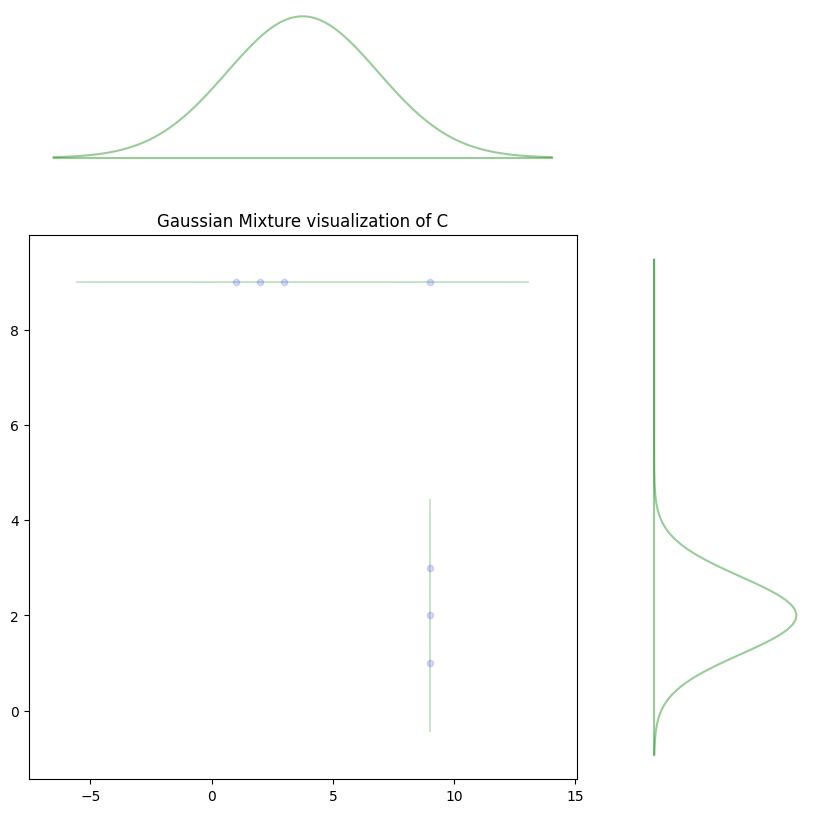

In [8]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Define datasets
dataset_1 = np.array([1, 3, 2, 1, 3, 2, 75, 1, 3, 2, 3, 1, 2, 1, 3, 2]).reshape(-1, 1)
dataset_2 = np.array([1, 2, 3, 1, 2, 9, 19, 20, 21, 20, 2, 22]).reshape(-1, 1)
dataset_3 = np.array([(1,9),(2,9),(3,9),(9,9),(9,3),(9,1),(9,2)])

datasets = [dataset_1, dataset_2, dataset_3]
names = ["A", "B", "C"]
for idx, dataset in enumerate(datasets):
    print(f"\nDataset {names[idx]}:")
    
    # GMM with 2 mixtures
    gmm = GaussianMixture(n_components=2).fit(dataset)
    print("Means:  ", str(gmm.means_).replace("\n", " "))
    print("Cova.:  ", str(gmm.covariances_).replace("\n", " "))
    print("Weights:", str(gmm.weights_).replace("\n", " "))
    
    
    # Get log likelihoods of each sample
    log_likelihoods = gmm.score_samples(dataset)
    neg_log_likelihoods = -log_likelihoods

    # Sort samples by negative log likelihoods
    sorted_indices = np.argsort(neg_log_likelihoods)
    sorted_samples = dataset[sorted_indices]
    sorted_neg_log_likelihoods = neg_log_likelihoods[sorted_indices]

    # Print results
    for sample, nll in zip(sorted_samples, sorted_neg_log_likelihoods):
        print(f"Sample: {sample}, Negative Log Likelihood: {nll:.4f}")
    
    print("-"*45)
    
import numpy as np
from matplotlib.patches import Ellipse

# dataset, gmm is now the last dataset, model (C)

def draw_ellipse(position, covariance, ax=None, sigmaf=3, **kwargs):
    """
    Draw an ellipse with a given position and covariance
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance) # U = left singular vectors, s = singular values
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the ellipse
    ax.add_patch(Ellipse(position, sigmaf * width, sigmaf * height, angle=angle, **kwargs))
    

likelihoods = np.exp(gmm.score_samples(dataset))

# Plot the data and the outliers
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7))


ax = fig.add_subplot(gs[1, 0])
ax.set_title('Gaussian Mixture visualization of C')
ax_x_dist = fig.add_subplot(gs[0, 0], sharex=ax)
ax_y_dist = fig.add_subplot(gs[1, 1], sharey=ax)

ax.scatter(dataset[:, 0], dataset[:, 1], c='blue', alpha=0.15, s=20)
for mean, cov in zip(gmm.means_, gmm.covariances_):
    draw_ellipse(mean, cov, ax=ax, alpha=0.2, color='green')

# Marginal distributions for each Gaussian
x_range = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
y_range = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)

for i in range(2):
    ax_x_dist.plot(x_range, norm.pdf(x_range, gmm.means_[i, 0], np.sqrt(gmm.covariances_[i][0, 0])), color="green", alpha=0.4)
    ax_y_dist.plot(norm.pdf(y_range, gmm.means_[i, 1], np.sqrt(gmm.covariances_[i][1, 1])), y_range, color="green", alpha=0.4)

# Hide axis labels for the marginals
ax_x_dist.yaxis.set_ticklabels([])
ax_y_dist.xaxis.set_ticklabels([])
ax_x_dist.yaxis.set_ticks([])
ax_y_dist.xaxis.set_ticks([])
ax_x_dist.axis('off')
ax_y_dist.axis('off')


plt.show()

8. **Answers:**
 1. The outlier in A is not detected well: The dataset basically has only one "cluster", the outlier is selected as center of the second (very narrow) Gaussian and therefore has a very high likelihood = a low outlier score.
 2. The outlier in B is scored with the highest outlier score.
 3. The outlier in C is also scored with the highest score, all likelihoods are relatively high as the points only have variance in one dimension and thus are very "compressed" in the other.

### 9. Assume the sets A and B from question 1 are given as time-series, not as unordered list.
  1. (1-dimensional) $[ 1, 3, 2, 1, 3, 2, 75, 1, 3, 2, 3, 1, 2, 1, 3, 2 ]$
  2. (1-dimensional) $[ 1, 2, 3, 1, 2, 9, 19, 20, 21, 20, 2, 22 ]$
  - Would you find new / other outliers and which types of outliers are these?

9. **Answer:**
  1. Shows a distinct pattern of $[1,2,3]$. This pattern is disrupted by a point anomaly $75$ and a collective anomaly $[3, 1, 2]$ that can also be seen as contextual with respect to that pattern.
  2. The sample 9 might or might not be considered a point anomaly (could be seen as transition between 2 and 19). The sample $2$ in the second-least position, however, is a contextual anomaly.